In [1]:
getwd()

[1] "C:/Users/Kevin"

# 1. Load Libraries

In [2]:
library(pacman)
pacman::p_load(readxl, dplyr, tidyr, forcats, reactable, reactablefmtr, ggplot2, ggpubr, ggalluvial, ggsankey, plot3D, rgl,
               repr, psych, psy, polycor, Gifi, eRm, MPsychoR, mice, ShinyItemAnalysis, smacof, performance, MVN, gtheory,
              lavaan,semPlot, corrplot, ggstance,rstatix, fPortfolio, fMultivar, car, quantmod, PerformanceAnalytics, magrittr , gbm, ISLR, metan,MASS,
              PortfolioAnalytics,reshape2,ROI, ROI.plugin.glpk, ROI.plugin.quadprog, ggridges, iClick, ggcorrplot, ggrepel)

Warning message:
"package 'pacman' was built under R version 4.2.3"


# 2. Data Cleaning

In [3]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioPrices <- NULL
for(ticker in tickers){
    portfolioPrices <- cbind(portfolioPrices,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='daily', auto.assign=FALSE)[, 6])
}

In [4]:
portfolioPrices<- na.approx(portfolioPrices)

In [5]:
head(portfolioPrices)

           BBCA.JK.Adjusted BBRI.JK.Adjusted BRIS.JK.Adjusted MEGA.JK.Adjusted
2021-01-04         6461.678         3817.472         2318.609         6182.008
2021-01-05         6702.750         3782.043         2308.785         6182.008
2021-01-06         6565.670         3720.042         2465.979         6182.008
2021-01-07         6584.578         3790.900         2662.471         6535.265
2021-01-08         6664.935         3888.330         2809.840         7837.903
2021-01-11         6943.822         4118.618         2986.683         9405.483
           BBTN.JK.Adjusted BBHI.JK.Adjusted BABP.JK.Adjusted BBNI.JK.Adjusted
2021-01-04         1736.953              396               50         5954.958
2021-01-05         1727.409              424               50         6071.722
2021-01-06         1722.637              428               50         5978.312
2021-01-07         1727.409              432               50         6001.664
2021-01-08         1770.356              422        

In [6]:
summary(portfolioPrices)

     Index            BBCA.JK.Adjusted BBRI.JK.Adjusted BRIS.JK.Adjusted
 Min.   :2021-01-04   Min.   :5713     Min.   :3160     Min.   :1094    
 1st Qu.:2021-09-02   1st Qu.:6547     1st Qu.:3810     1st Qu.:1498    
 Median :2022-04-26   Median :7454     Median :4136     Median :1680    
 Mean   :2022-04-30   Mean   :7520     Mean   :4232     Mean   :1805    
 3rd Qu.:2022-12-22   3rd Qu.:8431     3rd Qu.:4495     3rd Qu.:2053    
 Max.   :2023-09-01   Max.   :9400     Max.   :5700     Max.   :3704    
 MEGA.JK.Adjusted BBTN.JK.Adjusted BBHI.JK.Adjusted BABP.JK.Adjusted
 Min.   : 4603    Min.   :1135     Min.   : 396     Min.   : 50     
 1st Qu.: 5175    1st Qu.:1310     1st Qu.:1592     1st Qu.: 87     
 Median : 5741    Median :1468     Median :2215     Median :123     
 Mean   : 6392    Mean   :1477     Mean   :2980     Mean   :154     
 3rd Qu.: 7581    3rd Qu.:1632     3rd Qu.:3918     3rd Qu.:189     
 Max.   :11547    Max.   :2052     Max.   :8025     Max.   :610     
 BBNI.

In [7]:
names(portfolioPrices) <- tickers

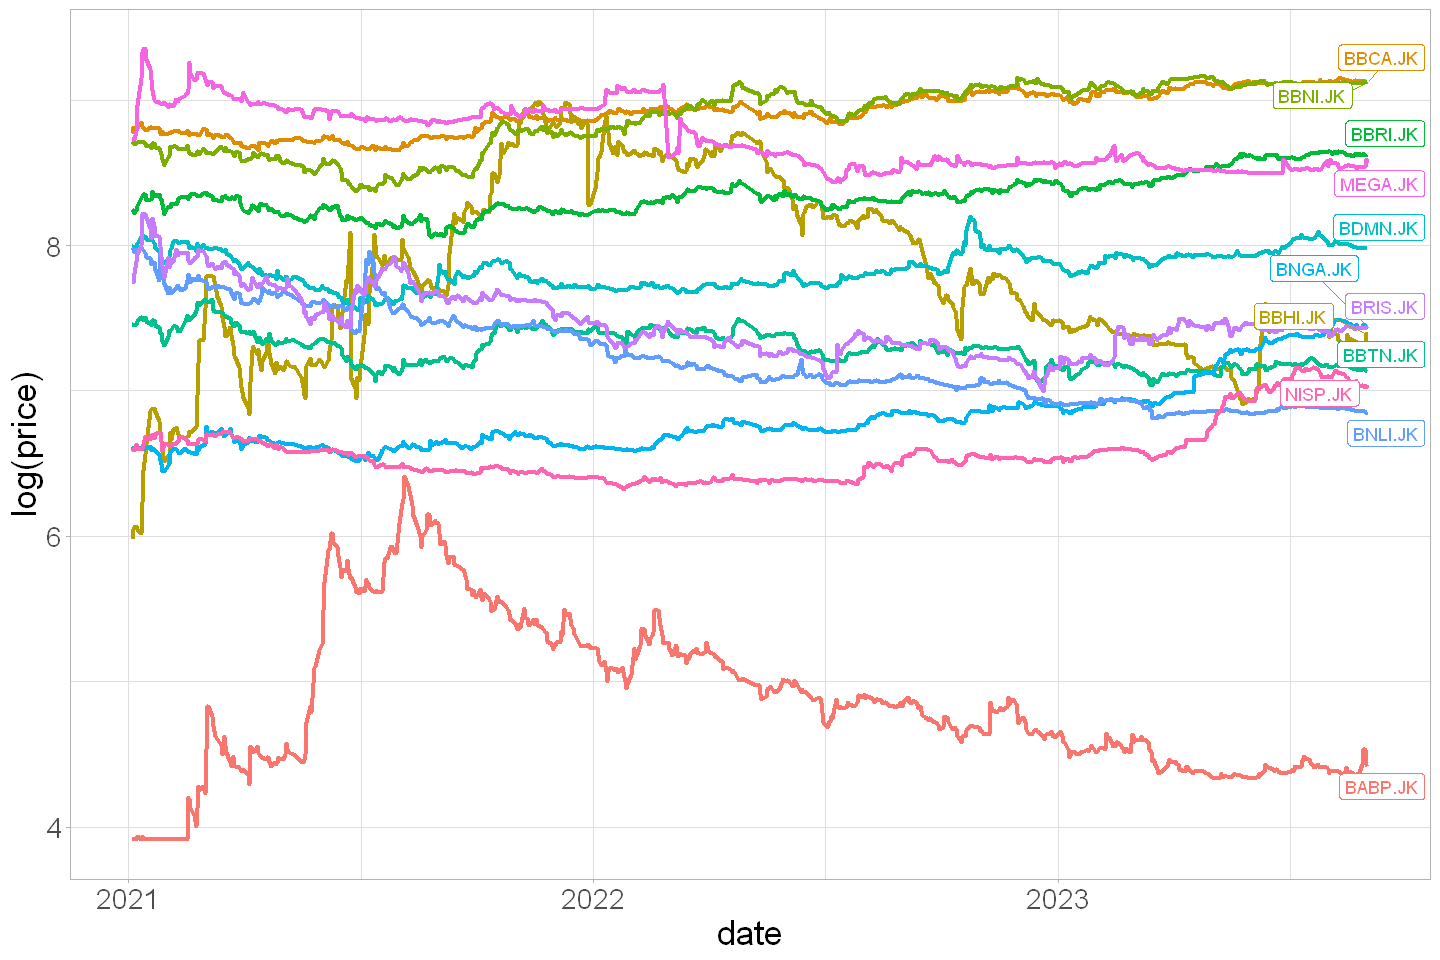

In [8]:
options(repr.plot.width=12, repr.plot.height=8)
dat_ends <- portfolioPrices %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)   %>%  mutate(Val=log(Val)) 
dat_ends  %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='log(price)')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

In [9]:
ts<- timeSeries(na.approx(portfolioPrices),
                units= tickers)
colSums(is.na(ts))

BBCA.JK BBRI.JK BRIS.JK MEGA.JK BBTN.JK BBHI.JK BABP.JK BBNI.JK NISP.JK BDMN.JK 
      0       0       0       0       0       0       0       0       0       0 
BNGA.JK BNLI.JK 
      0       0

In [10]:
ts_returns<- returns(ts, method='simple')*100
summary(data.frame(ts_returns))

    BBCA.JK            BBRI.JK            BRIS.JK             MEGA.JK         
 Min.   :-6.46154   Min.   :-9.09248   Min.   :-6.976749   Min.   :-39.67654  
 1st Qu.:-0.76104   1st Qu.:-0.90090   1st Qu.:-1.403513   1st Qu.: -0.64309  
 Median : 0.00000   Median : 0.00000   Median :-0.296736   Median :  0.00000  
 Mean   : 0.06427   Mean   : 0.07249   Mean   :-0.001849   Mean   :  0.02623  
 3rd Qu.: 0.82645   3rd Qu.: 0.95693   3rd Qu.: 0.970871   3rd Qu.:  0.49020  
 Max.   : 6.38298   Max.   : 6.12692   Max.   :23.684209   Max.   : 27.83209  
    BBTN.JK             BBHI.JK            BABP.JK           BBNI.JK        
 Min.   :-11.47697   Min.   :-63.2667   Min.   :-9.6774   Min.   :-6.55271  
 1st Qu.: -0.99010   1st Qu.: -2.2556   1st Qu.:-2.1739   1st Qu.:-0.85715  
 Median : -0.26177   Median : -0.3663   Median : 0.0000   Median : 0.00000  
 Mean   : -0.03046   Mean   :  0.4746   Mean   : 0.2127   Mean   : 0.08195  
 3rd Qu.:  0.84507   3rd Qu.:  1.4706   3rd Qu.: 1.2500   3rd 

In [11]:
data_arrange <- assetsArrange(ts_returns, method = "hclust")
ts_returns <- ts_returns[,data_arrange]

# 3. Exploratory Data Analysis 

## 3.1 Calendar 

Warning message:
"tz(): Don't know how to compute timezone for object of class timeDate; returning "UTC"."


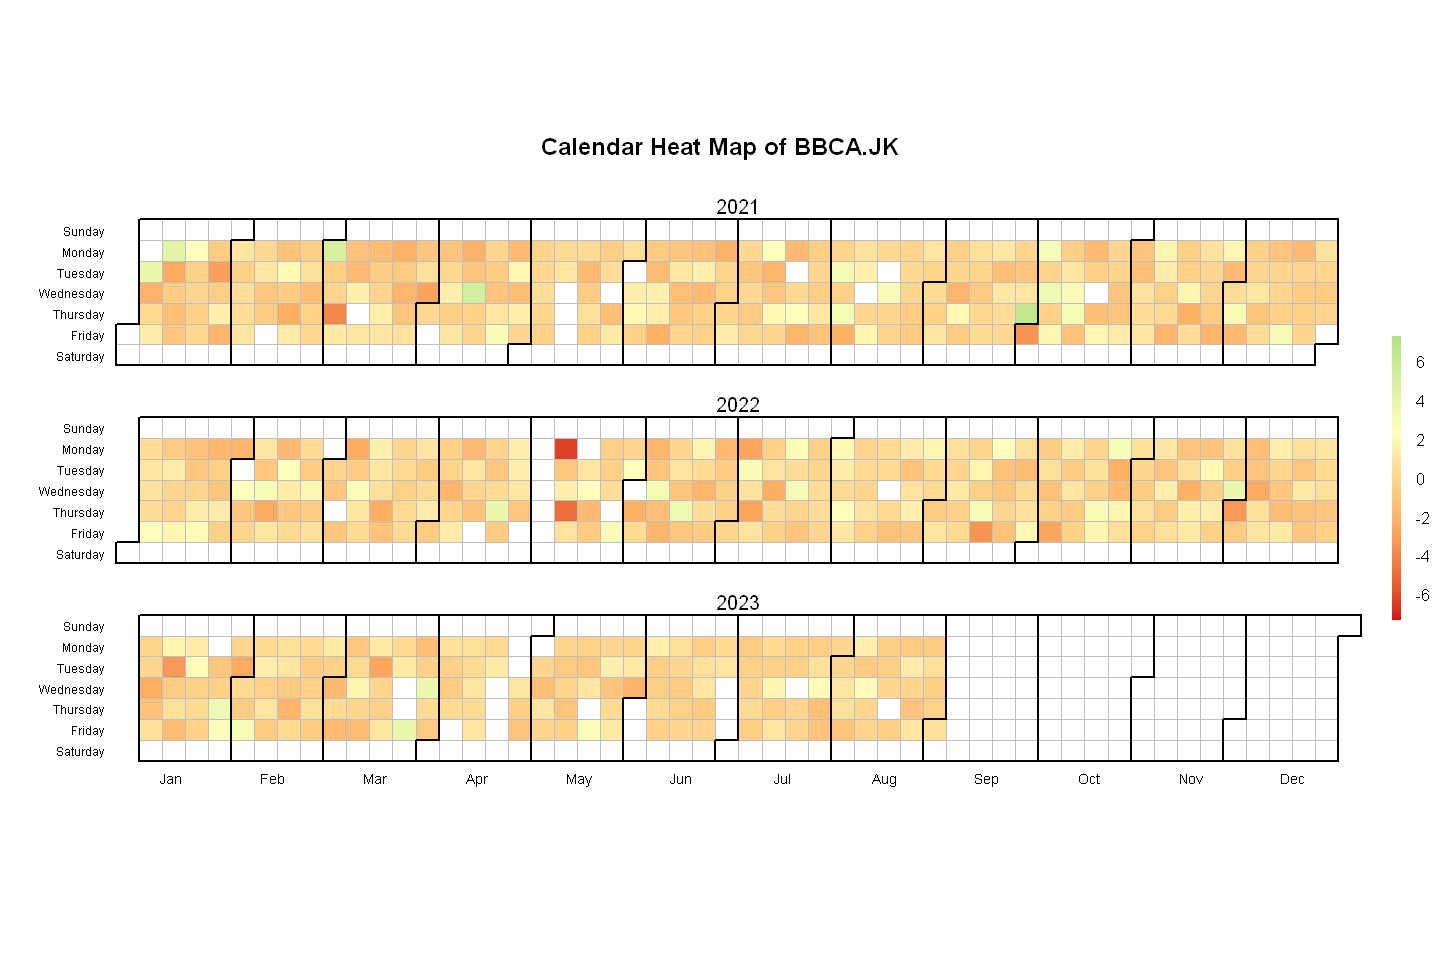

In [12]:
stock_ret_bbca <-ts_returns[, 'BBCA.JK']
calendarHeat(stock_ret_bbca, ncolors = 99, color='r2g', date.form='%Y-%m-%d')

## 3.1 Line Plot

### 3.1.1 Daily Return

**ggplot**

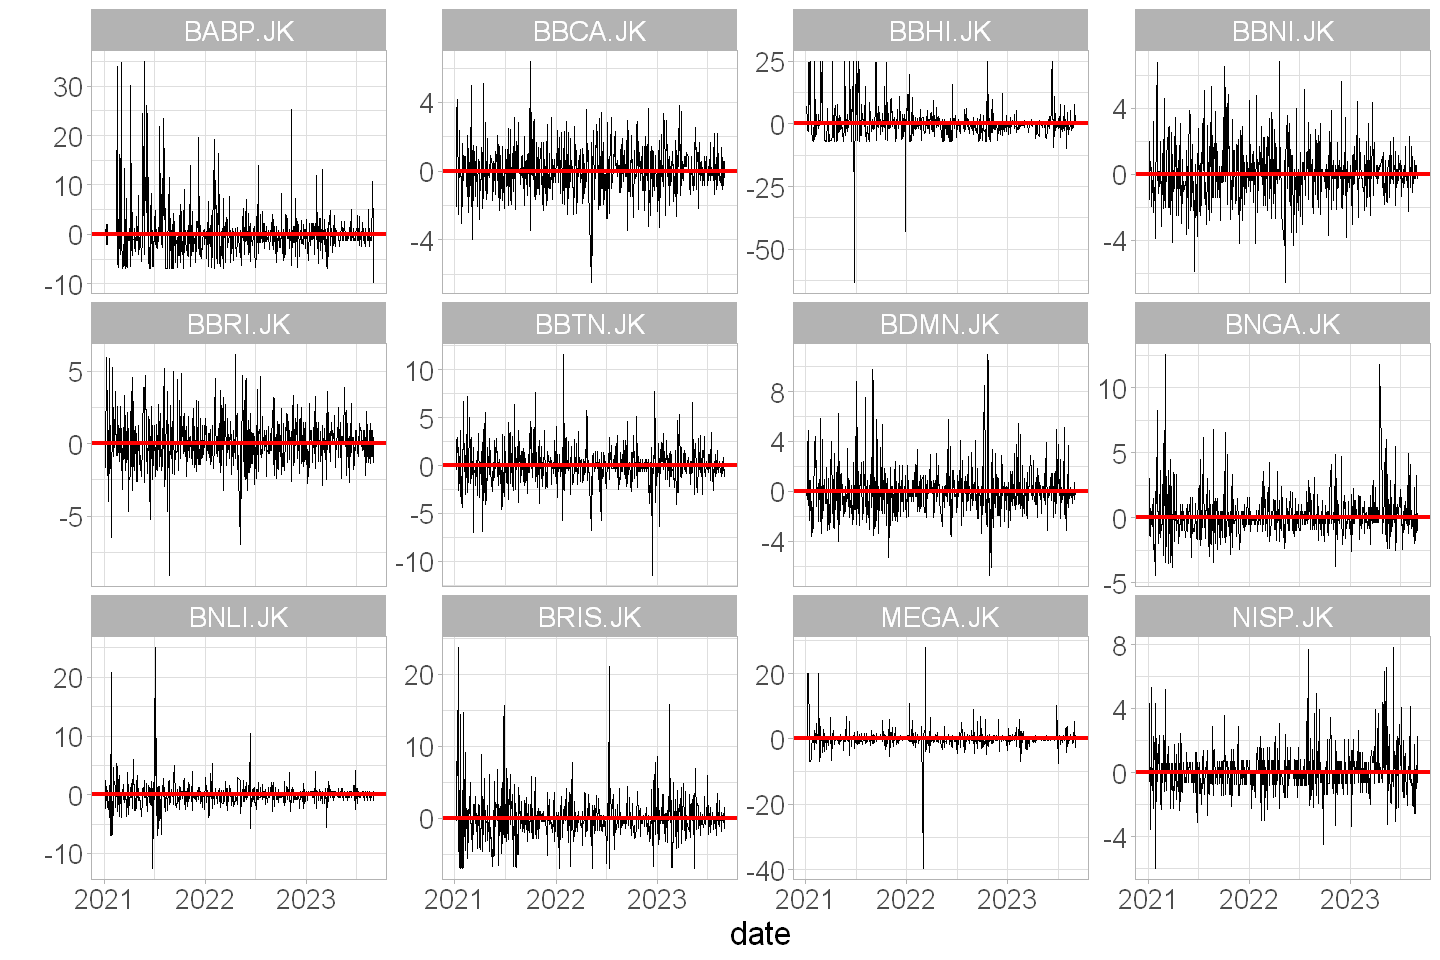

In [13]:
ts_returns  %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)  %>% 
ggplot(aes(date, Val)) + geom_line() + facet_wrap(~Vars, scales = 'free_y') + theme_light() + theme(text=element_text(size=20))+
geom_hline(yintercept = 0, col='red', lwd=1.2) + labs(y='') 

### 3.1.2 Drawdown

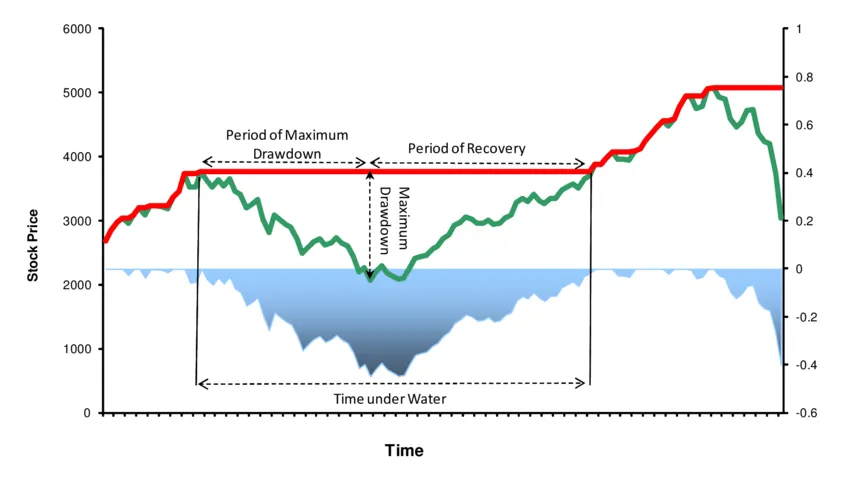

#### A. Plot

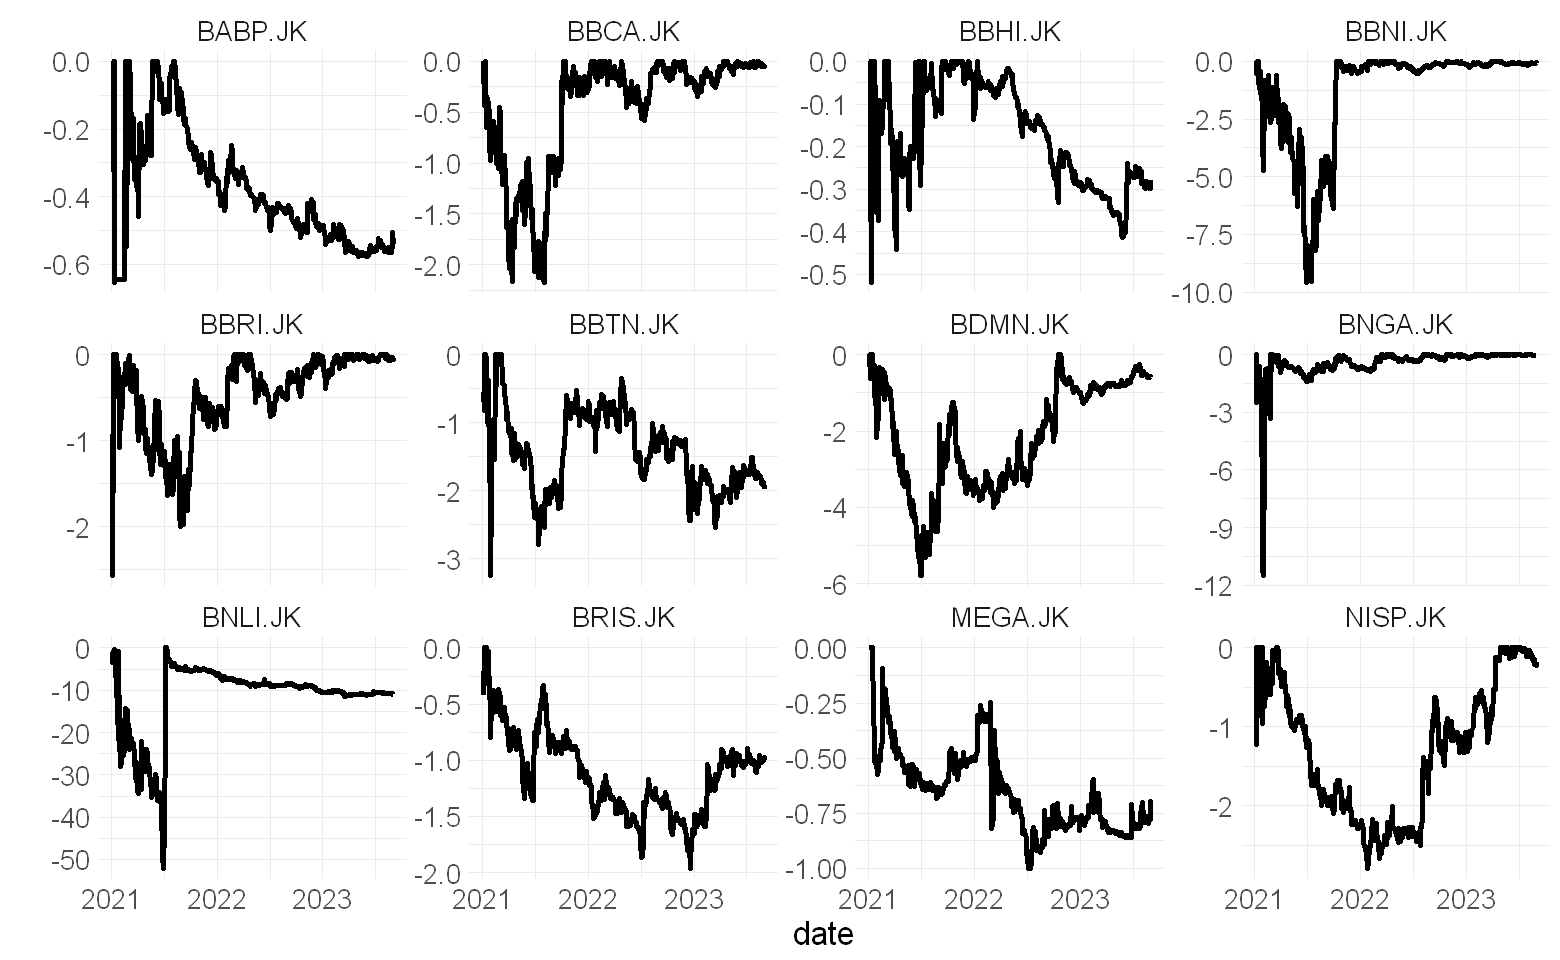

In [14]:
options(repr.plot.width=13, repr.plot.height=8)
Drawdowns(ts_returns, geometric = FALSE)  %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)  %>% 
ggplot(aes(date, Val)) + geom_line(lwd=1.5) + facet_wrap(~Vars,scales = 'free_y') + theme_minimal() + theme(text=element_text(size=20))+
labs(y='')

#### B. Stat

In [15]:
stock<- 'BBCA.JK'
stock_dd <- table.Drawdowns(ts_returns[, stock], geometric = FALSE)
stock_dd

From       Trough     To         Depth   Length To Trough Recovery
1 2021-01-12 2021-08-02 2021-10-06 -2.1724 181    136       45      
2 2022-04-28 2022-07-13 2022-08-29 -0.5811  78     46       32      
3 2021-01-06 2021-01-06 2021-01-11 -0.4323   4      1        3      
4 2021-10-15 2021-11-02 2022-01-11 -0.3437  61     12       49      
5 2022-12-01 2023-01-13 2023-04-17 -0.3436  94     32       62

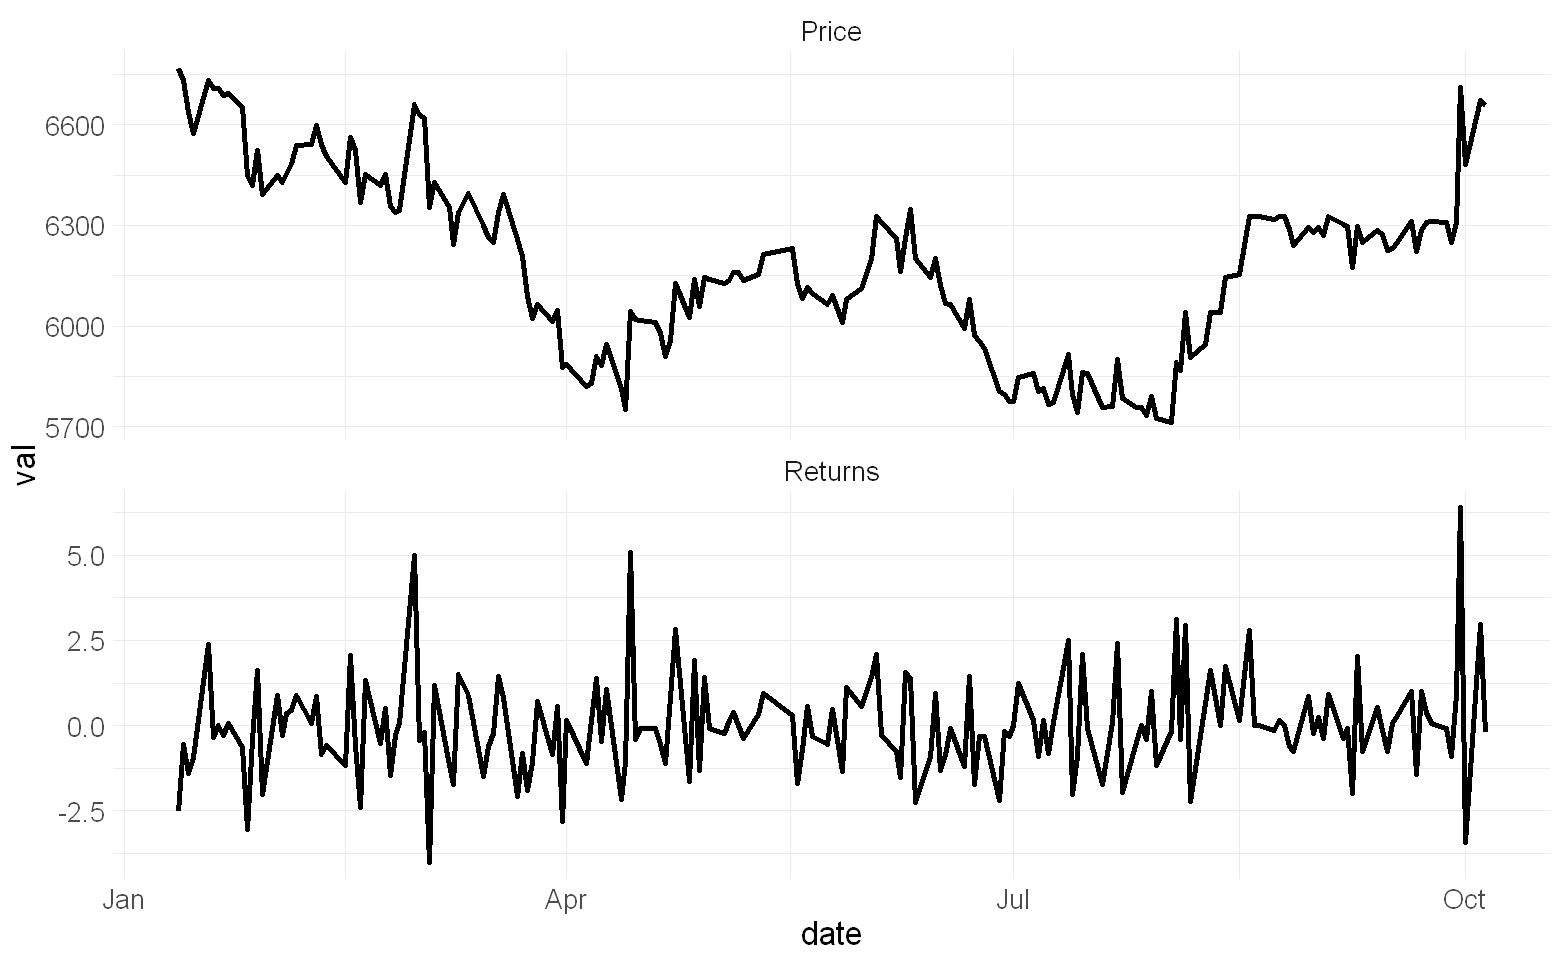

In [16]:
start<-stock_dd[1, 'From']
end<-stock_dd[1, 'To']
cbind(Returns=window(ts_returns[,stock], start = start, end = end),
      Price=window(ts[,stock], start = start, end = end))  %>% data.frame()  %>% 
mutate(date=as.Date(row.names(.)))  %>% gather('var', 'val', -date)  %>% ggplot(aes(date, val)) + geom_line(lwd=1.5) +
facet_wrap(~var, scale='free_y', nrow = 3) +  theme_minimal() + theme(text=element_text(size=20))

## 3.2 Descriptive Statistics

### 3.2.1 All ranges

In [17]:
df_stat <- data.frame(t(round(basicStats(ts_returns),2)))
reactable(df_stat, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_stat, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

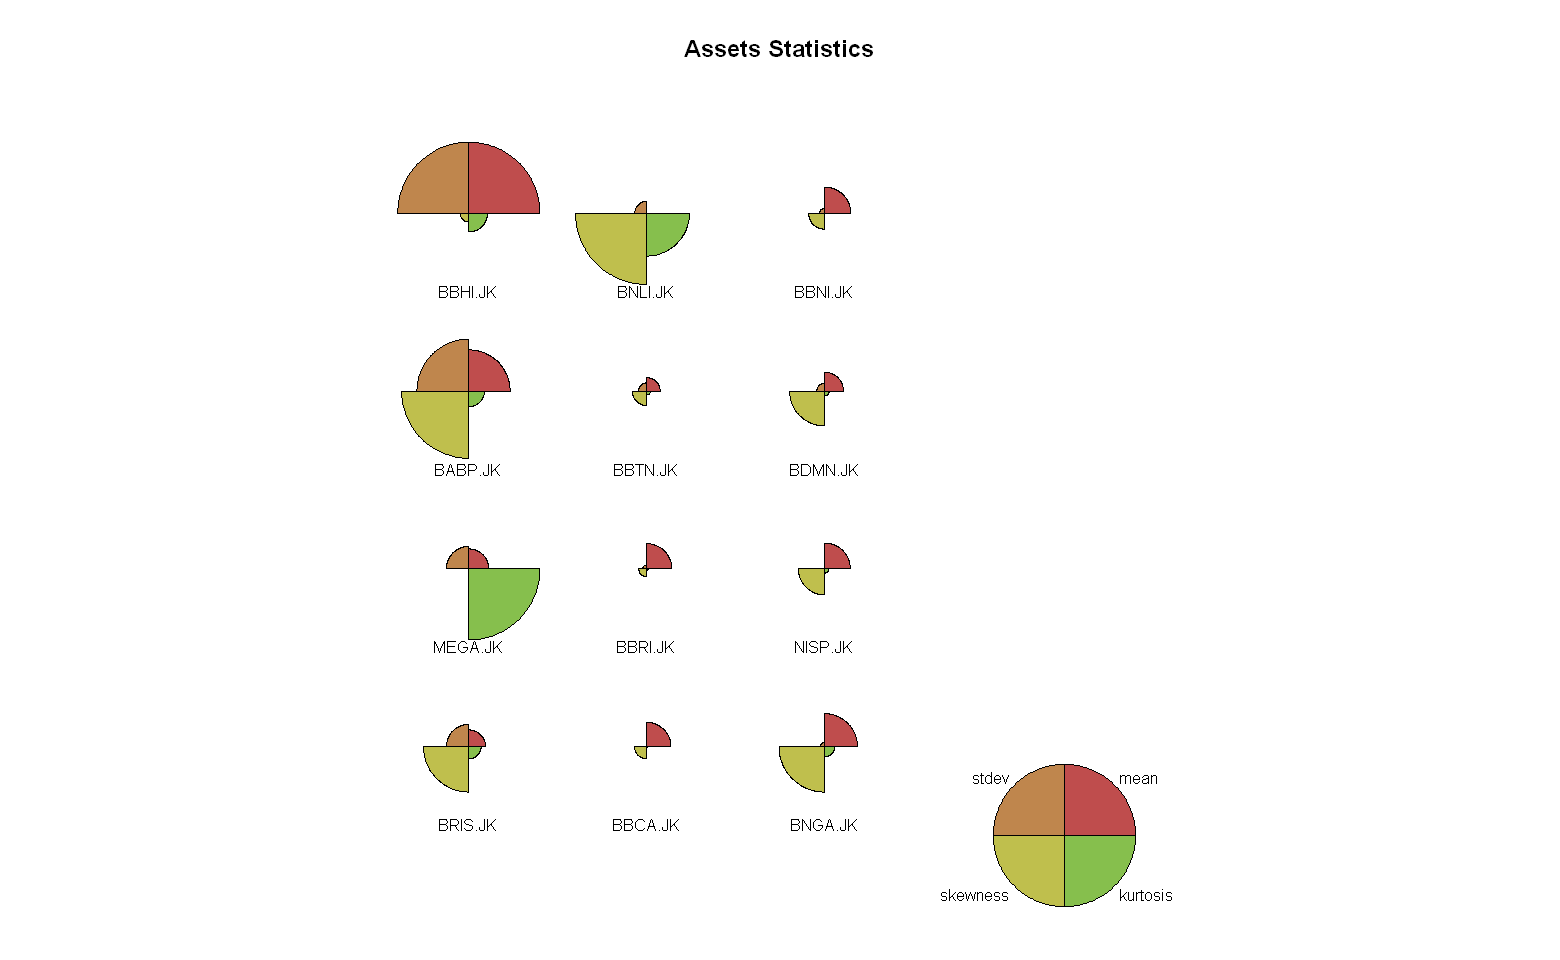

In [18]:
assetsMomentsPlot(ts_returns, title = "", description = "")

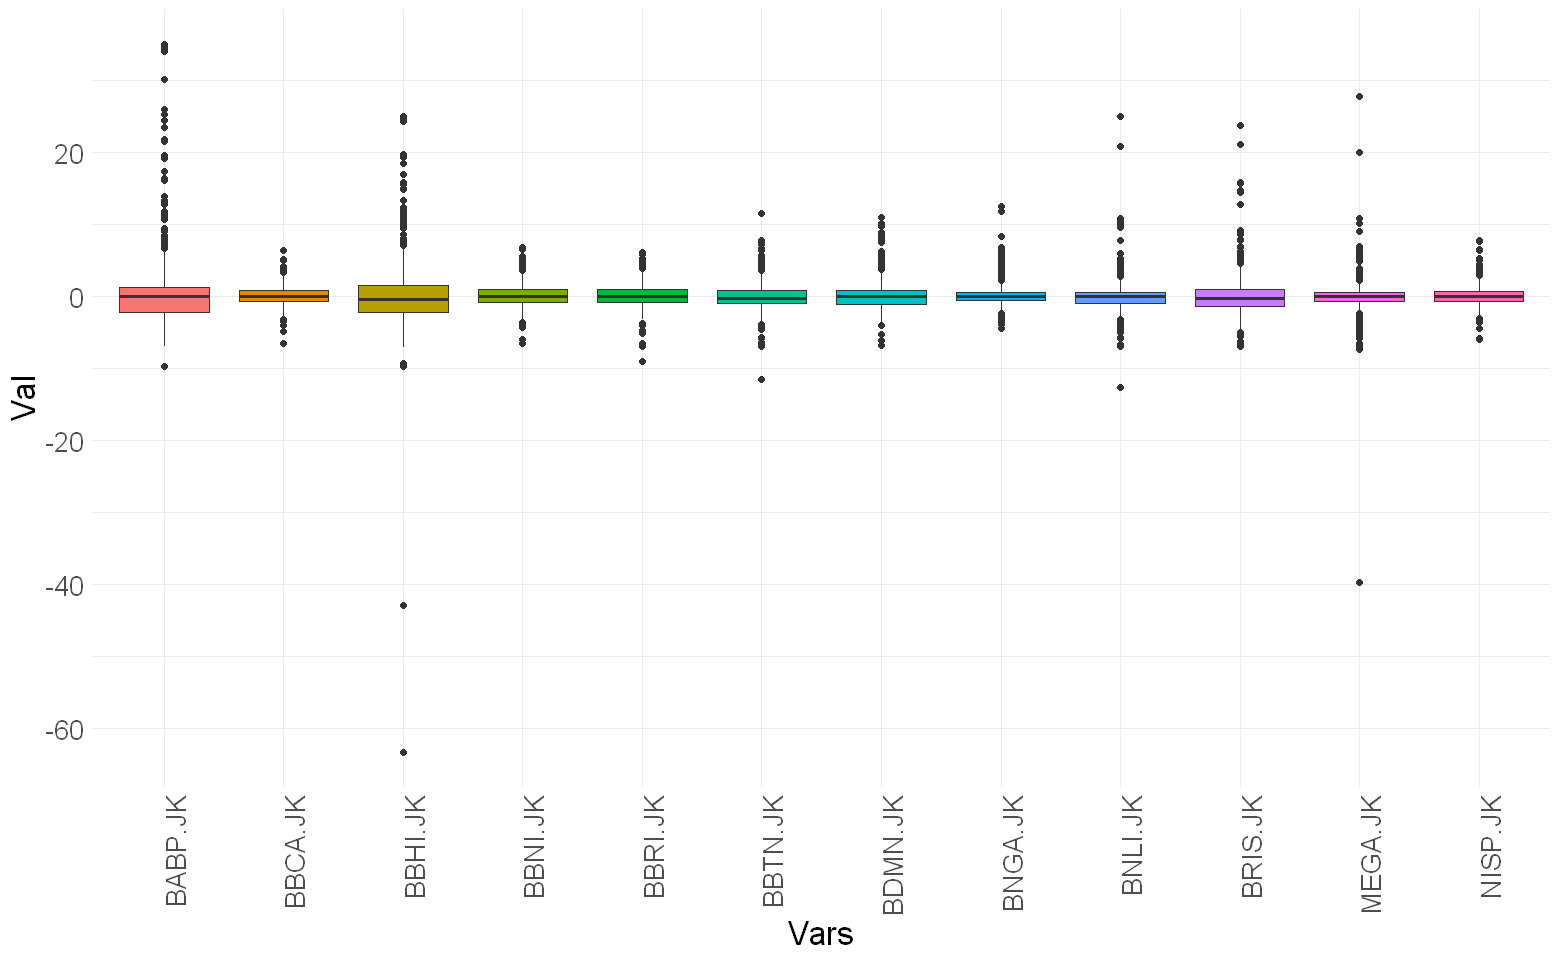

In [19]:
ts_returns  %>% data.frame()  %>% gather('Vars', 'Val')  %>% ggplot(aes(Vars, Val, fill=Vars)) + geom_boxplot() +
theme_minimal() + theme(text=element_text(size=20))  + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))+
 theme(legend.position = "none")

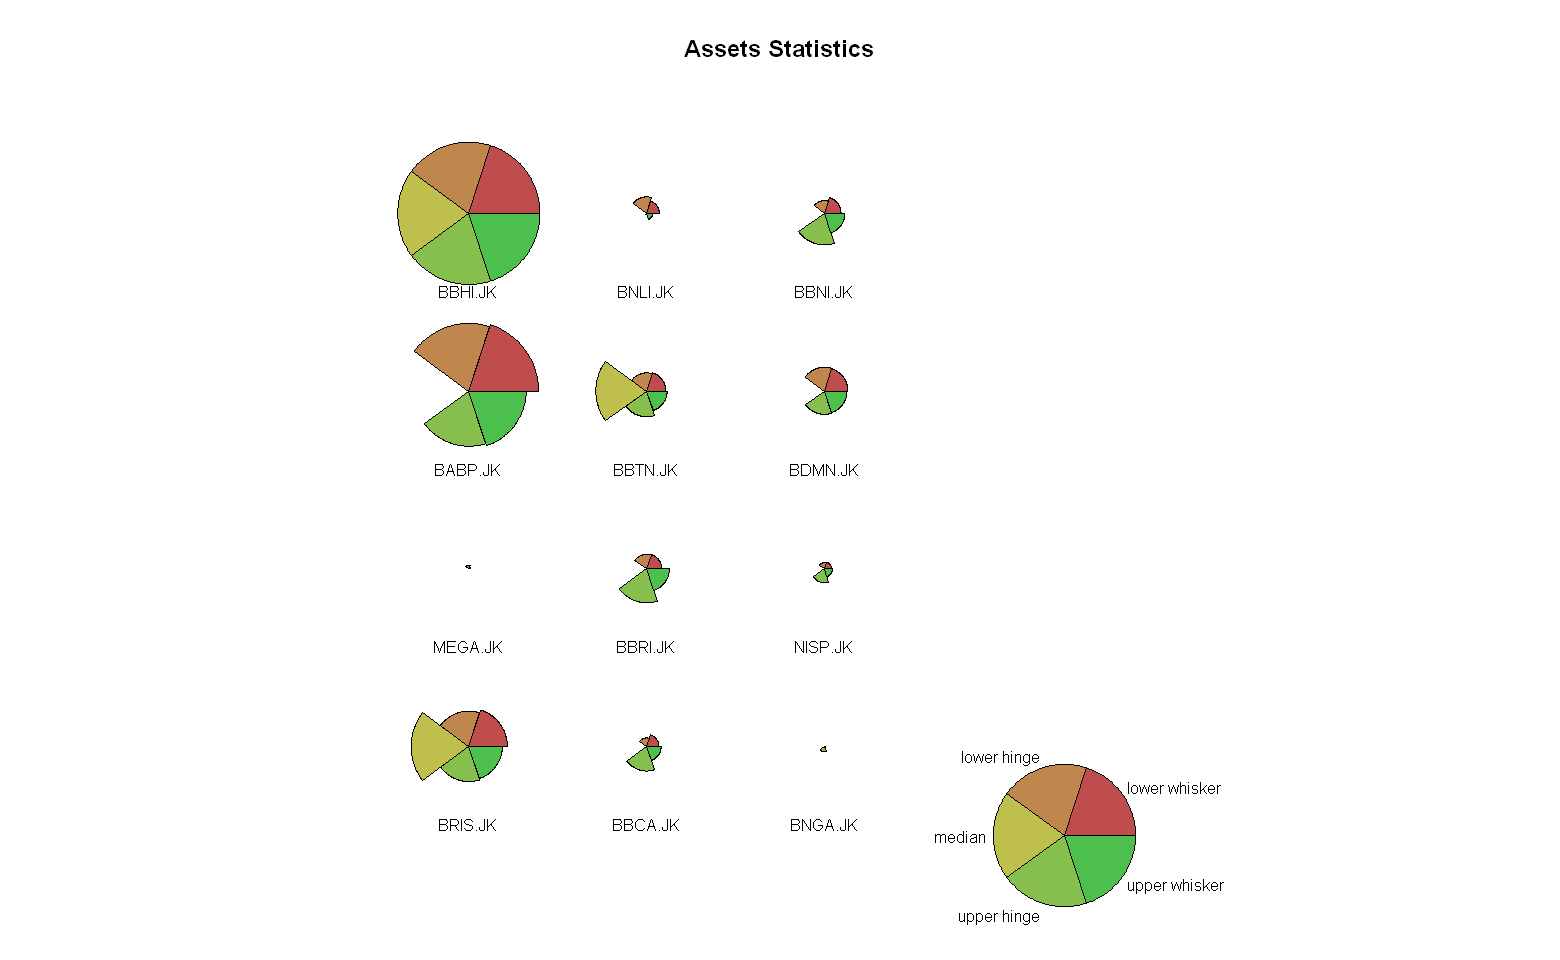

In [20]:
assetsBoxStatsPlot(ts_returns, title = "", description = "")

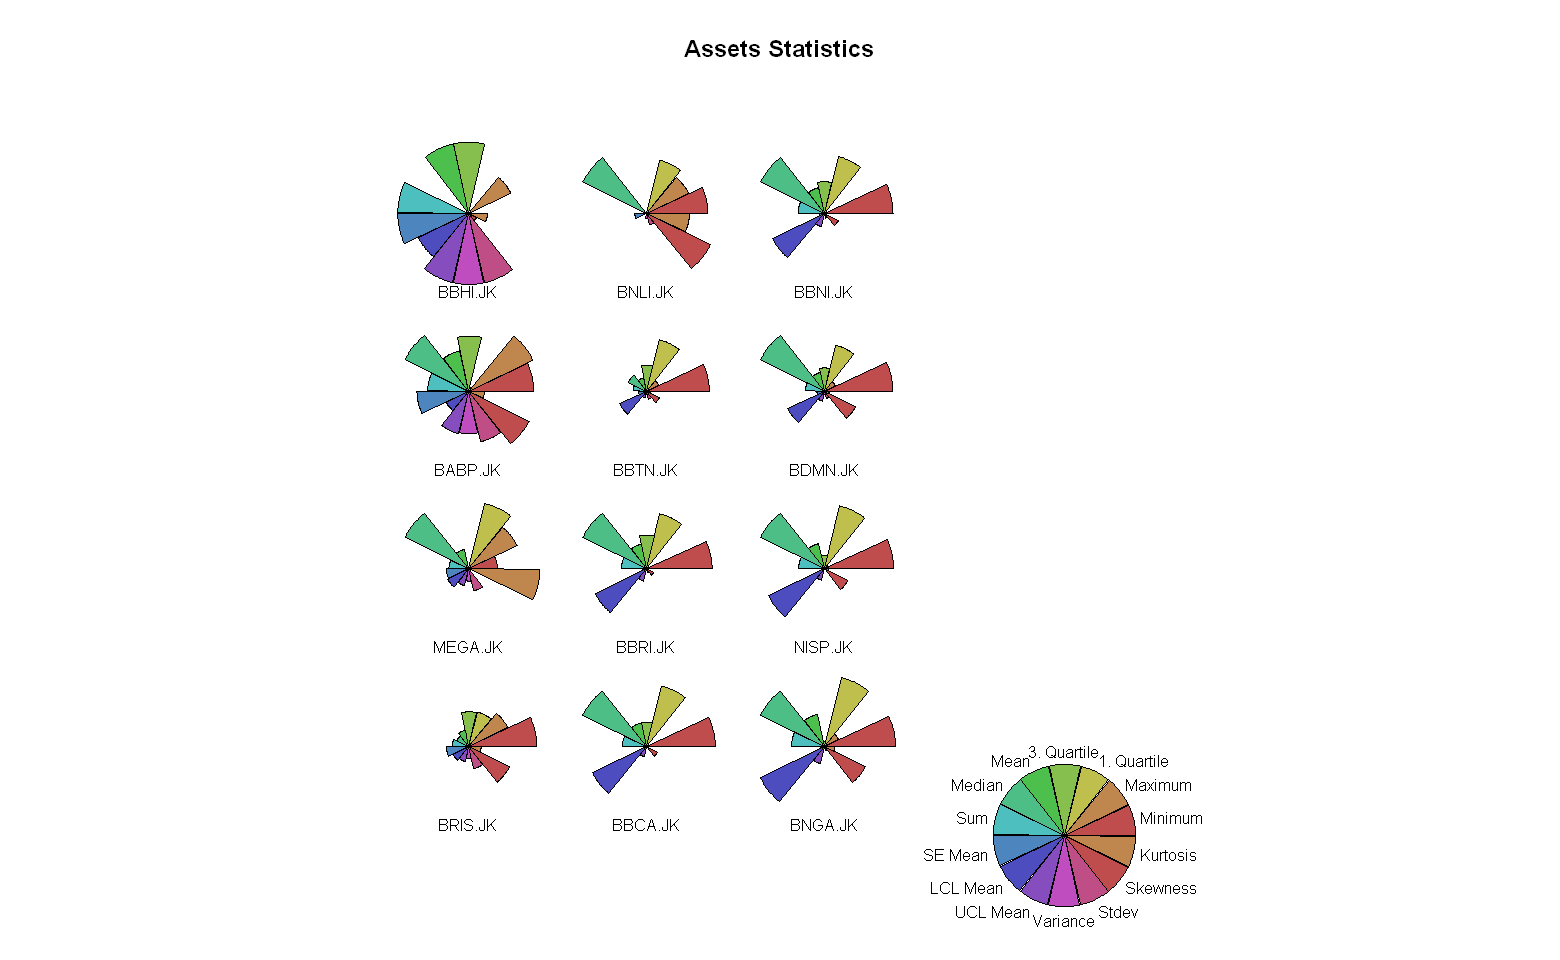

In [21]:
assetsBasicStatsPlot(ts_returns, title = "", description = "")

### 3.2.1 Rolling stats

In [22]:
by <- periods(time(ts_returns), "4m","1m")
rollapply <- function(x, by, FUN, ...){
    ans <- applySeries(x, from = by$from, to = by$to, by = NULL,
                       FUN = FUN, format = x@format,
                       zone = finCenter(x), FinCenter = finCenter(x),
                       title = x@title, documentation = x@documentation, ...)
    attr(ans, "by") <- data.frame(from = format(by$from), to = format(by$to) )
    ans
}

Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


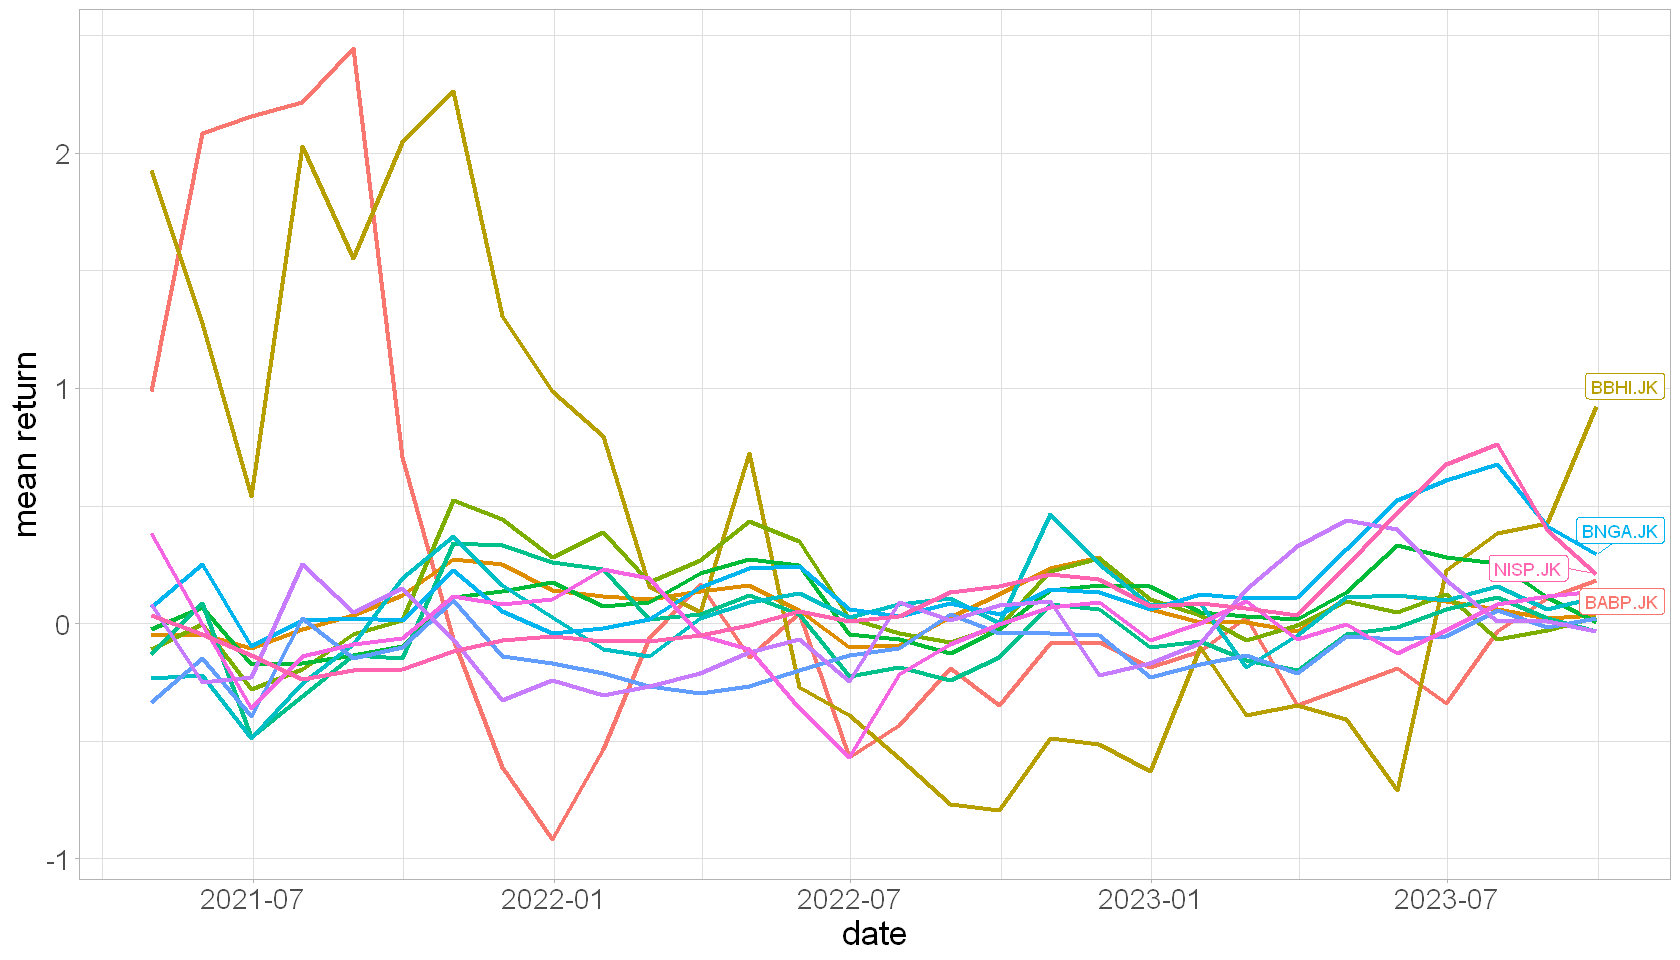

In [23]:
options(repr.plot.width=14, repr.plot.height=8)
ts.ROLL <- rollapply(ts_returns, by, FUN = "colMeans")
dat_ends <- ts.ROLL %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)
dat_ends %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='mean return')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


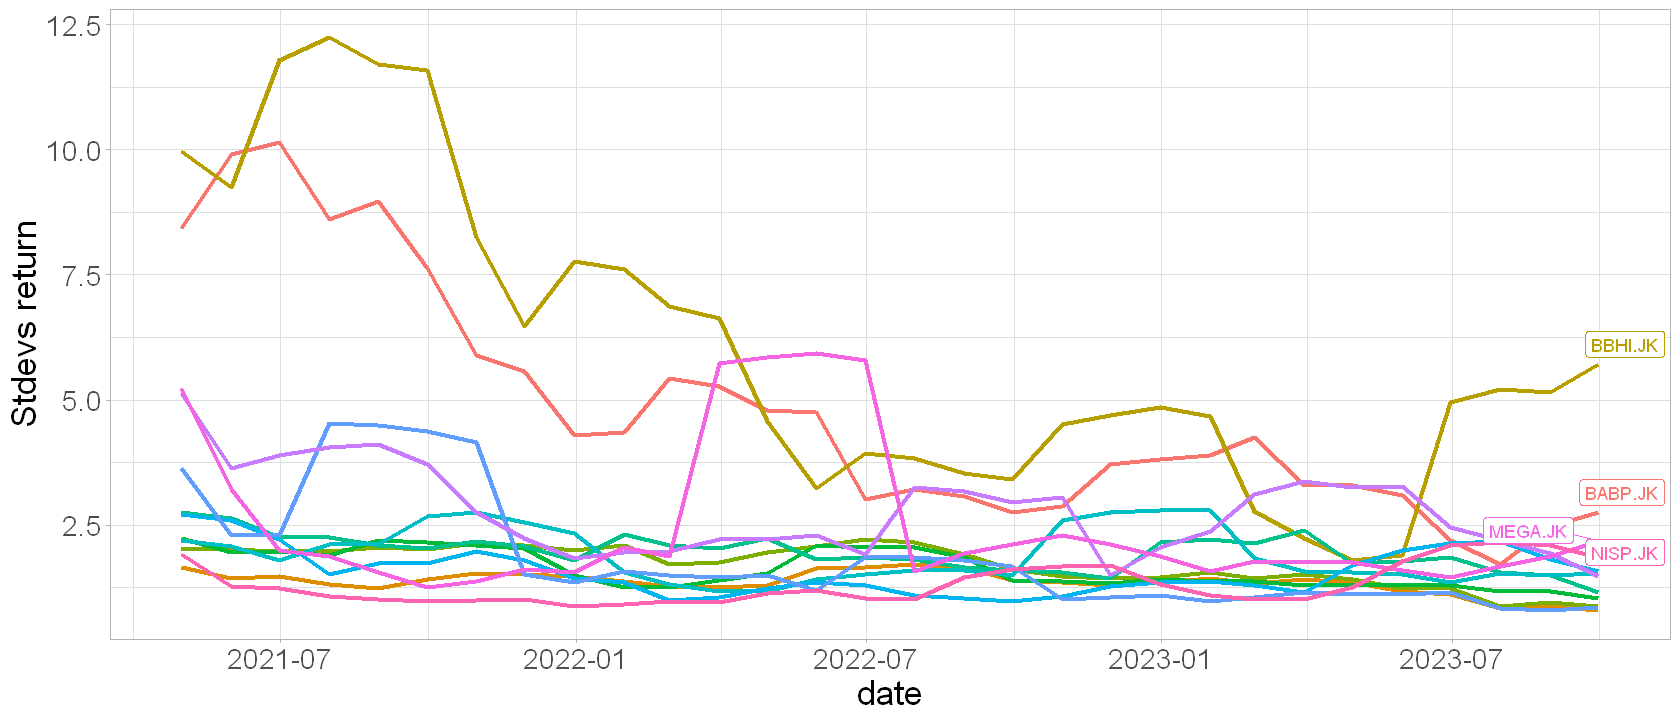

In [24]:
options(repr.plot.width=14, repr.plot.height=6)
ts.ROLL <- rollapply(ts_returns, by, FUN = "colStdevs")
dat_ends <- ts.ROLL %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)
dat_ends %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='Stdevs return')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

## 3.3 Clustering

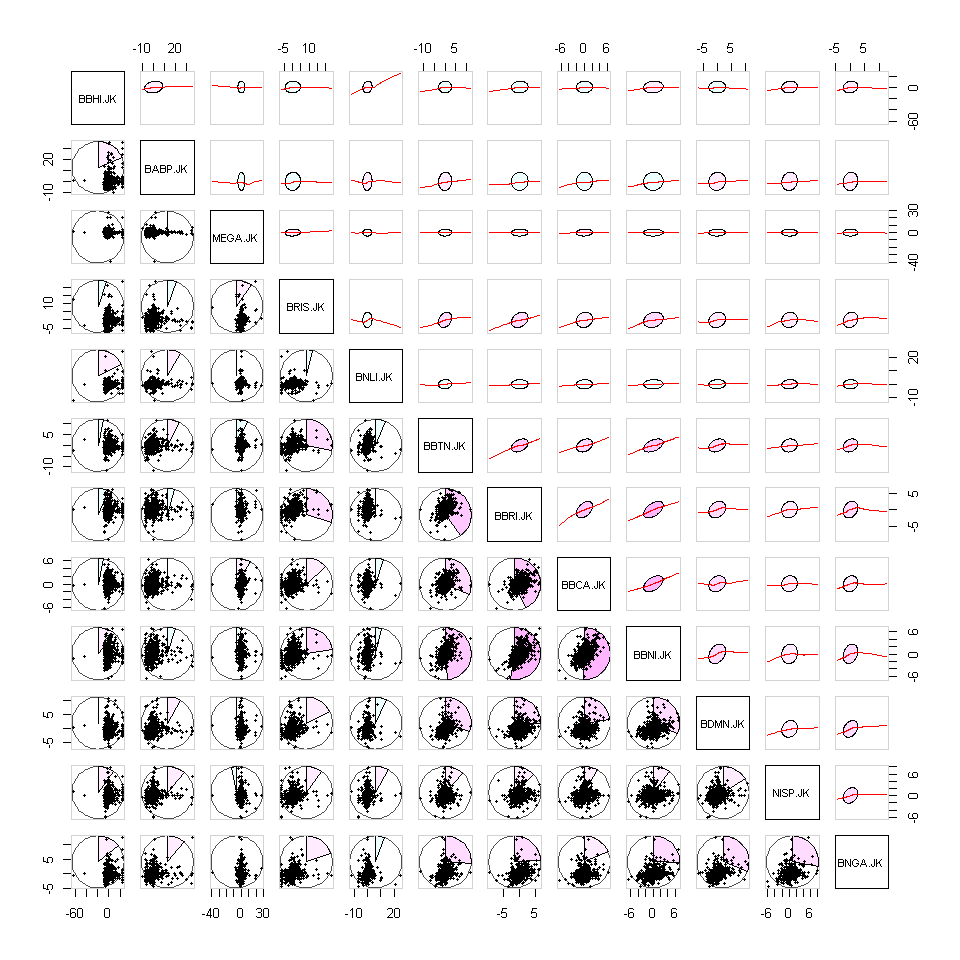

In [25]:
options(repr.plot.width=8, repr.plot.height=8)
assetsCorgramPlot(ts_returns, pch = 19, cex = 0.5)

## 3.3.1 Eigenvalue

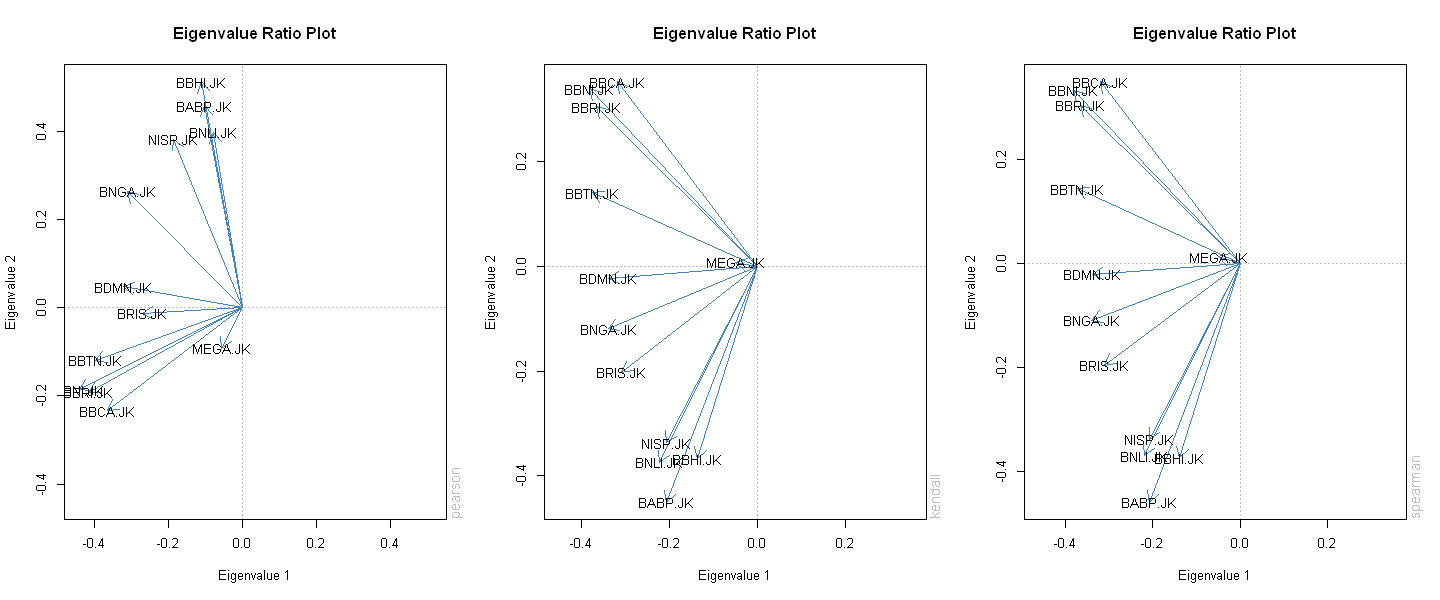

In [26]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1, 3))
assetsCorEigenPlot(ts_returns, method = "pearson")
assetsCorEigenPlot(ts_returns, method = "kendall")
assetsCorEigenPlot(ts_returns, method = "spearman")
options(repr.plot.width=12, repr.plot.height=5)

## 3.3.2 KNN

In [27]:
knn_ret<- assetsSelect(ts_returns, "kmeans", control = c(centers = 3, algorithm = "Hartigan-Wong"))
knn_ret

K-means clustering with 3 clusters of sizes 1, 1, 10

Cluster means:
  2021-01-05 2021-01-06 2021-01-07 2021-01-08 2021-01-11 2021-01-12 2021-01-13
1 0.00000000  0.0000000  0.0000000   2.000000  -1.960784   2.000000 -1.9607843
2 7.07070707  0.9433962  0.9345794  -2.314815  -2.843602  24.390244 24.5098039
3 0.07099836 -0.3281110  2.6292639   2.964321   4.588135   4.126776  0.3757853
  2021-01-14 2021-01-15 2021-01-18 2021-01-19 2021-01-20 2021-01-21 2021-01-22
1  0.0000000   0.000000   0.000000   0.000000    0.00000   0.000000   0.000000
2 11.8110236   7.746479  24.836601   1.047120    0.00000   1.036269  -2.051282
3  0.3288047  -2.406672  -1.438612  -2.145496    2.52539  -1.820563  -2.265216
  2021-01-25 2021-01-26 2021-01-27 2021-01-28 2021-01-29 2021-02-01 2021-02-02
1   0.000000  0.0000000   0.000000   0.000000   0.000000   0.000000  0.0000000
2  -6.806283 -6.7415730  -6.626506  -6.451613  -6.896552   4.444444 -6.3829787
3  -1.292676 -0.3292971  -2.915847  -3.634133  -2.518217   3.033186  0.4942517
  2021-02-03 2021-02-04 2021-02-05 2021-02-08 2021-02-09 2021-02-10  2021-02-11
1   0.000000  0.0000000   0.000000   0.000000  0.0000000  0.0000000  0.00000000
2  25.000000 -4.8484848   7.006369   1.190476 -4.1176471 -2.4539877  0.62893082
3   2.152478  0.2870858   1.211470   1.636006 -0.6278177  0.3661109 -0.07091735
  2021-02-15 2021-02-16 2021-02-17 2021-02-18 2021-02-19  2021-02-22 2021-02-23
1   0.000000   0.000000 34.0000000 -1.4925373 -6.0606061 -4.83870968 -6.7796610
2  -1.875000   1.910828  0.0000000  3.7500000 -0.6024096  1.81818182  1.1904762
3   1.308138   1.179264 -0.9582578  0.9352296 -0.5772443  0.02538923  0.1590259
  2021-02-24 2021-02-25 2021-02-26 2021-03-01 2021-03-02 2021-03-03 2021-03-04
1  12.727273 16.1290323  -2.777778   2.857143  -4.166667  34.782609  34.408602
2  24.705882 25.0000000  16.981132   0.000000  24.838710  24.547804   0.000000
3   2.174794  0.7273104  -1.044216   2.045069  -1.102746   1.058202  -1.929145
  2021-03-05 2021-03-08 2021-03-09 2021-03-10 2021-03-12  2021-03-15
1  0.0000000 -6.4000000  -6.837607  -6.422018 -1.9607843 -4.00000000
2  0.0000000  0.0000000   0.000000  -6.639004 -6.6666667 -6.90476190
3 -0.4332672  0.5450919  -1.881307   0.177142  0.5473386  0.07416963
   2021-03-16 2021-03-17 2021-03-18 2021-03-19 2021-03-22 2021-03-23 2021-03-24
1 -6.25000000  13.333333  -6.862745 -4.2105263 -6.5934066  -2.352941   7.228916
2 -6.90537084  -6.868132  -6.194690  0.6289308  6.2500000  -5.294118  -6.832298
3  0.09414659  -1.108386   1.114632 -0.9510315 -0.6117169  -1.236387  -1.969229
  2021-03-25 2021-03-26 2021-03-29 2021-03-30 2021-03-31 2021-04-01 2021-04-05
1  -6.741573   0.000000  -1.204819  -1.219512  -1.234568  1.2500000 -3.7037037
2  -7.000000  -1.075269  -6.884058  -6.614786  -6.666667 -6.6964286 -6.6985646
3  -1.273164   1.911025  -1.177184  -2.454202  -1.980765  0.7123528 -0.8108157
  2021-04-06 2021-04-07 2021-04-08 2021-04-09 2021-04-12 2021-04-13 2021-04-14
1 -6.4102564 30.1369863  -1.052632 -3.1914894   4.395604 -4.2105263  -1.098901
2 -4.6153846 24.7311828  25.000000  2.7586207  -5.369128  3.1914894  -6.872852
3  0.8909856 -0.5041334   1.501356  0.4756238  -2.474914 -0.3991314   2.335873
   2021-04-15  2021-04-16 2021-04-19 2021-04-20 2021-04-21 2021-04-22
1 -1.11111111 -1.12359551 -1.1363636   1.149425  0.0000000 -2.2727273
2 -6.64206642  6.32411067  5.9479554   7.368421 -0.6535948 -6.9078947
3 -0.05075465 -0.09649786  0.5518279  -1.058723 -1.0275980  0.8839236
  2021-04-23 2021-04-26 2021-04-27 2021-04-28 2021-04-29 2021-04-30 2021-05-03
1 -3.4883721   2.409639  -1.176471  1.1904762  3.5294118 -1.1363636  0.0000000
2 -6.7137809  -6.439394   7.692308 -3.3834586 -1.1673152  2.3622047 -3.0769231
3 -0.4616596  -1.145428   0.316532 -0.4203046  0.3335377 -0.4982223 -0.5892157
  2021-05-04 2021-05-05 2021-05-06 2021-05-07 2021-05-10 2021-05-11 2021-05-17
1 3.44827586  7.7777778 -4.1237113  -2.150538 -1.0989011  0.0000000  -5.555556
2 3.57142857  2.6819923  0.0000000  -2.238806

## 3.3.3 Distance dendogram

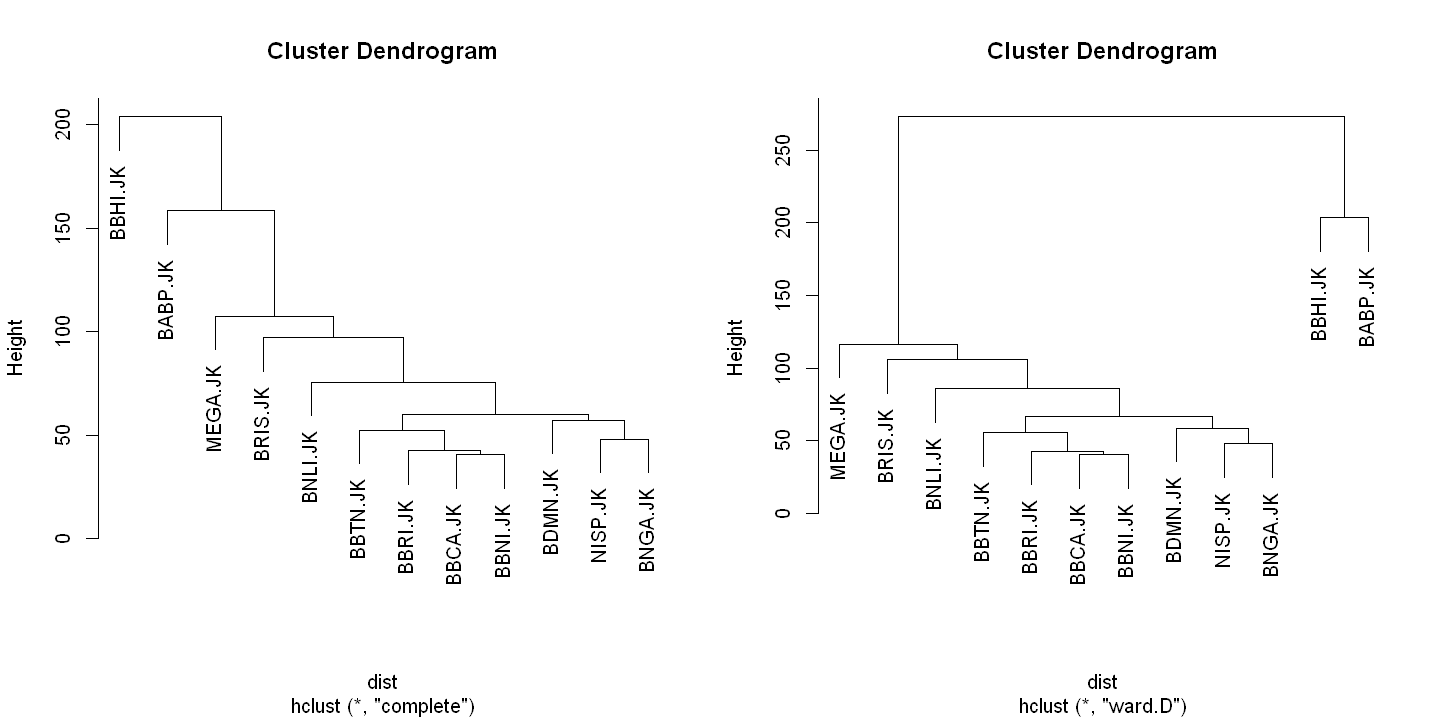

In [28]:
options(repr.plot.width=12, repr.plot.height=6)
clusteredAssets <- function(x, dist = "euclidean", method = "complete") {
    x = as.matrix(x)
    dist = dist(t(x), method = dist)
    clustering = hclust(dist, method = method)
    clustering
}
par(mfrow=c(1,2))
clusters1 <- clusteredAssets(ts_returns)
clusters2 <- clusteredAssets(ts_returns,method = 'ward.D')
plot(clusters1)
plot(clusters2)

## 3.3.4 Second Generation of Multivariate Analysis

In [29]:
psych::alpha(ts_returns)$total[1]

Number of categories should be increased  in order to count frequencies. 



raw_alpha
 0.5033505

[1] 0.7327502

[1] 0.4613639

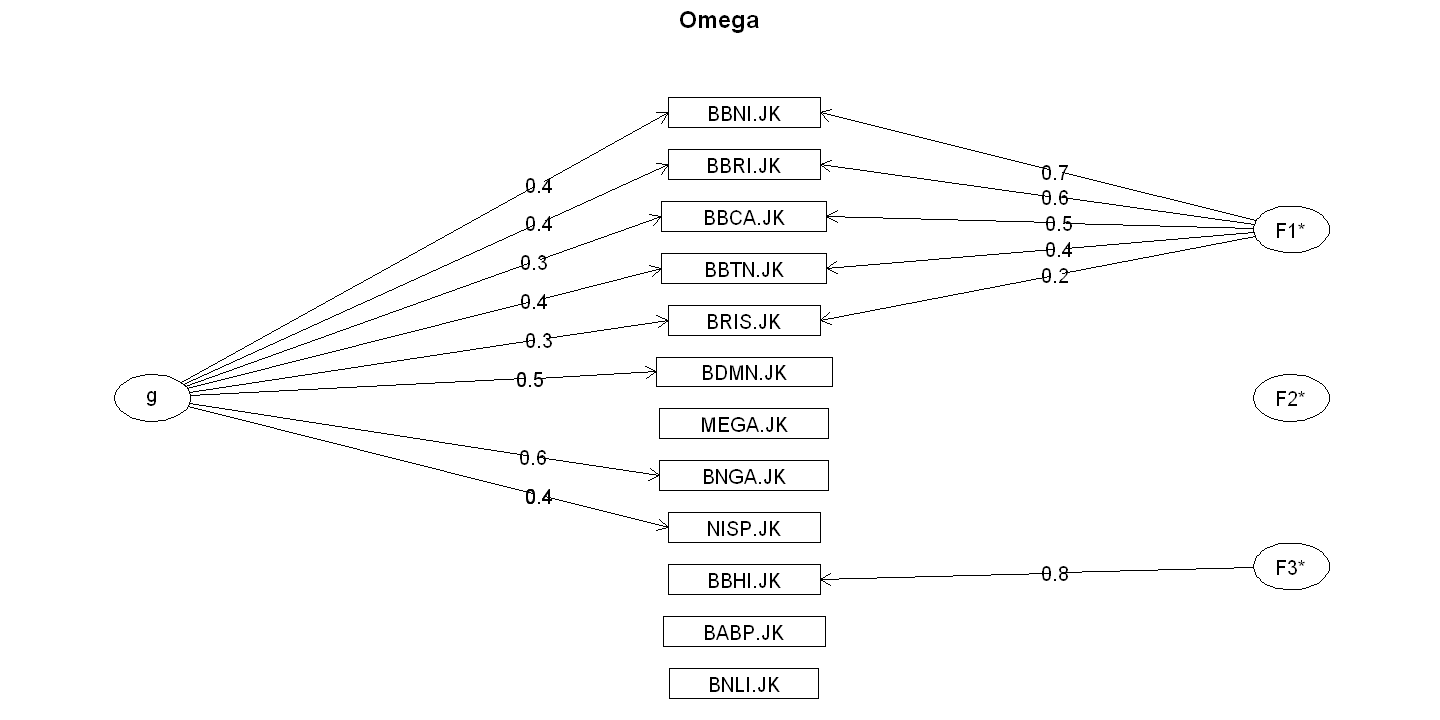

In [30]:
omega(ts_returns)$omega.tot; omega(ts_returns)$omega_h

### 3.3.5 Dimensional Reduction Analysis

#### Data point perspective

initial  value 2.573804 
iter   5 value 1.081932
iter  10 value 0.472563
iter  15 value 0.312393
iter  20 value 0.166575
iter  25 value 0.142460
iter  30 value 0.134903
iter  35 value 0.103187
iter  40 value 0.018668
final  value 0.007557 
converged


Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`."


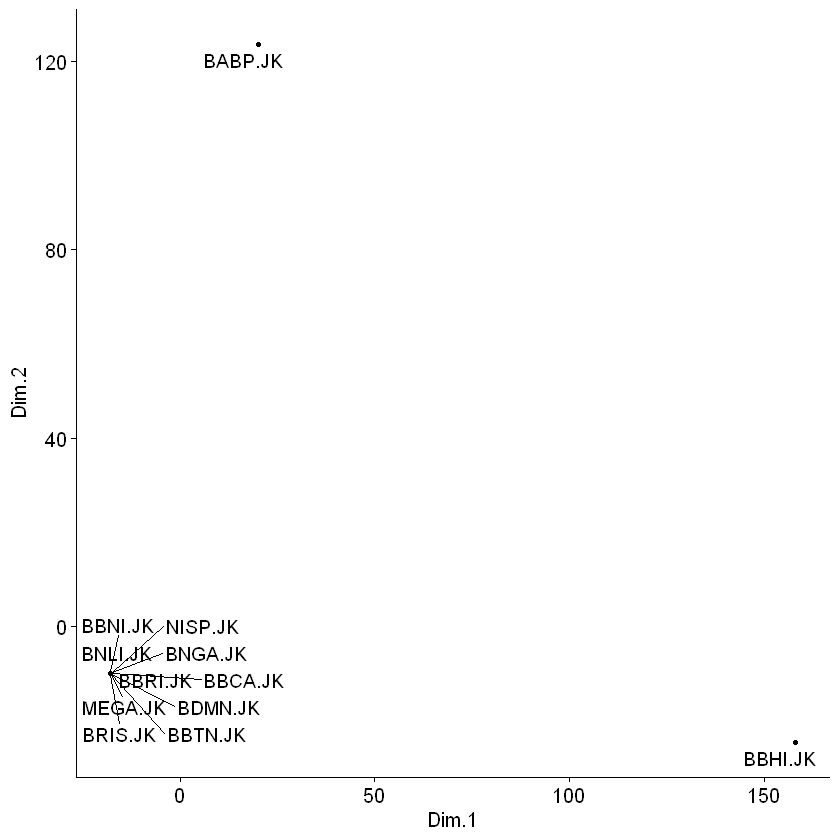

In [31]:
options(repr.plot.width=7, repr.plot.height=7)
mds <- t(ts_returns) %>% dist() %>% isoMDS() %>% .$points %>% as_tibble()
colnames(mds) <- c("Dim.1", "Dim.2")
ggscatter(mds, x = "Dim.1", y = "Dim.2", label = rownames(t(ts_returns)),
          size = 1,repel = TRUE)

#### Correlation perspective

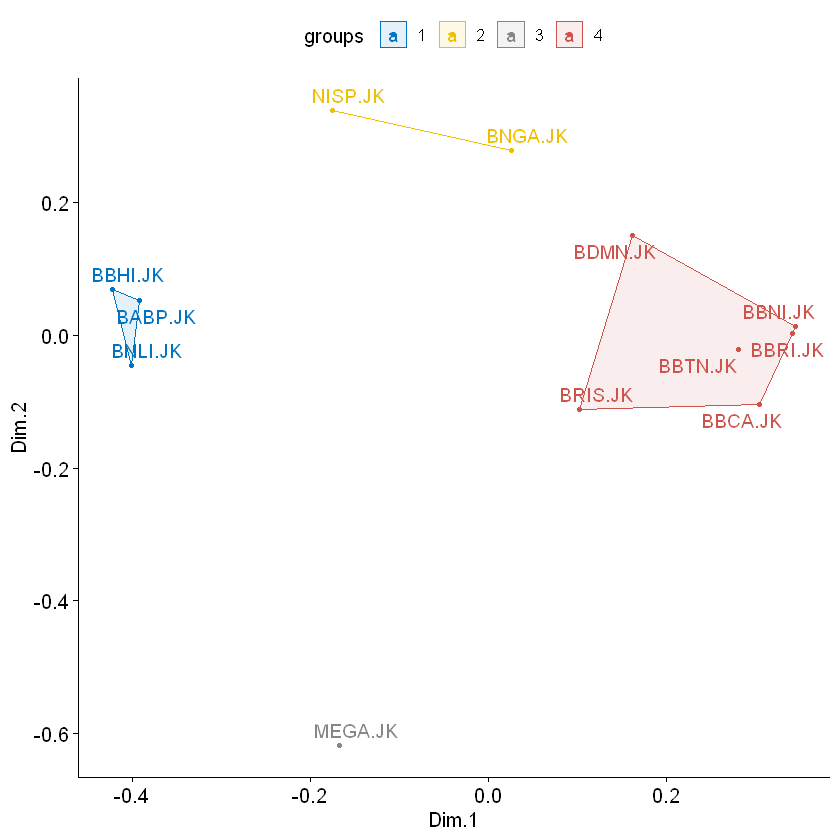

In [32]:
# K-means clustering
cordata<-cor(ts_returns)
mds.cor <- (1 - cordata) %>% cmdscale() %>% as_tibble();colnames(mds.cor) <- c("Dim.1", "Dim.2")
clust <- kmeans(mds.cor, 4)$cluster %>%
  as.factor()
mds.cor <- mds.cor %>%
  mutate(groups = clust)
# Plot and color by groups
ggscatter(mds.cor, x = "Dim.1", y = "Dim.2", 
          label = rownames(cordata), color = "groups",
          palette = "jco", size = 1, ellipse = TRUE, ellipse.type = "convex",
          repel = TRUE)

## 3.4 Distribution

###  3.4.1 Density 

In [33]:
ts_retDens<- ts_returns
ts_retDens$years <- factor(format(time(ts_returns), "%Y"), levels=c('2021', '2022', '2023'))
ts_retDens$months <- factor(format(time(ts_returns), "%B"), levels=month.name[rev(1:12)])
ts_retDens$days <- factor(format(time(ts_returns), "%A"),levels=c('Monday','Tuesday',
                                                                 'Wednesday','Thursday',
                                                                 'Friday'))

Picking joint bandwidth of 0.759

Picking joint bandwidth of 0.703

Picking joint bandwidth of 0.515



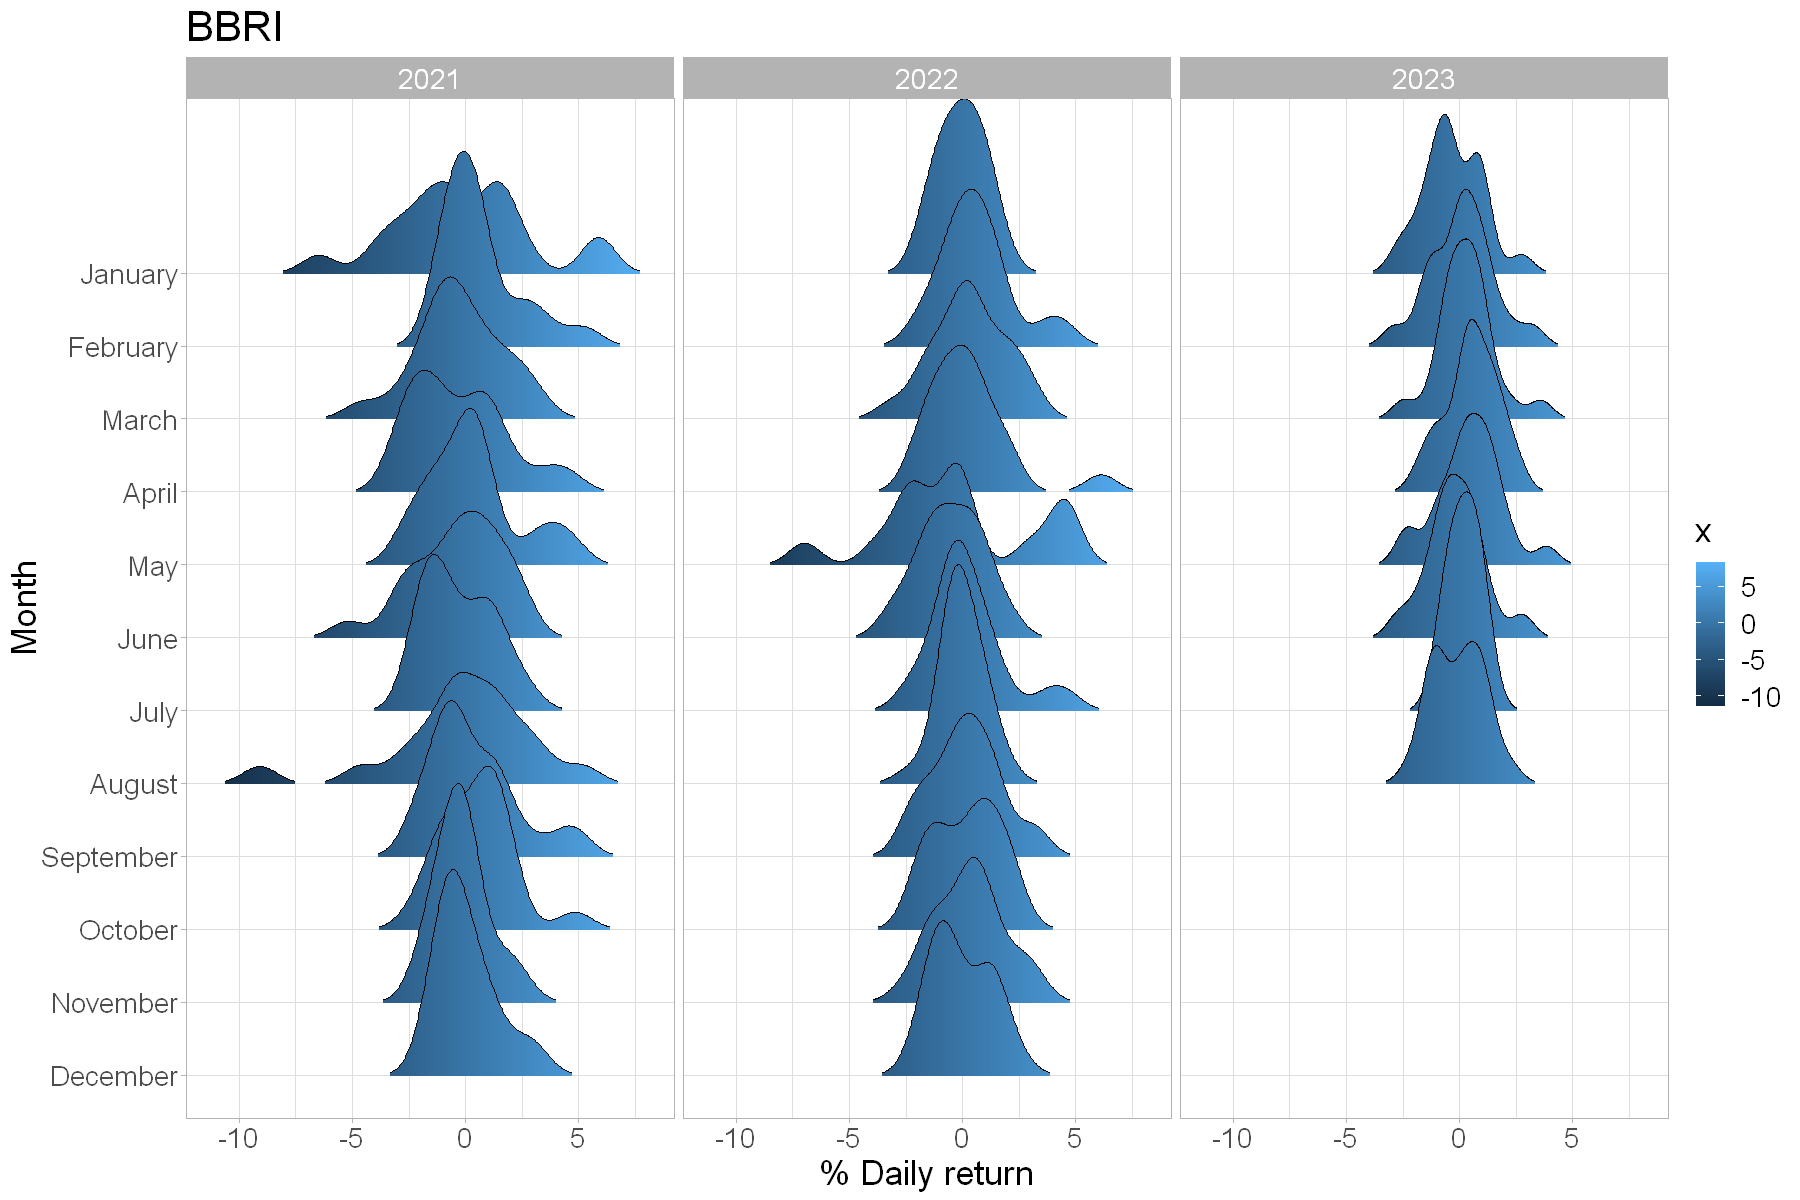

In [34]:
options(repr.plot.width=15, repr.plot.height=10)
df <- data.frame(ts_retDens)
df%>% 
ggplot( aes(x = BBRI.JK, y = months, fill = after_stat(x))) +
geom_density_ridges_gradient(scale = 3, size = 0.3, rel_min_height = 0.01) +
theme_minimal() + facet_grid(. ~ years) + theme(legend.position = "none") +
labs( x='% Daily return', y='Month', title='BBRI') + theme_light() + theme(text=element_text(size=21))


### 3.4.2 GED

In [35]:
dged <- function(x, mean = 0, sd = 1, nu = 1) {
    z = (x - mean)/sd
    lambda = sqrt(2^(-2/nu) * gamma(1/nu)/gamma(3/nu))
    g = nu/(lambda * (2^(1 + 1/nu)) * gamma(1/nu))
    density = g * exp(-0.5 * (abs(z/lambda))^nu)/sd
    density
}

gedFit <- function(x, ...) {
    start = c(mean = mean(x), sd = sqrt(var(x)), nu = 0.8)
    loglik = function(x, y = x) {
        f = -sum(log(dged(y, x[1], x[2], x[3])))
        f}
    fit = nlminb(start = start, objective = loglik, 
                 lower = c(-Inf,0, 0), 
                 upper = c(Inf, Inf, Inf), 
                 y = x, ...)
    names(fit$par) = c("mean", "sd", "nu")
    fit
}

- For ν = 2, it reduces to the normal distribution
- As ν decreases, the distribution becomes more leptokurtic (heavy-tailed)
- As ν increases, the distribution becomes more platykurtic (light-tailed)

In [36]:
colStdevs(ts_returns)

BBHI.JK  BABP.JK  MEGA.JK  BRIS.JK  BNLI.JK  BBTN.JK  BBRI.JK  BBCA.JK 
6.953378 5.449016 3.139633 3.133094 2.309123 2.015409 1.682274 1.373877 
 BBNI.JK  BDMN.JK  NISP.JK  BNGA.JK 
1.756709 1.974653 1.437619 1.684333

In [37]:
param = NULL
for (i in 1:12) param = rbind(param, gedFit(ts_returns[, i])$par)
rownames(param) = colnames(ts_returns)
param

Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"


mean          sd       nu       
BBHI.JK  7.461555e-14 6.909607 0.4918056
BABP.JK -2.072861e-12 5.422774 0.6112335
MEGA.JK -1.996457e-14 3.066064 0.3455948
BRIS.JK  1.098949e-08 3.107802 0.6580737
BNLI.JK -1.887782e-14 2.203517 0.5619017
BBTN.JK  6.673645e-12 2.038876 0.8919454
BBRI.JK  9.554061e-04 1.671090 1.2351342
BBCA.JK  3.452190e-09 1.382969 1.1332754
BBNI.JK -2.899359e-09 1.785092 1.0346142
BDMN.JK  5.934974e-15 2.761717 0.4170982
NISP.JK -1.500903e-14 1.475987 0.4276646
BNGA.JK -2.417640e-14 1.939497 0.4111386

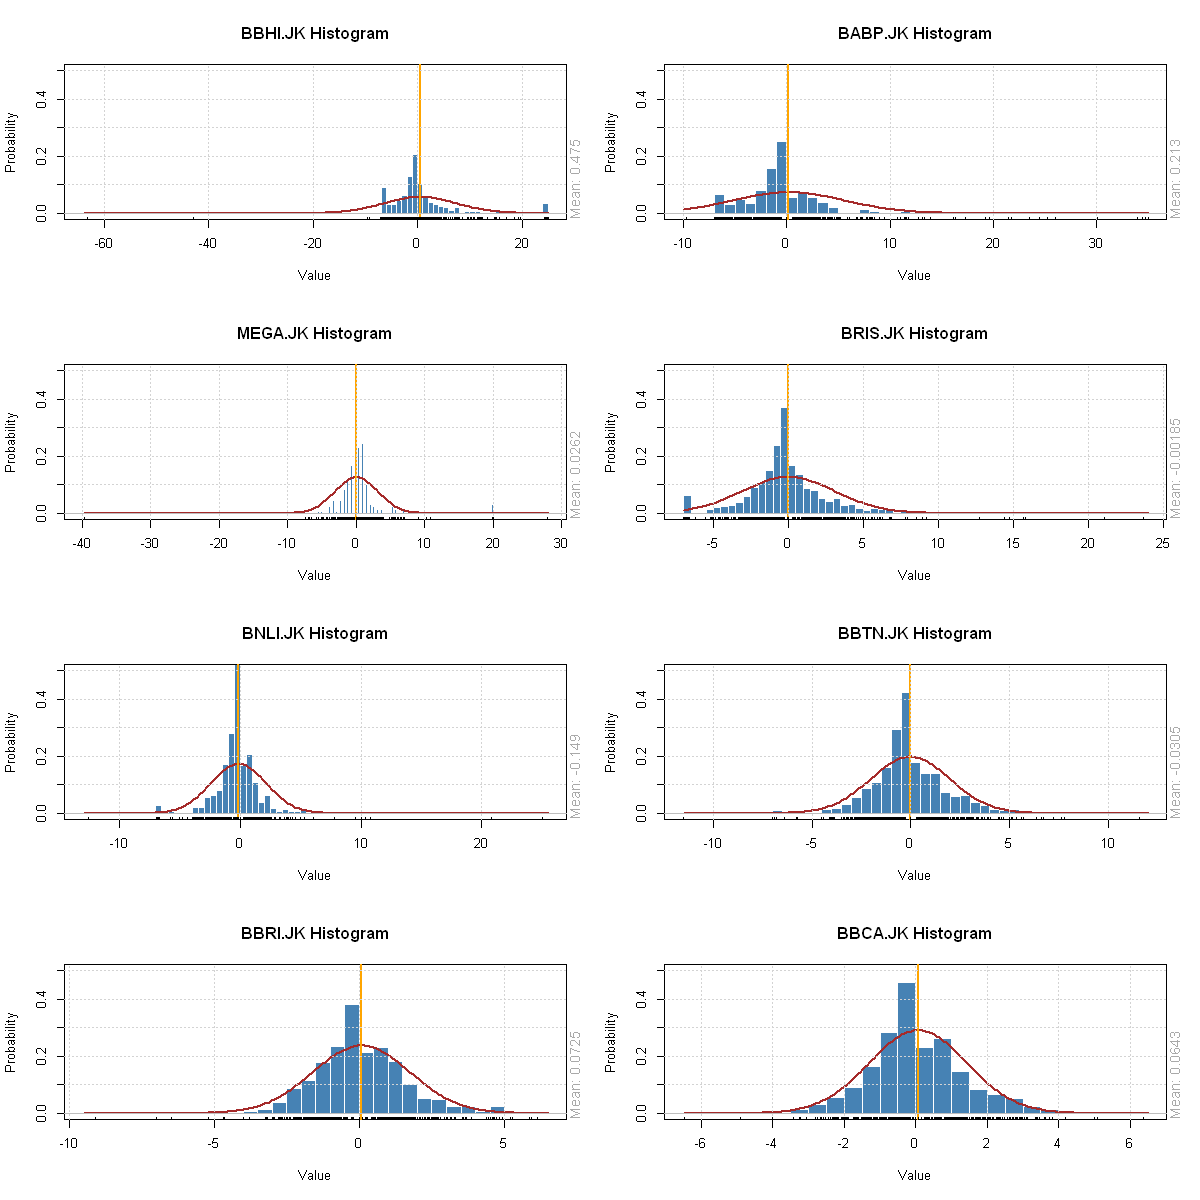

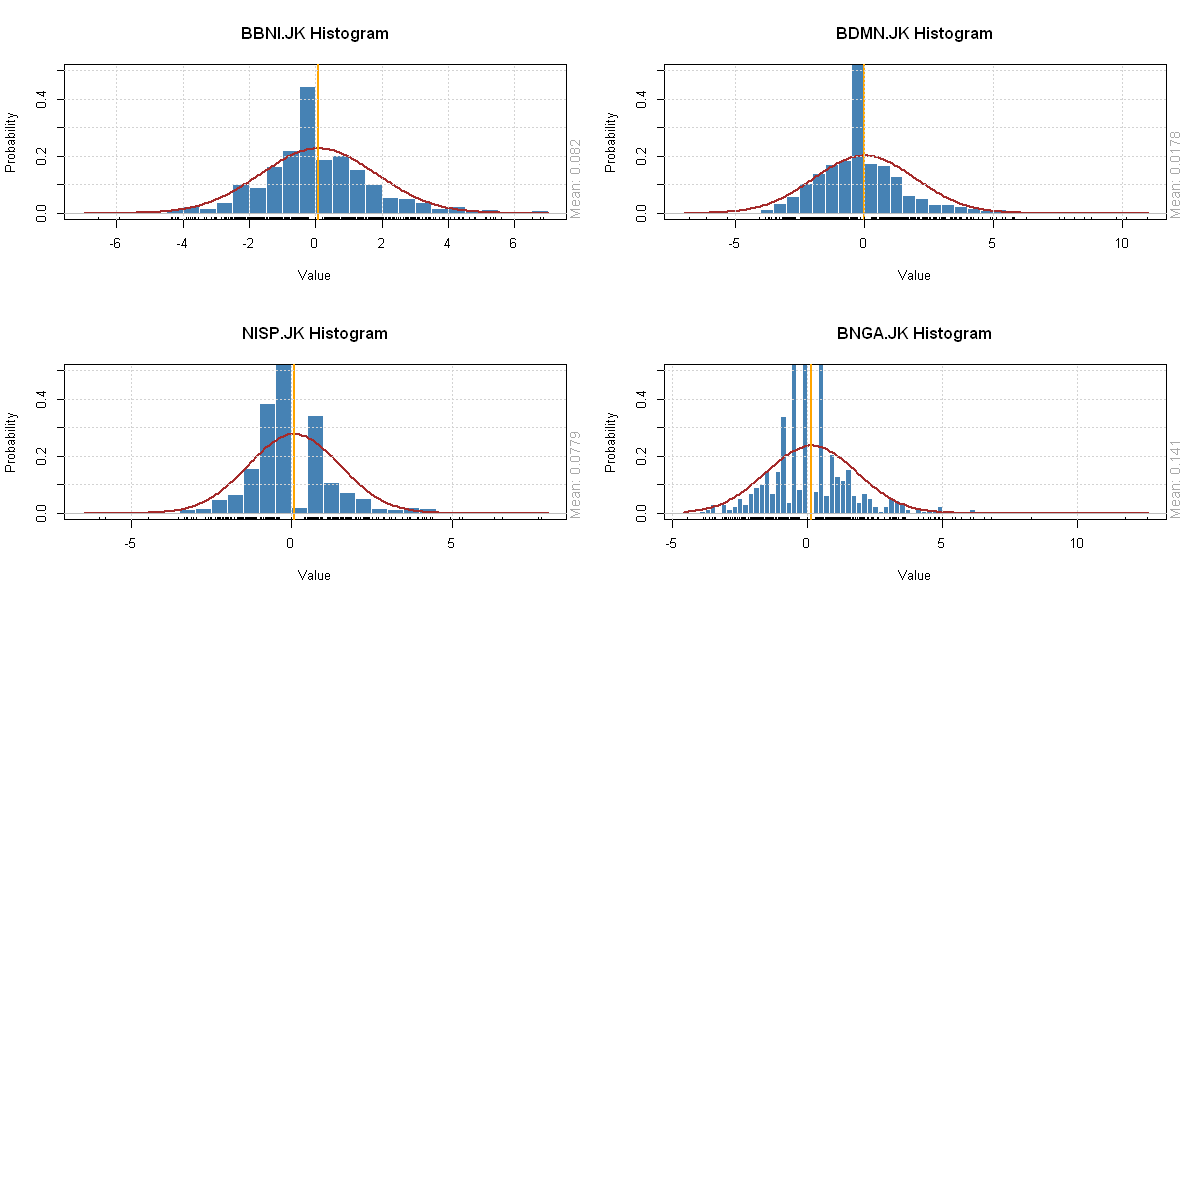

In [38]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(4, 2))
main = colnames(ts_returns)
for (i in 1:12) {
    u = histPlot(ts_returns[, i], main = main[i], col = "steelblue",
                 border = "white", xlab = "Returns", ylim = c(0, 0.5))
    v = dged(u, mean = param[i, 1], sd = param[i, 2], nu = param[i,3])
    lines(u, v, col = "darkgreen", lwd = 2)
}

### 3.4.3  5% Quantile Distribution

In [39]:
quantile_05 <- function (x) {quantile(x, probs = 0.05)}

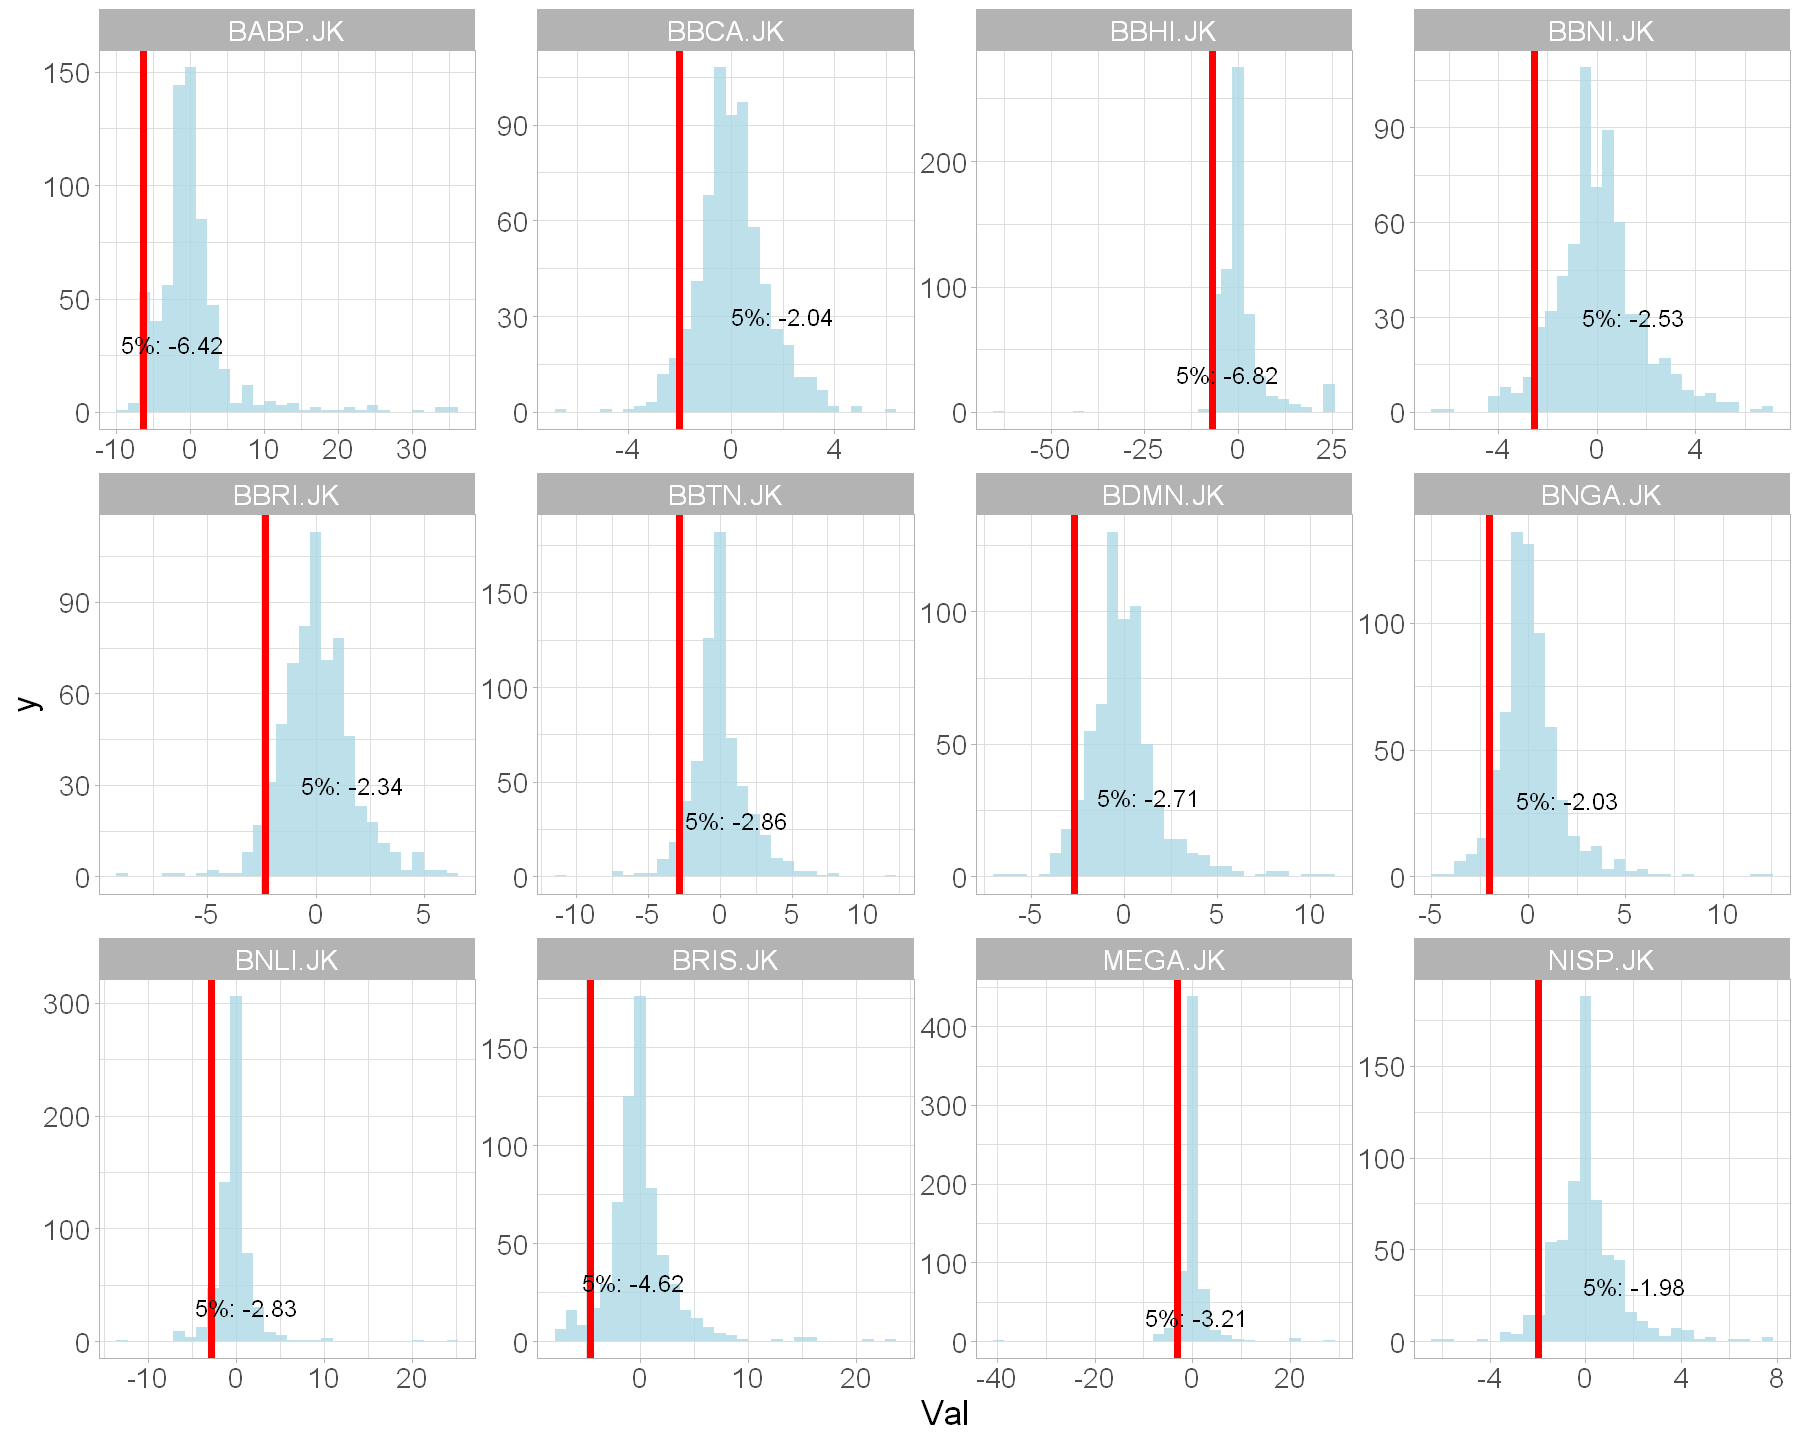

In [40]:
options(repr.plot.width=15, repr.plot.height=12)
ts_returns %>% data.frame() %>% gather('Vars', 'Val') %>% ggplot(aes(x=Val)) + theme_light()+theme(text=element_text(size=21))+
geom_histogram(bins=30, fill='lightblue', alpha=0.8) + stat_summaryh(fun.x=quantile_05, geom="vline", aes(xintercept=after_stat(x), y=10), col='red', lwd=2) +
    stat_summaryh(fun.x=quantile_05, geom="text", aes( label=paste0("5%: ",round(after_stat(x),2)), y=30), size=5, angle=0, position=position_nudge(x=4))+
facet_wrap(~Vars, scale='free')

### 3.4.4  Volume Distribution

In [41]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioVolume <- NULL
for(ticker in tickers){
    portfolioVolume <- cbind(portfolioVolume,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='daily', auto.assign=FALSE)[,5])
}

In [42]:
summary(portfolioVolume)

     Index            BBCA.JK.Volume      BBRI.JK.Volume     
 Min.   :2021-01-04   Min.   : 10653900   Min.   : 27676500  
 1st Qu.:2021-09-02   1st Qu.: 58005700   1st Qu.: 96590775  
 Median :2022-04-26   Median : 74823600   Median :133564150  
 Mean   :2022-04-30   Mean   : 86171645   Mean   :153995007  
 3rd Qu.:2022-12-22   3rd Qu.:102206075   3rd Qu.:183293425  
 Max.   :2023-09-01   Max.   :722827900   Max.   :898453700  
 BRIS.JK.Volume      MEGA.JK.Volume    BBTN.JK.Volume      BBHI.JK.Volume    
 Min.   :  2243800   Min.   :      0   Min.   :  3908300   Min.   :       0  
 1st Qu.: 11165575   1st Qu.:   6400   1st Qu.: 14999250   1st Qu.: 1350700  
 Median : 22311800   Median :  15450   Median : 24062350   Median : 3229200  
 Mean   : 44984365   Mean   :  41913   Mean   : 32296909   Mean   : 7450748  
 3rd Qu.: 43890200   3rd Qu.:  37450   3rd Qu.: 39839550   3rd Qu.: 8275875  
 Max.   :788319700   Max.   :1148936   Max.   :211664700   Max.   :95732200  
 BABP.JK.Volume     

In [43]:
df_stat <- data.frame(t(round(basicStats(portfolioVolume),2)))
reactable(df_stat, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_stat, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

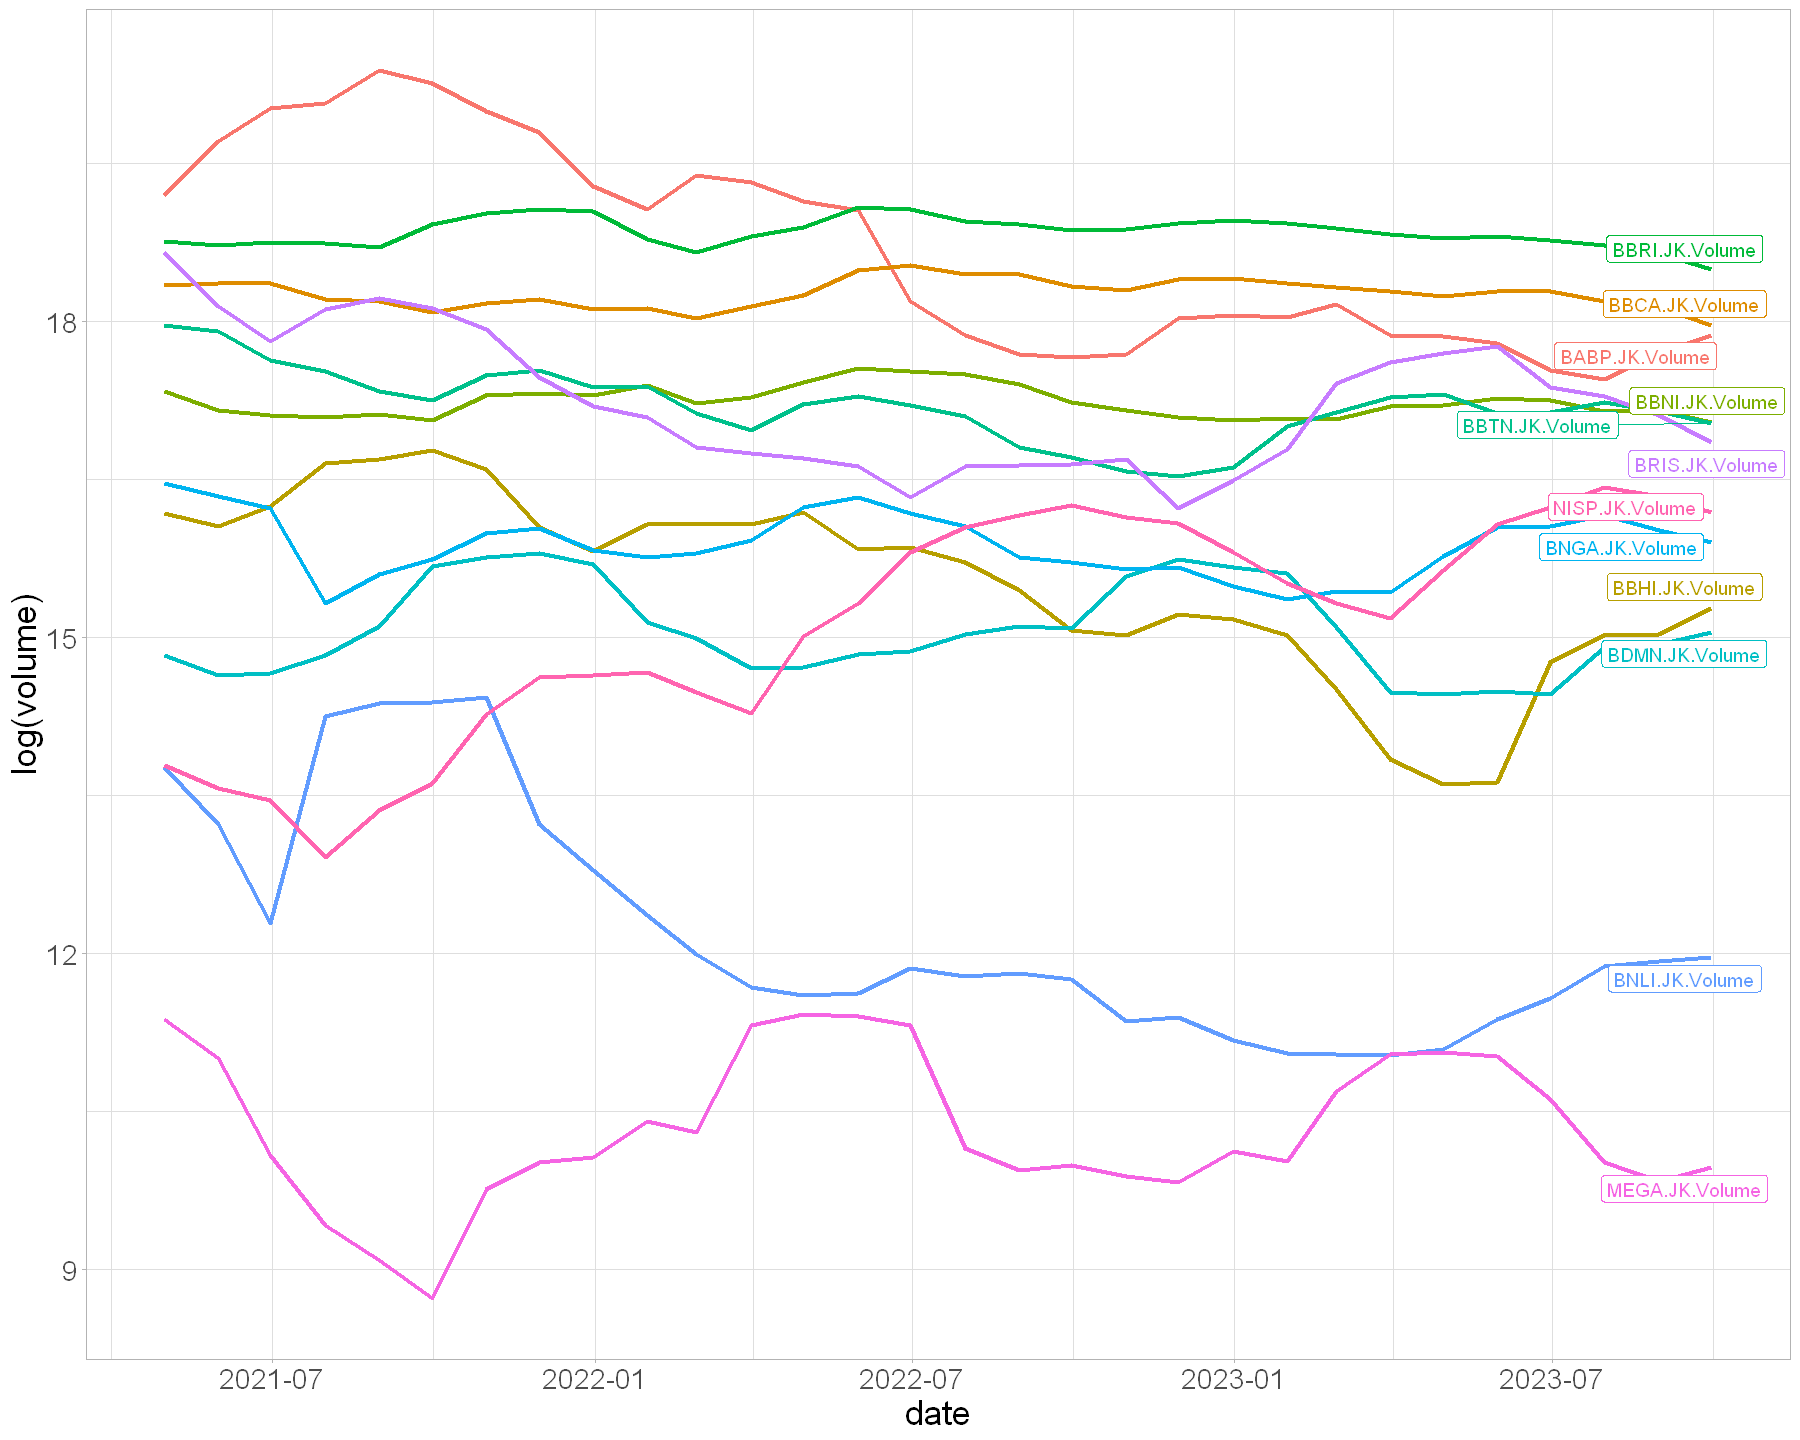

In [44]:
rollapply(as.timeSeries(portfolioVolume), by, FUN = "colMeans") %>% log()  %>% data.frame()  %>% mutate(date=as.Date(rownames(.))) %>% gather('Vars', 'Val', -date) %>% 
mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='log(volume)')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE, size=4)


## 3.4 Robust Covariance

$center
    BBHI.JK     BABP.JK     MEGA.JK     BRIS.JK     BNLI.JK     BBTN.JK 
-0.45981705 -0.67068536 -0.03650157 -0.13797555 -0.20134501 -0.05197252 
    BBRI.JK     BBCA.JK     BBNI.JK     BDMN.JK     NISP.JK     BNGA.JK 
 0.08987135  0.12557208  0.10005355 -0.05074909  0.03008311  0.01645111 

$cov
           BBHI.JK    BABP.JK      MEGA.JK   BRIS.JK     BNLI.JK     BBTN.JK
BBHI.JK 12.4865565  1.2672552  0.250796015 1.2209320 0.274123269  0.40826649
BABP.JK  1.2672552  9.6214029 -0.426258051 1.7360333 0.762664442  1.03549443
MEGA.JK  0.2507960 -0.4262581  2.202092724 0.1935518 0.008123481 -0.03189755
BRIS.JK  1.2209320  1.7360333  0.193551752 4.9299614 0.689411435  0.98834558
BNLI.JK  0.2741233  0.7626644  0.008123481 0.6894114 1.200188474  0.29536533
BBTN.JK  0.4082665  1.0354944 -0.031897554 0.9883456 0.295365325  2.47029772
BBRI.JK  0.1464735  0.6794914 -0.094568924 0.9077097 0.192187345  0.93163689
BBCA.JK  0.2642842  0.3746925  0.161292206 0.4587216 0.109419978  0.70520417
BBNI.JK  0.4099716  0.6610180  0.035285006 0.5801524 0.103454920  1.11102659
BDMN.JK  0.3285177  1.2092544 -0.034937340 0.6352061 0.132366919  0.77767333
NISP.JK  0.4836566  0.5195353  0.053811265 0.4914094 0.232273436  0.31885173
BNGA.JK  0.3688923  0.5799058 -0.084919820 0.6261339 0.321575797  0.63014541
            BBRI.JK   BBCA.JK    BBNI.JK     BDMN.JK    NISP.JK     BNGA.JK
BBHI.JK  0.14647355 0.2642842 0.40997160  0.32851772 0.48365656  0.36889234
BABP.JK  0.67949142 0.3746925 0.66101801  1.20925445 0.51953527  0.57990578
MEGA.JK -0.09456892 0.1612922 0.03528501 -0.03493734 0.05381126 -0.08491982
BRIS.JK  0.90770966 0.4587216 0.58015238  0.63520615 0.49140935  0.62613392
BNLI.JK  0.19218735 0.1094200 0.10345492  0.13236692 0.23227344  0.32157580
BBTN.JK  0.93163689 0.7052042 1.11102659  0.77767333 0.31885173  0.63014541
BBRI.JK  1.96600333 0.8210094 1.01461909  0.58471517 0.20065304  0.51425359
BBCA.JK  0.82100939 1.6906590 1.00939531  0.39790808 0.21569107  0.33797280
BBNI.JK  1.01461909 1.0093953 2.29559155  0.56981215 0.20699927  0.37802484
BDMN.JK  0.58471517 0.3979081 0.56981215  2.69261889 0.33177142  0.55701864
NISP.JK  0.20065304 0.2156911 0.20699927  0.33177142 1.41299848  0.38732893
BNGA.JK  0.51425359 0.3379728 0.37802484  0.55701864 0.38732893  1.26021084

$mu
    BBHI.JK     BABP.JK     MEGA.JK     BRIS.JK     BNLI.JK     BBTN.JK 
-0.45981705 -0.67068536 -0.03650157 -0.13797555 -0.20134501 -0.05197252 
    BBRI.JK     BBCA.JK     BBNI.JK     BDMN.JK     NISP.JK     BNGA.JK 
 0.08987135  0.12557208  0.10005355 -0.05074909  0.03008311  0.01645111 

$Sigma
           BBHI.JK    BABP.JK      MEGA.JK   BRIS.JK     BNLI.JK     BBTN.JK
BBHI.JK 12.4865565  1.2672552  0.250796015 1.2209320 0.274123269  0.40826649
BABP.JK  1.2672552  9.6214029 -0.426258051 1.7360333 0.762664442  1.03549443
MEGA.JK  0.2507960 -0.4262581  2.202092724 0.1935518 0.008123481 -0.03189755
BRIS.JK  1.2209320  1.7360333  0.193551752 4.9299614 0.689411435  0.98834558
BNLI.JK  0.2741233  0.7626644  0.008123481 0.6894114 1.200188474  0.29536533
BBTN.JK  0.4082665  1.0354944 -0.031897554 0.9883456 0.295365325  2.47029772
BBRI.JK  0.1464735  0.6794914 -0.094568924 0.9077097 0.192187345  0.93163689
BBCA.JK  0.2642842  0.3746925  0.161292206 0.4587216 0.109419978  0.70520417
BBNI.JK  0.4099716  0.6610180  0.035285006 0.5801524 0.103454920  1.11102659
BDMN.JK  0.3285177  1.2092544 -0.034937340 0.6352061 0.132366919  0.77767333
NISP.JK  0.4836566  0.5195353  0.053811265 0.4914094 0.232273436  0.31885173
BNGA.JK  0.3688923  0.5799058 -0.084919820 0.6261339 0.321575797  0.63014541
            BBRI.JK   BBCA.JK    BBNI.JK     BDMN.JK    NISP.JK     BNGA.JK
BBHI.JK  0.14647355 0.2642842 0.40997160  0.32851772 0.48365656  0.36889234
BABP.JK  0.67949142 0.3746925 0.66101801  1.20925445 0.51953527  0.57990578
MEGA.JK -0.09456892 0.1612922 0.03528501 -0.03493734 0.05381126 -0.08491982
BRIS.JK  0.90770966 0.4587216 0.58015238  0.63520615 0.49140935  0.62613392
BNLI.JK  0.19218735

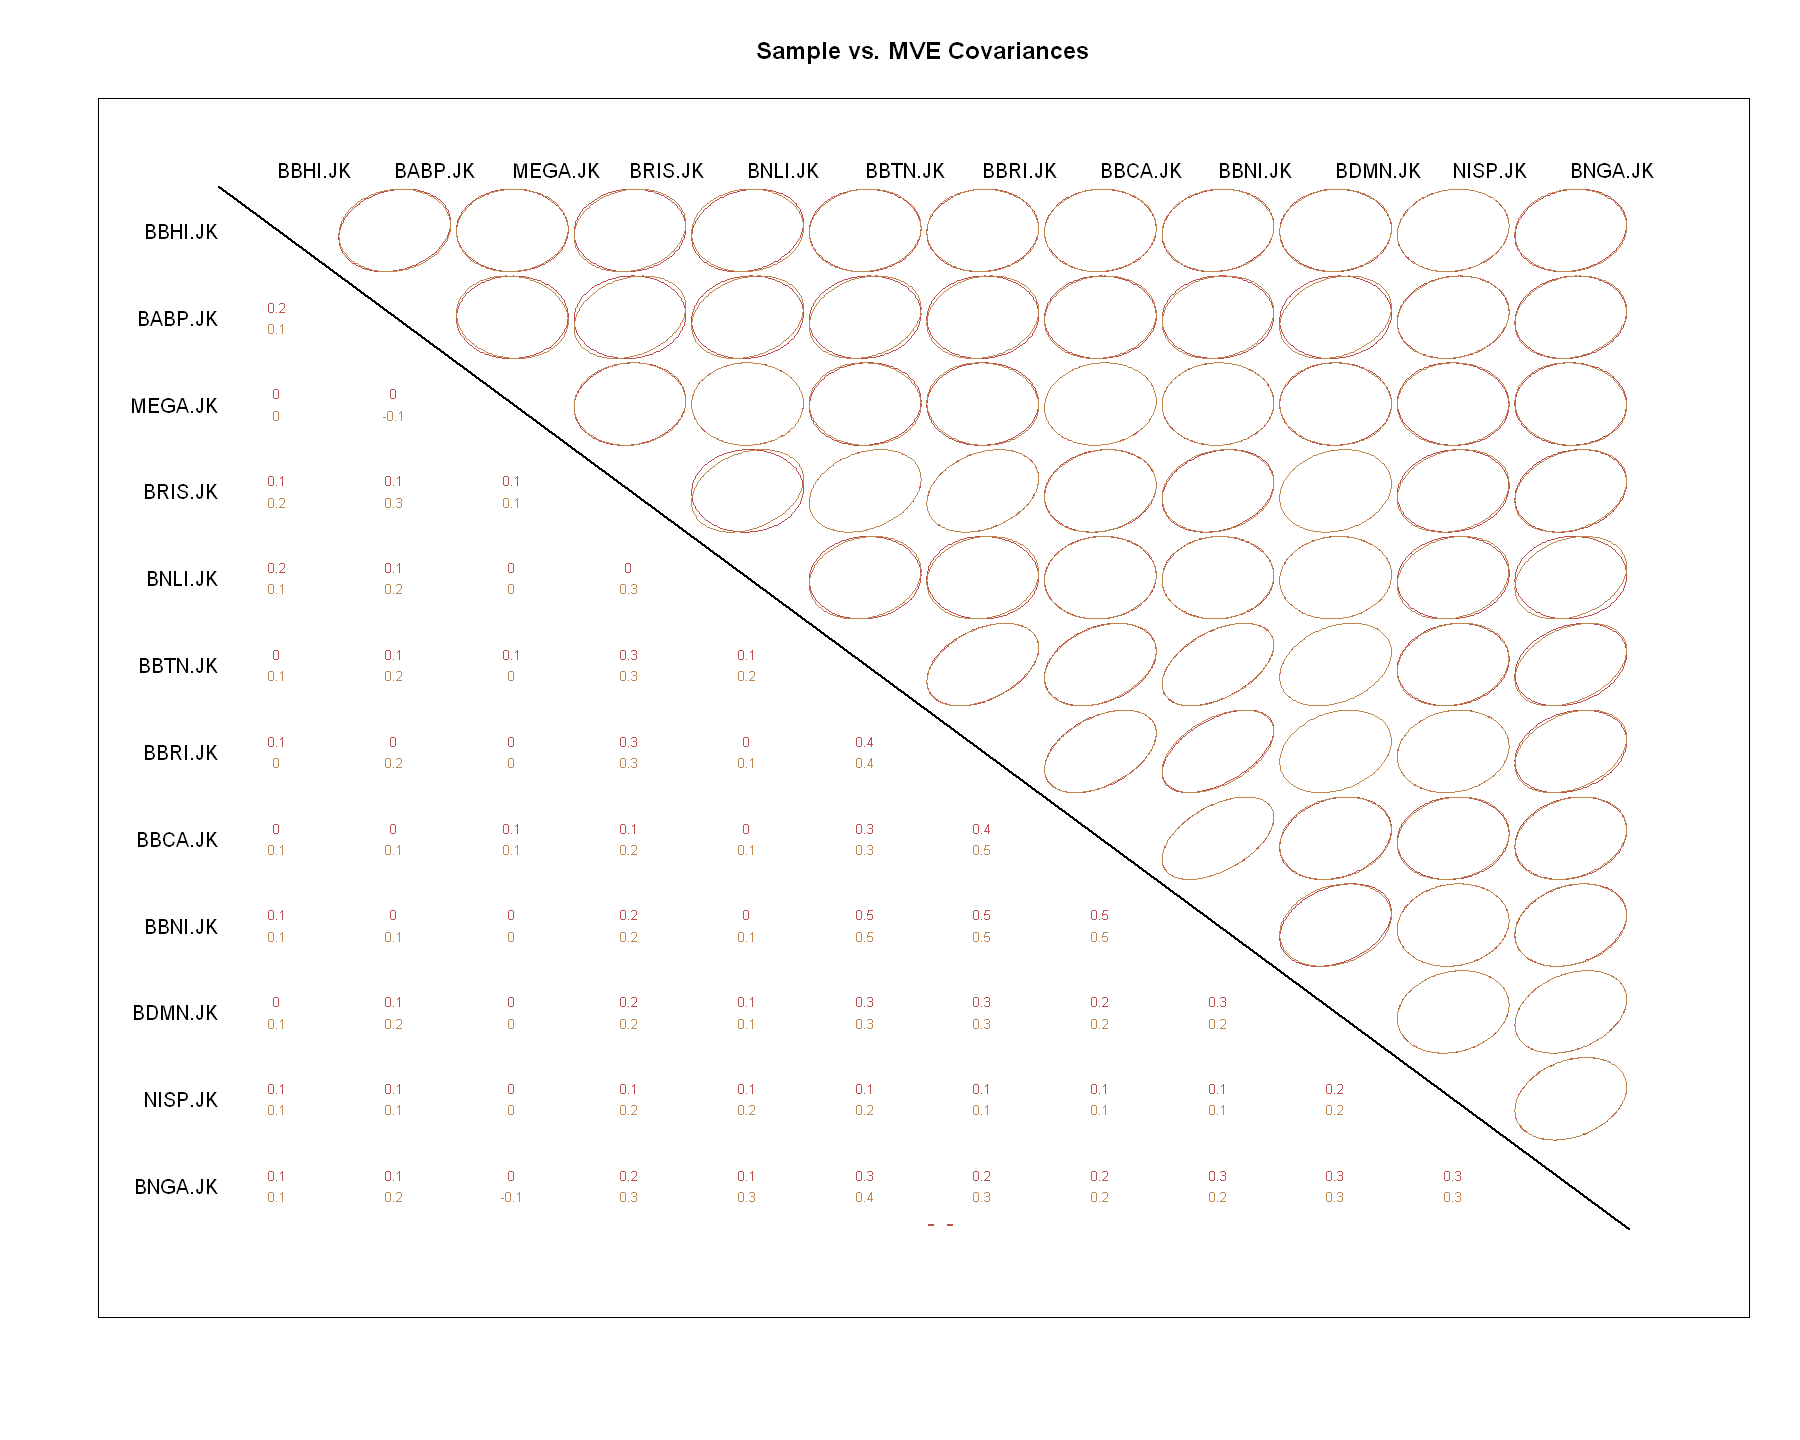

In [45]:
ans.mve <- assetsMeanCov(ts_returns, method = "mve")
ans.mve
covEllipsesPlot(list(cov(ts_returns), ans.mve$Sigma))
title(main = "Sample vs. MVE Covariances")

$center
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.474622980  0.212694672  0.026230158 -0.001848562 -0.148800326 -0.030463456 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.072493017  0.064272929  0.081951548  0.017766674  0.077895684  0.140594434 

$cov
            BBHI.JK    BABP.JK     MEGA.JK   BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.34946466  6.5961959  0.09588601 1.1085442 2.64386384 0.4306039
BABP.JK  6.59619590 29.6917750  0.36757683 0.8663302 0.95743987 0.8124232
MEGA.JK  0.09588601  0.3675768  9.85729690 0.8660239 0.07589458 0.4072589
BRIS.JK  1.10854422  0.8663302  0.86602385 9.8162754 0.26880427 1.6594109
BNLI.JK  2.64386384  0.9574399  0.07589458 0.2688043 5.33204714 0.2771619
BBTN.JK  0.43060390  0.8124232  0.40725895 1.6594109 0.27716193 4.0618743
BBRI.JK  0.69979695  0.3779613  0.14433107 1.4855072 0.05032471 1.2660914
BBCA.JK  0.29545750  0.1576101  0.34891168 0.5213010 0.13728461 0.8087485
BBNI.JK  1.24503195  0.4261391  0.14916499 1.1550724 0.13533331 1.6078796
BDMN.JK  0.28463483  0.8113710  0.10723913 1.0106566 0.28048209 1.1279398
NISP.JK  0.96282108  0.8115707 -0.13923284 0.4238736 0.24318793 0.3199094
BNGA.JK  1.56230139  0.9518018  0.02354342 0.9688393 0.20453560 0.8169154
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.69979695 0.2954575 1.2450320 0.2846348  0.9628211 1.56230139
BABP.JK 0.37796133 0.1576101 0.4261391 0.8113710  0.8115707 0.95180179
MEGA.JK 0.14433107 0.3489117 0.1491650 0.1072391 -0.1392328 0.02354342
BRIS.JK 1.48550718 0.5213010 1.1550724 1.0106566  0.4238736 0.96883929
BNLI.JK 0.05032471 0.1372846 0.1353333 0.2804821  0.2431879 0.20453560
BBTN.JK 1.26609143 0.8087485 1.6078796 1.1279398  0.3199094 0.81691544
BBRI.JK 2.83004434 0.9332631 1.4536311 0.7885194  0.2875936 0.64054163
BBCA.JK 0.93326309 1.8875391 1.1379349 0.5819141  0.1533443 0.40161584
BBNI.JK 1.45363111 1.1379349 3.0860279 1.0198624  0.2434789 0.70411374
BDMN.JK 0.78851945 0.5819141 1.0198624 3.8992553  0.4268407 0.96960861
NISP.JK 0.28759362 0.1533443 0.2434789 0.4268407  2.0667479 0.62943028
BNGA.JK 0.64054163 0.4016158 0.7041137 0.9696086  0.6294303 2.83697639
attr(,"lambda")
[1] 0.06421407

$mu
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.474622980  0.212694672  0.026230158 -0.001848562 -0.148800326 -0.030463456 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.072493017  0.064272929  0.081951548  0.017766674  0.077895684  0.140594434 

$Sigma
            BBHI.JK    BABP.JK     MEGA.JK   BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.34946466  6.5961959  0.09588601 1.1085442 2.64386384 0.4306039
BABP.JK  6.59619590 29.6917750  0.36757683 0.8663302 0.95743987 0.8124232
MEGA.JK  0.09588601  0.3675768  9.85729690 0.8660239 0.07589458 0.4072589
BRIS.JK  1.10854422  0.8663302  0.86602385 9.8162754 0.26880427 1.6594109
BNLI.JK  2.64386384  0.9574399  0.07589458 0.2688043 5.33204714 0.2771619
BBTN.JK  0.43060390  0.8124232  0.40725895 1.6594109 0.27716193 4.0618743
BBRI.JK  0.69979695  0.3779613  0.14433107 1.4855072 0.05032471 1.2660914
BBCA.JK  0.29545750  0.1576101  0.34891168 0.5213010 0.13728461 0.8087485
BBNI.JK  1.24503195  0.4261391  0.14916499 1.1550724 0.13533331 1.6078796
BDMN.JK  0.28463483  0.8113710  0.10723913 1.0106566 0.28048209 1.1279398
NISP.JK  0.96282108  0.8115707 -0.13923284 0.4238736 0.24318793 0.3199094
BNGA.JK  1.56230139  0.9518018  0.02354342 0.9688393 0.20453560 0.8169154
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.69979695 0.2954575 1.2450320 0.2846348  0.9628211 1.56230139
BABP.JK 0.37796133 0.1576101 0.4261391 0.8113710  0.8115707 0.95180179
MEGA.JK 0.14433107 0.3489117 0.1491650 0.1072391 -0.1392328 0.02354342
BRIS.JK 1.48550718 0.5213010 1.1550724 1.0106566  0.4238736 0.96883929
BNLI.JK 0.05032471 0.1372846 0.1353333 0.2804821  0.2431879 0.20453560
BBTN.JK 1.26609143 0.8087485 1.607879

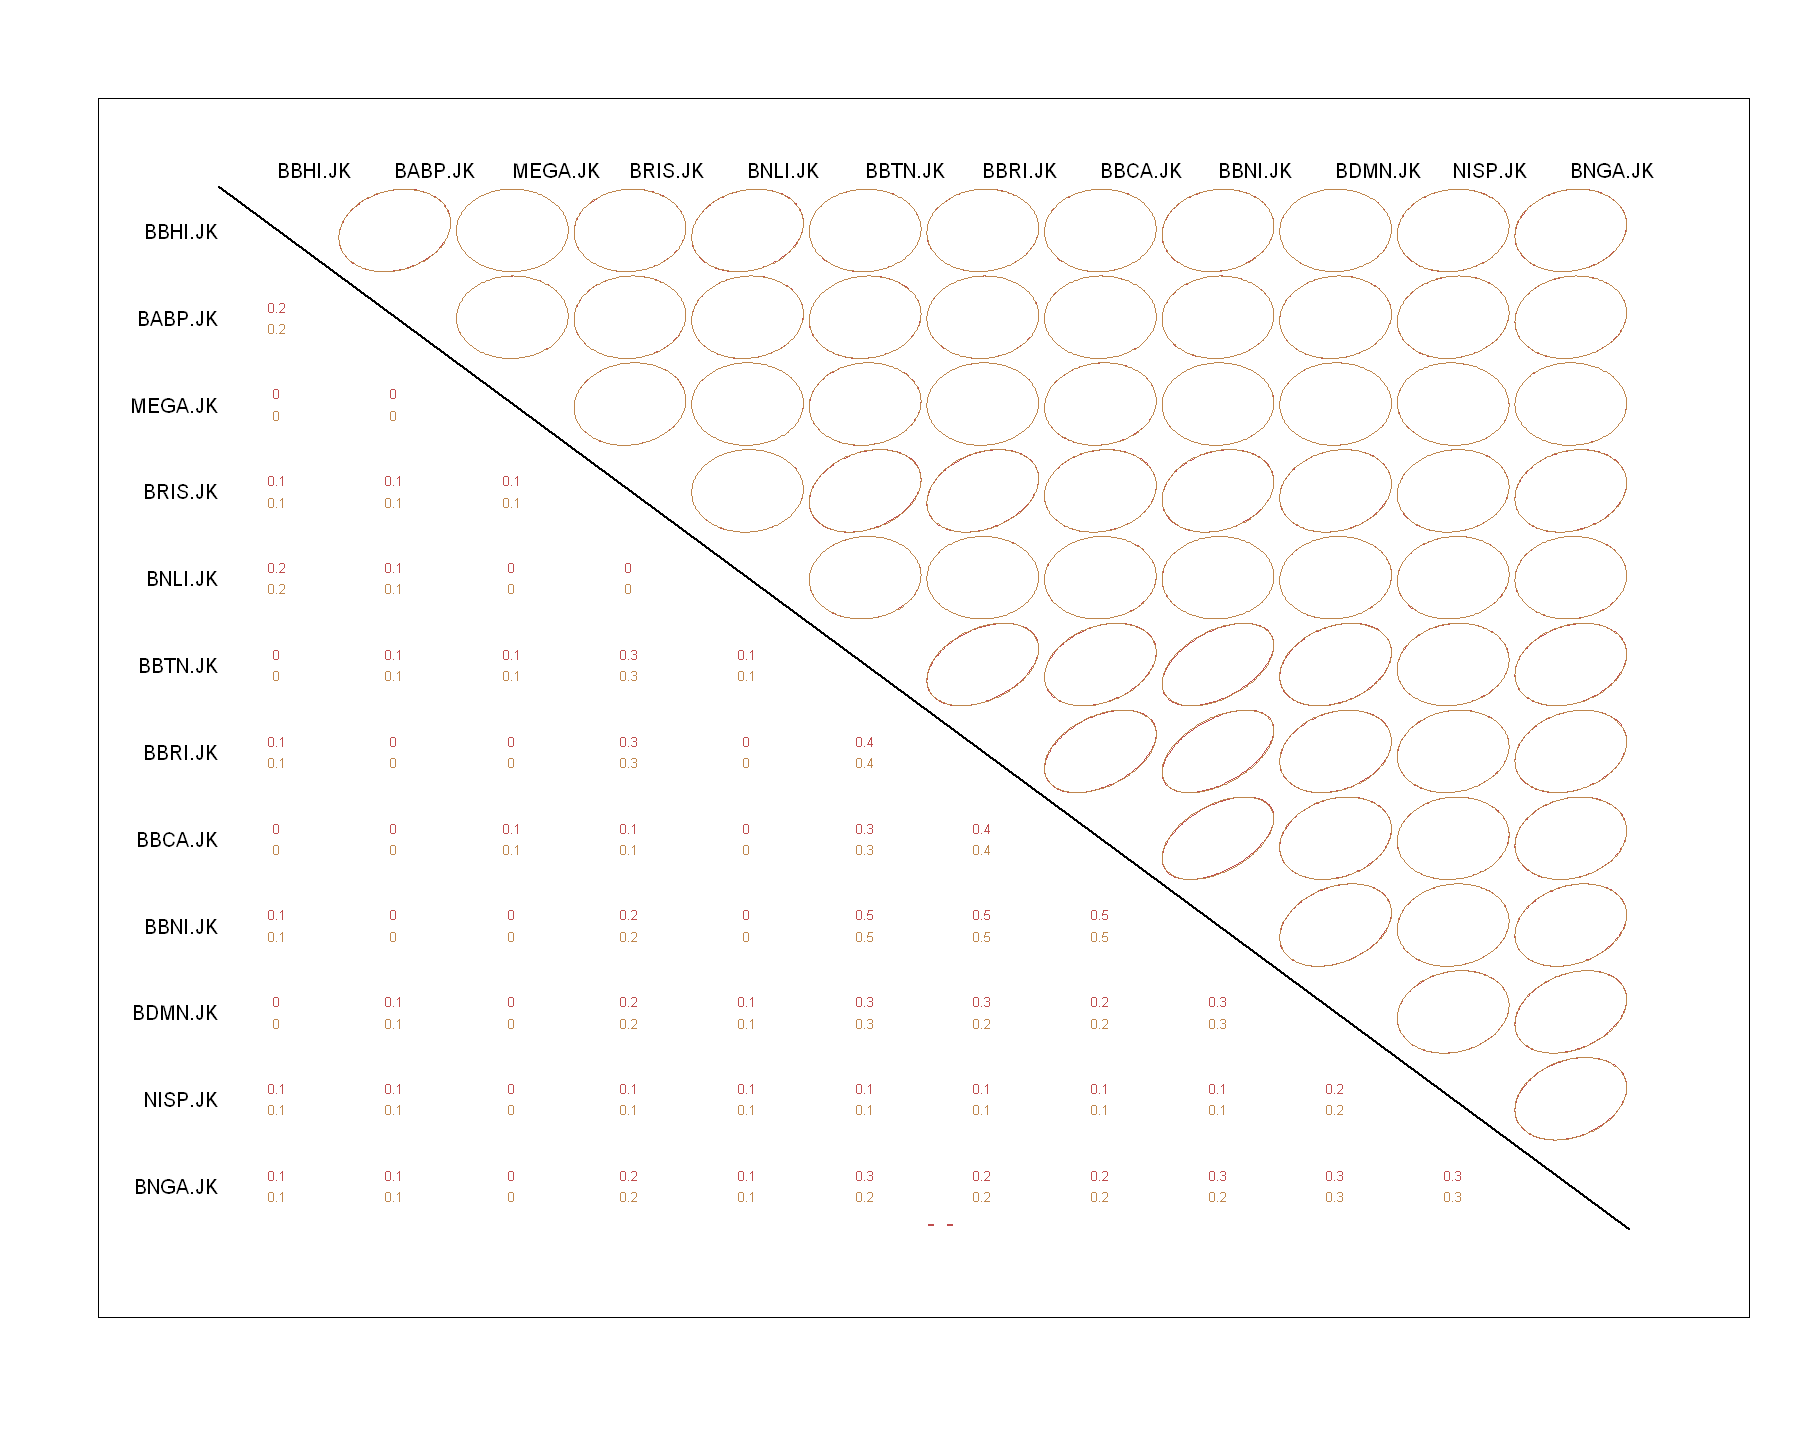

In [46]:
ans.shrink <- assetsMeanCov(ts_returns, "shrink")
ans.shrink
covEllipsesPlot(list(cov(ts_returns), ans.shrink$cov))

In [47]:
sum(-4.2,-2.0,9.7,-3.1,-2.2,2.4,-1.6,6.1,-5.3,-0.5,-8.0,0.4)

[1] -8.3

$center
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.474622980  0.212694672  0.026230158 -0.001848562 -0.148800326 -0.030463456 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.072493017  0.064272929  0.081951548  0.017766674  0.077895684  0.140594434 

$cov
           BBHI.JK    BABP.JK     MEGA.JK    BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.7168960  7.0158232  0.18807884  1.3749253 2.70577653 0.4533718
BABP.JK  7.0158232 29.2962582  0.45349284  0.8682954 0.94584951 0.8930238
MEGA.JK  0.1880788  0.4534928  9.93560742  0.9270979 0.09257010 0.4445081
BRIS.JK  1.3749253  0.8682954  0.92709793 10.0044127 0.23180408 1.7849150
BNLI.JK  2.7057765  0.9458495  0.09257010  0.2318041 5.38569716 0.2664645
BBTN.JK  0.4533718  0.8930238  0.44450806  1.7849150 0.26646453 4.0777693
BBRI.JK  0.7599293  0.3680591  0.15144968  1.6318995 0.04835436 1.3711196
BBCA.JK  0.3612074  0.1500811  0.37455911  0.5668556 0.14295290 0.8775924
BBNI.JK  1.4344679  0.4204352  0.16736207  1.2607159 0.13153676 1.7083096
BDMN.JK  0.3041843  0.8836311  0.12630920  1.0829514 0.26924771 1.2104819
NISP.JK  1.0468863  0.8083409 -0.14634184  0.4617864 0.24592218 0.3394925
BNGA.JK  1.6874765  0.9358180  0.02869791  1.0716373 0.19263667 0.8813424
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.75992929 0.3612074 1.4344679 0.3041843  1.0468863 1.68747649
BABP.JK 0.36805912 0.1500811 0.4204352 0.8836311  0.8083409 0.93581804
MEGA.JK 0.15144968 0.3745591 0.1673621 0.1263092 -0.1463418 0.02869791
BRIS.JK 1.63189951 0.5668556 1.2607159 1.0829514  0.4617864 1.07163732
BNLI.JK 0.04835436 0.1429529 0.1315368 0.2692477  0.2459222 0.19263667
BBTN.JK 1.37111960 0.8775924 1.7083096 1.2104819  0.3394925 0.88134242
BBRI.JK 2.83844169 0.9976826 1.5479038 0.8430258  0.3095823 0.69334943
BBCA.JK 0.99768260 1.8935284 1.2236720 0.6188304  0.1590665 0.44412960
BBNI.JK 1.54790381 1.2236720 3.0896156 1.0925746  0.2594192 0.77683546
BDMN.JK 0.84302585 0.6188304 1.0925746 3.9152334  0.4523606 1.02214836
NISP.JK 0.30958235 0.1590665 0.2594192 0.4523606  2.0220287 0.66011775
BNGA.JK 0.69334943 0.4441296 0.7768355 1.0221484  0.6601178 2.83151476

$mu
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.474622980  0.212694672  0.026230158 -0.001848562 -0.148800326 -0.030463456 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.072493017  0.064272929  0.081951548  0.017766674  0.077895684  0.140594434 

$Sigma
           BBHI.JK    BABP.JK     MEGA.JK    BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.7168960  7.0158232  0.18807884  1.3749253 2.70577653 0.4533718
BABP.JK  7.0158232 29.2962582  0.45349284  0.8682954 0.94584951 0.8930238
MEGA.JK  0.1880788  0.4534928  9.93560742  0.9270979 0.09257010 0.4445081
BRIS.JK  1.3749253  0.8682954  0.92709793 10.0044127 0.23180408 1.7849150
BNLI.JK  2.7057765  0.9458495  0.09257010  0.2318041 5.38569716 0.2664645
BBTN.JK  0.4533718  0.8930238  0.44450806  1.7849150 0.26646453 4.0777693
BBRI.JK  0.7599293  0.3680591  0.15144968  1.6318995 0.04835436 1.3711196
BBCA.JK  0.3612074  0.1500811  0.37455911  0.5668556 0.14295290 0.8775924
BBNI.JK  1.4344679  0.4204352  0.16736207  1.2607159 0.13153676 1.7083096
BDMN.JK  0.3041843  0.8836311  0.12630920  1.0829514 0.26924771 1.2104819
NISP.JK  1.0468863  0.8083409 -0.14634184  0.4617864 0.24592218 0.3394925
BNGA.JK  1.6874765  0.9358180  0.02869791  1.0716373 0.19263667 0.8813424
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.75992929 0.3612074 1.4344679 0.3041843  1.0468863 1.68747649
BABP.JK 0.36805912 0.1500811 0.4204352 0.8836311  0.8083409 0.93581804
MEGA.JK 0.15144968 0.3745591 0.1673621 0.1263092 -0.1463418 0.02869791
BRIS.JK 1.63189951 0.5668556 1.2607159 1.0829514  0.4617864 1.07163732
BNLI.JK 0.04835436 0.1429529 0.1315368 0.2692477  0.2459222 0.19263667
BBTN.JK 1.37111960 0.8775924 1.7083096 1.2104819  0.3394925 0.881342

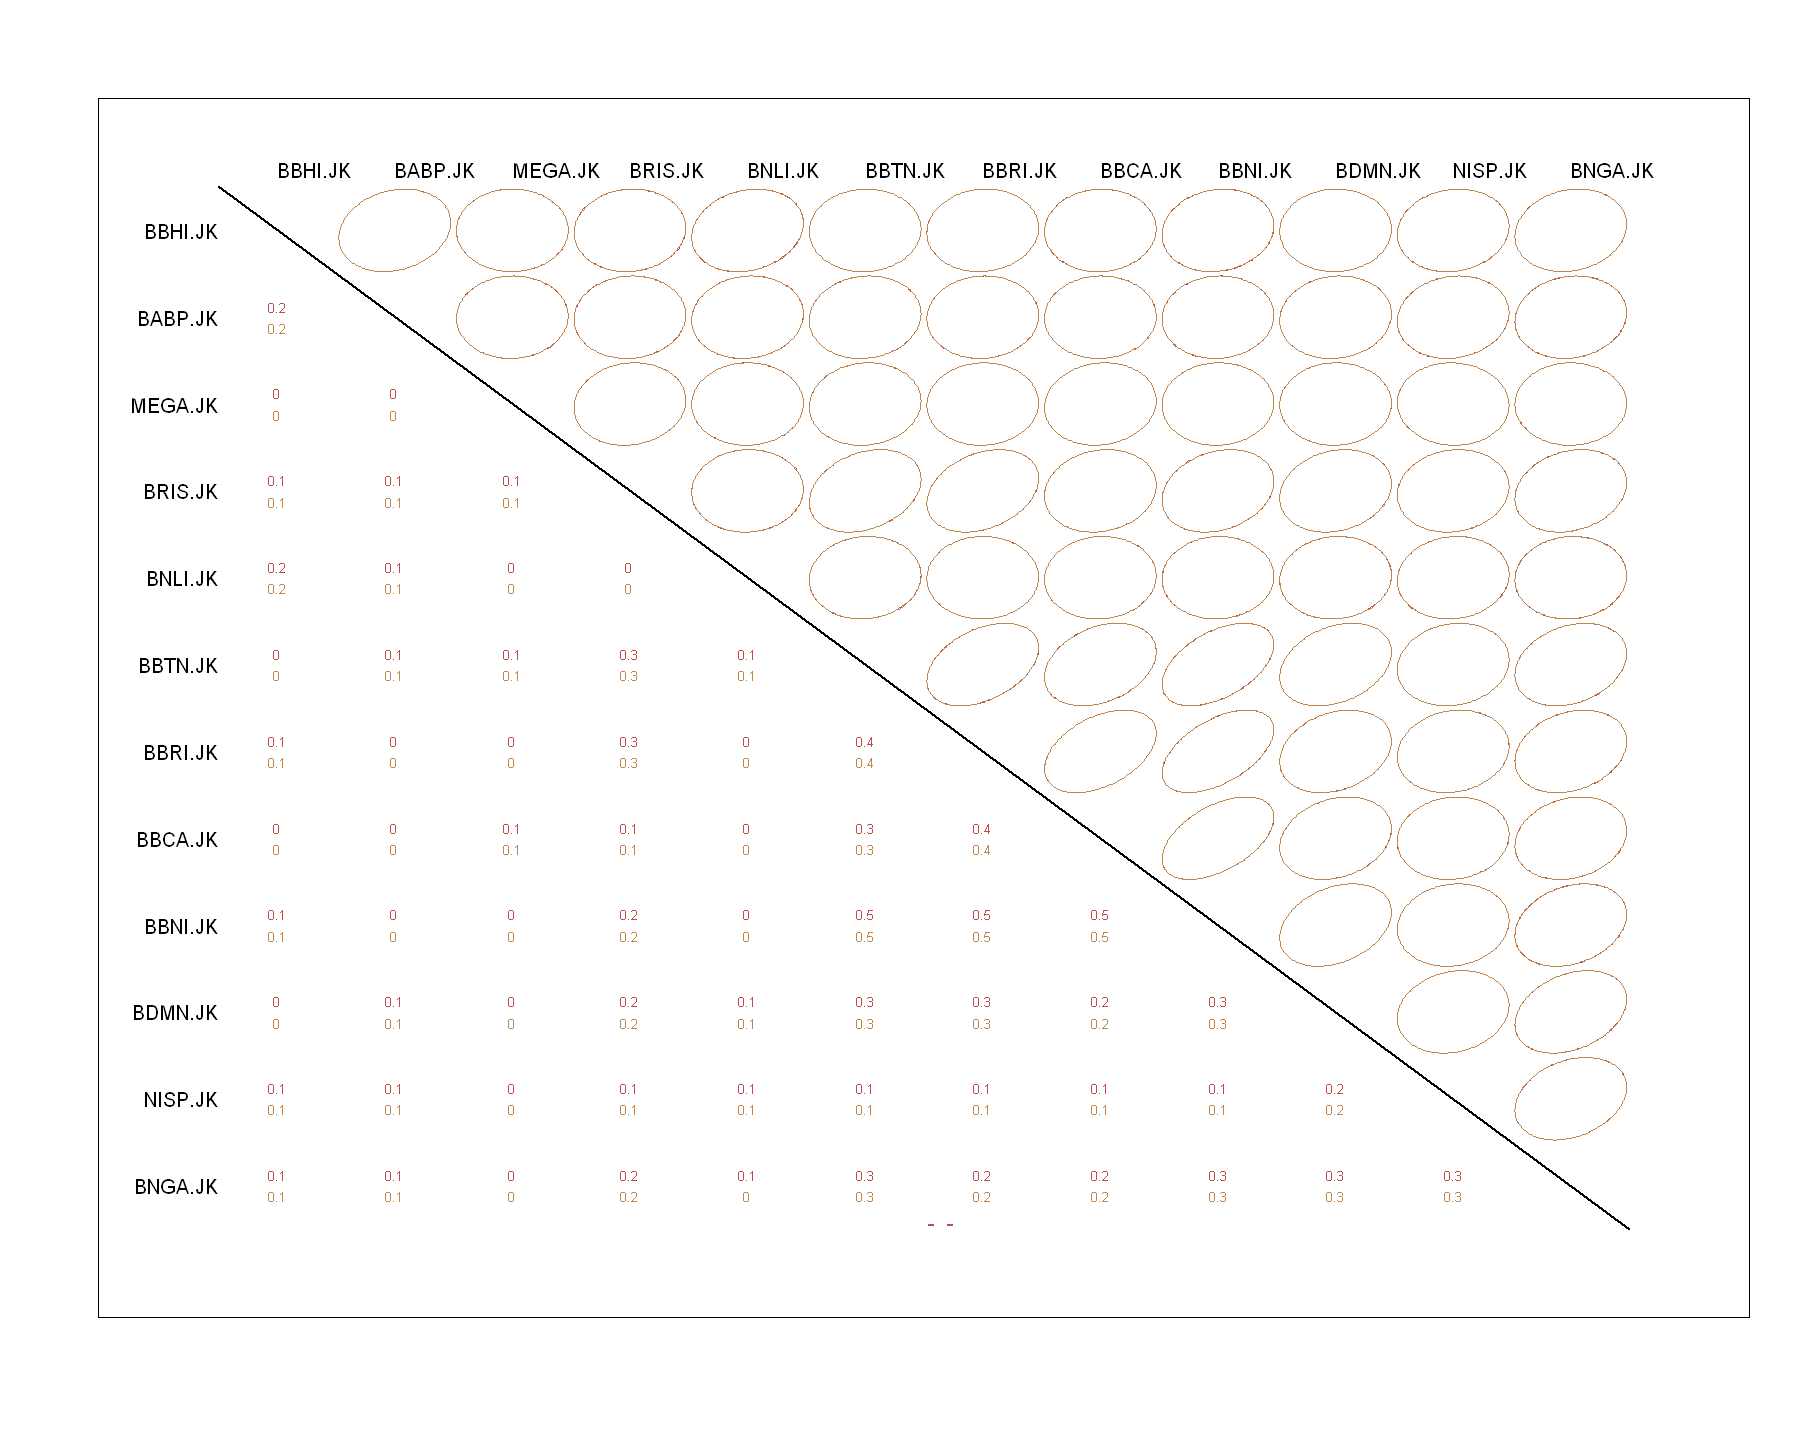

In [48]:
ans.bagged <- assetsMeanCov(ts_returns, "bagged")
ans.bagged
covEllipsesPlot(list(cov(ts_returns), ans.bagged$cov))

## 3.5 Multivariate Outliers Detection

In [49]:
outliers <- assetsOutliers(ts_returns, ans.mve$center, ans.mve$cov)
outliers

$center
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
-0.465299343 -0.640693307 -0.057755499 -0.175043849 -0.198282282 -0.062472630 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.065050235  0.103996138  0.073837073 -0.105324354  0.045609739 -0.004081306 

$cov
           BBHI.JK    BABP.JK      MEGA.JK   BRIS.JK    BNLI.JK     BBTN.JK
BBHI.JK 11.8795687  1.5660660  0.172280778 1.4366949 0.30087077  0.59645287
BABP.JK  1.5660660  9.5631642 -0.272829669 1.8565163 0.83363245  1.03199363
MEGA.JK  0.1722808 -0.2728297  1.951864301 0.1511976 0.03885175 -0.01862356
BRIS.JK  1.4366949  1.8565163  0.151197591 4.9952293 0.74370874  1.01020339
BNLI.JK  0.3008708  0.8336324  0.038851754 0.7437087 1.15374937  0.29269513
BBTN.JK  0.5964529  1.0319936 -0.018623561 1.0102034 0.29269513  2.37747250
BBRI.JK  0.3989319  0.7216685 -0.116914949 0.8775514 0.19834068  0.90042589
BBCA.JK  0.4690779  0.4003180  0.153173187 0.4073091 0.0920916

In [50]:
ans.cov <- assetsMeanCov(ts_returns, method = "cov")
ans.cov

$center
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.474622980  0.212694672  0.026230158 -0.001848562 -0.148800326 -0.030463456 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.072493017  0.064272929  0.081951548  0.017766674  0.077895684  0.140594434 

$cov
           BBHI.JK    BABP.JK     MEGA.JK   BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.3494647  7.0488300  0.10246575 1.1846130 2.82528702 0.4601521
BABP.JK  7.0488300 29.6917750  0.39280013 0.9257782 1.02313984 0.8681721
MEGA.JK  0.1024658  0.3928001  9.85729690 0.9254508 0.08110250 0.4352052
BRIS.JK  1.1846130  0.9257782  0.92545082 9.8162754 0.28724975 1.7732804
BNLI.JK  2.8252870  1.0231398  0.08110250 0.2872497 5.33204714 0.2961809
BBTN.JK  0.4601521  0.8681721  0.43520525 1.7732804 0.29618092 4.0618743
BBRI.JK  0.7478173  0.4038972  0.15423514 1.5874434 0.05377801 1.3529712
BBCA.JK  0.3157319  0.1684253  0.37285416 0.5570729 0.14670515 0.8642452
BBNI.JK  1.3304666  0.4553809  0.15940076 1.2343340 0.14461994 1.7182130
BDMN.JK  0.3041666  0.8670477  0.11459793 1.0800084 0.29972890 1.2053395
NISP.JK  1.0288903  0.8672610 -0.14878706 0.4529600 0.25987560 0.3418618
BNGA.JK  1.6695072  1.0171149  0.02515898 1.0353215 0.21857093 0.8729726
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.74781735 0.3157319 1.3304666 0.3041666  1.0288903 1.66950725
BABP.JK 0.40389721 0.1684253 0.4553809 0.8670477  0.8672610 1.01711488
MEGA.JK 0.15423514 0.3728542 0.1594008 0.1145979 -0.1487871 0.02515898
BRIS.JK 1.58744338 0.5570729 1.2343340 1.0800084  0.4529600 1.03532150
BNLI.JK 0.05377801 0.1467051 0.1446199 0.2997289  0.2598756 0.21857093
BBTN.JK 1.35297122 0.8642452 1.7182130 1.2053395  0.3418618 0.87297256
BBRI.JK 2.83004434 0.9973040 1.5533800 0.8426280  0.3073284 0.68449590
BBCA.JK 0.99730404 1.8875391 1.2160205 0.6218453  0.1638668 0.42917491
BBNI.JK 1.55337996 1.2160205 3.0860279 1.0898459  0.2601865 0.75243035
BDMN.JK 0.84262802 0.6218453 1.0898459 3.8992553  0.4561307 1.03614360
NISP.JK 0.30732843 0.1638668 0.2601865 0.4561307  2.0667479 0.67262208
BNGA.JK 0.68449590 0.4291749 0.7524304 1.0361436  0.6726221 2.83697639

$mu
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.474622980  0.212694672  0.026230158 -0.001848562 -0.148800326 -0.030463456 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.072493017  0.064272929  0.081951548  0.017766674  0.077895684  0.140594434 

$Sigma
           BBHI.JK    BABP.JK     MEGA.JK   BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.3494647  7.0488300  0.10246575 1.1846130 2.82528702 0.4601521
BABP.JK  7.0488300 29.6917750  0.39280013 0.9257782 1.02313984 0.8681721
MEGA.JK  0.1024658  0.3928001  9.85729690 0.9254508 0.08110250 0.4352052
BRIS.JK  1.1846130  0.9257782  0.92545082 9.8162754 0.28724975 1.7732804
BNLI.JK  2.8252870  1.0231398  0.08110250 0.2872497 5.33204714 0.2961809
BBTN.JK  0.4601521  0.8681721  0.43520525 1.7732804 0.29618092 4.0618743
BBRI.JK  0.7478173  0.4038972  0.15423514 1.5874434 0.05377801 1.3529712
BBCA.JK  0.3157319  0.1684253  0.37285416 0.5570729 0.14670515 0.8642452
BBNI.JK  1.3304666  0.4553809  0.15940076 1.2343340 0.14461994 1.7182130
BDMN.JK  0.3041666  0.8670477  0.11459793 1.0800084 0.29972890 1.2053395
NISP.JK  1.0288903  0.8672610 -0.14878706 0.4529600 0.25987560 0.3418618
BNGA.JK  1.6695072  1.0171149  0.02515898 1.0353215 0.21857093 0.8729726
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.74781735 0.3157319 1.3304666 0.3041666  1.0288903 1.66950725
BABP.JK 0.40389721 0.1684253 0.4553809 0.8670477  0.8672610 1.01711488
MEGA.JK 0.15423514 0.3728542 0.1594008 0.1145979 -0.1487871 0.02515898
BRIS.JK 1.58744338 0.5570729 1.2343340 1.0800084  0.4529600 1.03532150
BNLI.JK 0.05377801 0.1467051 0.1446199 0.2997289  0.2598756 0.21857093
BBTN.JK 1.35297122 0.8642452 1.7182130 1.2053395  0.3418618 0.87297256
BBRI.JK 2.83004434 0.99

In [51]:
dist <- mahalanobis(ts_returns, center = ans.cov$center, cov = ans.cov$cov)
threshold <- 2*sd(dist)
outliers <- which(dist > threshold)
ts_returns[outliers,]

GMT
               BBHI.JK    BABP.JK     MEGA.JK    BRIS.JK     BNLI.JK
2021-01-08  -2.3148148  2.0000000  19.9324384  5.5350516  -1.0101064
2021-01-11  -2.8436019 -1.9607843  20.0000000  6.2937127   1.3605430
2021-01-12  24.3902439  2.0000000  19.9530485 23.6842086   0.3355723
2021-01-20   0.0000000  0.0000000  -6.8720370 14.4200639   1.4981166
2021-01-26  -6.7415730  0.0000000  -0.2777779 -6.7901246  20.8333190
2021-01-28  -6.4516129  0.0000000  -0.5571034 -6.7615579  -6.6666654
2021-01-29  -6.8965517  0.0000000   0.8403367 -6.8702353  -6.7460282
2021-02-01   4.4444444  0.0000000  -3.3333354 14.7541027  -6.8085149
2021-02-03  25.0000000  0.0000000  -0.2801246  5.3639771  -3.4934466
2021-02-17   0.0000000 34.0000000   3.3942638 -5.5172491   4.6025250
2021-02-18   3.7500000 -1.4925373  19.9494893 -1.4598494  -2.4000027
2021-02-24  24.7058824 12.7272727   3.7735764  1.0752609   0.4184228
2021-03-03  24.5478036 34.7826087  -2.1582649 -1.4035130  -0.4201703
2021-03-04   0.0000000 34.4086

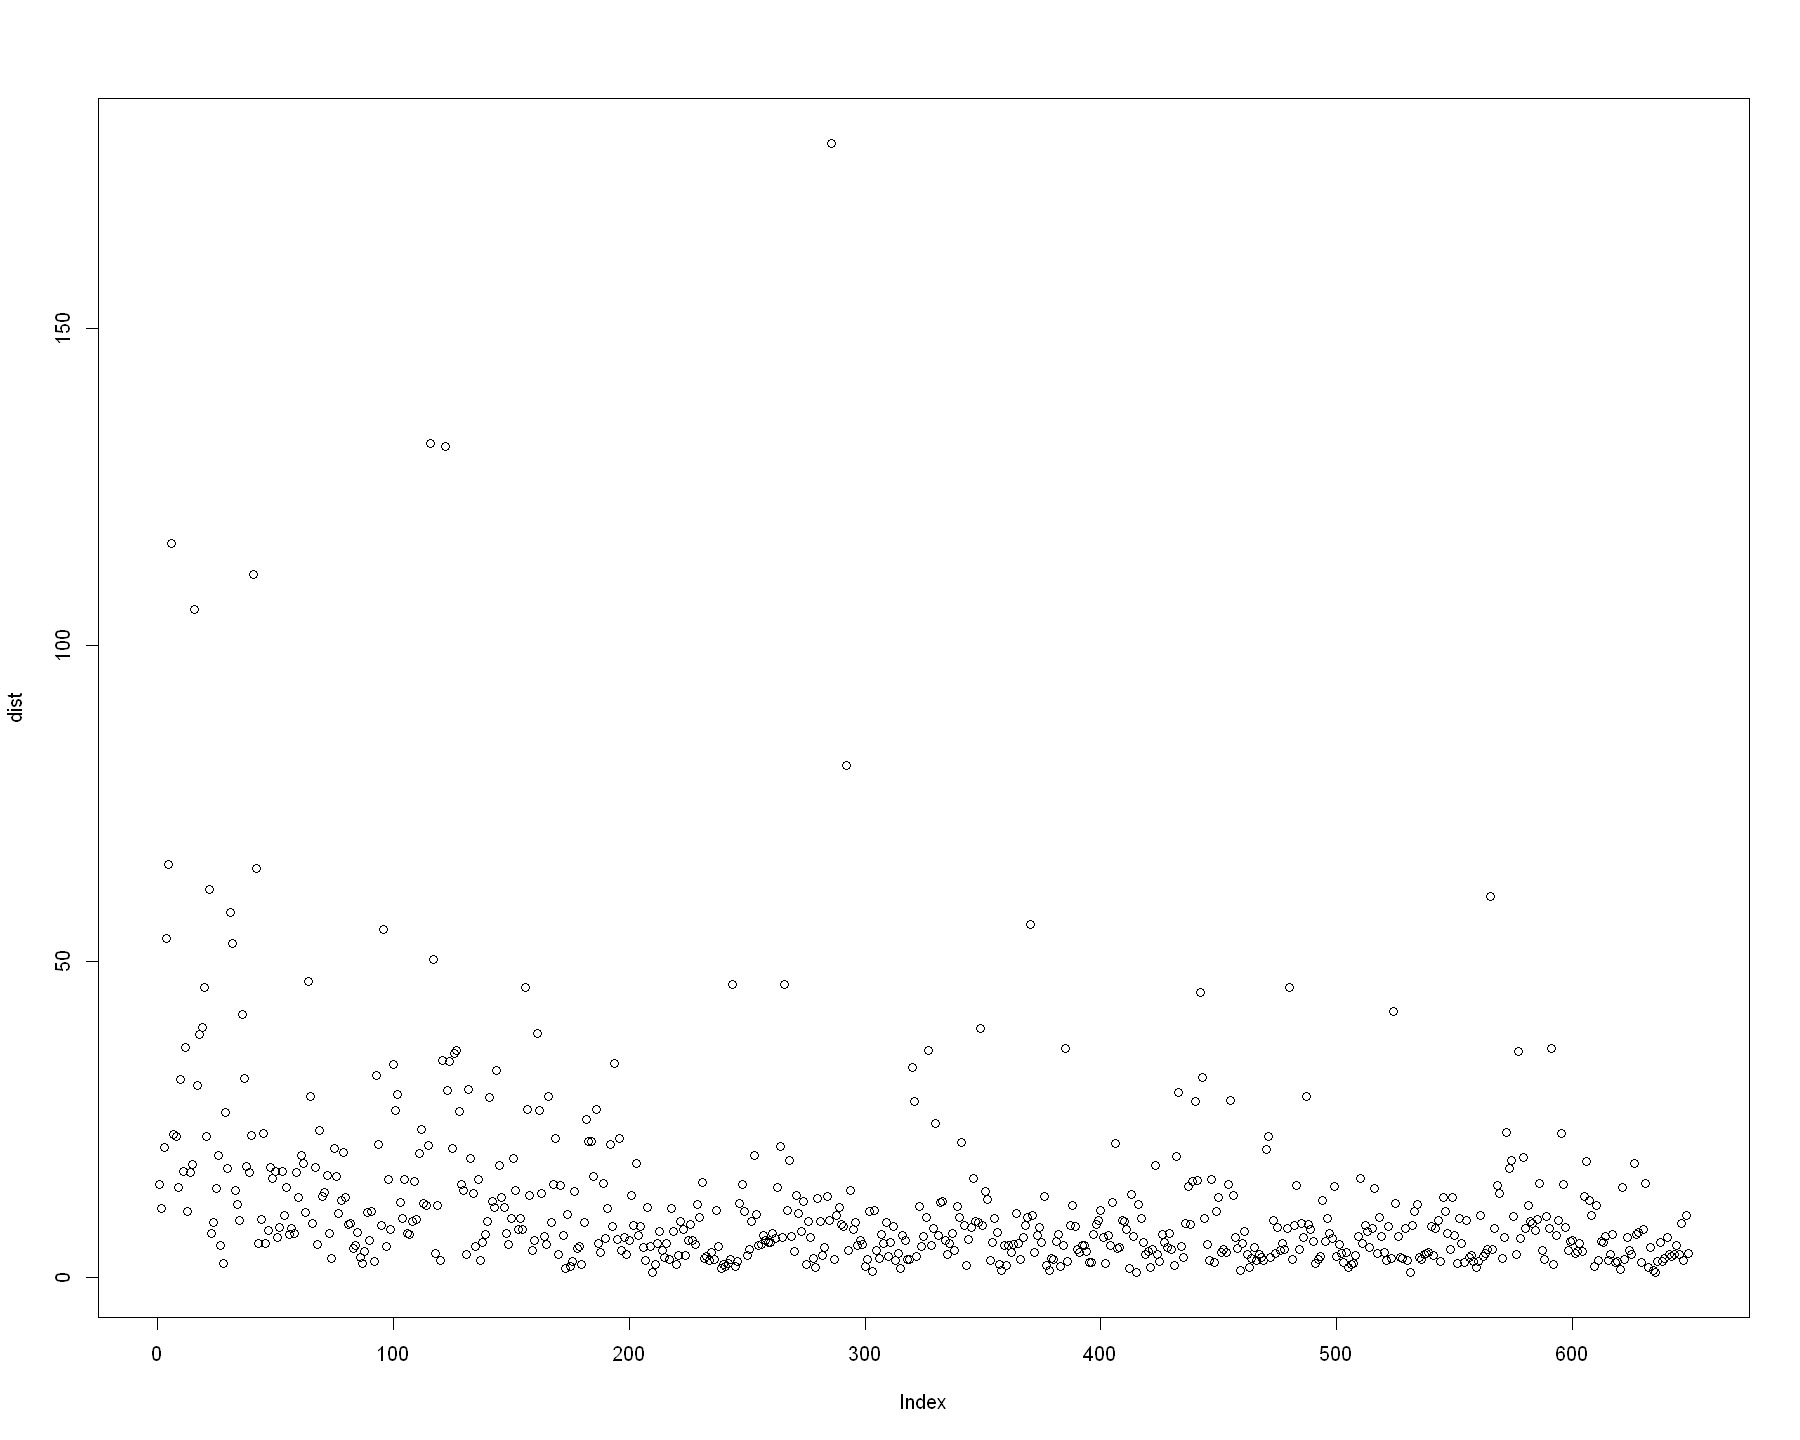

In [52]:
plot(dist)

# 4. Portfolio Optimization

# 4.1 MINIMUM RISK MEAN-VARIANCE PORTFOLIOS

### 4.1.1  COMPUTE A FEASIBLE PORTFOLIO

In [53]:
summary(data.frame(ts_returns))

    BBHI.JK            BABP.JK           MEGA.JK             BRIS.JK         
 Min.   :-63.2667   Min.   :-9.6774   Min.   :-39.67654   Min.   :-6.976749  
 1st Qu.: -2.2556   1st Qu.:-2.1739   1st Qu.: -0.64309   1st Qu.:-1.403513  
 Median : -0.3663   Median : 0.0000   Median :  0.00000   Median :-0.296736  
 Mean   :  0.4746   Mean   : 0.2127   Mean   :  0.02623   Mean   :-0.001849  
 3rd Qu.:  1.4706   3rd Qu.: 1.2500   3rd Qu.:  0.49020   3rd Qu.: 0.970871  
 Max.   : 25.0000   Max.   :35.0000   Max.   : 27.83209   Max.   :23.684209  
    BNLI.JK            BBTN.JK             BBRI.JK            BBCA.JK        
 Min.   :-12.5922   Min.   :-11.47697   Min.   :-9.09248   Min.   :-6.46154  
 1st Qu.: -0.9479   1st Qu.: -0.99010   1st Qu.:-0.90090   1st Qu.:-0.76104  
 Median :  0.0000   Median : -0.26177   Median : 0.00000   Median : 0.00000  
 Mean   : -0.1488   Mean   : -0.03046   Mean   : 0.07249   Mean   : 0.06427  
 3rd Qu.:  0.5102   3rd Qu.:  0.84507   3rd Qu.: 0.95693   3rd Q

In [54]:
ewSpec <- portfolioSpec()
nAssets <- ncol(ts_returns)
setWeights(ewSpec) <- rep(1/nAssets, times = nAssets)

In [55]:
ewPortfolio <- feasiblePortfolio(data = ts_returns,
                                 spec = ewSpec,
                                 constraints = "LongOnly")
print(ewPortfolio)


Title:
 MV Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0543  0.0908  0.0478  0.0620  0.0501  0.0337  0.0566  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 1.2630 2.5273 1.7434 

Description:
 Sun Sep  3 11:46:40 2023 by user: Kevin 


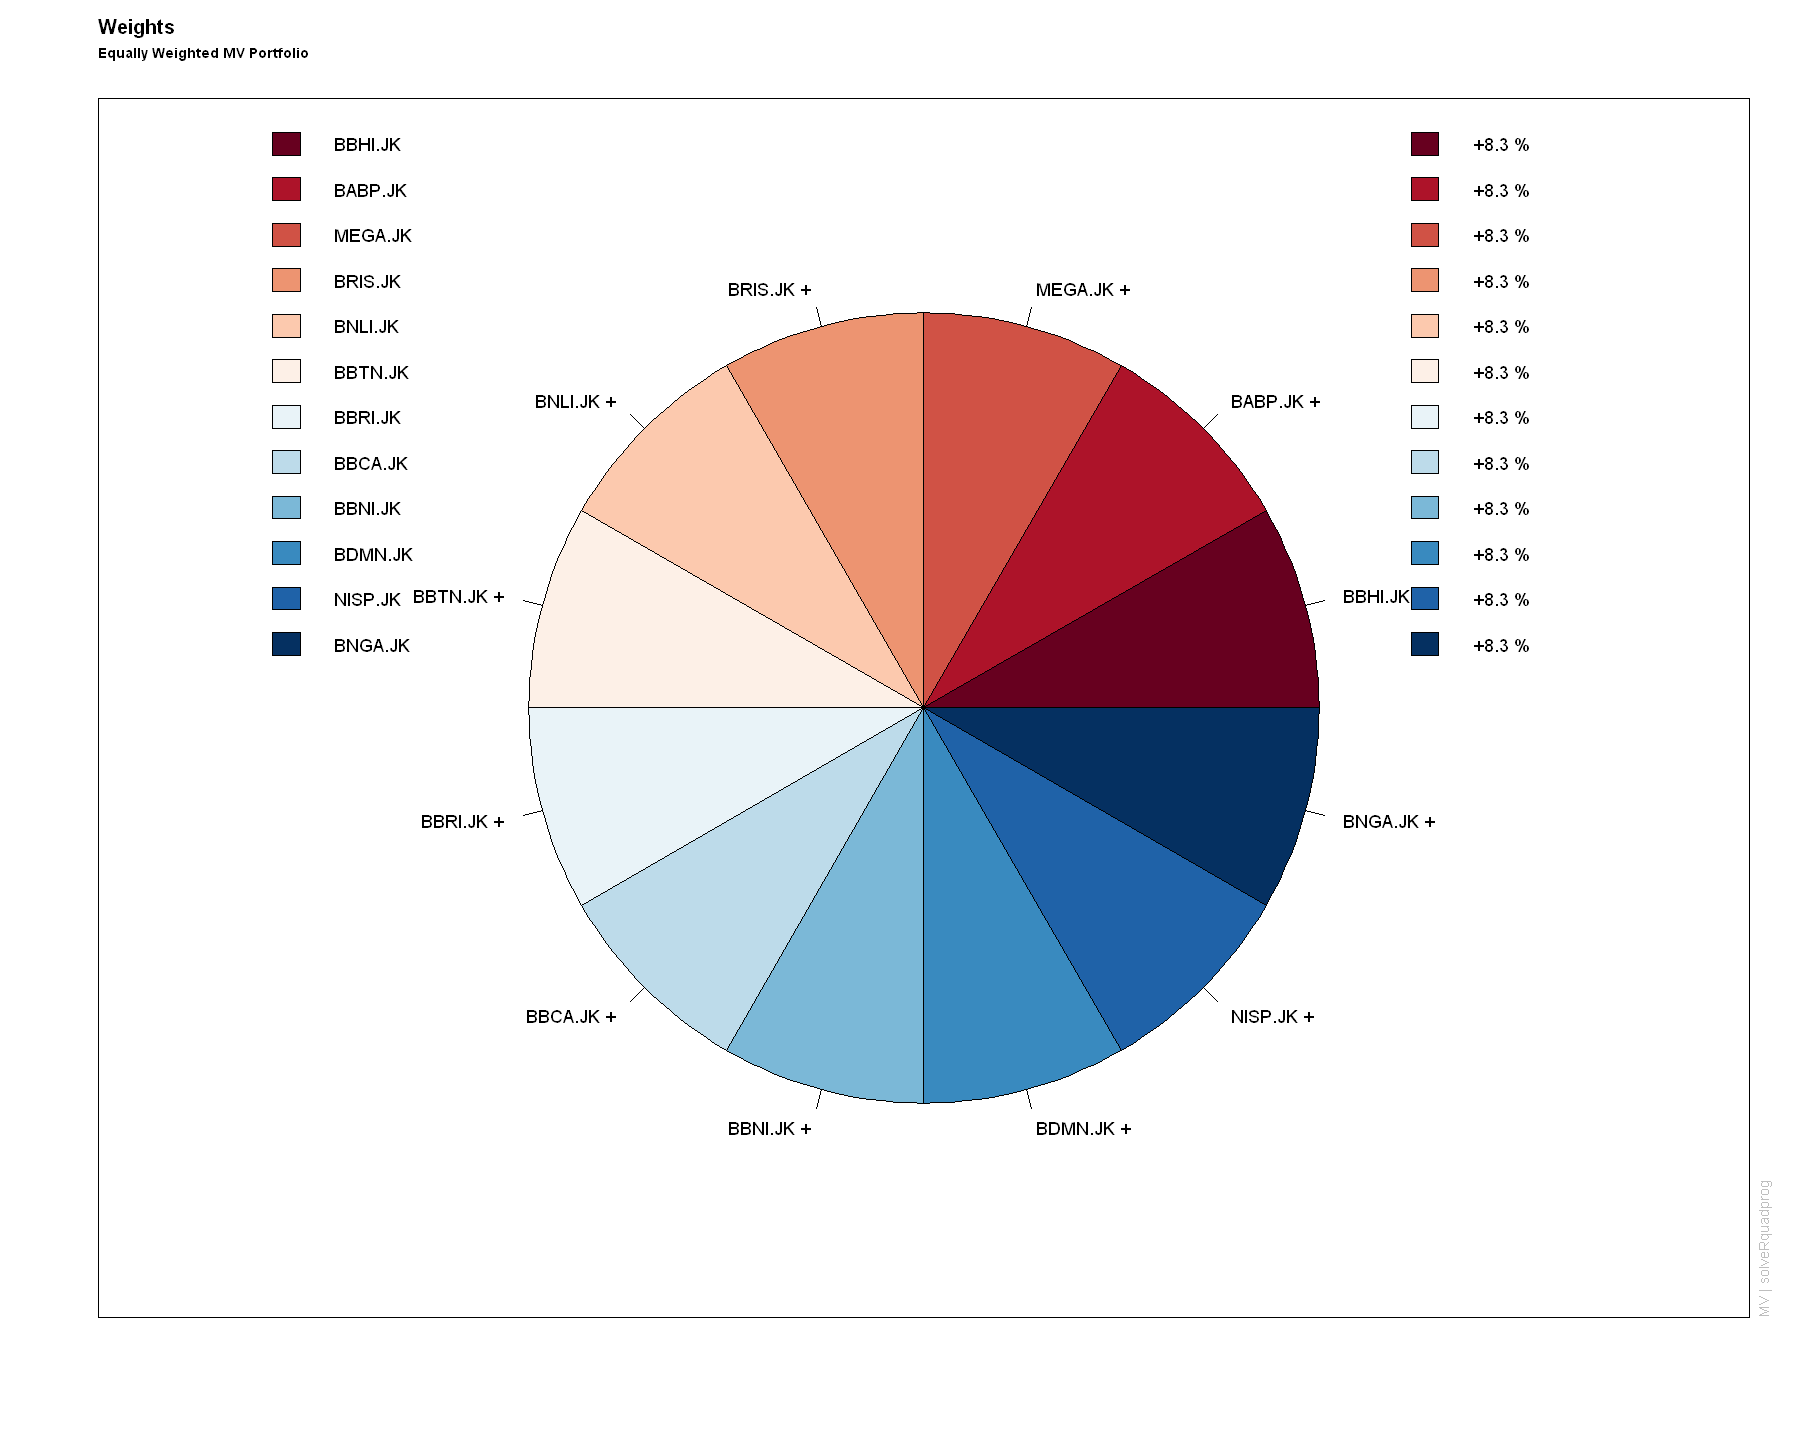

In [56]:
col <- divPalette(ncol(ts_returns), "RdBu")
weightsPie(ewPortfolio, radius = 0.7, col = col)
mtext(text = "Equally Weighted MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

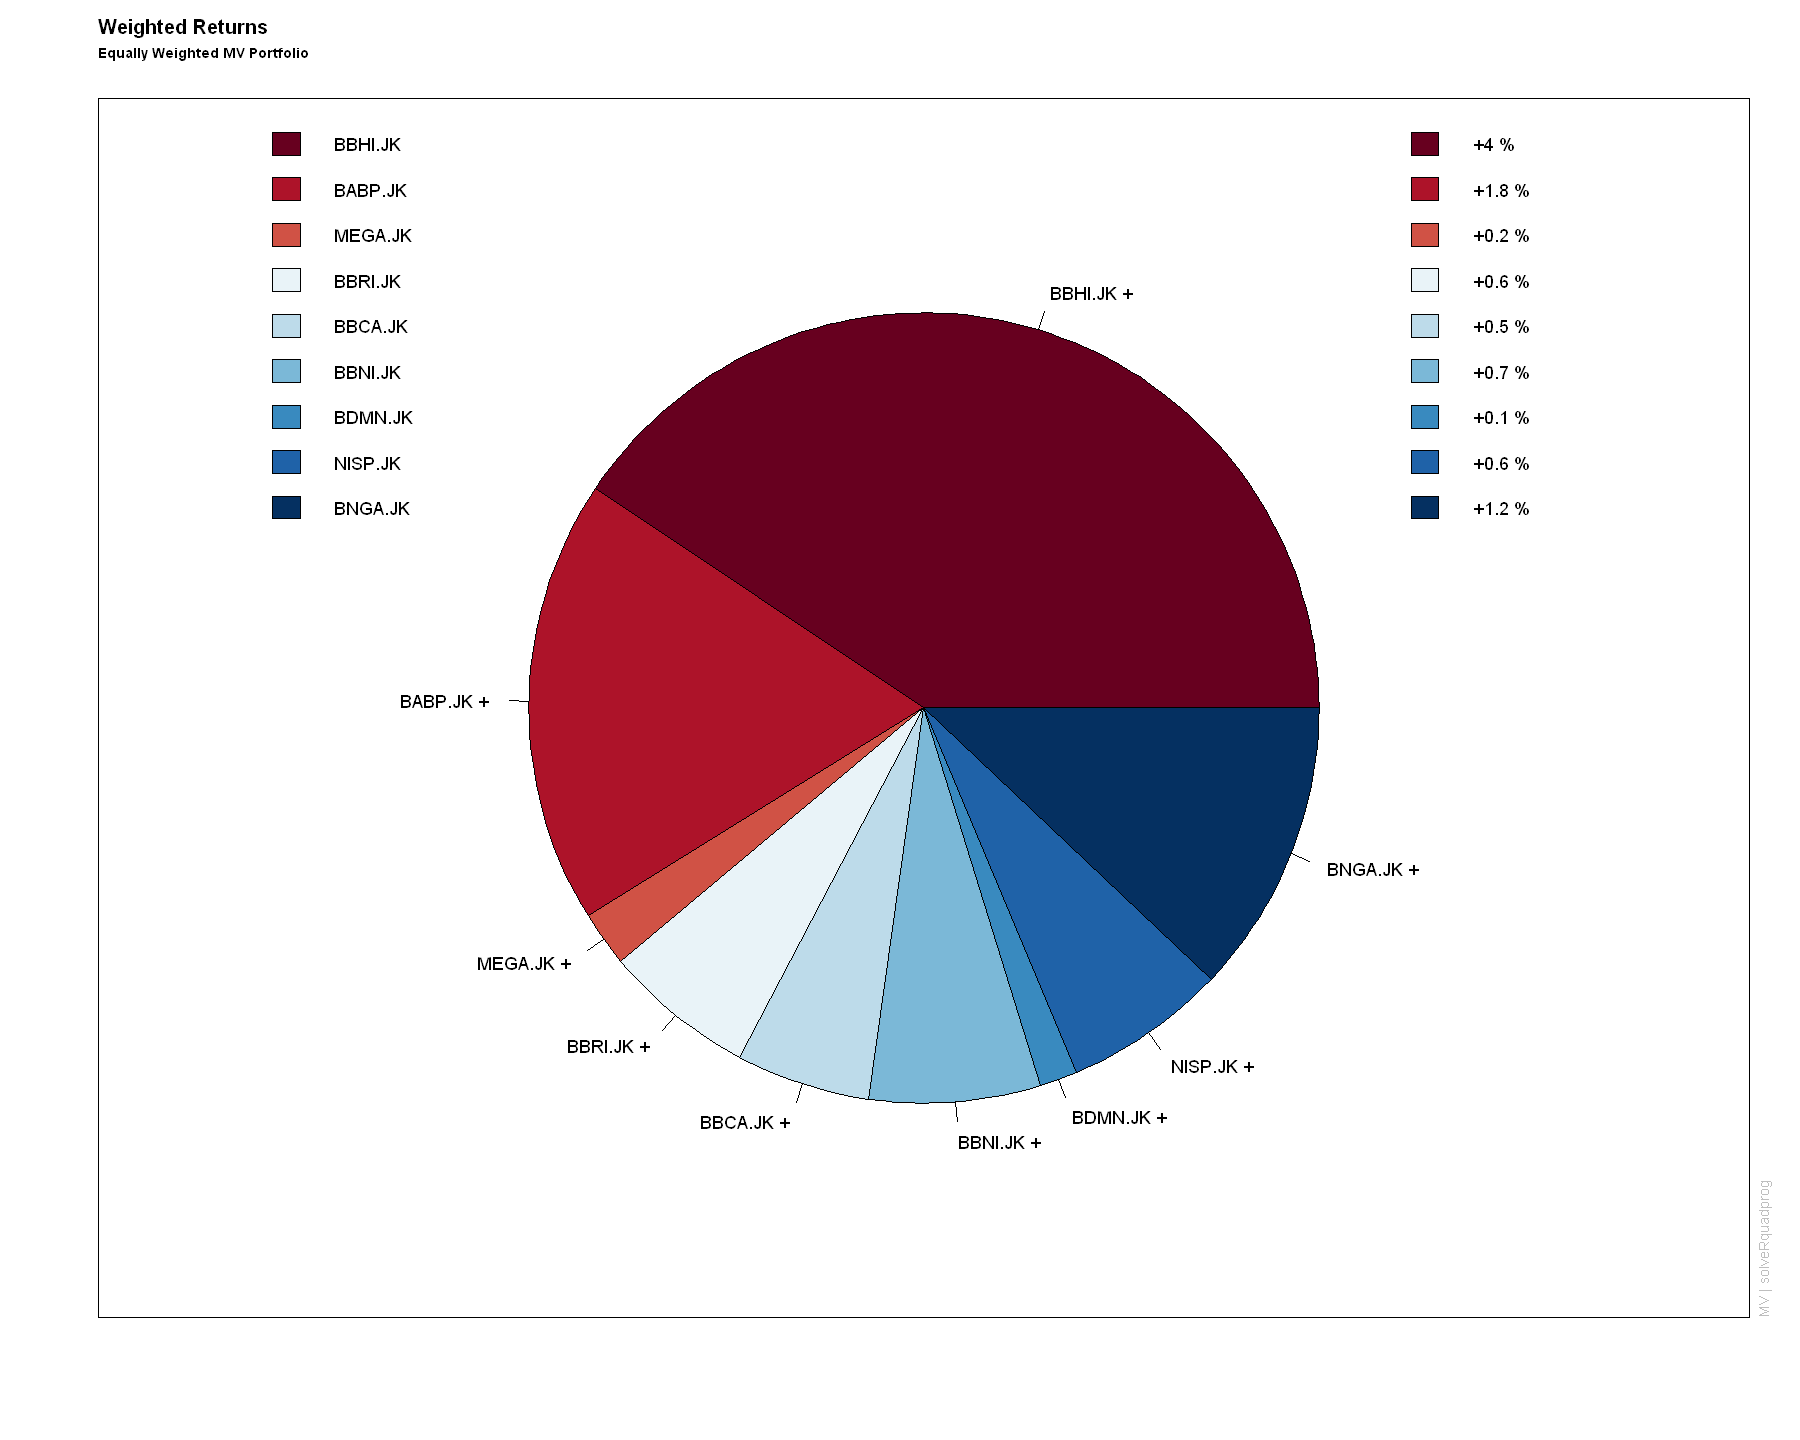

In [57]:
weightedReturnsPie(ewPortfolio, radius = 0.7, col = col)
mtext(text = "Equally Weighted MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

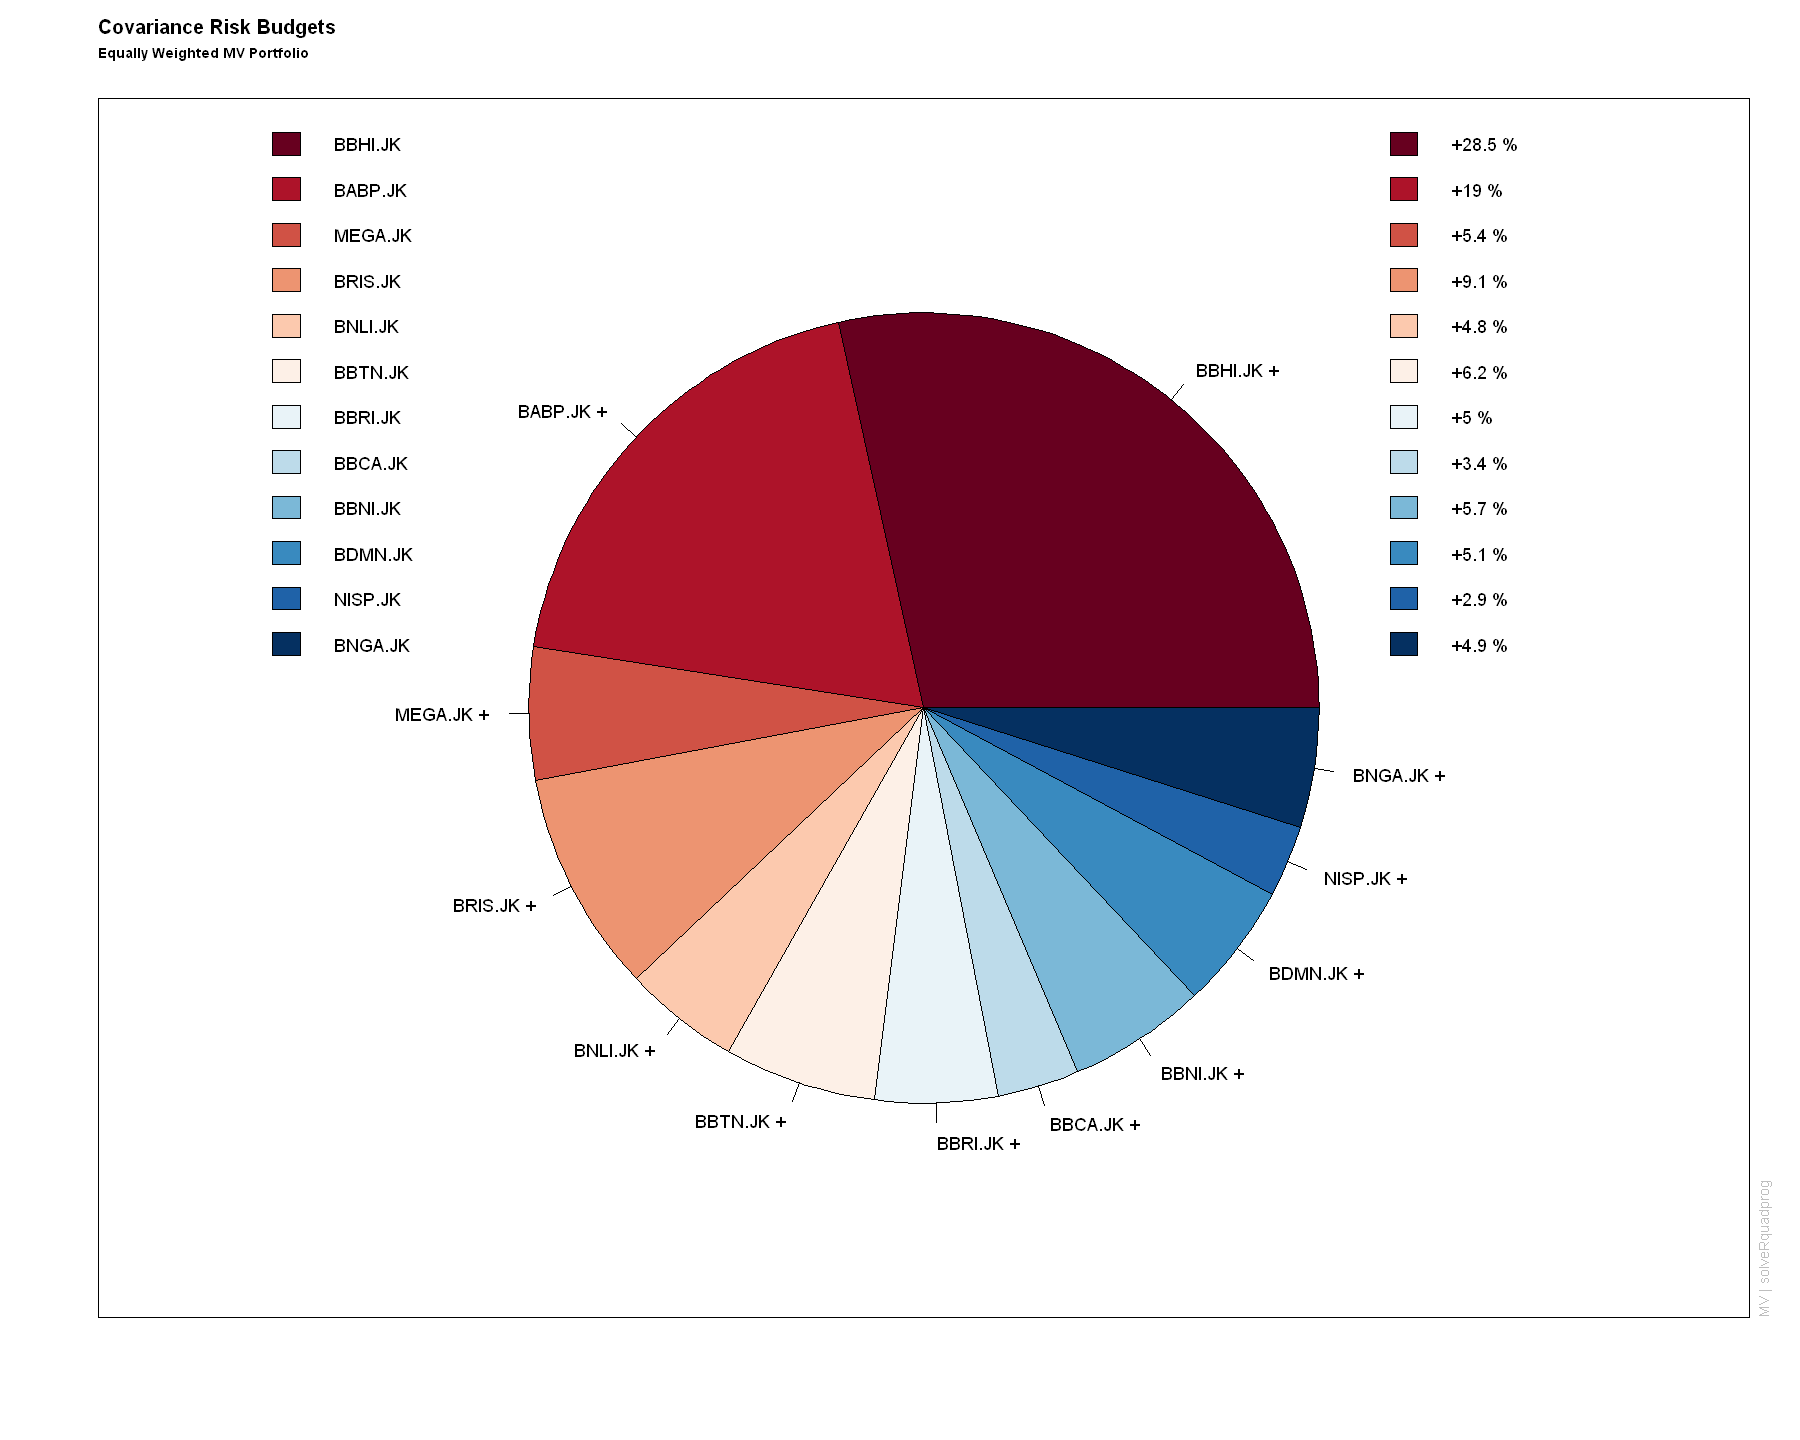

In [58]:
covRiskBudgetsPie(ewPortfolio, radius = 0.7, col = col)
mtext(text = "Equally Weighted MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

### 4.1.2 COMPUTE A MINIMUM RISK EFFICIENT PORTFOLIO

In [59]:
minriskSpec <- portfolioSpec()
targetReturn <- getTargetReturn(ewPortfolio@portfolio)["mean"]
setTargetReturn(minriskSpec) <- targetReturn

In [60]:
minriskPortfolio <- efficientPortfolio(data = ts_returns,
                                       spec = minriskSpec,
                                       constraints = "LongOnly")
print(minriskPortfolio)


Title:
 MV Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0142  0.0141  0.0647  0.0000  0.0250  0.0000  0.0864  0.2680  0.0368  0.0214 
NISP.JK BNGA.JK 
 0.2925  0.1770 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0280  0.0186  0.0557  0.0000  0.0107  0.0000  0.0844  0.2560  0.0367  0.0180 
NISP.JK BNGA.JK 
 0.2893  0.2025 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 0.9199 1.8782 1.3453 

Description:
 Sun Sep  3 11:46:43 2023 by user: Kevin 


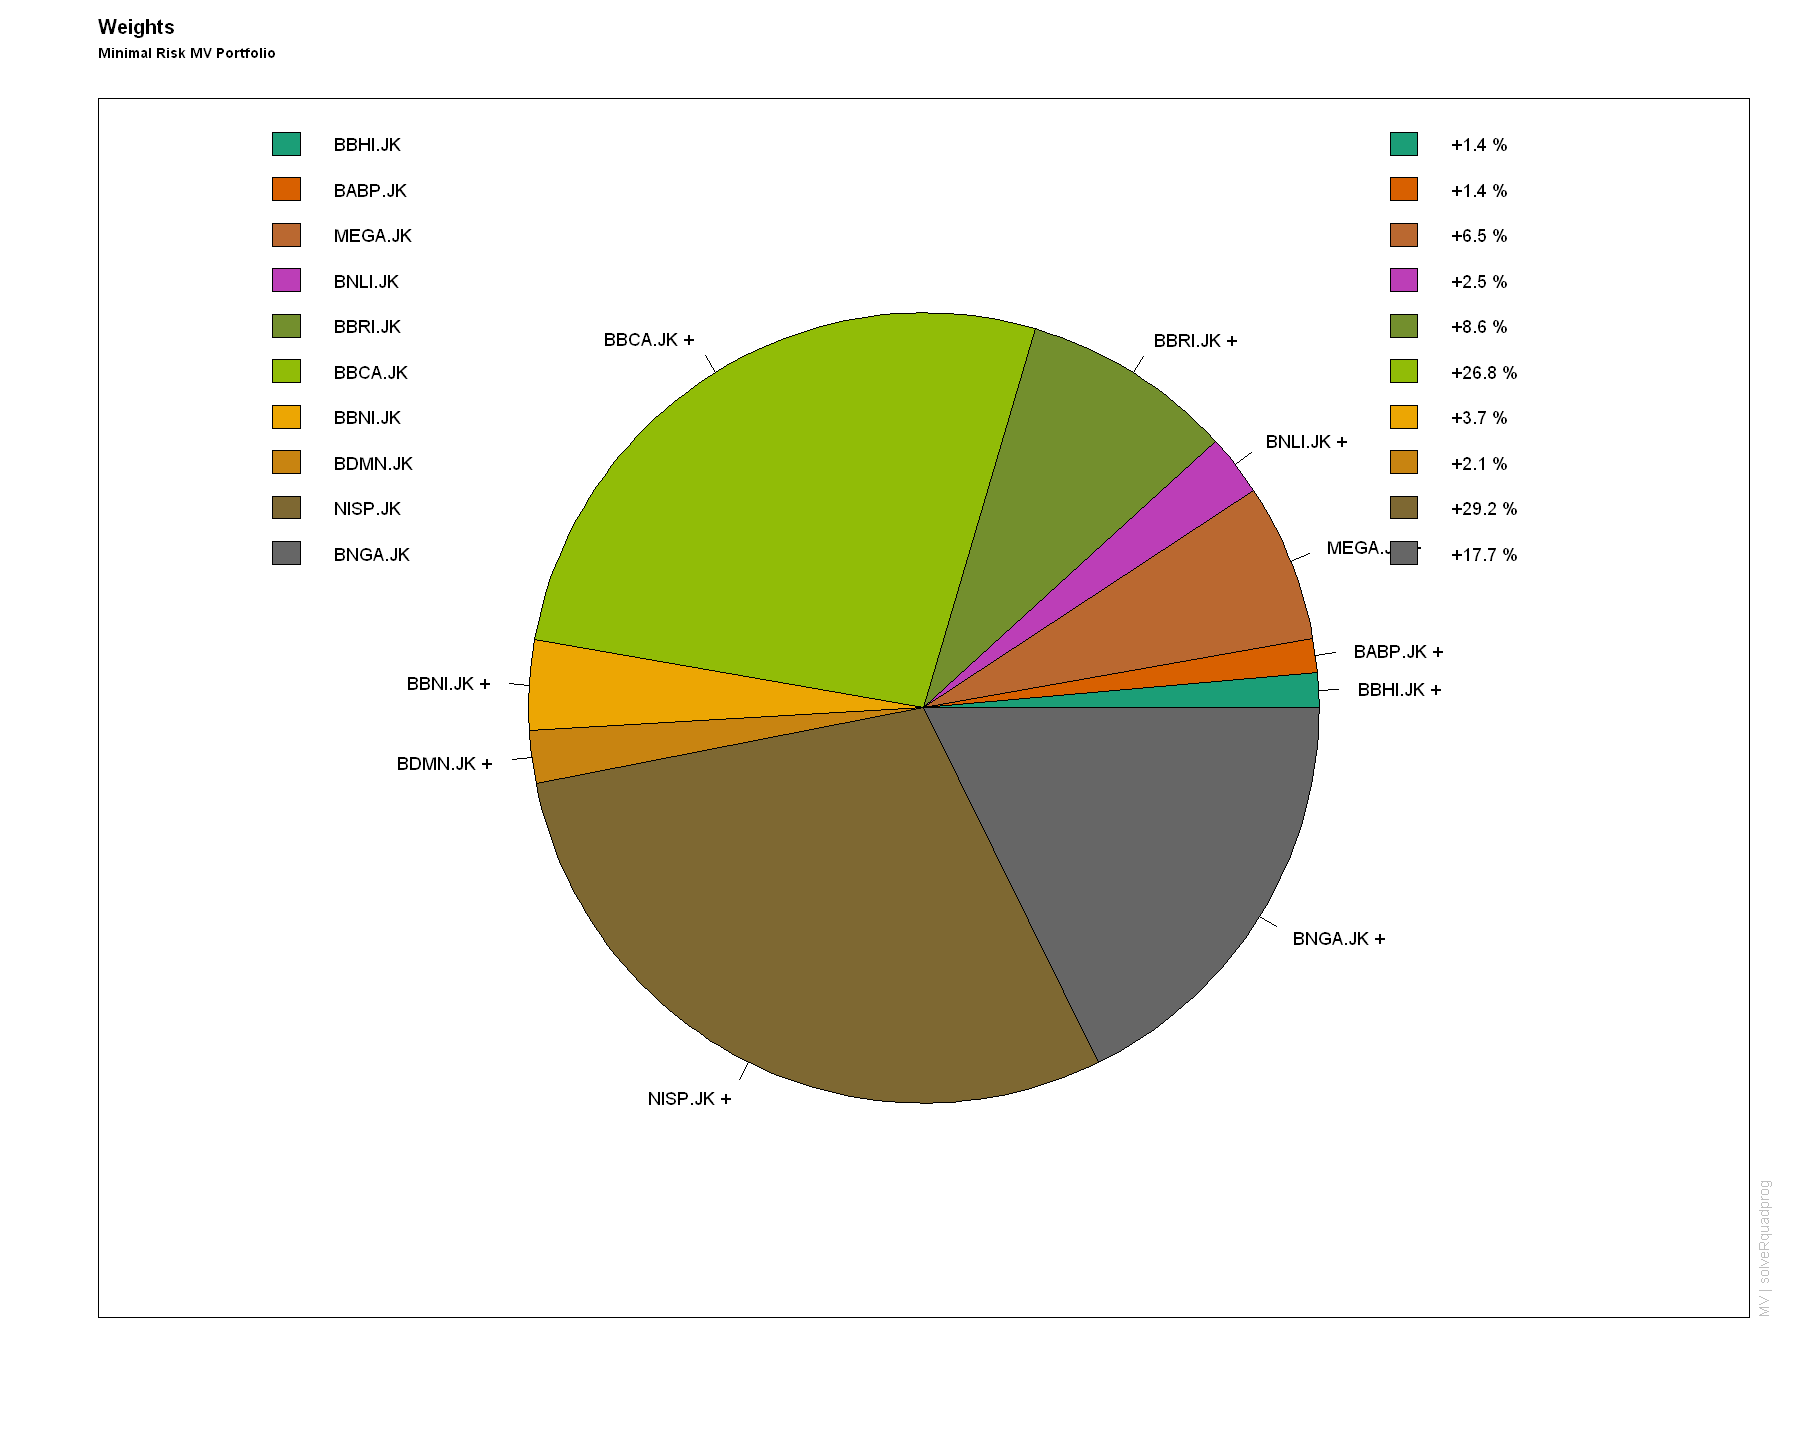

In [61]:
col <- qualiPalette(ncol(ts_returns), "Dark2")
weightsPie(minriskPortfolio, radius = 0.7, col = col)
mtext(text = "Minimal Risk MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

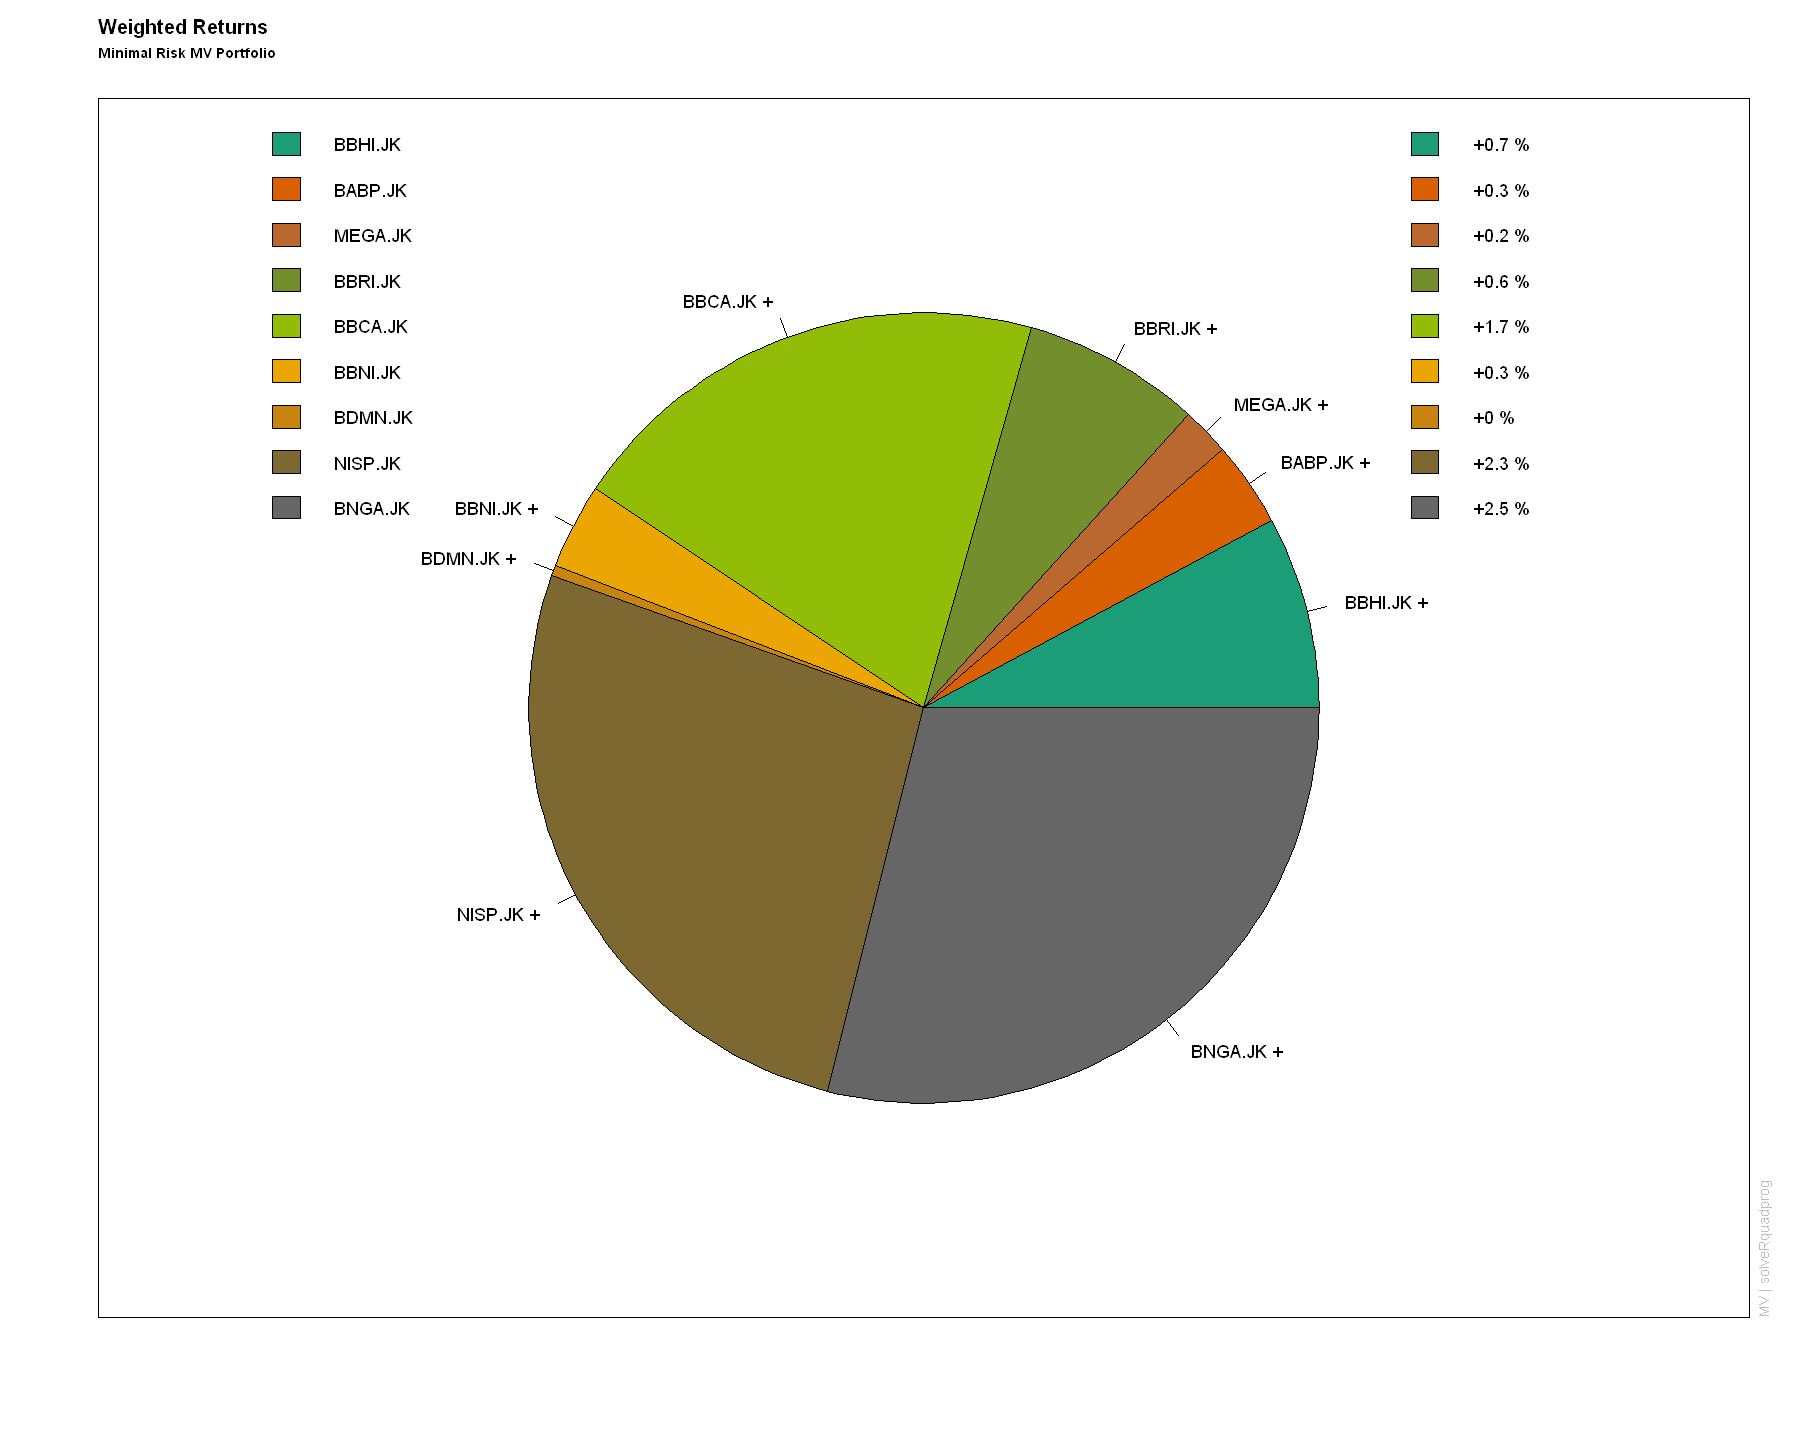

In [62]:
weightedReturnsPie(minriskPortfolio, radius = 0.7, col = col)
mtext(text = "Minimal Risk MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

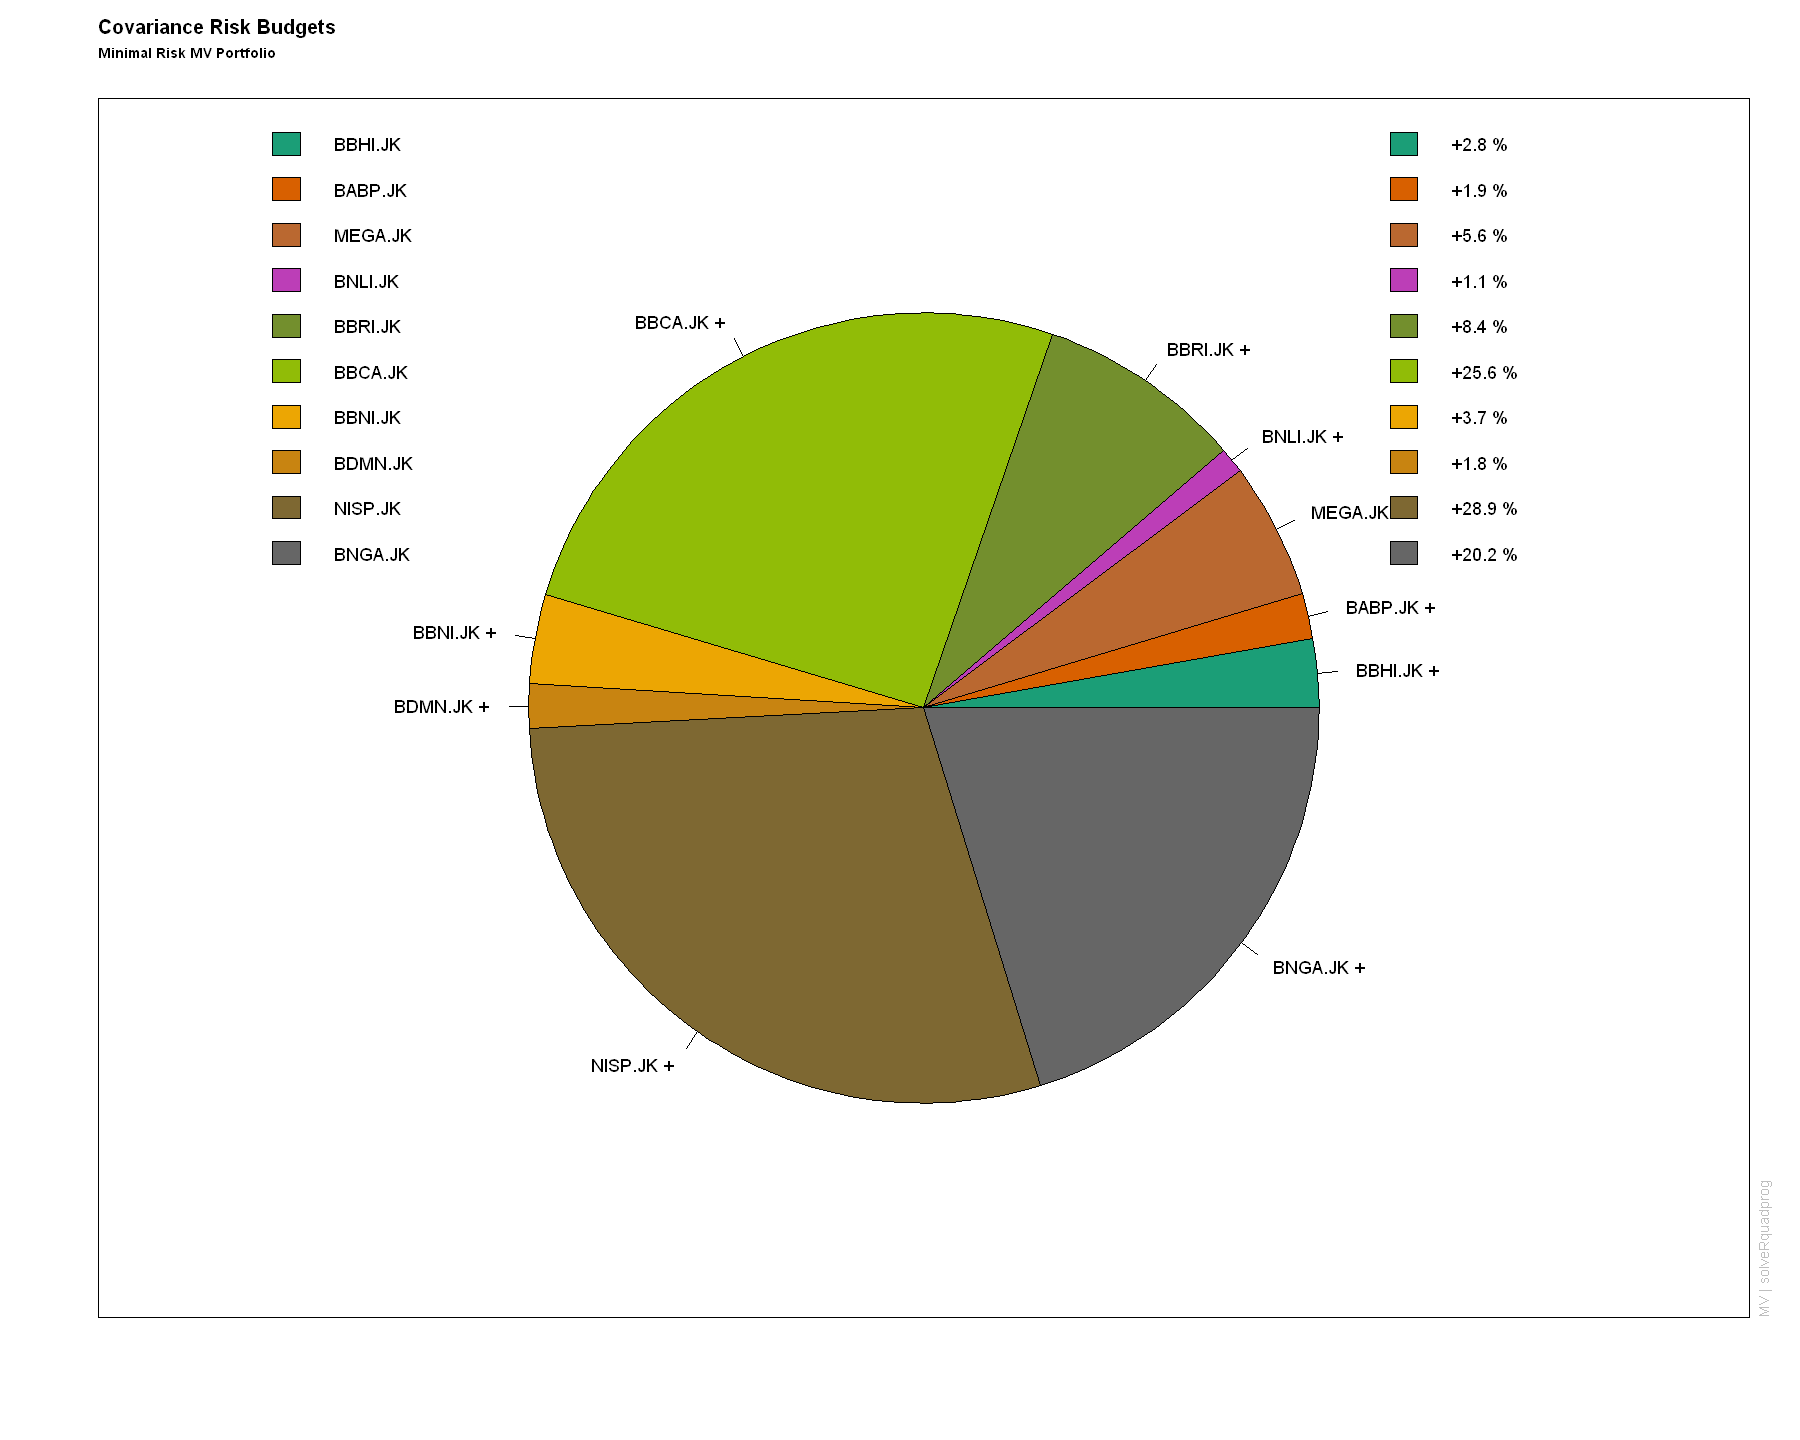

In [63]:
covRiskBudgetsPie(minriskPortfolio, radius = 0.7, col = col)
mtext(text = "Minimal Risk MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

### 4.1.3 COMPUTE THE GLOBAL MINIMUM VARIANCE PORTFOLIO

In [64]:
globminSpec <- portfolioSpec()
globminPortfolio <- minvariancePortfolio(data = ts_returns,
                                         spec = globminSpec,
                                         constraints = "LongOnly")
print(globminPortfolio)


Title:
 MV Minimum Variance Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0044  0.0678  0.0050  0.1121  0.0203  0.0828  0.2546  0.0169  0.0552 
NISP.JK BNGA.JK 
 0.2768  0.1041 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0044  0.0678  0.0050  0.1121  0.0203  0.0828  0.2546  0.0169  0.0552 
NISP.JK BNGA.JK 
 0.2768  0.1041 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0463 0.8780 1.8946 1.2911 

Description:
 Sun Sep  3 11:46:45 2023 by user: Kevin 


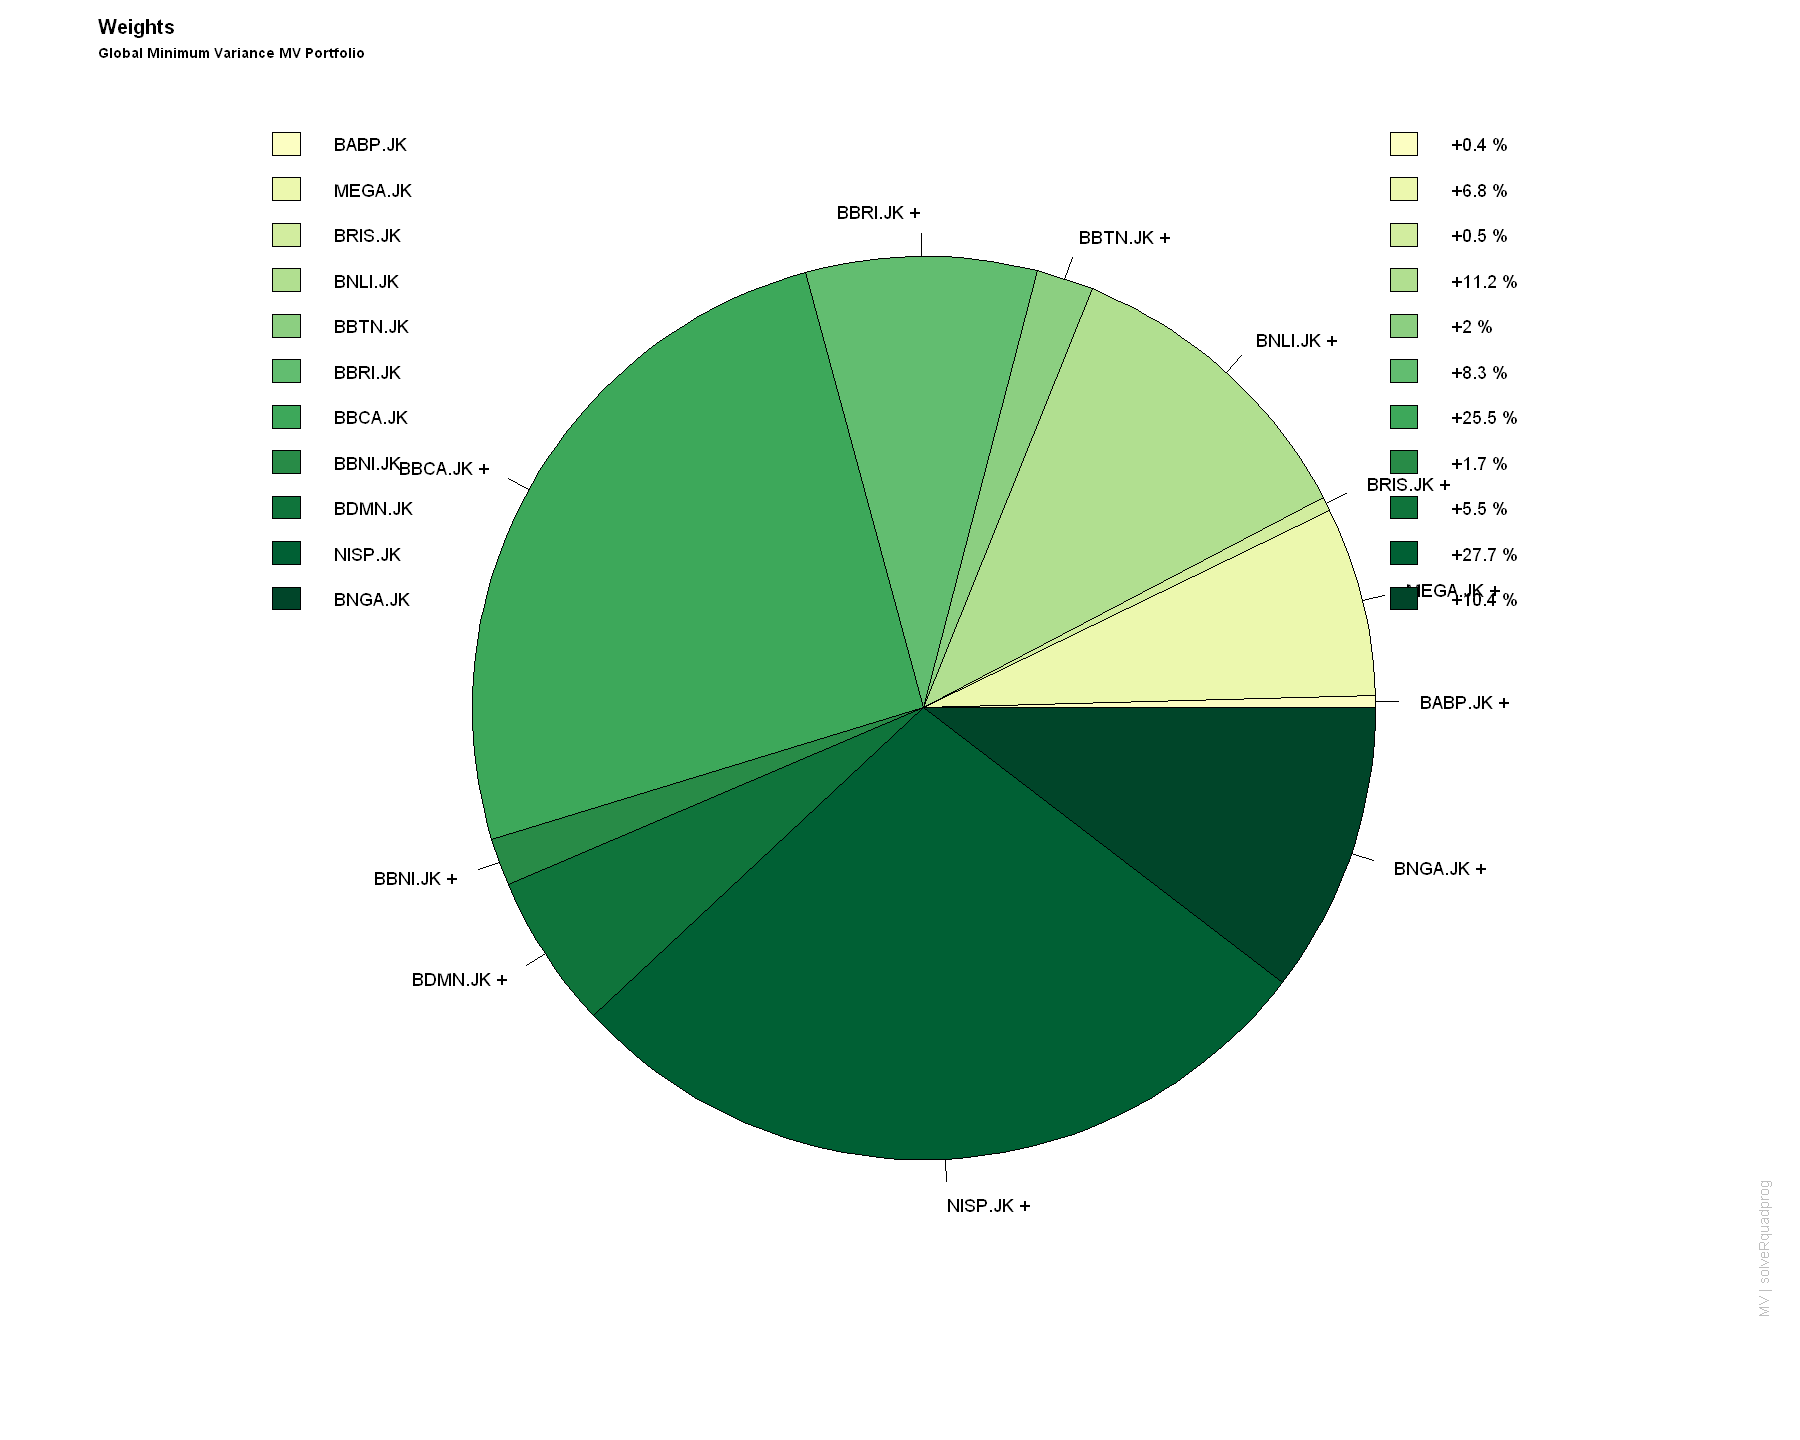

In [65]:
col <- seqPalette(ncol(ts_returns), "YlGn")
weightsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
      line = 1.5, font = 2, cex = 0.7, adj = 0)

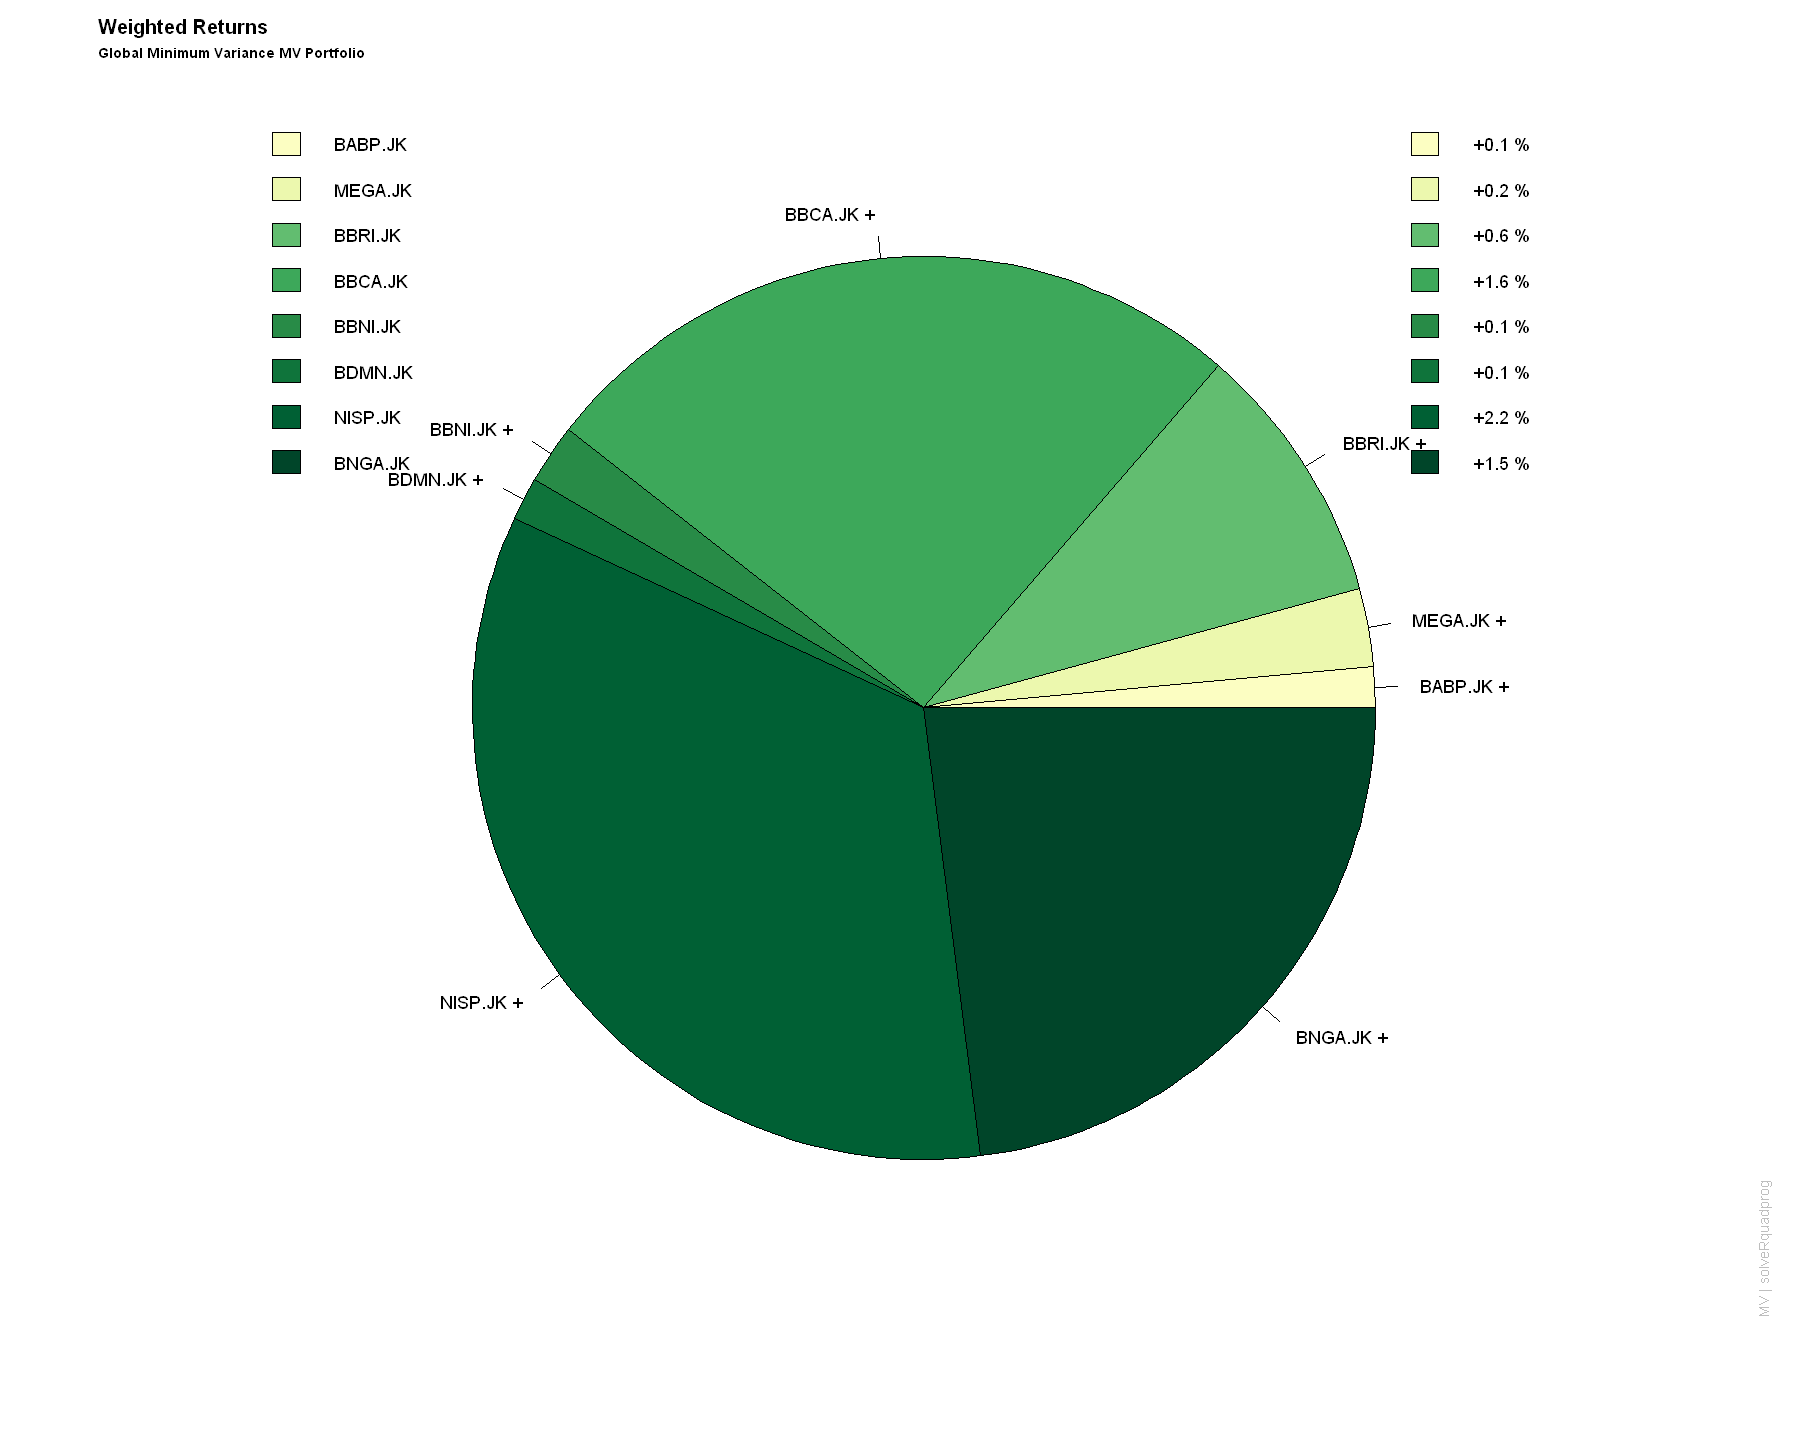

In [66]:
weightedReturnsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
      line = 1.5, font = 2, cex = 0.7, adj = 0)

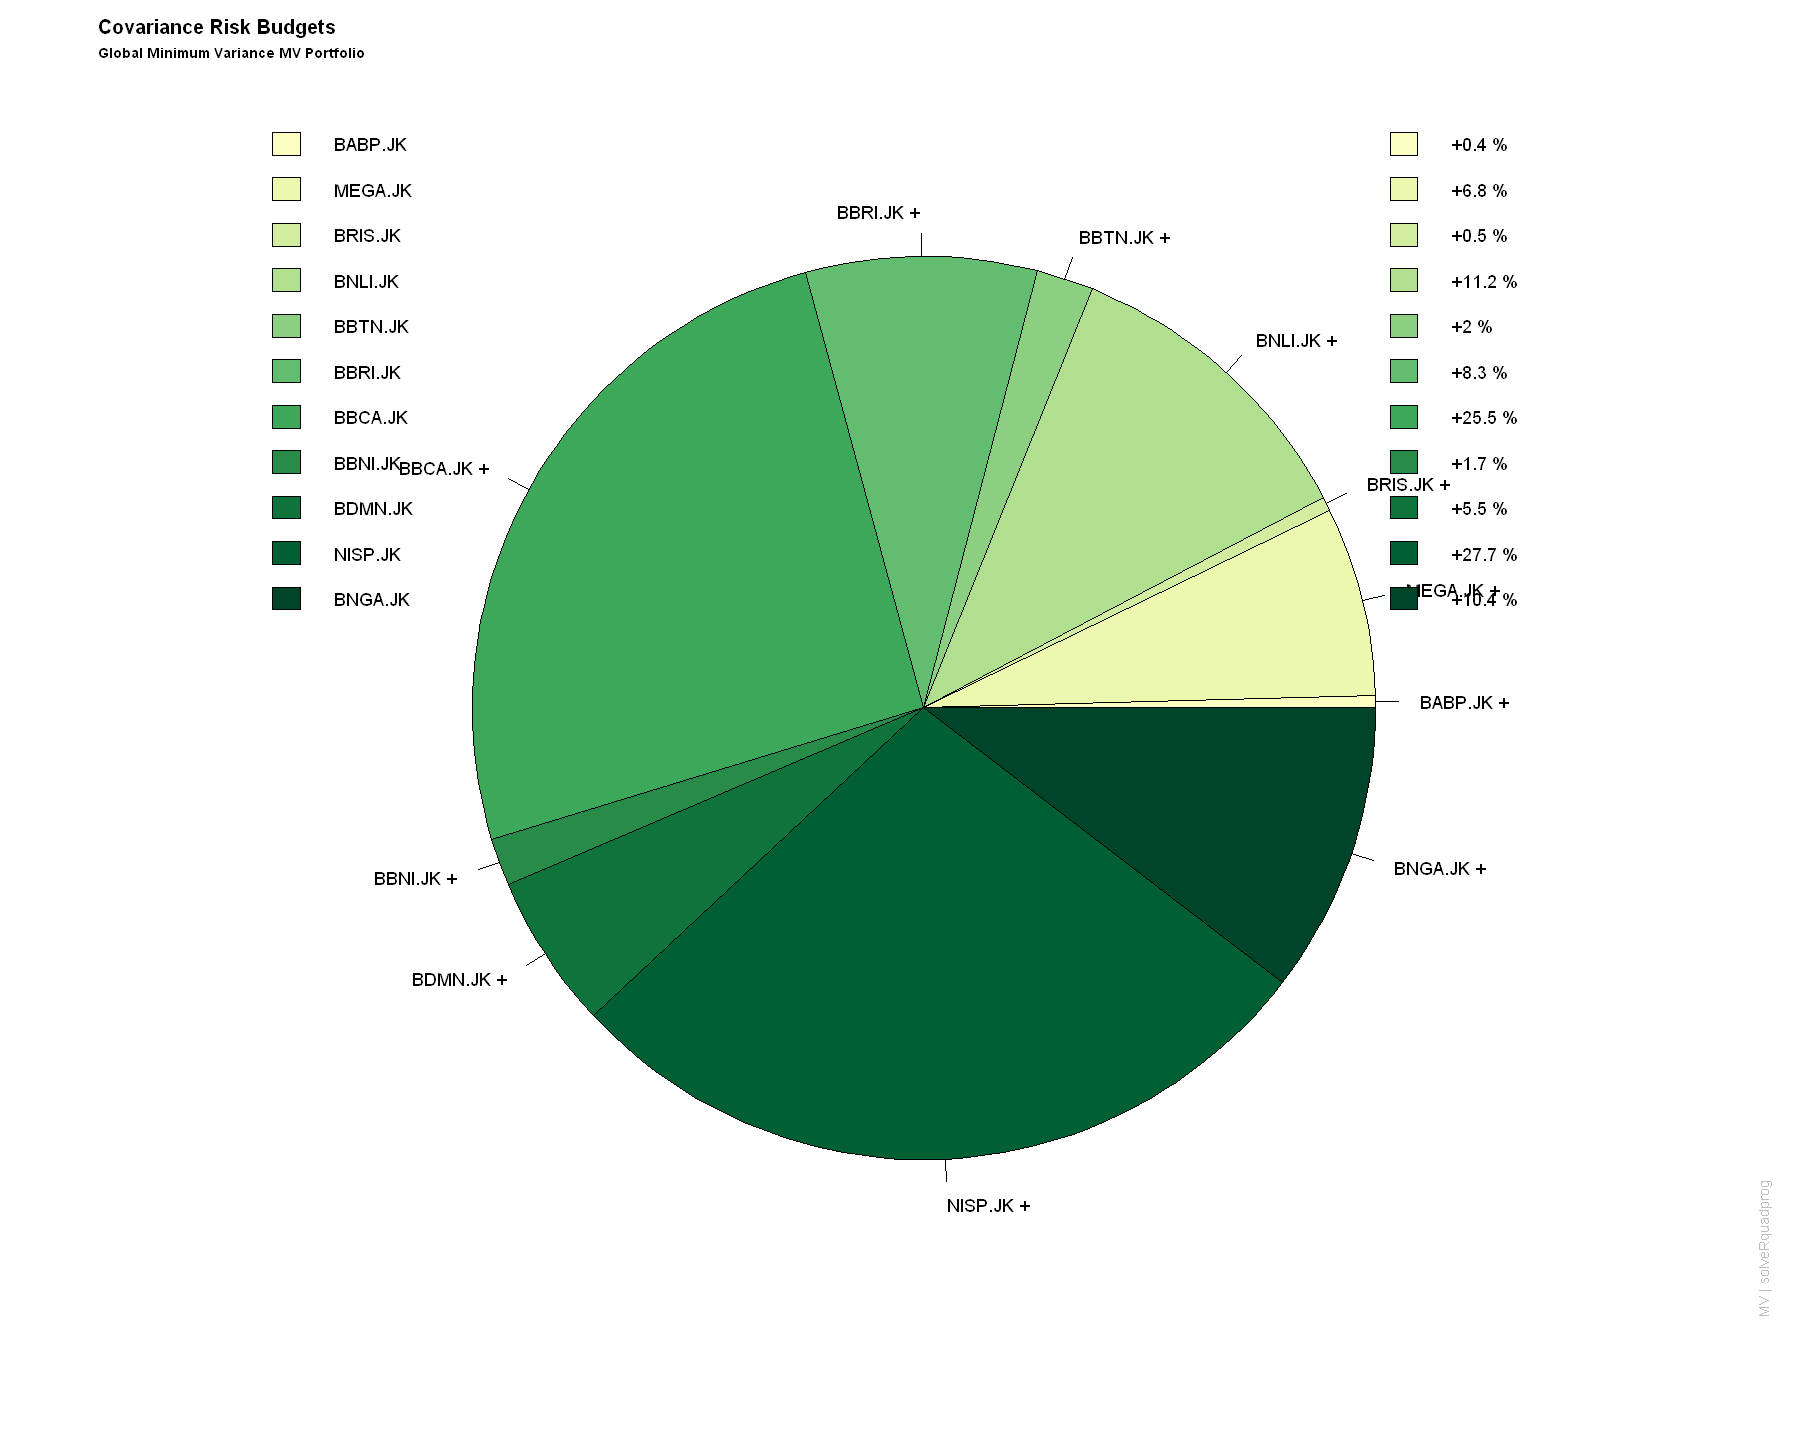

In [67]:
covRiskBudgetsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
line = 1.5, font = 2, cex = 0.7, adj = 0)

### 4.1.4 COMPUTE THE TANGENCY PORTFOLIO

In [68]:
tgSpec <- portfolioSpec()
setRiskFreeRate(tgSpec) <- 0

In [69]:
tgPortfolio <- tangencyPortfolio(data = ts_returns,
                                 spec = tgSpec,
                                 constraints = "LongOnly")
print(tgPortfolio)


Title:
 MV Tangency Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0806  0.0371  0.0199  0.0000  0.0000  0.0000  0.0476  0.1967  0.0361  0.0000 
NISP.JK BNGA.JK 
 0.2046  0.3774 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2841  0.0585  0.0039  0.0000  0.0000  0.0000  0.0256  0.0938  0.0220  0.0000 
NISP.JK BNGA.JK 
 0.1183  0.3938 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.1347 1.2090 2.3071 1.6240 

Description:
 Sun Sep  3 11:46:49 2023 by user: Kevin 


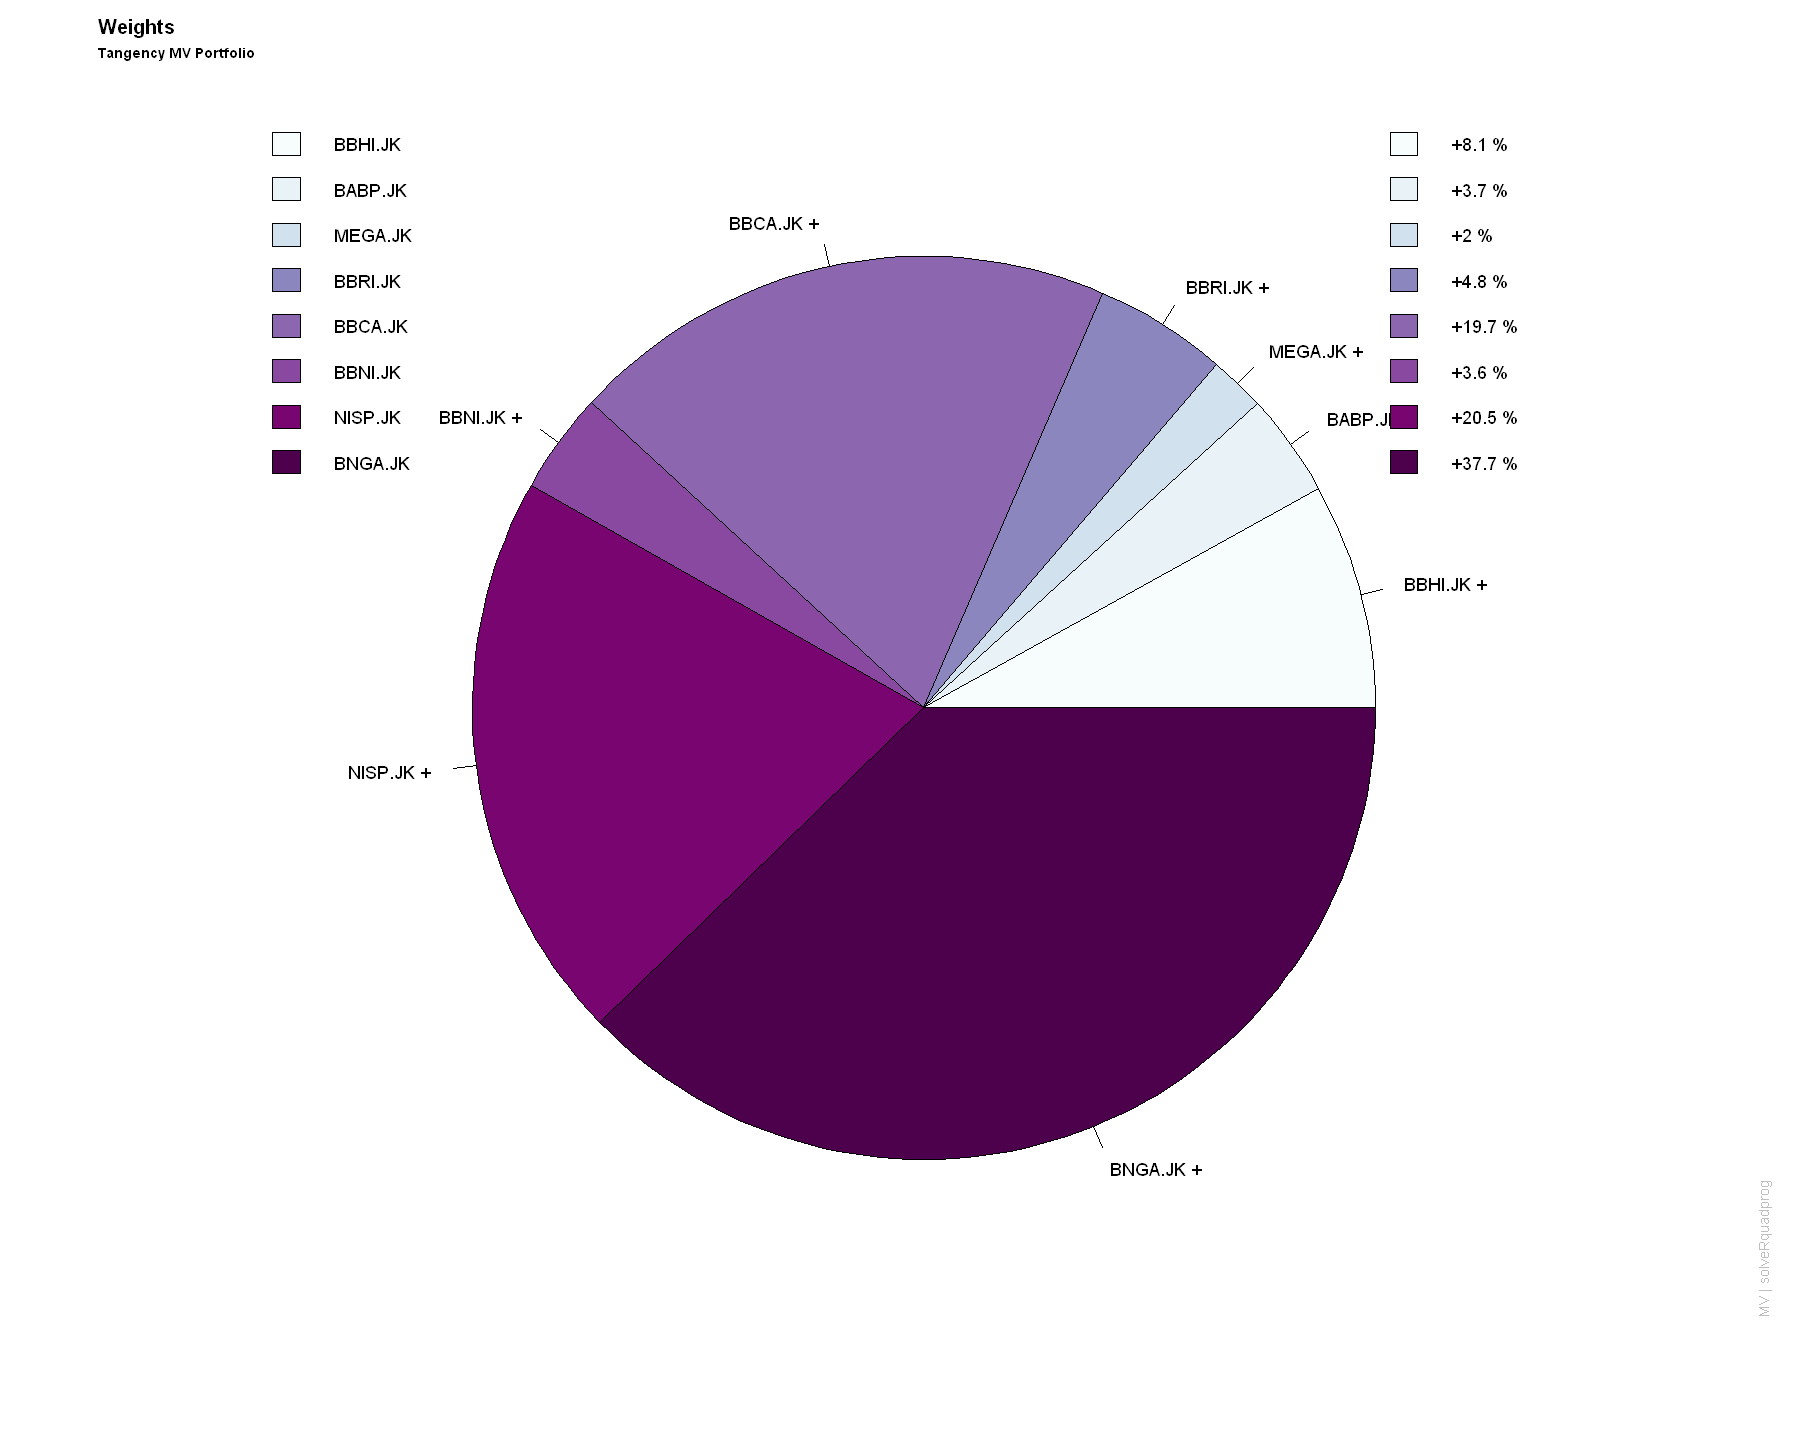

In [70]:
col <- seqPalette(ncol(ts_returns), "BuPu")
weightsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

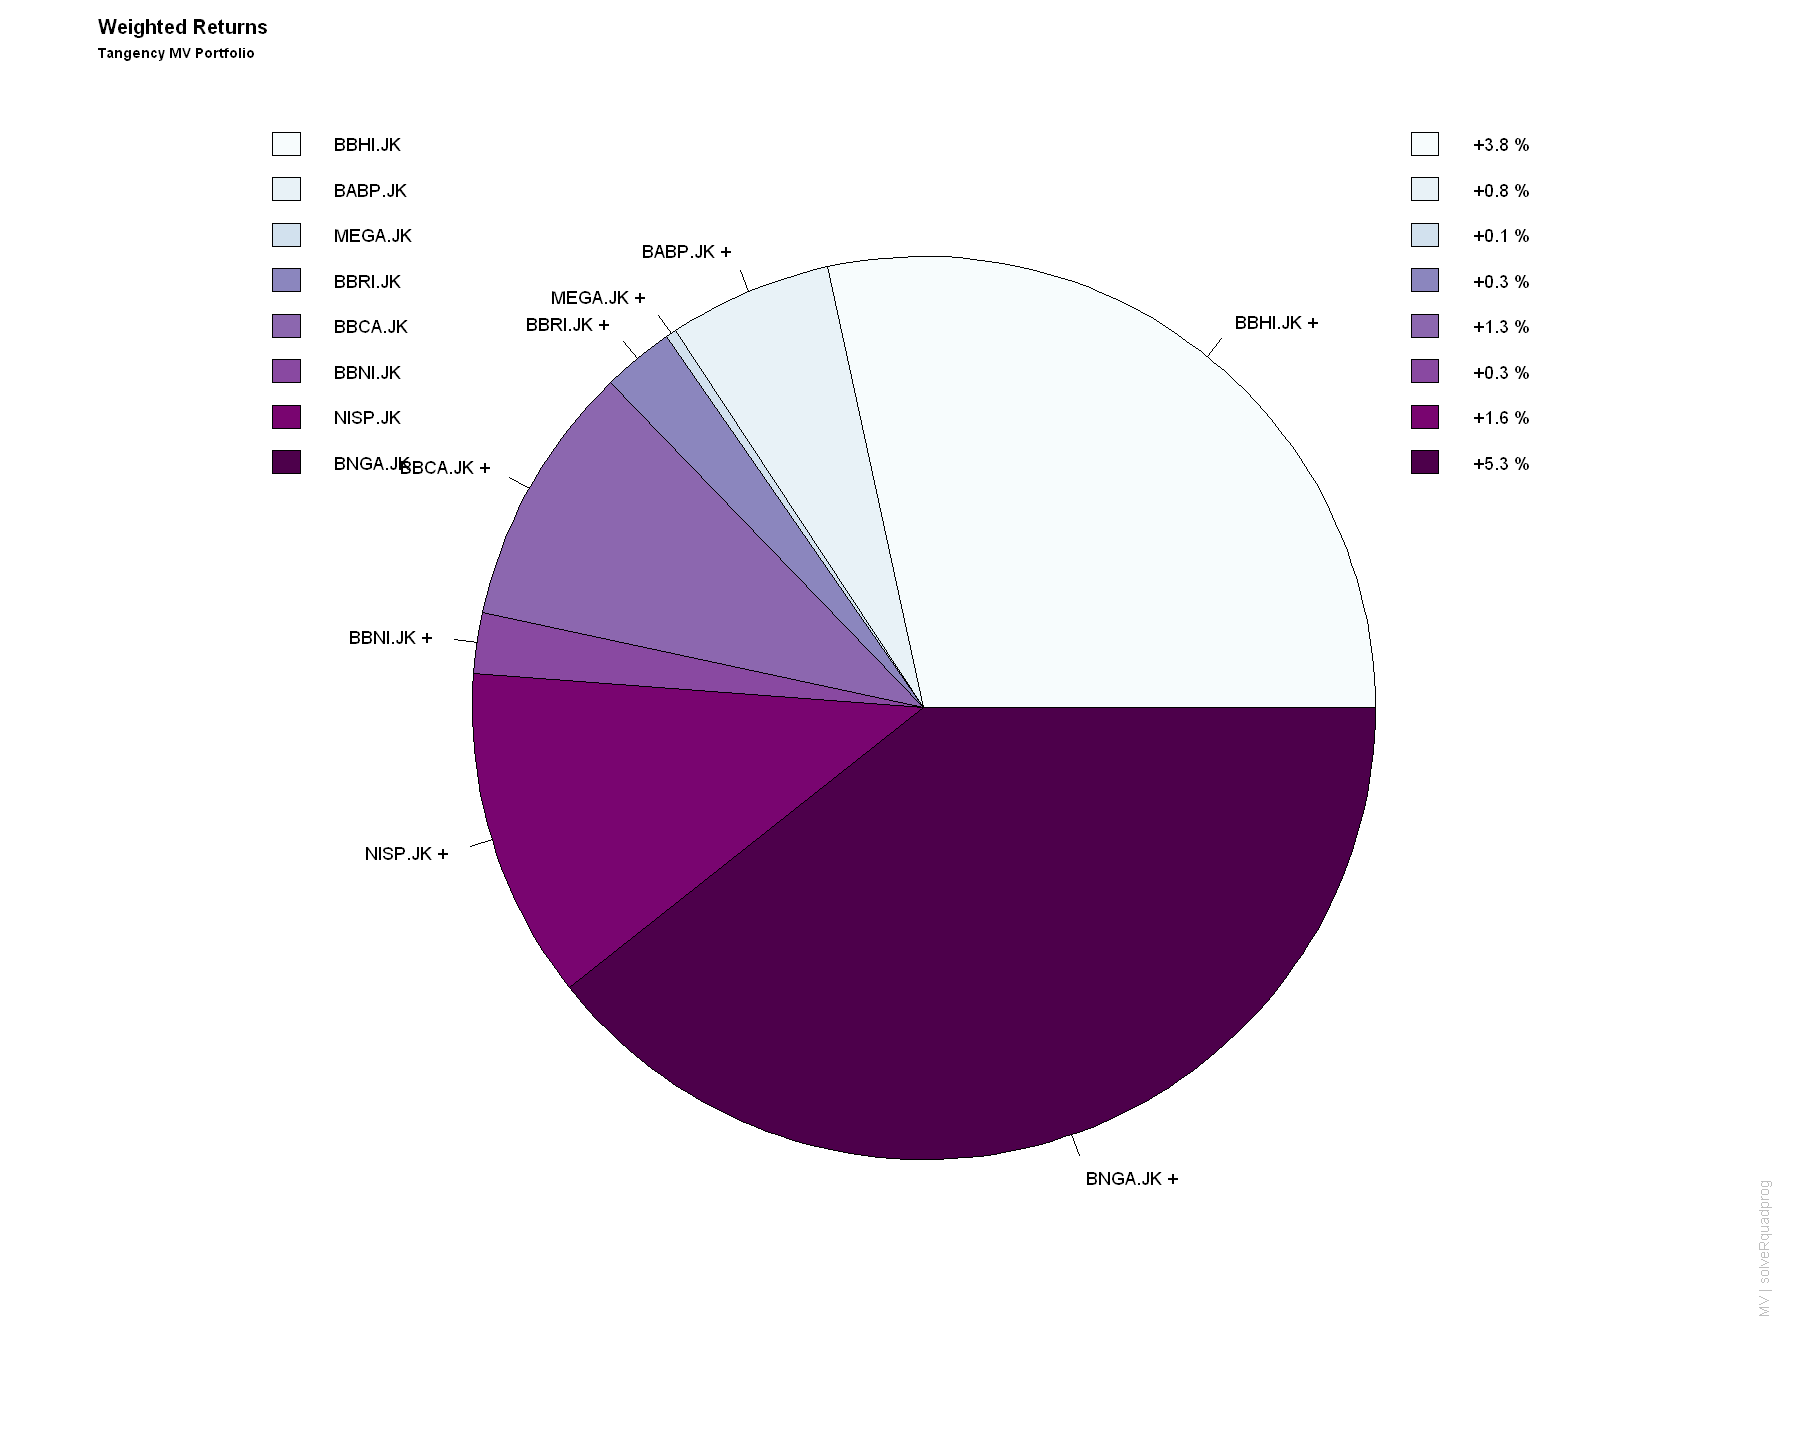

In [71]:
weightedReturnsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

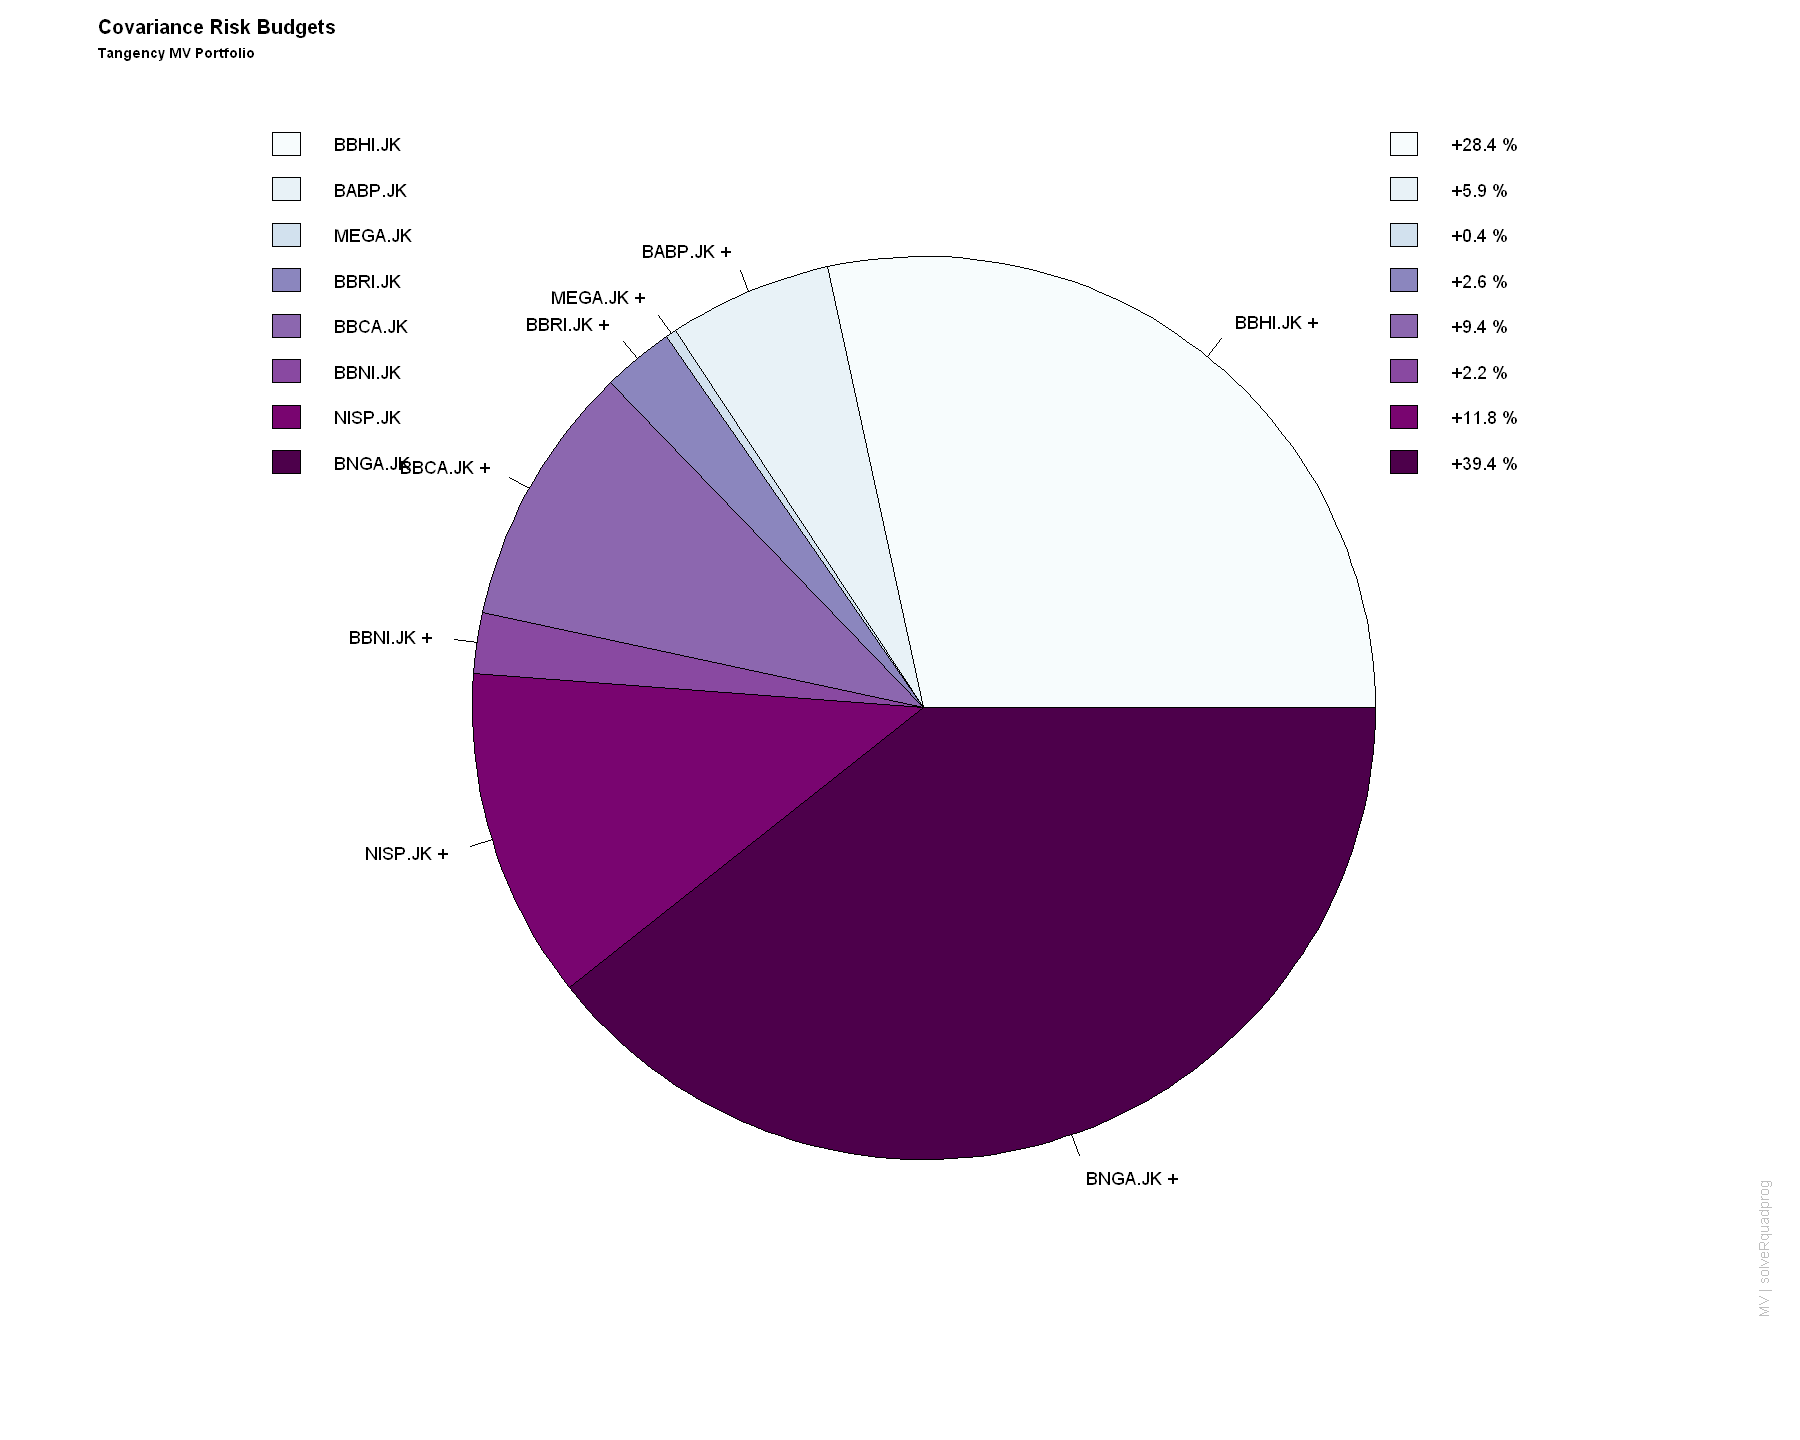

In [72]:
covRiskBudgetsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

## 5. MEAN-VARIANCE PORTFOLIO FRONTIERS

### 5.1 FRONTIER COMPUTATION AND GRAPHICAL DISPLAYS

In [73]:
lppSpec <- portfolioSpec()
setNFrontierPoints(lppSpec) <- 5
longFrontier <- portfolioFrontier(ts_returns, lppSpec)

In [74]:
print(longFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0687  0.0190  0.2069  0.0949  0.0512  0.2261  0.0000
2  0.1228  0.0510  0.0000  0.0000  0.0000  0.0000  0.0194  0.1381  0.0320
3  0.5098  0.1093  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0871  0.2462  0.0000
2  0.0000  0.1377  0.4991
3  0.0000  0.0000  0.3809
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0648  0.0195  0.3023  0.1055  0.0413  0.1878  0.0000
2  0.4059  0.0697  0.0000  0.0000  0.0000  0.0000  0.0064  0.0374  0.0128
3  0.8944  0.0532  0.0000  0.0000  0.0000  

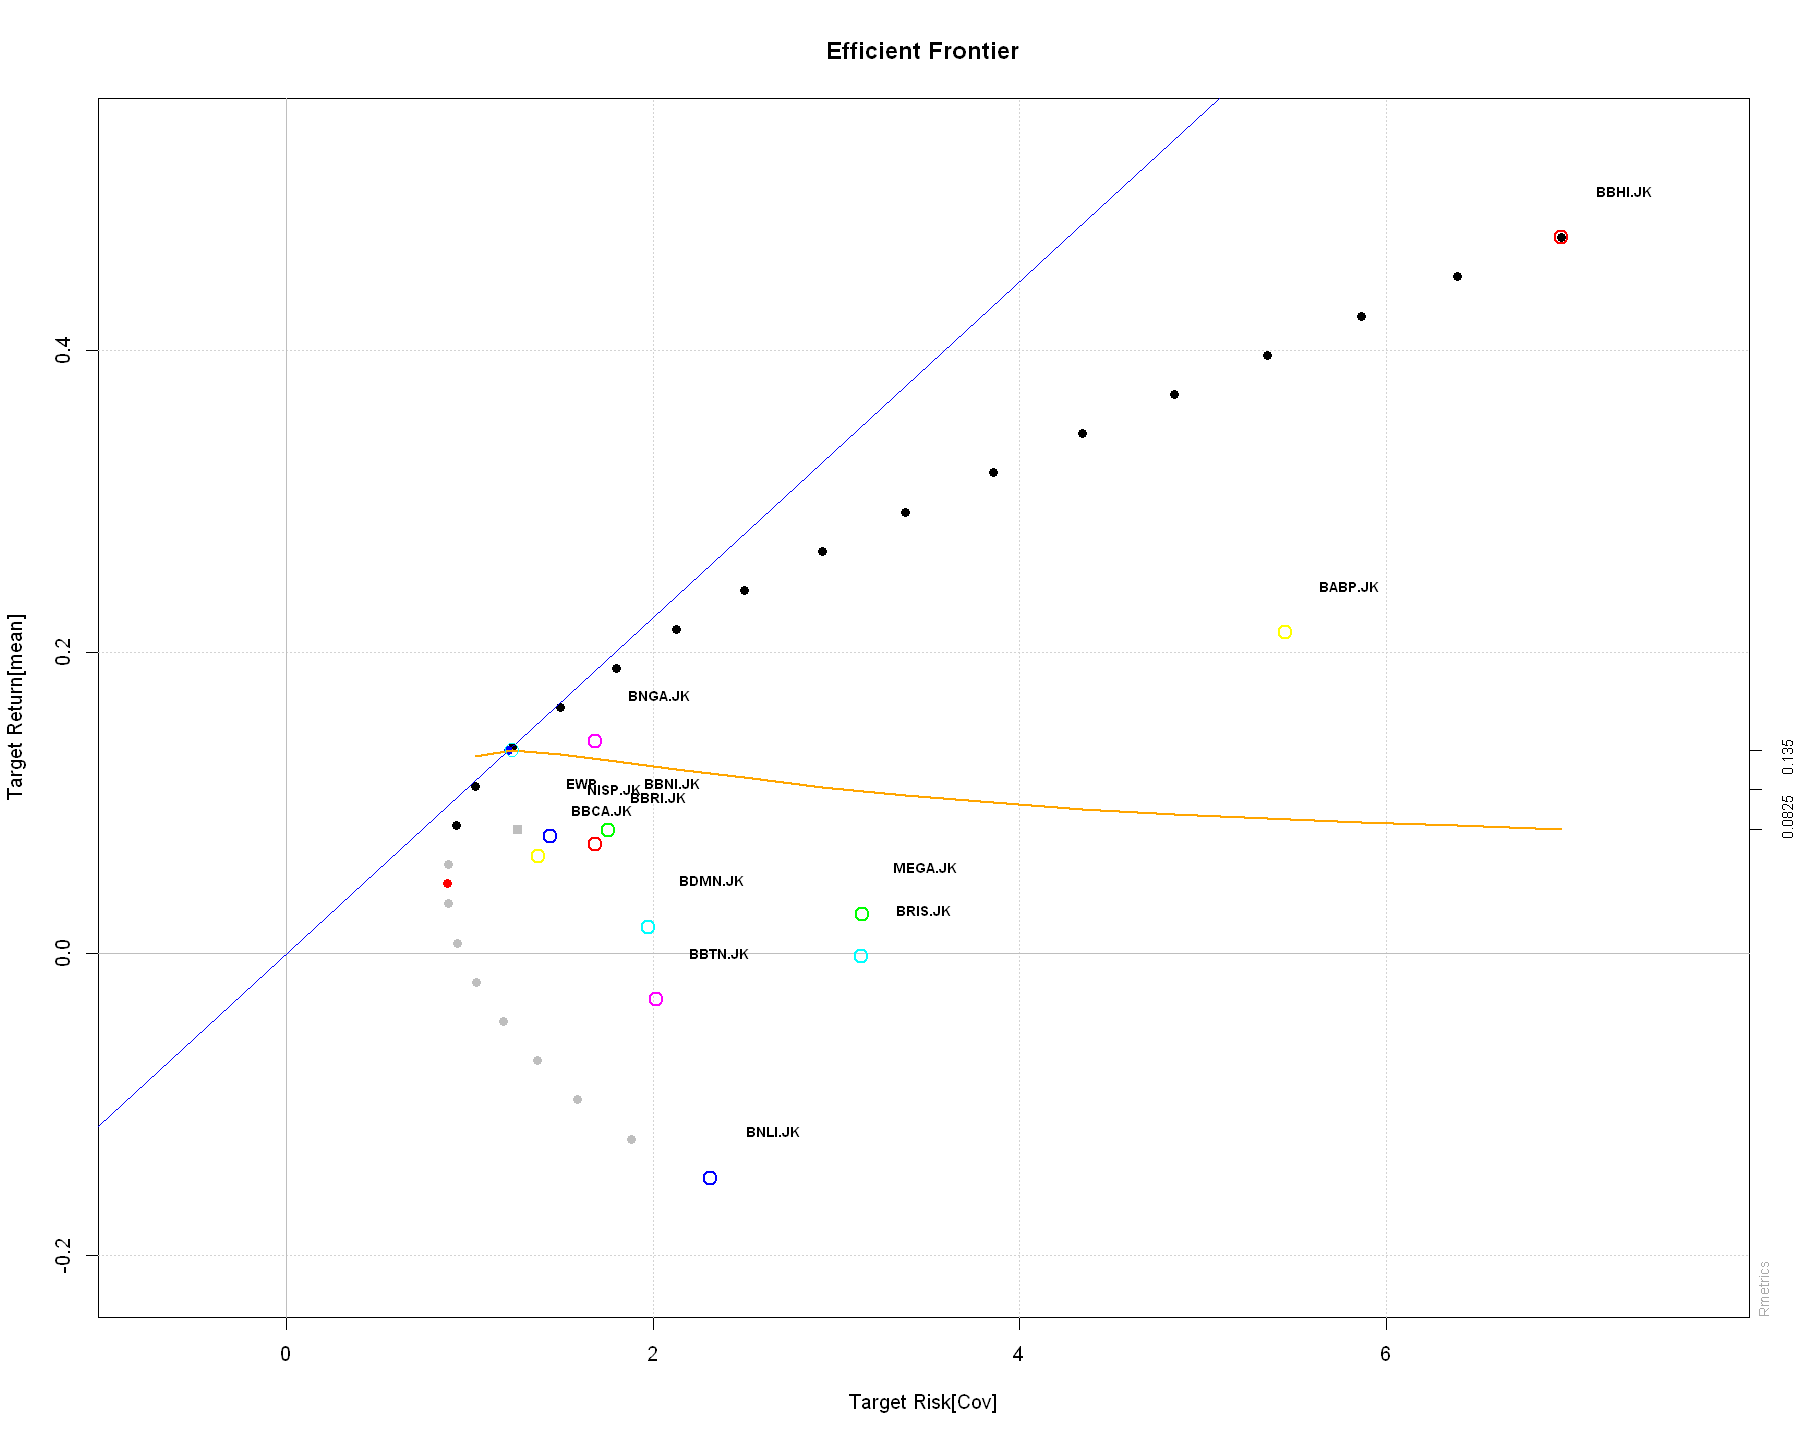

In [75]:
setNFrontierPoints(lppSpec) <- 25
longFrontier <- portfolioFrontier(ts_returns, lppSpec)
tailoredFrontierPlot(object = longFrontier, mText = "MV Portfolio - LongOnly Constraints",risk = "Cov")


### 5.2 THE ‘LONG-ONLY’ PORTFOLIO FRONTIER

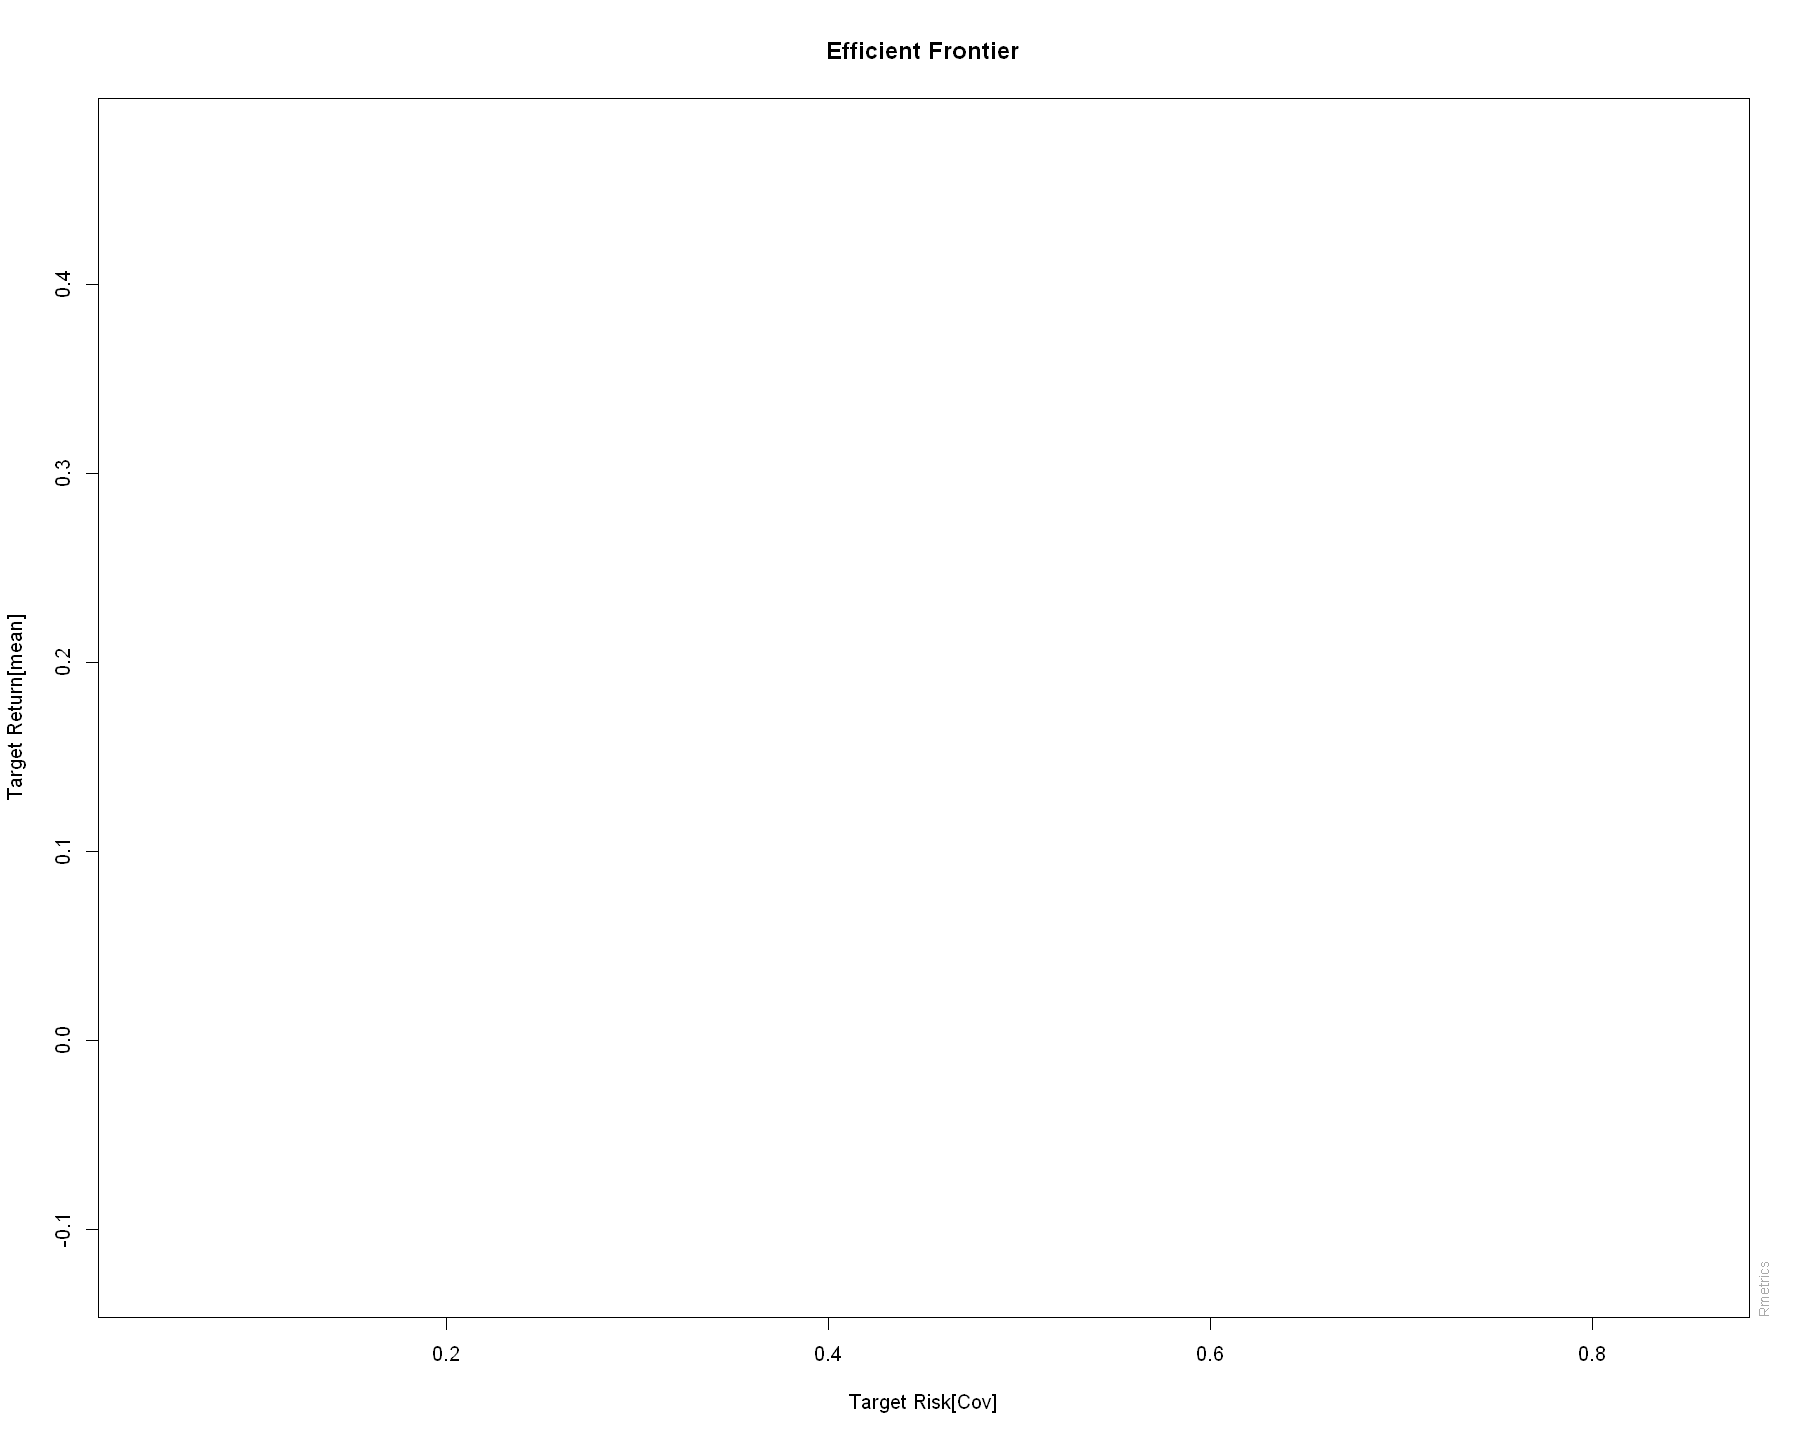

In [76]:
set.seed(1953)
frontierPlot(object = longFrontier, pch = 19, xlim = c(0.05,
                                                       0.85), cex = 0.5)
monteCarloPoints(object = longFrontier, mcSteps = 1000, pch = 19,cex = 0.5)
twoAssetsLines(object = longFrontier, col = "orange", lwd = 2)
frontier <- frontierPoints(object = longFrontier)
lines(frontier, col = "red", lwd = 2)

### 5.3 UNLIMITED ‘SHORT’ PORTFOLIO FRONTIER

In [77]:
shortSpec <- portfolioSpec()
setNFrontierPoints(shortSpec) <- 5
setSolver(shortSpec) <- "solveRshortExact"
shortFrontier <- portfolioFrontier(
data = ts_returns,
spec = shortSpec,
constraints = "Short")
print(shortFrontier)


Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"



Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRshortExact 
 Optimize:          minRisk 
 Constraints:       Short 
 Portfolio Points:  5 of 5 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1 -0.0910 -0.0367  0.0708  0.0625  0.5069  0.3104  0.0100  0.1781 -0.1399
2 -0.0219 -0.0027  0.0683  0.0162  0.1899  0.0751  0.0688  0.2388 -0.0112
3  0.0473  0.0314  0.0659 -0.0301 -0.1270 -0.1602  0.1277  0.2994  0.1175
4  0.1164  0.0655  0.0634 -0.0765 -0.4440 -0.3955  0.1865  0.3601  0.2462
5  0.1856  0.0996  0.0610 -0.1228 -0.7609 -0.6308  0.2454  0.4207  0.3749
  BDMN.JK NISP.JK BNGA.JK
1  0.1711  0.1988 -0.2410
2  0.0765  0.2624  0.0396
3 -0.0181  0.3261  0.3201
4 -0.1127  0.3898  0.6007
5 -0.2073  0.4535  0.8813

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.1154  0.0116  0.0257  0.0291  0.5069  0.1768  0.0019  0.0401 -0.0225
2  0.0002 -0.0015 

Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"


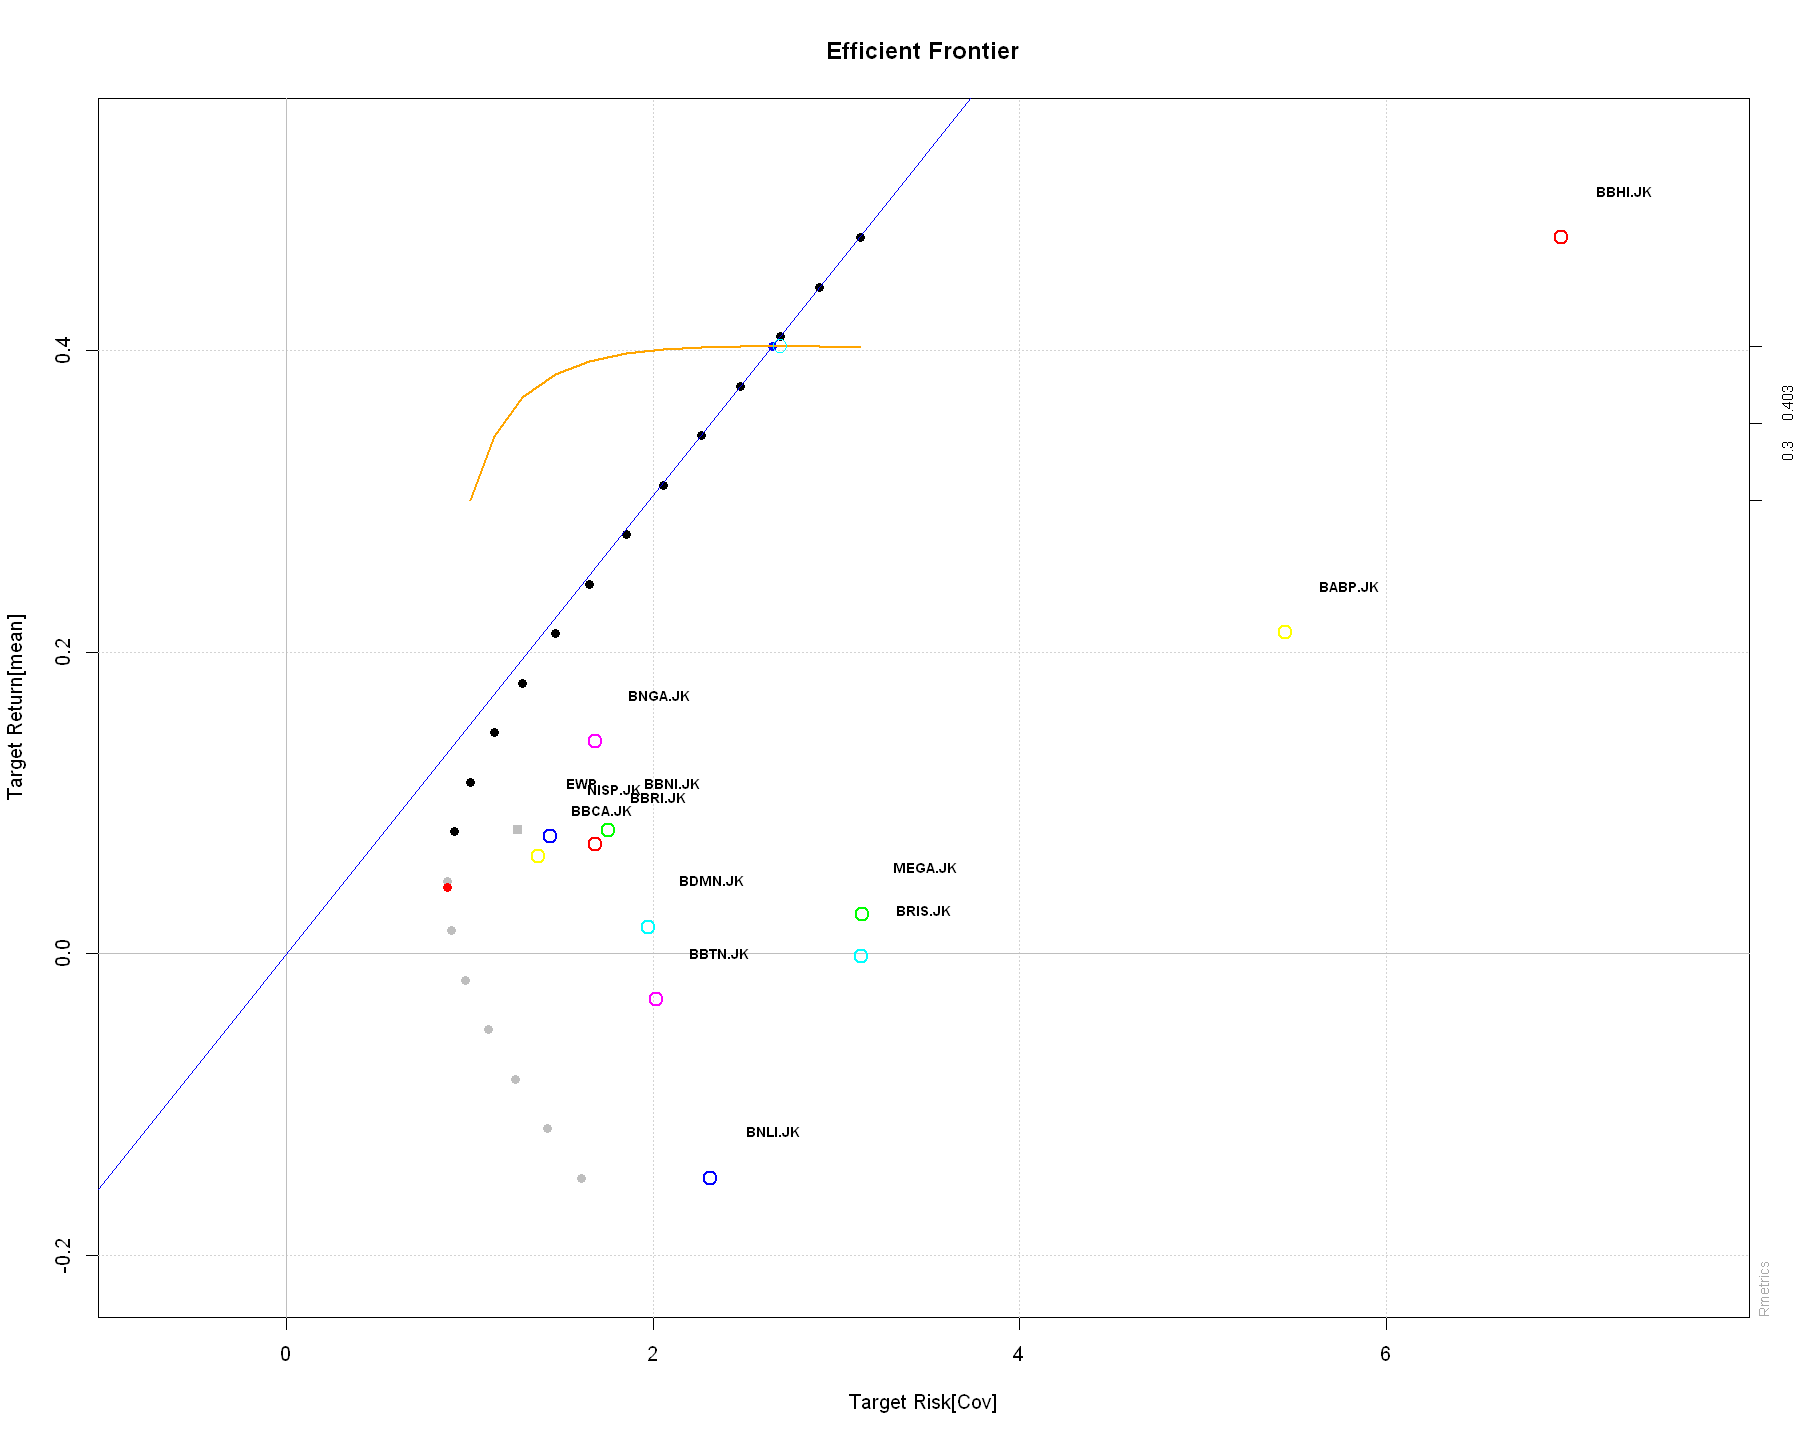

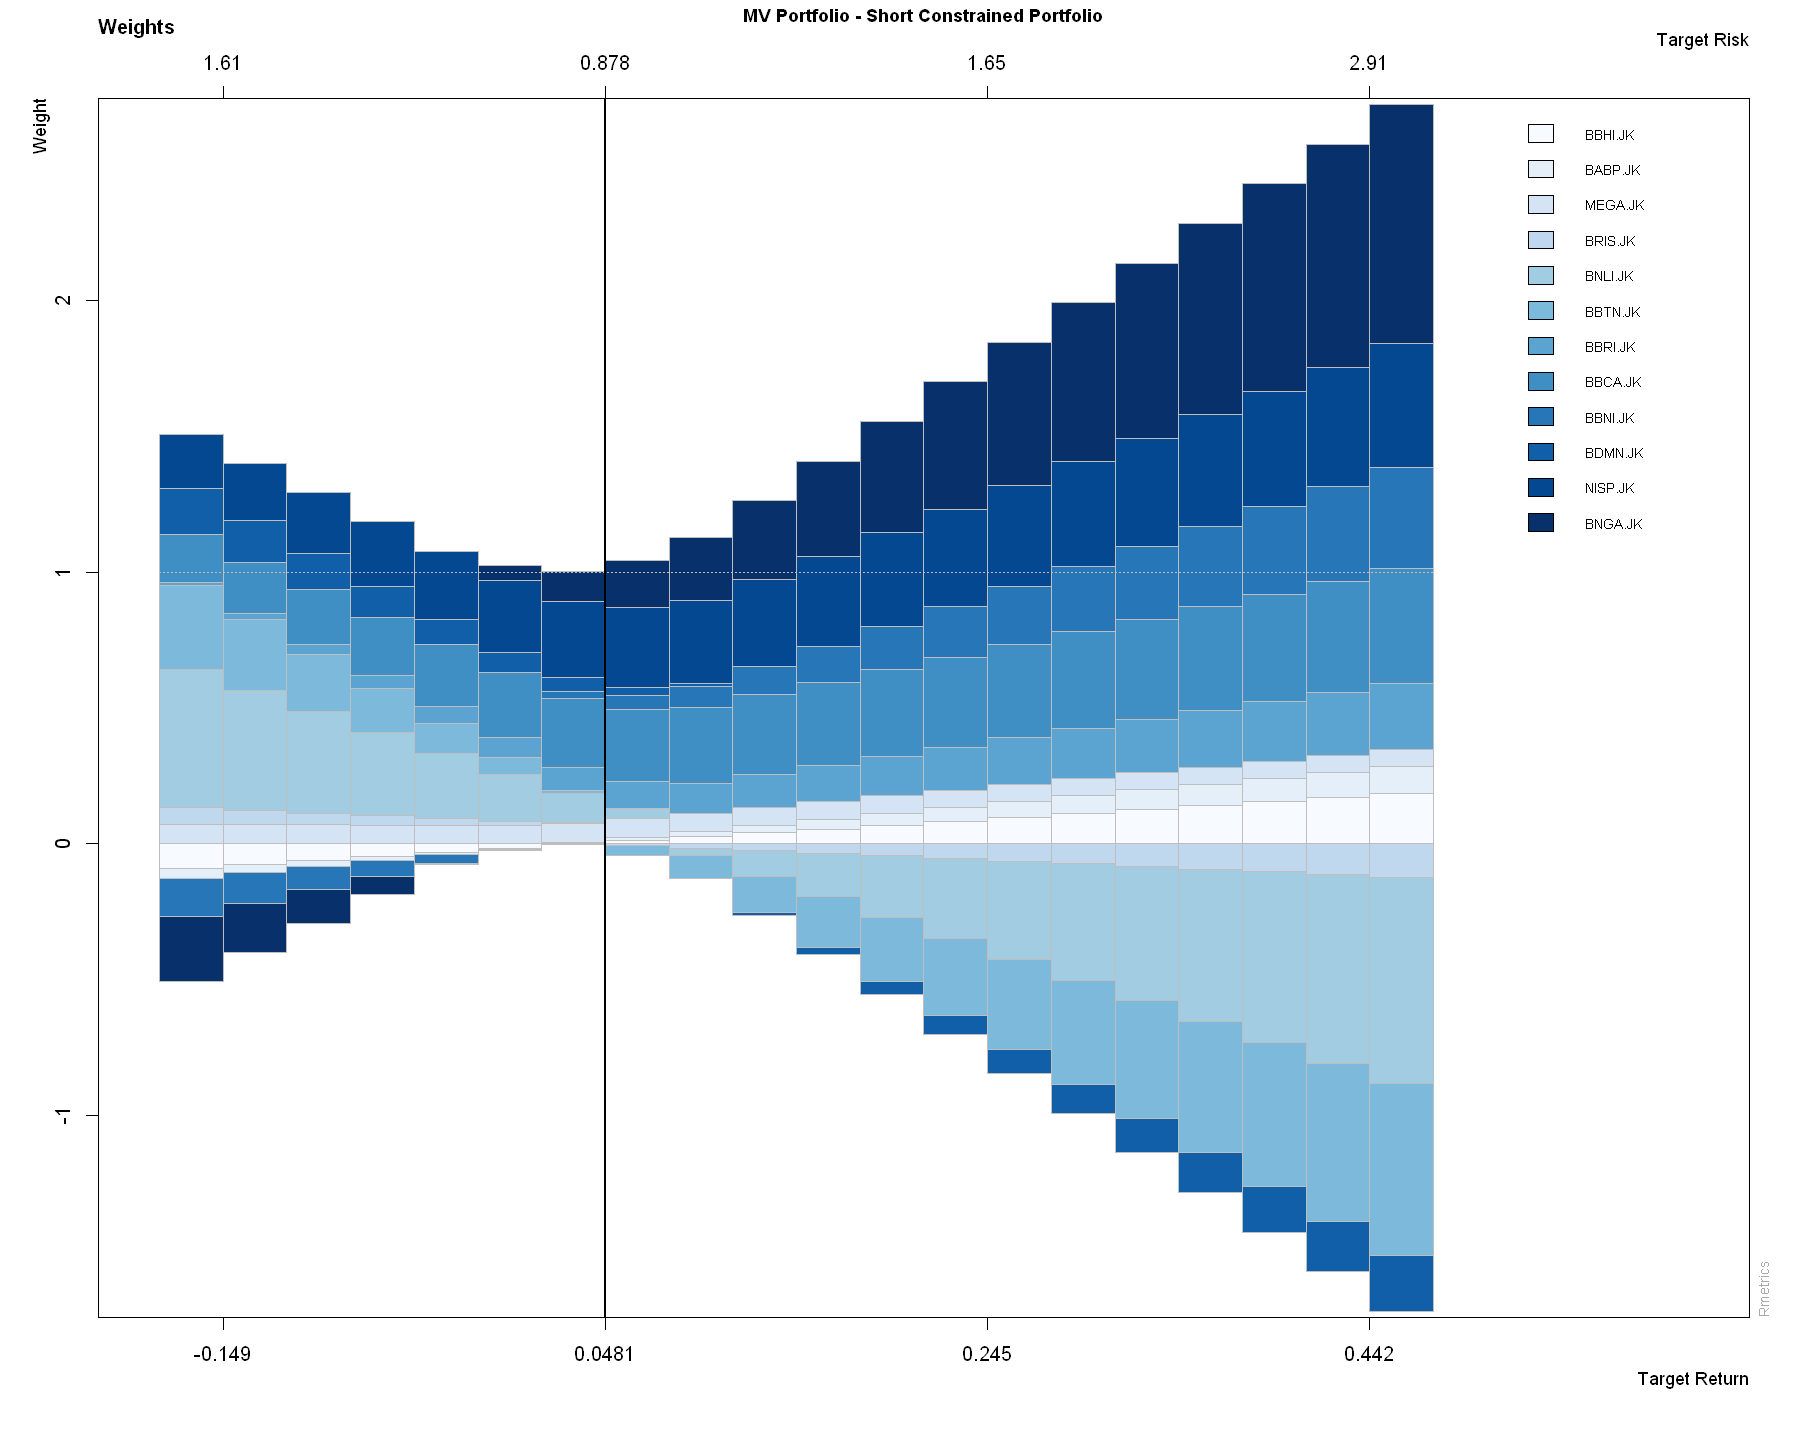

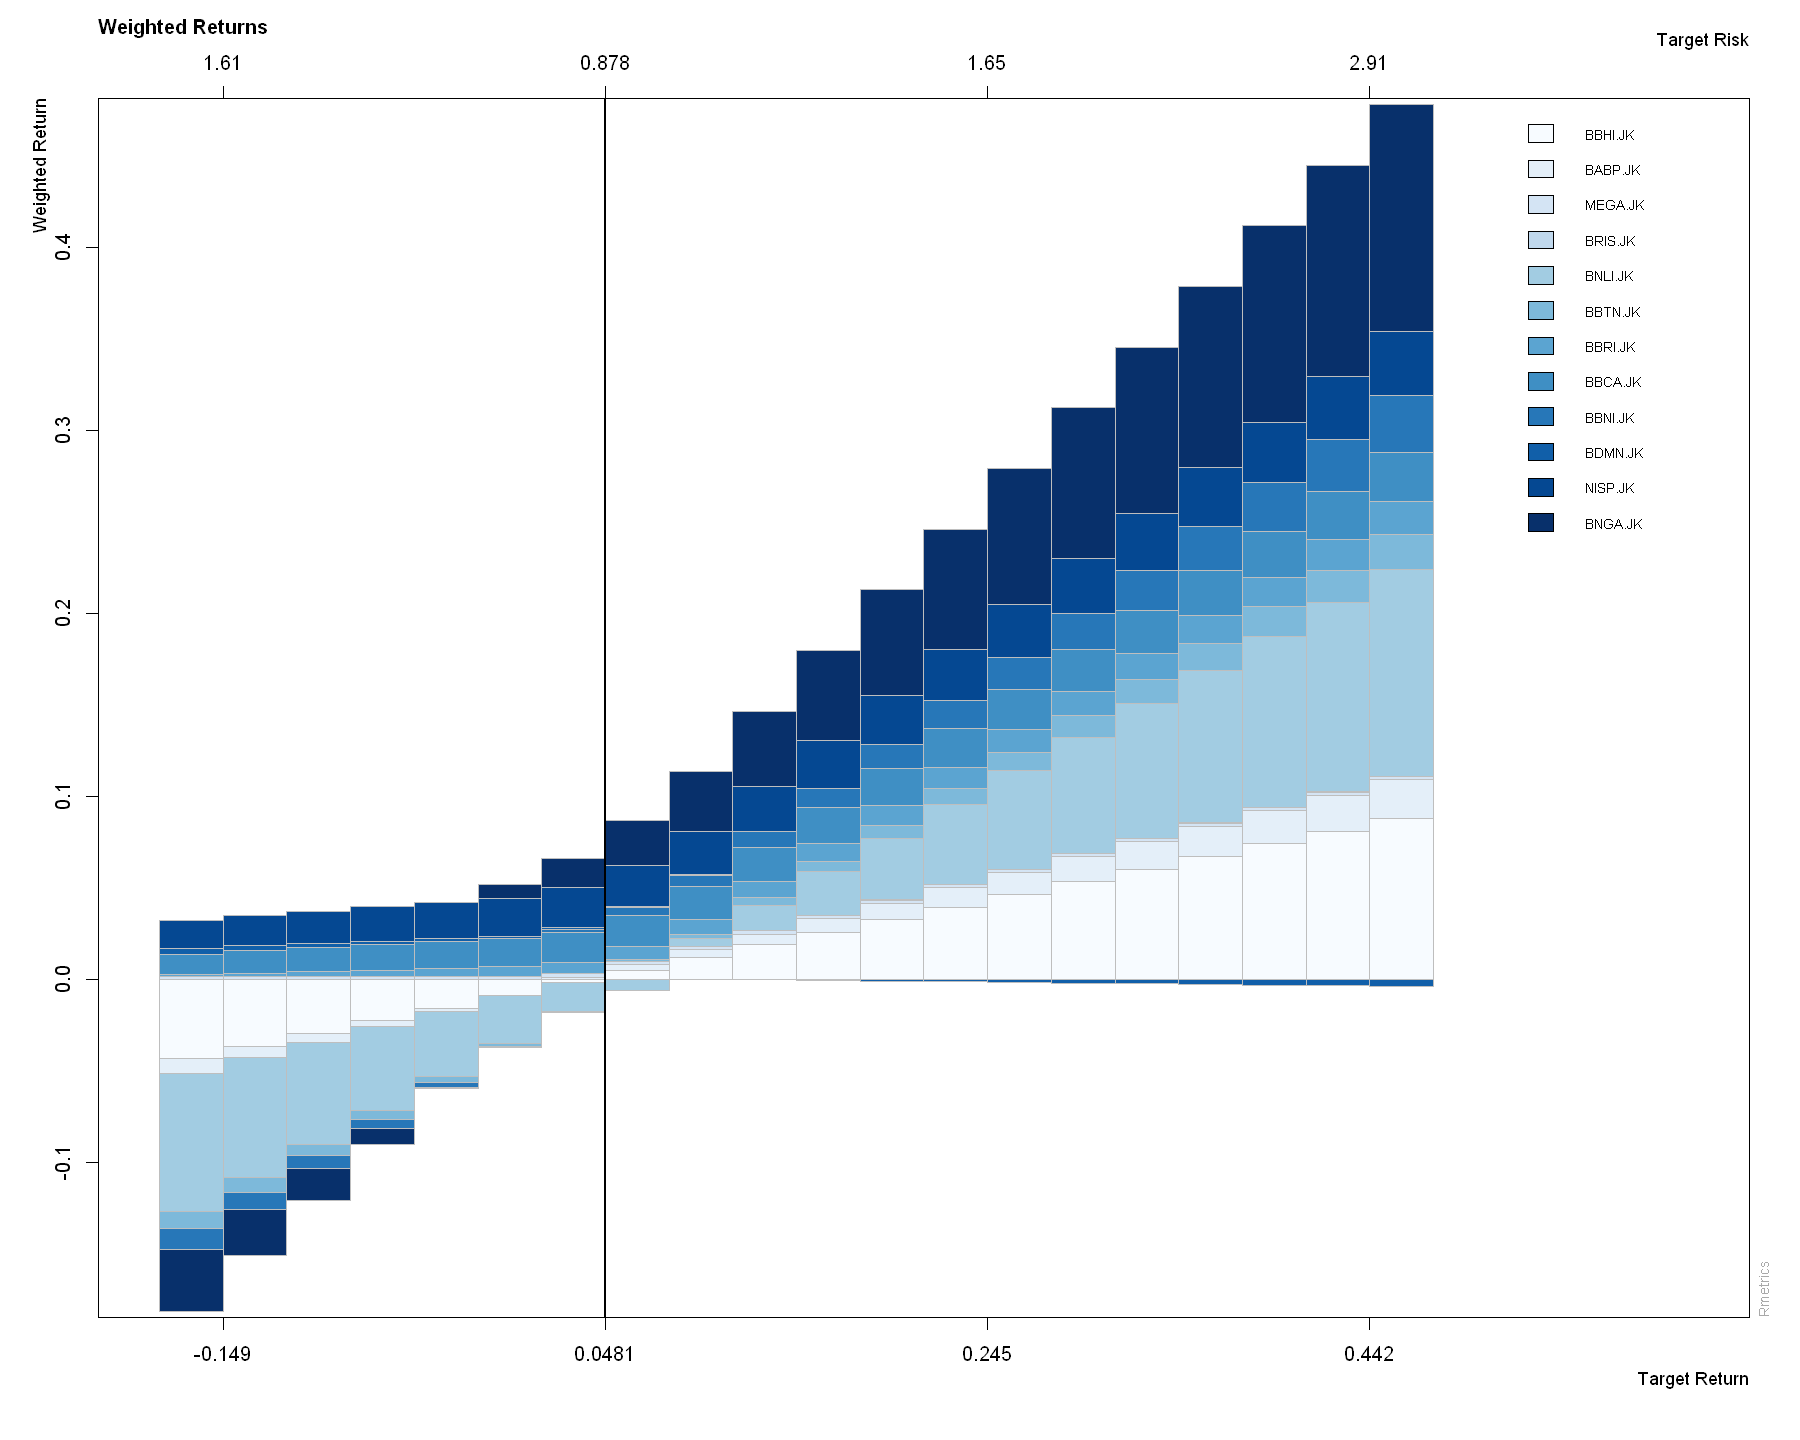

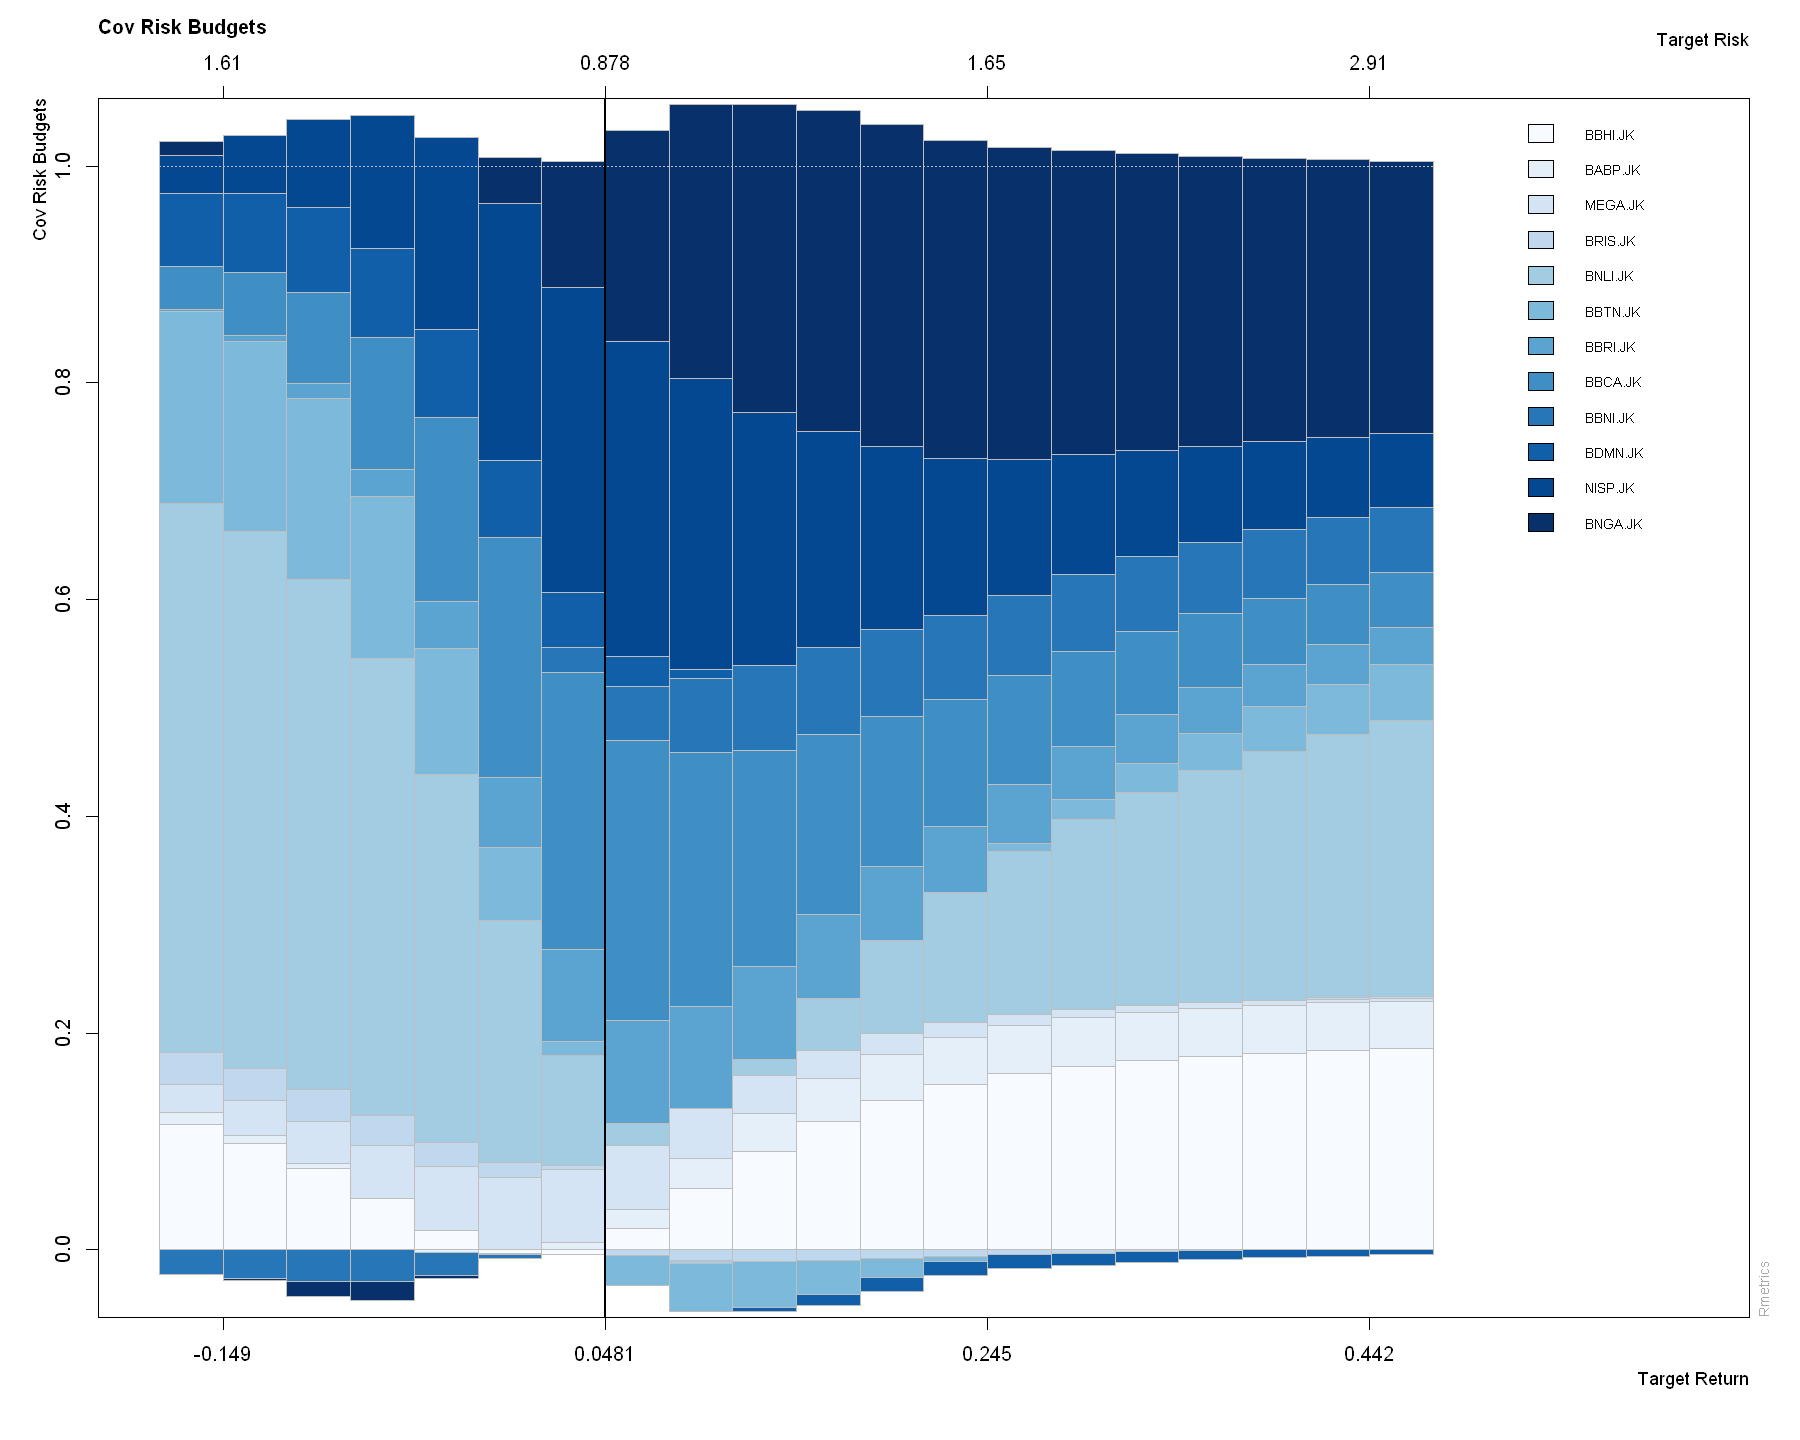

In [78]:
setNFrontierPoints(shortSpec) <- 20
shortFrontier <- portfolioFrontier(data = ts_returns, spec = shortSpec,
                                   constraints = "Short")
tailoredFrontierPlot(object = shortFrontier, mText = "MV Portfolio - Short Constraints",
                     risk = "Cov")
weightsPlot(shortFrontier)
text <- "MV Portfolio - Short Constrained Portfolio"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(shortFrontier)
covRiskBudgetsPlot(shortFrontier)

### 5.4 THE BOX-CONSTRAINED PORTFOLIO FRONTIER

In [79]:
boxSpec <- portfolioSpec()
setNFrontierPoints(boxSpec) <- 15
boxConstraints <- c("minW[1:6]=0.01","maxW[1:6]=0.5")
boxFrontier <- portfolioFrontier(data = ts_returns,
                                 spec = boxSpec,
                                 constraints = boxConstraints)
print(boxFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       minW maxW 
 Portfolio Points:  5 of 9 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0100  0.0100  0.0662  0.0338  0.4543  0.2488  0.0000  0.0420  0.0000
3  0.0100  0.0100  0.0680  0.0126  0.1603  0.0649  0.0656  0.2427  0.0000
5  0.0629  0.0307  0.0303  0.0100  0.0100  0.0100  0.0515  0.2153  0.0318
7  0.2056  0.0741  0.0100  0.0100  0.0100  0.0100  0.0000  0.0000  0.0000
9  0.4662  0.1022  0.0100  0.0100  0.0100  0.0100  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.1051  0.0299  0.0000
3  0.0754  0.2554  0.0351
5  0.0000  0.2257  0.3218
7  0.0000  0.0000  0.6803
9  0.0000  0.0000  0.3916

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0116  0.0069  0.0317  0.0214  0.6588  0.1974  0.0000  0.0112  0.0000
3  0.0188  0.012

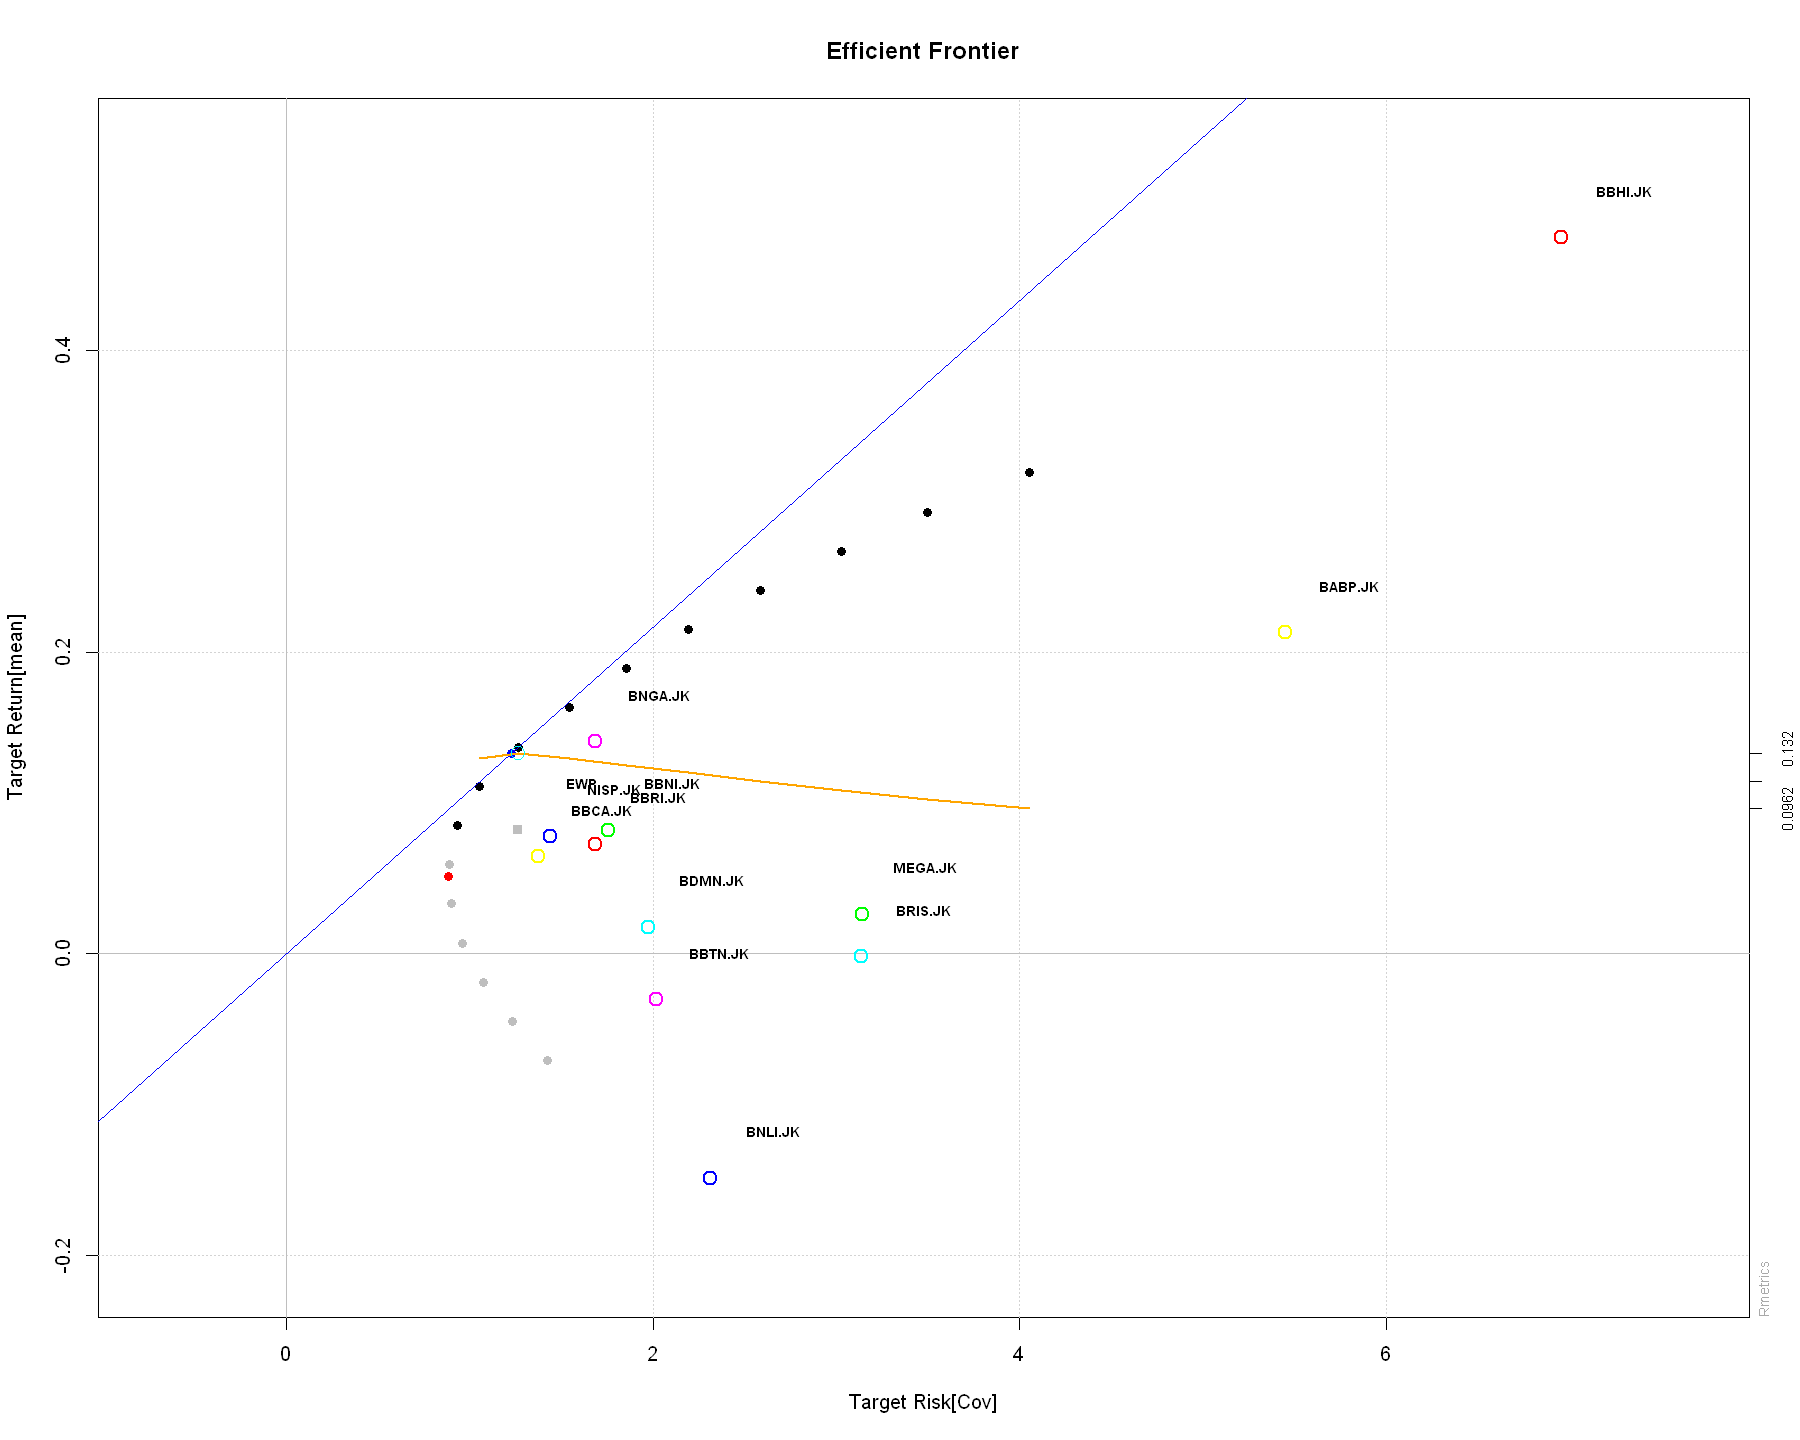

In [80]:
setNFrontierPoints(boxSpec) <- 25
boxFrontier <- portfolioFrontier(data = ts_returns, spec = boxSpec,
                                 constraints = boxConstraints)
tailoredFrontierPlot(object = boxFrontier, mText = "MV Portfolio - Box Constraints",
                     risk = "Cov")

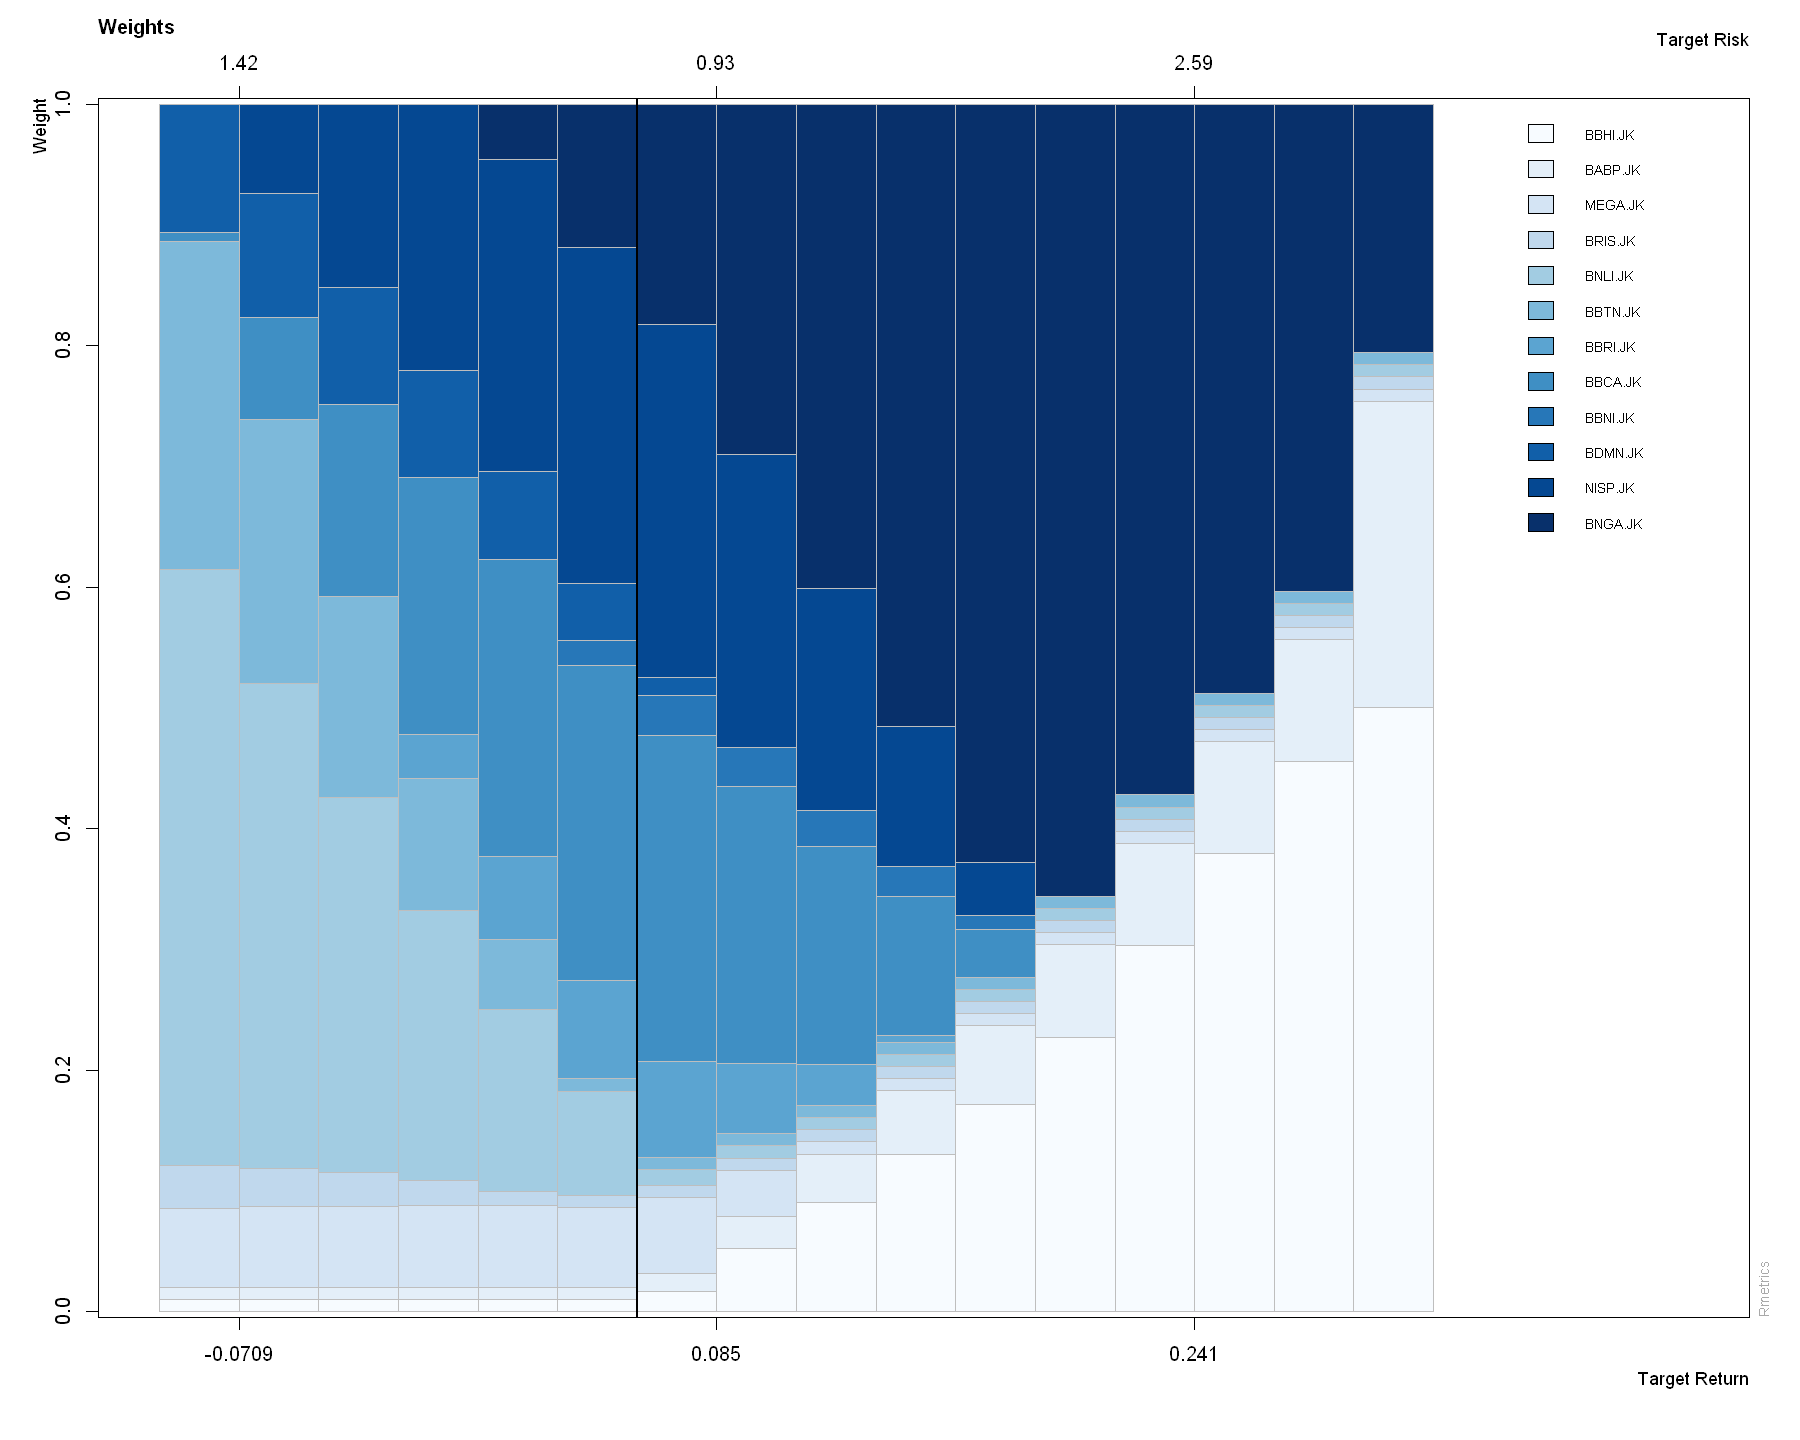

In [81]:
weightsPlot(boxFrontier)

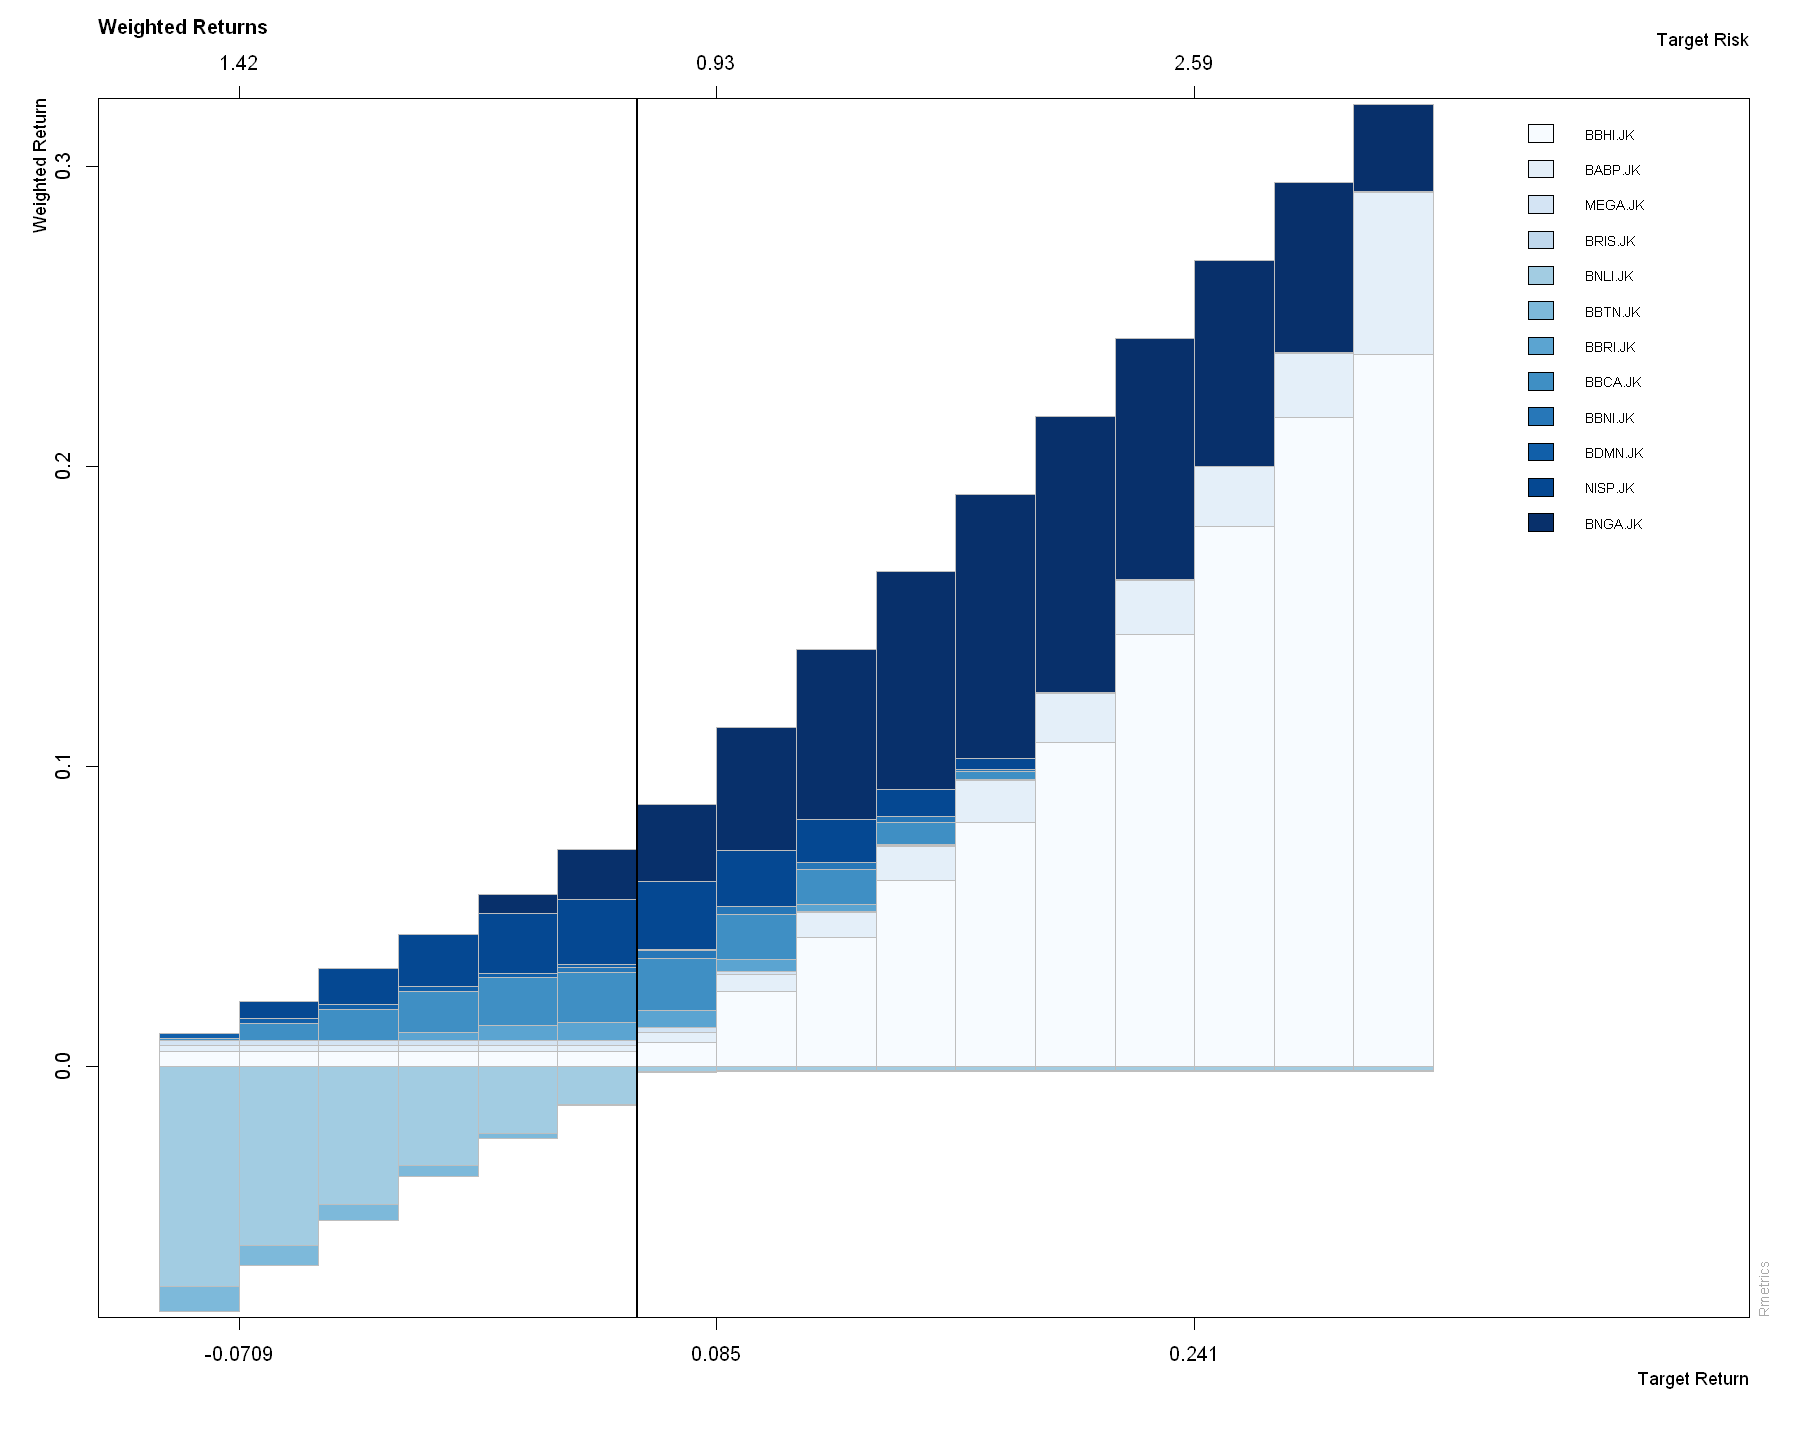

In [82]:
weightedReturnsPlot(boxFrontier)

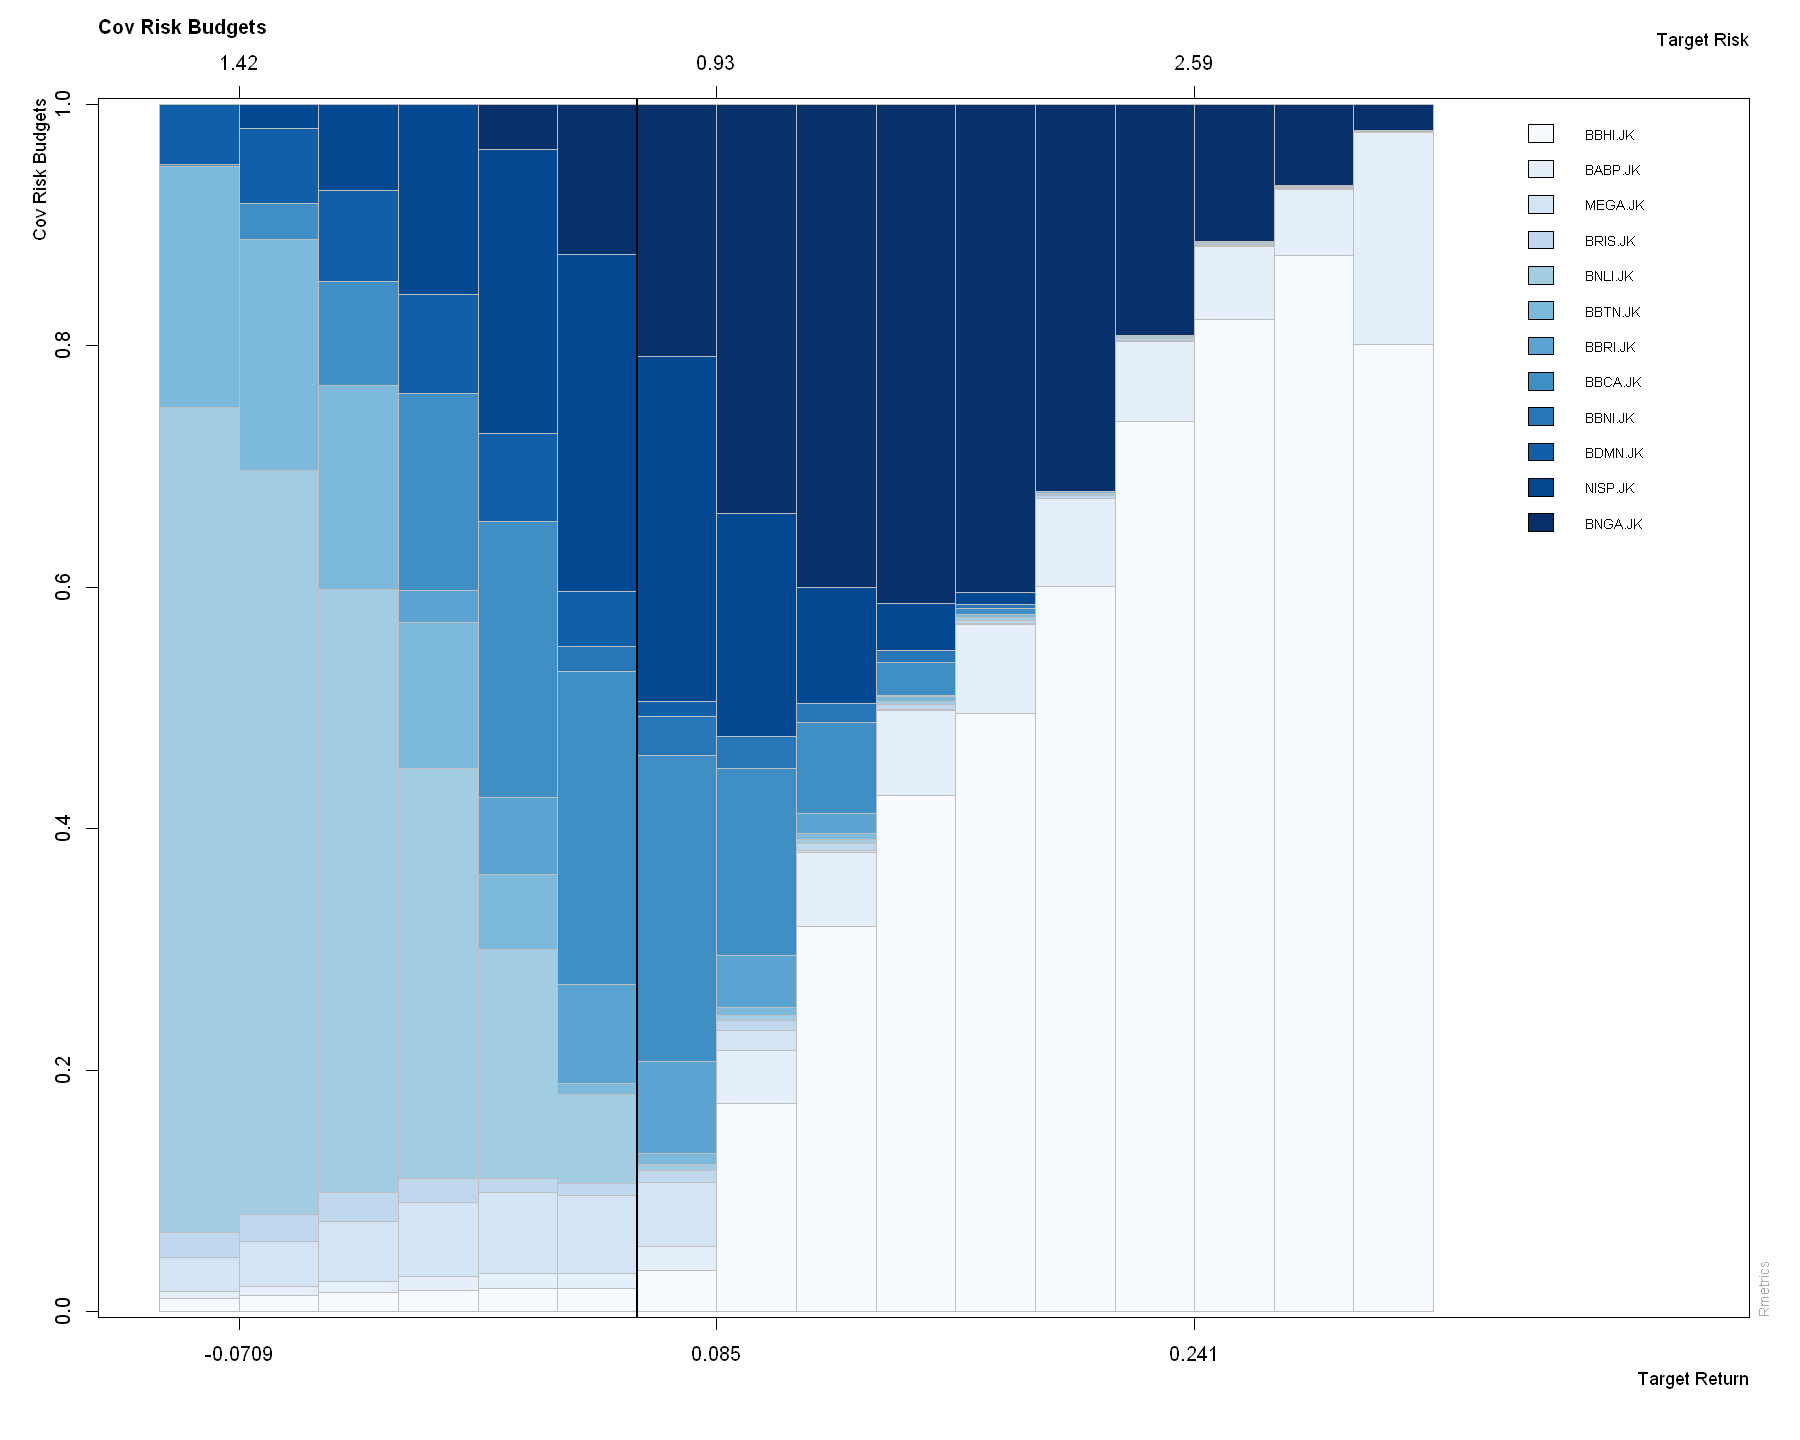

In [83]:
covRiskBudgetsPlot(boxFrontier)

###  5.5 THE GROUP-CONSTRAINED PORTFOLIO FRONTIER

In [84]:
groupSpec <- portfolioSpec()
setNFrontierPoints(groupSpec) <- 7
groupConstraints <- c("minsumW[c(1,4)]=0.3",
                      "maxsumW[c(2,5)]=0.5")
groupFrontier <- portfolioFrontier(data = ts_returns,
                                   spec = groupSpec,
                                   constraints = groupConstraints)
print(groupFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       minsumW maxsumW 
 Portfolio Points:  5 of 6 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0428  0.3000  0.3594  0.0972  0.0000  0.0817  0.0000
2  0.0475  0.0000  0.0443  0.2525  0.0592  0.0000  0.0000  0.2702  0.0000
3  0.1685  0.0342  0.0000  0.1315  0.0000  0.0000  0.0000  0.1384  0.0000
4  0.3578  0.0929  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
6  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0587  0.0602  0.0000
2  0.0250  0.2489  0.0524
3  0.0000  0.1138  0.4135
4  0.0000  0.0000  0.5493
6  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0168  0.5002  0.3670  0.0579  0.0000  0.0209  0.0000
2  0.1067 

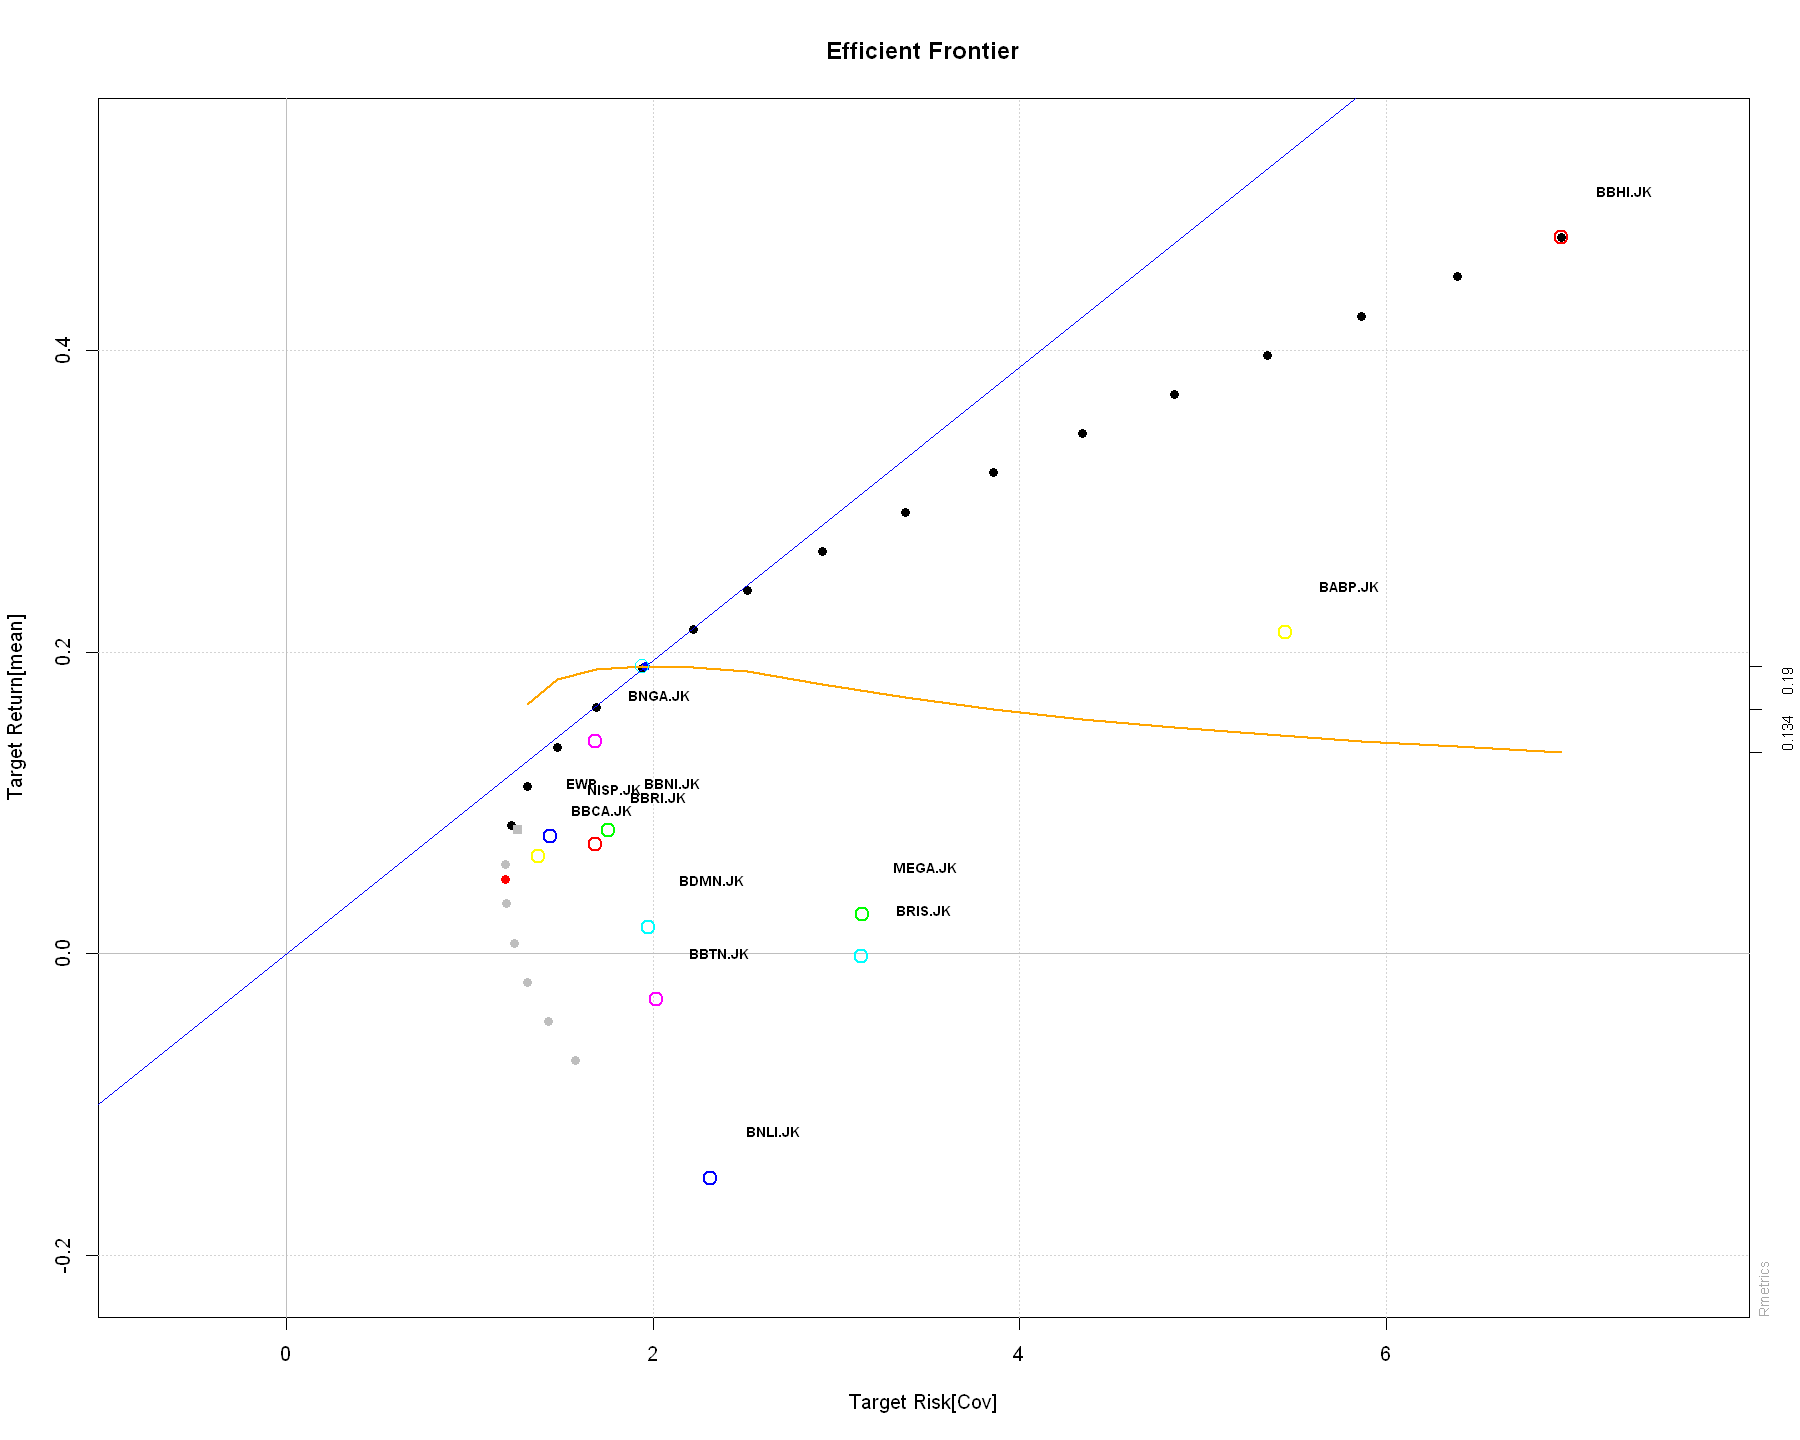

In [85]:
groupSpec <- portfolioSpec()
setNFrontierPoints(groupSpec) <- 25
groupFrontier <- portfolioFrontier(data = ts_returns, spec = groupSpec,
                                   constraints = groupConstraints)
tailoredFrontierPlot(object = groupFrontier, mText = "MV Portfolio - Group Constraints",
                     risk = "Cov")

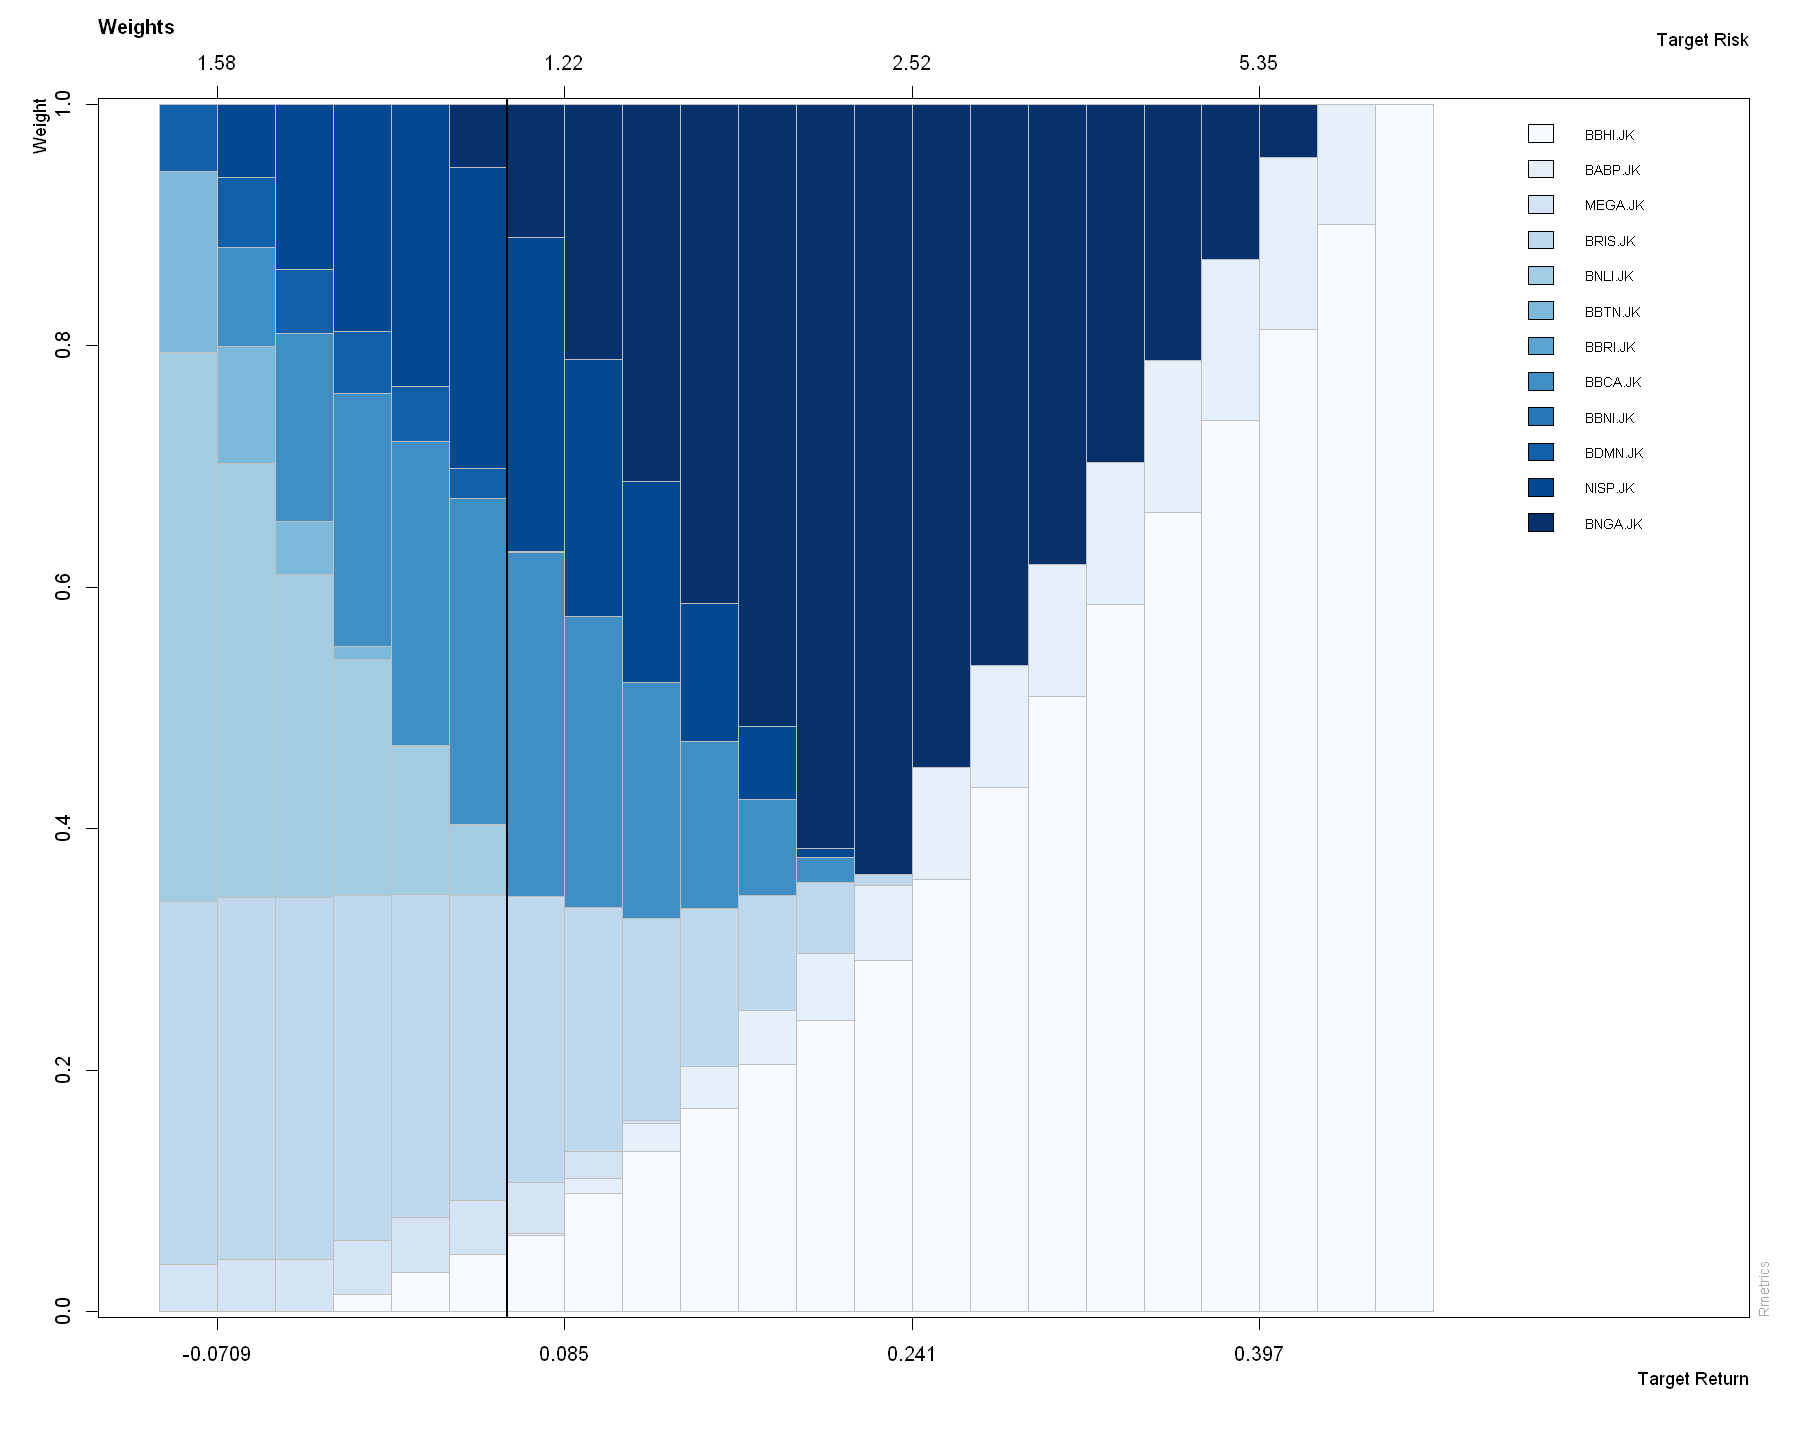

In [86]:
weightsPlot(groupFrontier)

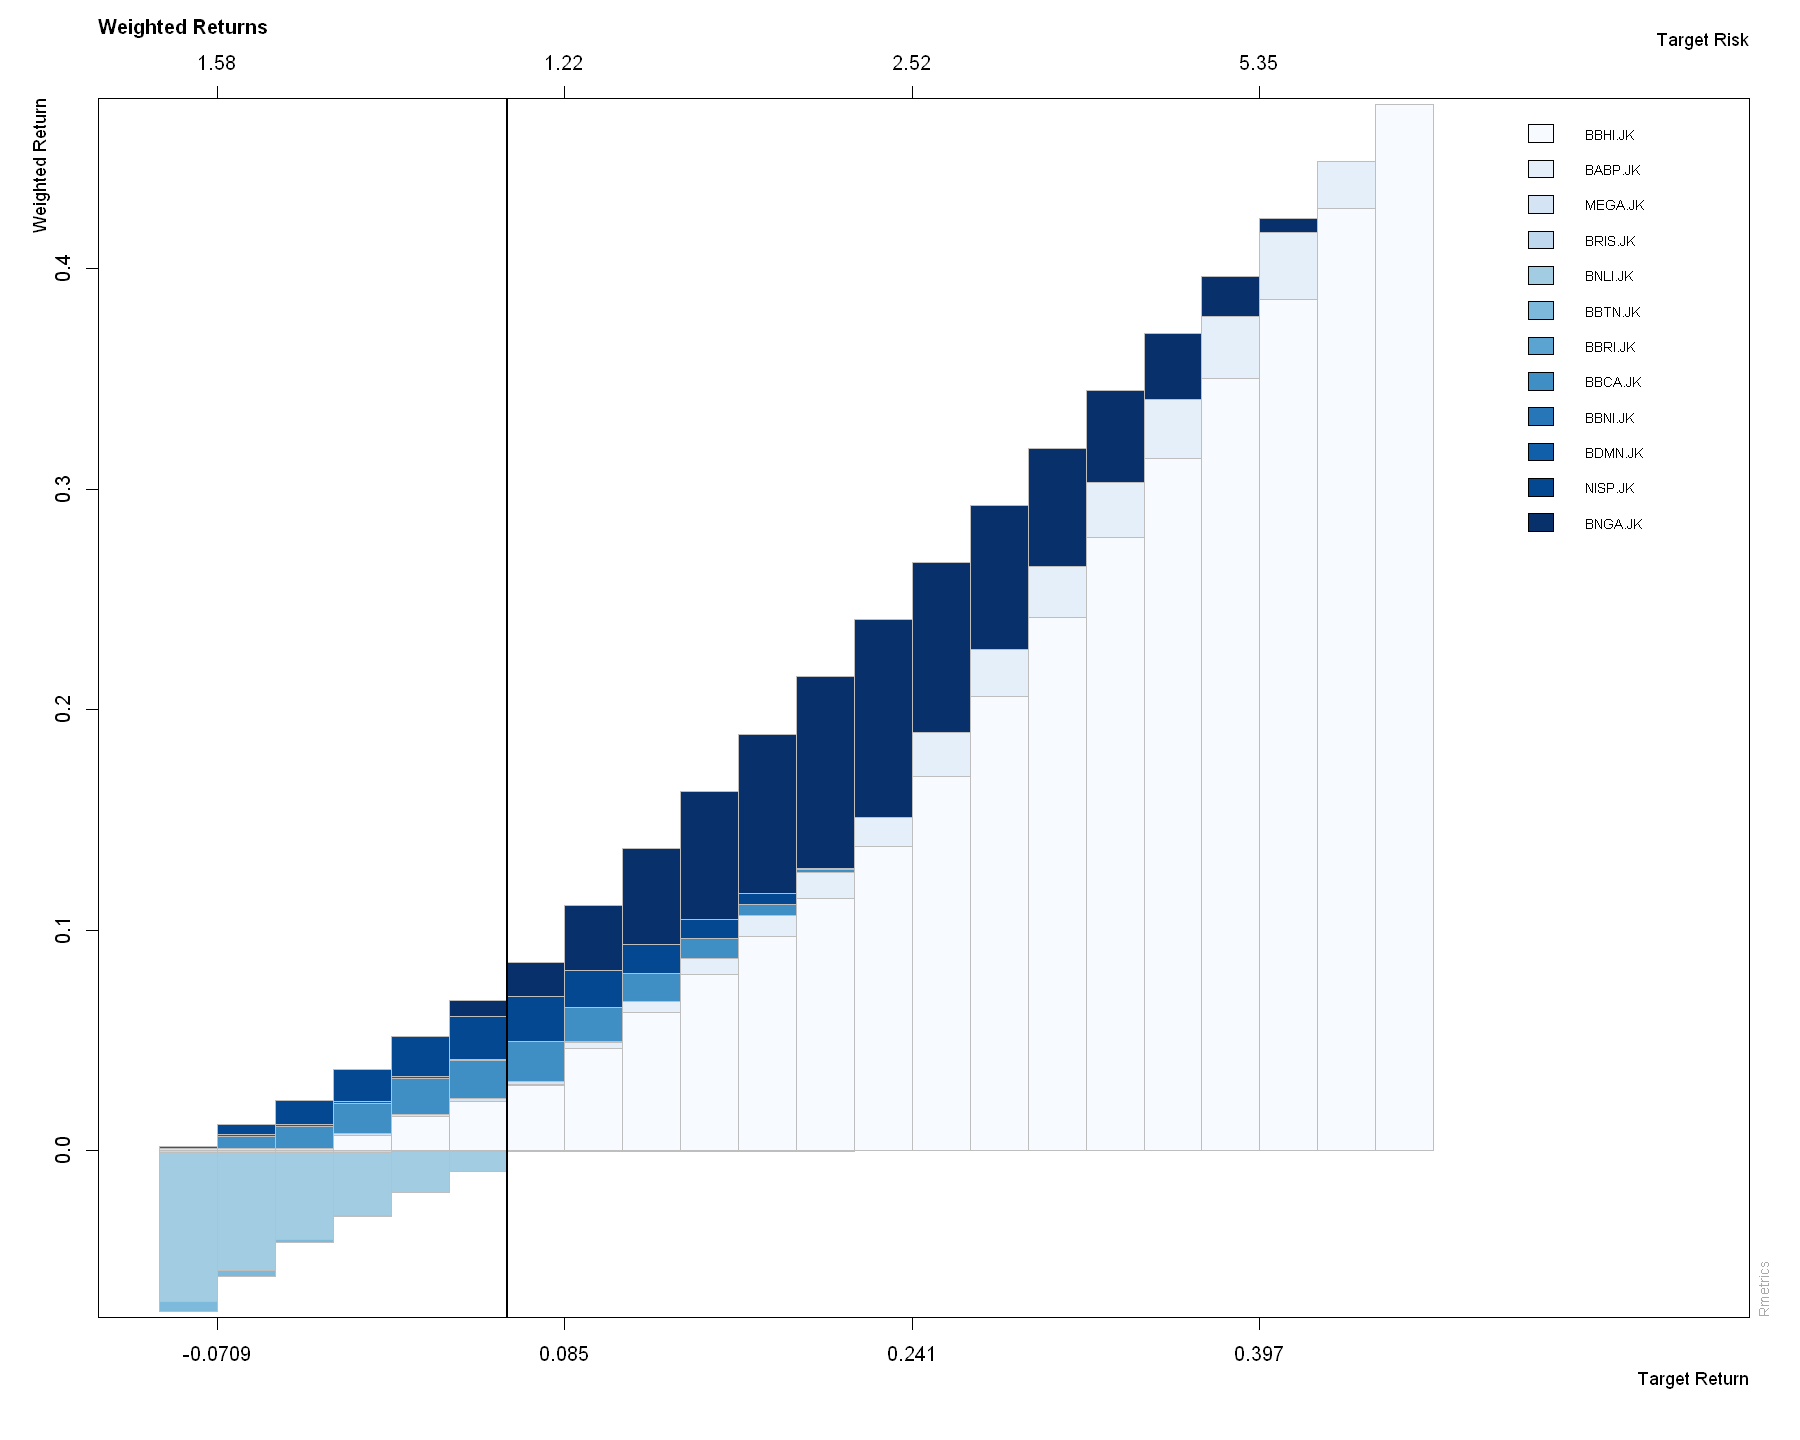

In [87]:
weightedReturnsPlot(groupFrontier)

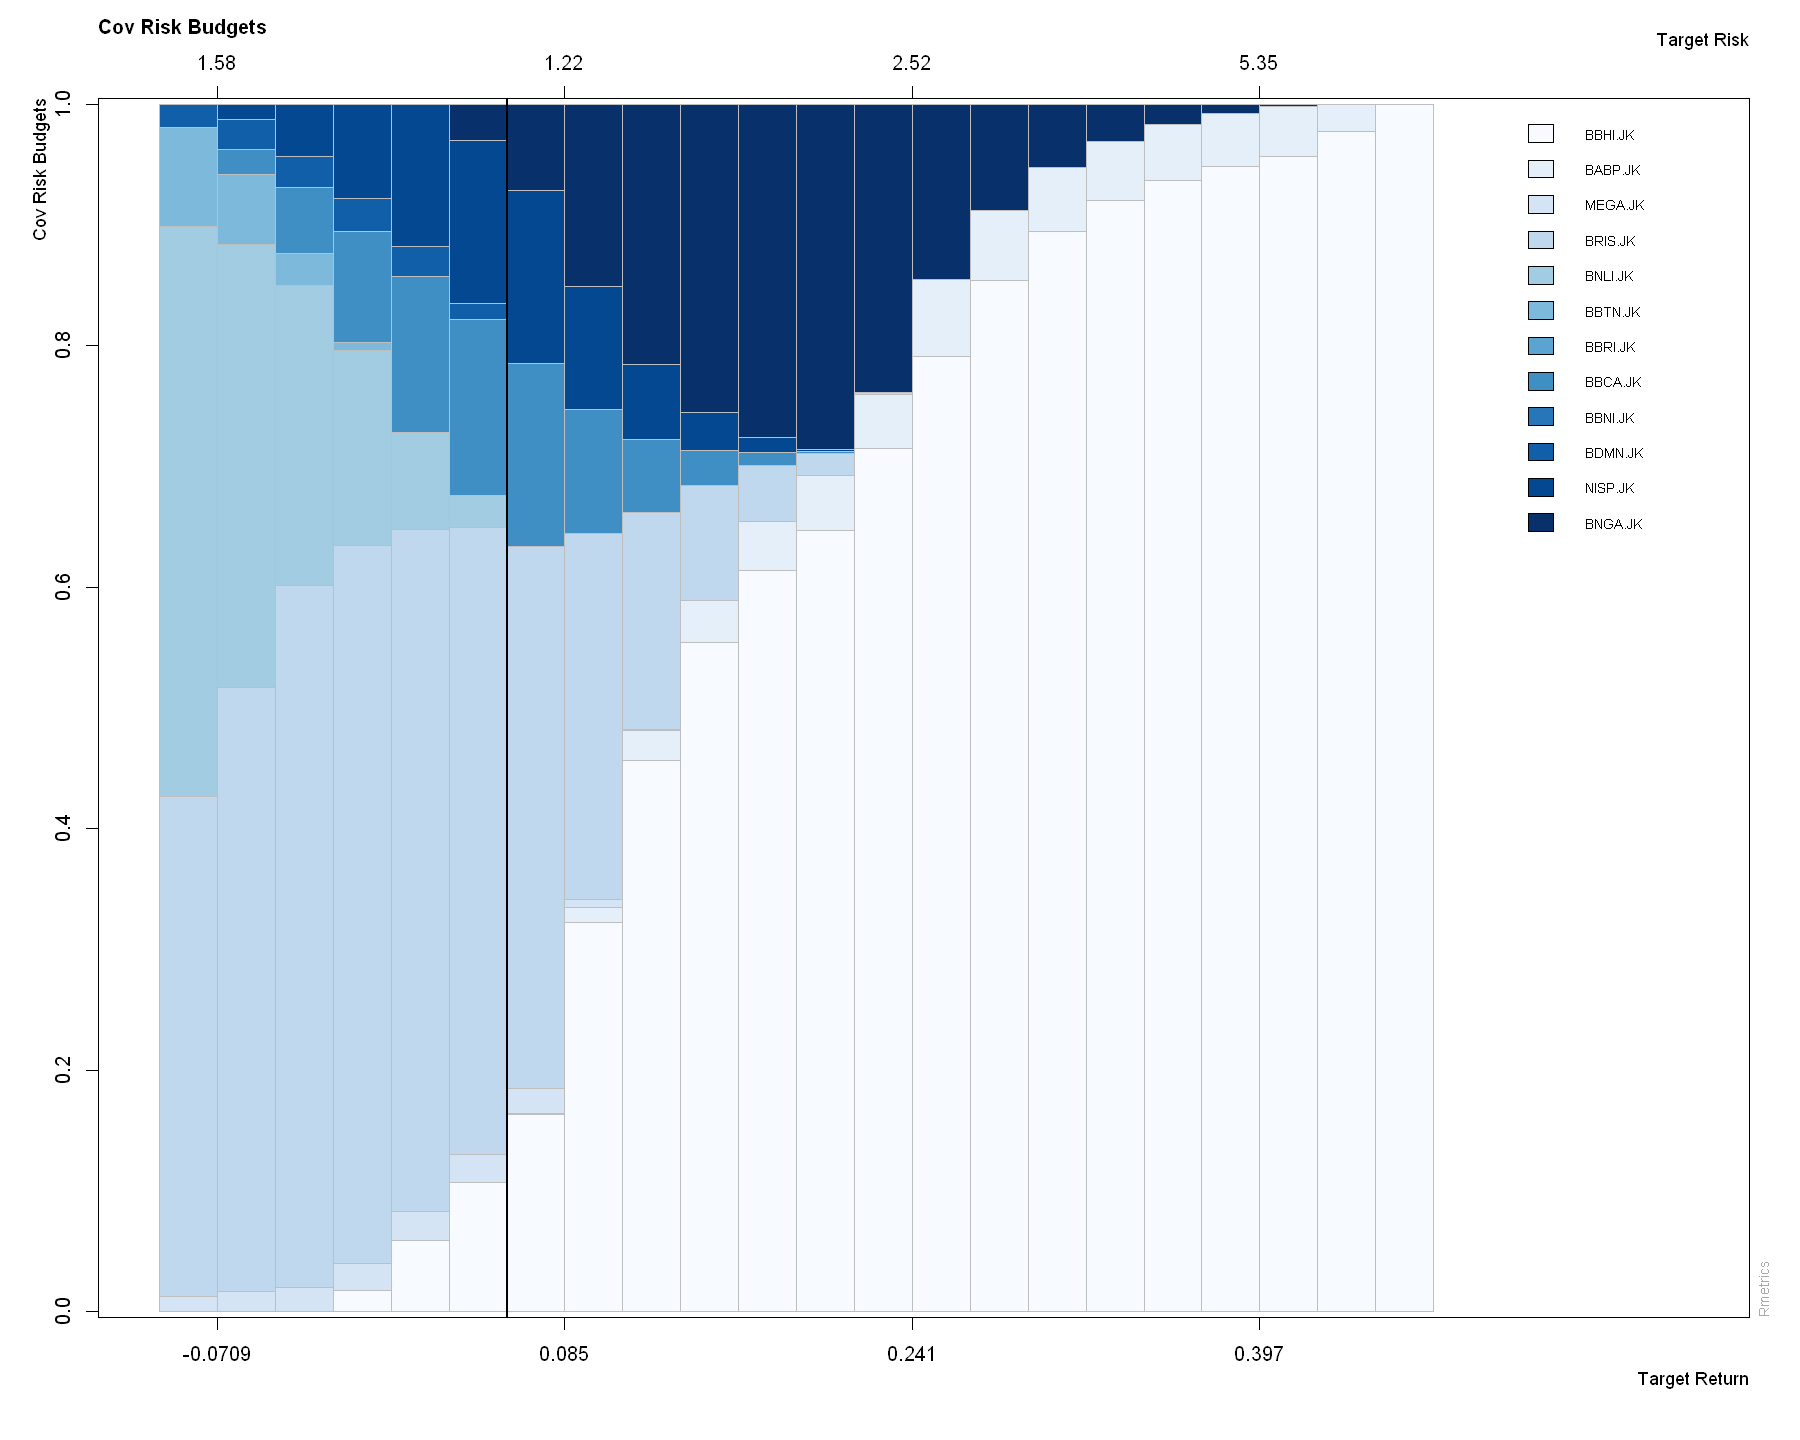

In [88]:
covRiskBudgetsPlot(groupFrontier)

### 5.6 THE BOX/GROUP-CONSTRAINED PORTFOLIO FRONTIER

In [89]:
boxgroupSpec <- portfolioSpec()
setNFrontierPoints(boxgroupSpec) <- 15
boxgroupConstraints <- c(boxConstraints,
                         groupConstraints)
boxgroupFrontier <- portfolioFrontier(data = ts_returns,
                                      spec = boxgroupSpec,
constraints = boxgroupConstraints)
print(boxgroupFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       minW maxW minsumW maxsumW 
 Portfolio Points:  5 of 9 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0100  0.0100  0.0419  0.2900  0.4328  0.1455  0.0000  0.0089  0.0000
3  0.0285  0.0100  0.0442  0.2715  0.1341  0.0100  0.0000  0.2401  0.0000
5  0.1121  0.0168  0.0126  0.1879  0.0100  0.0100  0.0000  0.2128  0.0000
7  0.2369  0.0532  0.0100  0.0631  0.0100  0.0100  0.0000  0.0132  0.0000
9  0.4662  0.1022  0.0100  0.0100  0.0100  0.0100  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0608  0.0000  0.0000
3  0.0422  0.2194  0.0000
5  0.0000  0.1884  0.2494
7  0.0000  0.0059  0.5976
9  0.0000  0.0000  0.3916

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0093  0.0054  0.0140  0.4101  0.4546  0.0825  0.0000  0.0016  0.0000


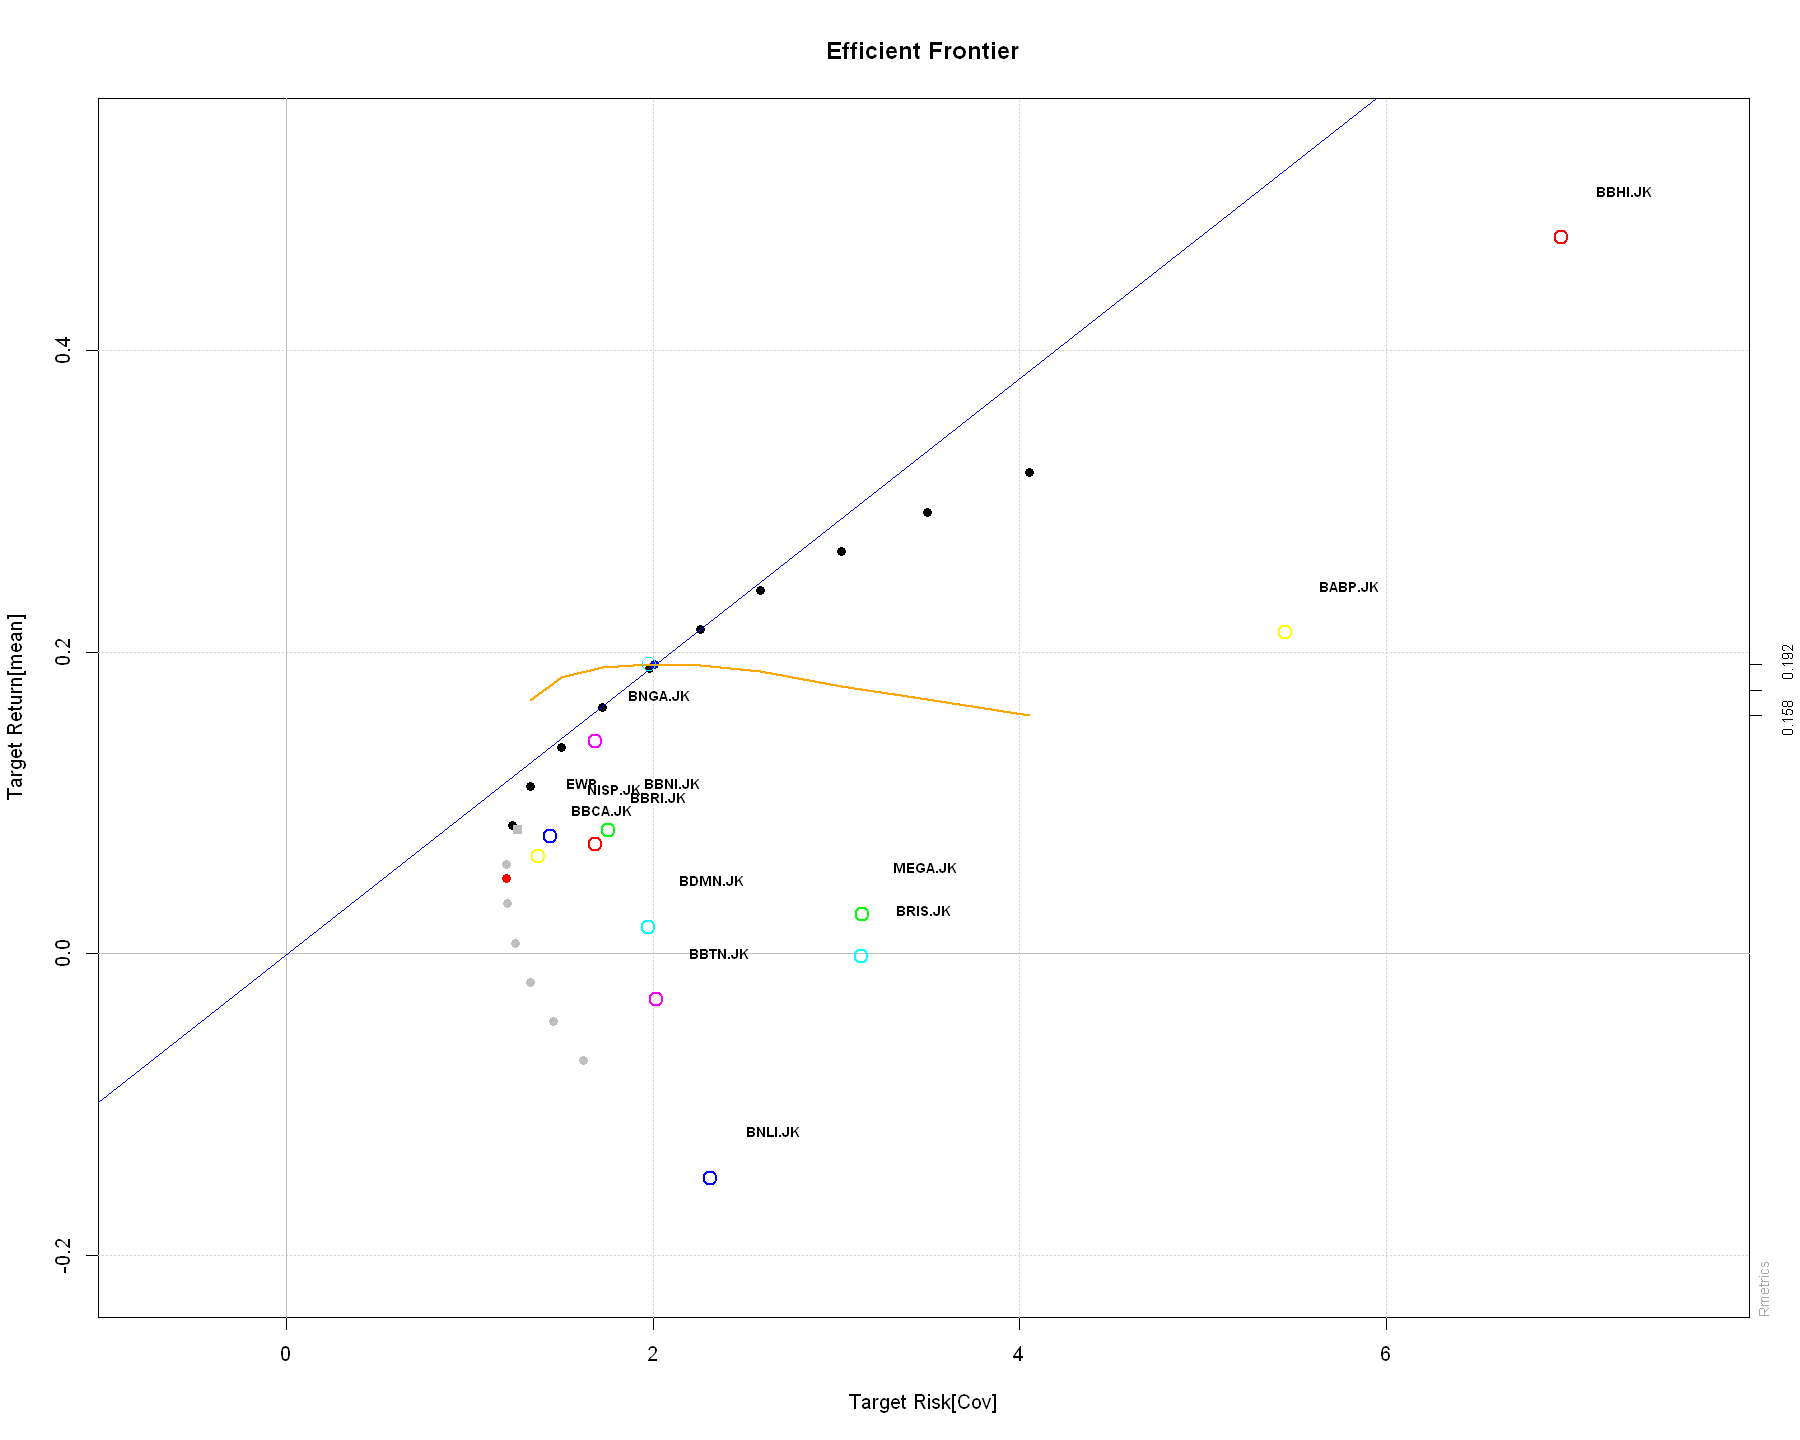

In [90]:
boxgroupSpec <- portfolioSpec()
setNFrontierPoints(boxgroupSpec) <- 25
boxgroupFrontier <- portfolioFrontier(
    data = ts_returns,
    spec = boxgroupSpec,
    constraints = boxgroupConstraints)
tailoredFrontierPlot(object = boxgroupFrontier,
                     mText = "MV Portfolio - Box/Group Constraints",
                     risk = "Cov")

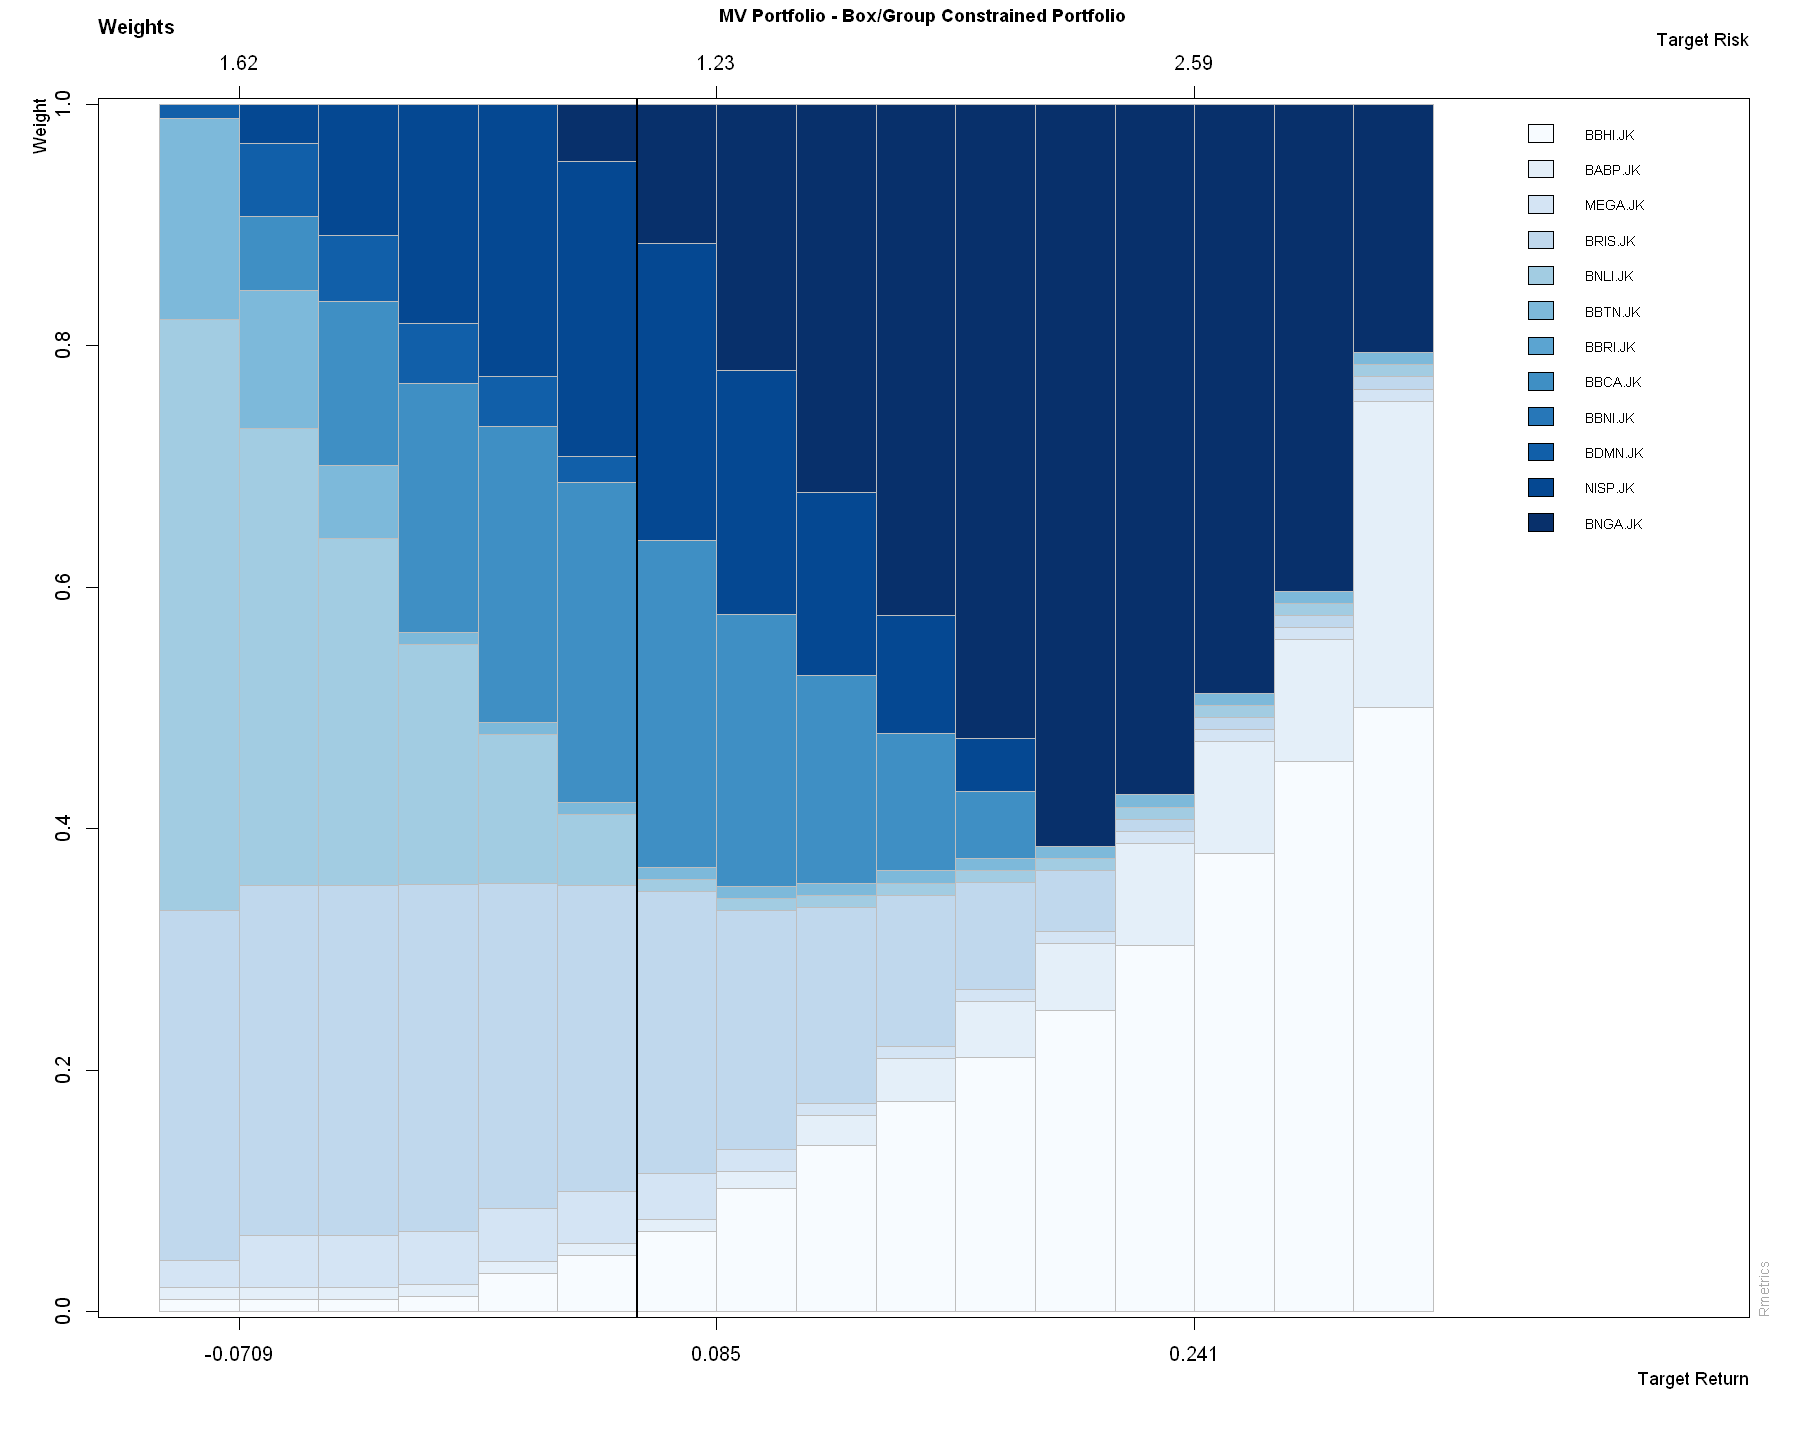

In [91]:
weightsPlot(boxgroupFrontier)
text <- "MV Portfolio - Box/Group Constrained Portfolio"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)

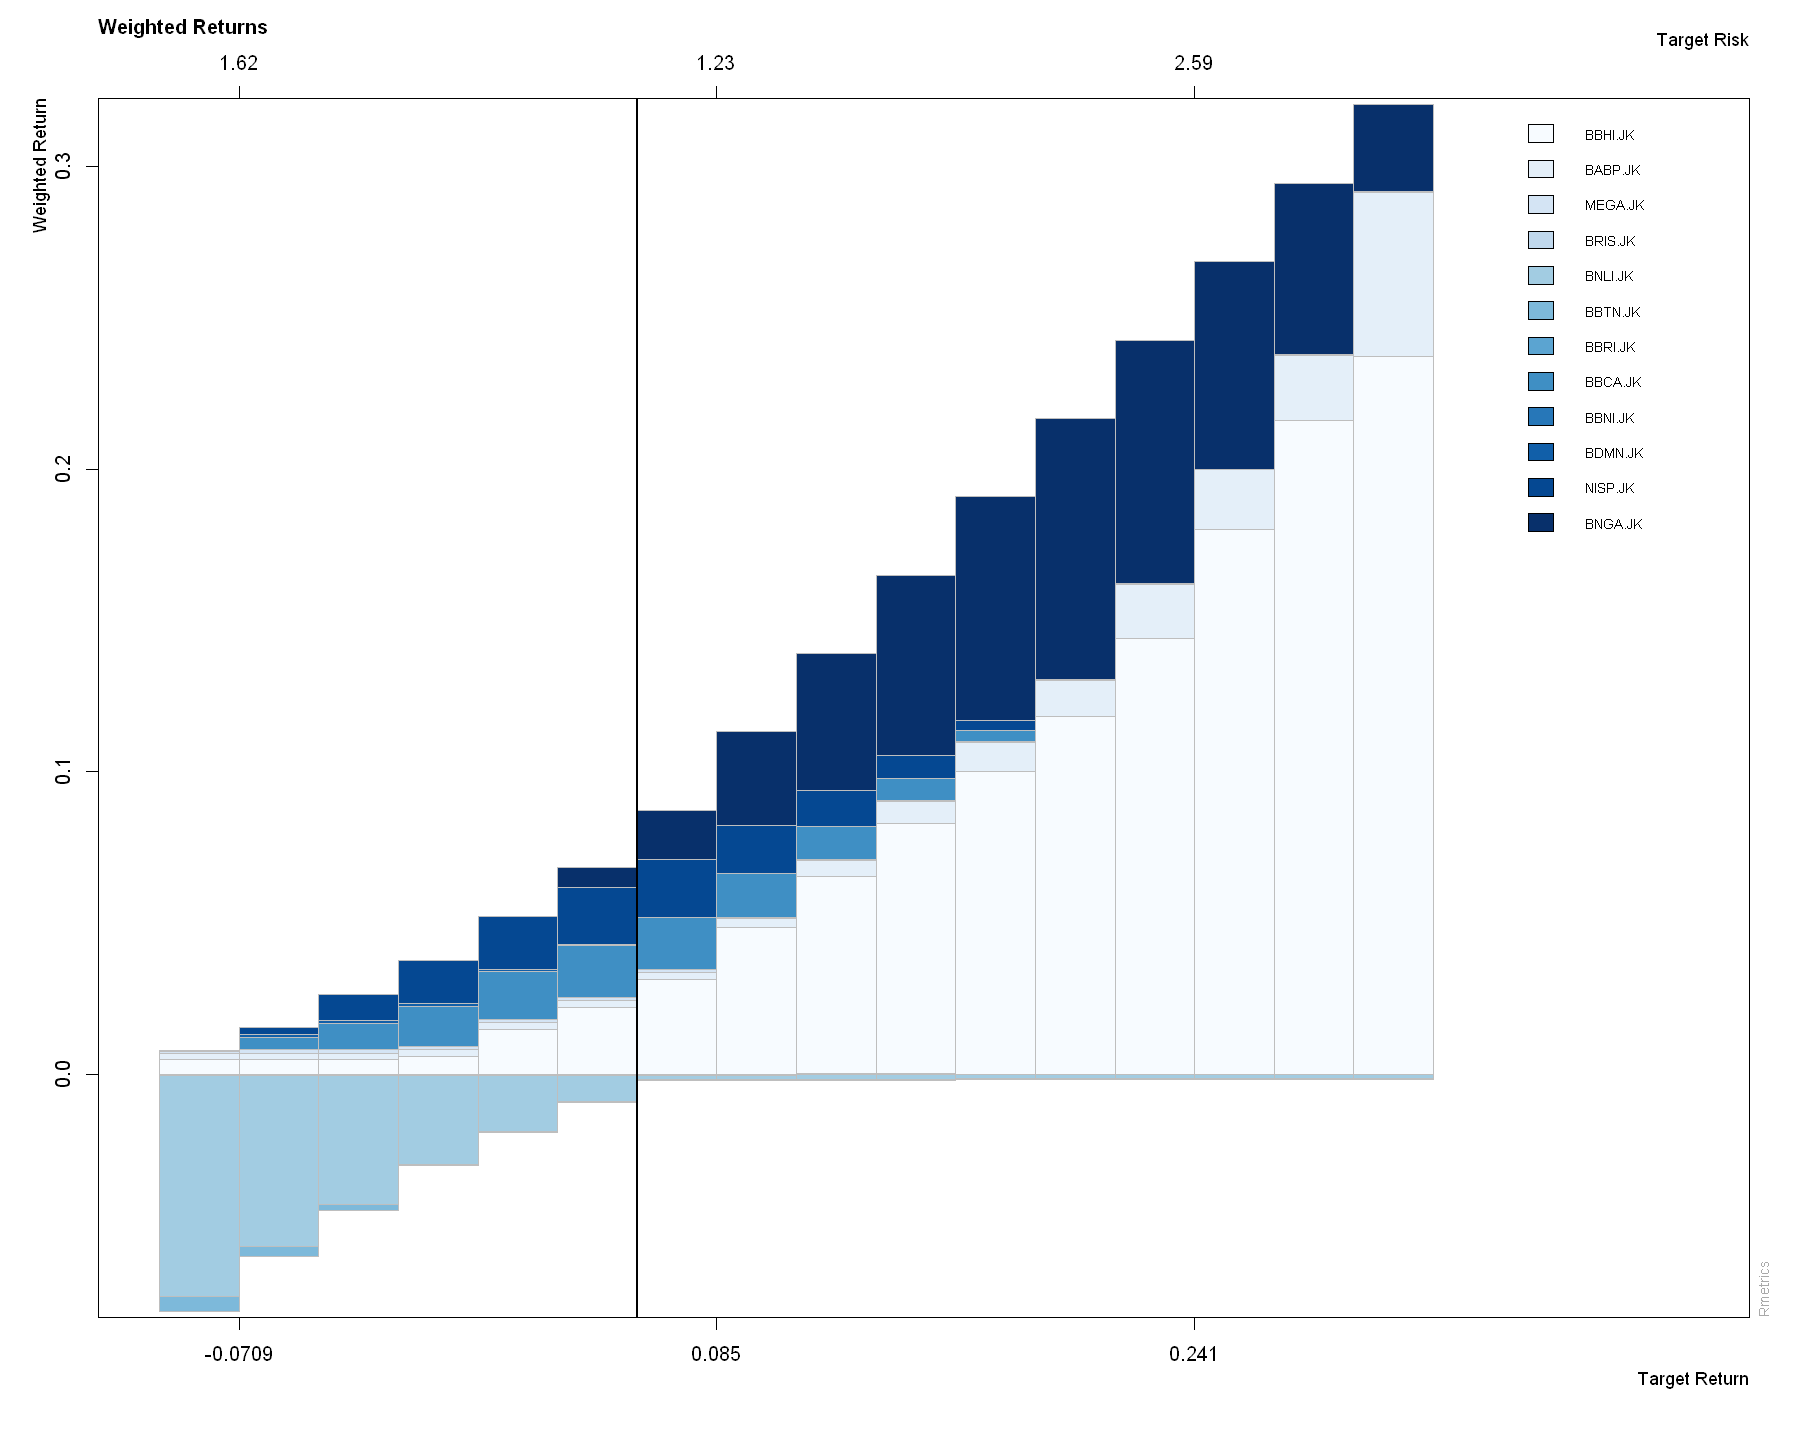

In [92]:
weightedReturnsPlot(boxgroupFrontier)

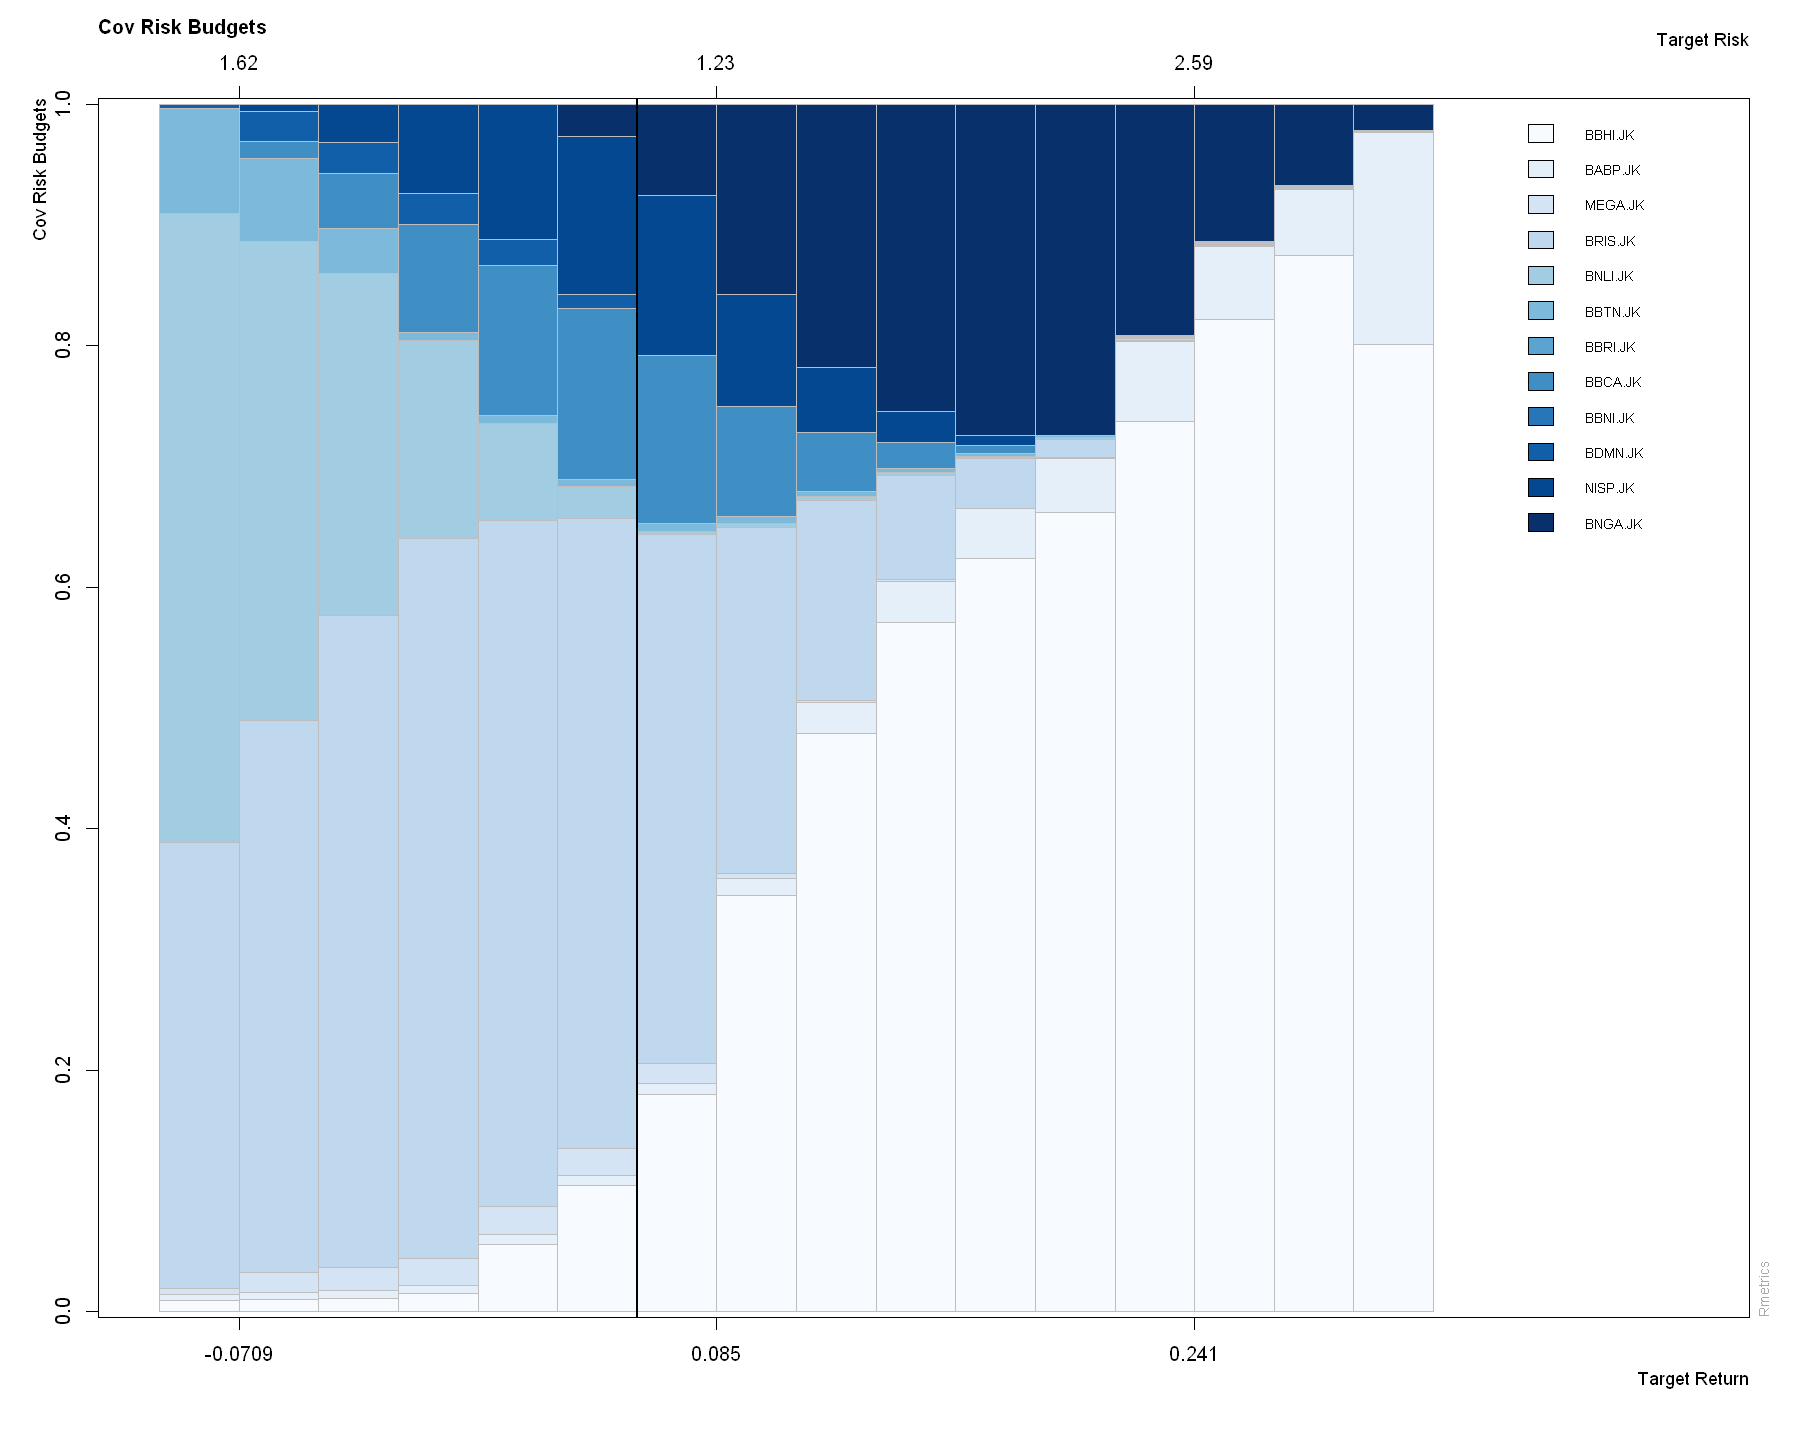

In [93]:
covRiskBudgetsPlot(boxgroupFrontier)

### 5.7 CREATING DIFFERENT ‘REWARD/RISK VIEWS’ ON THE EFFICIENT FRONTIER

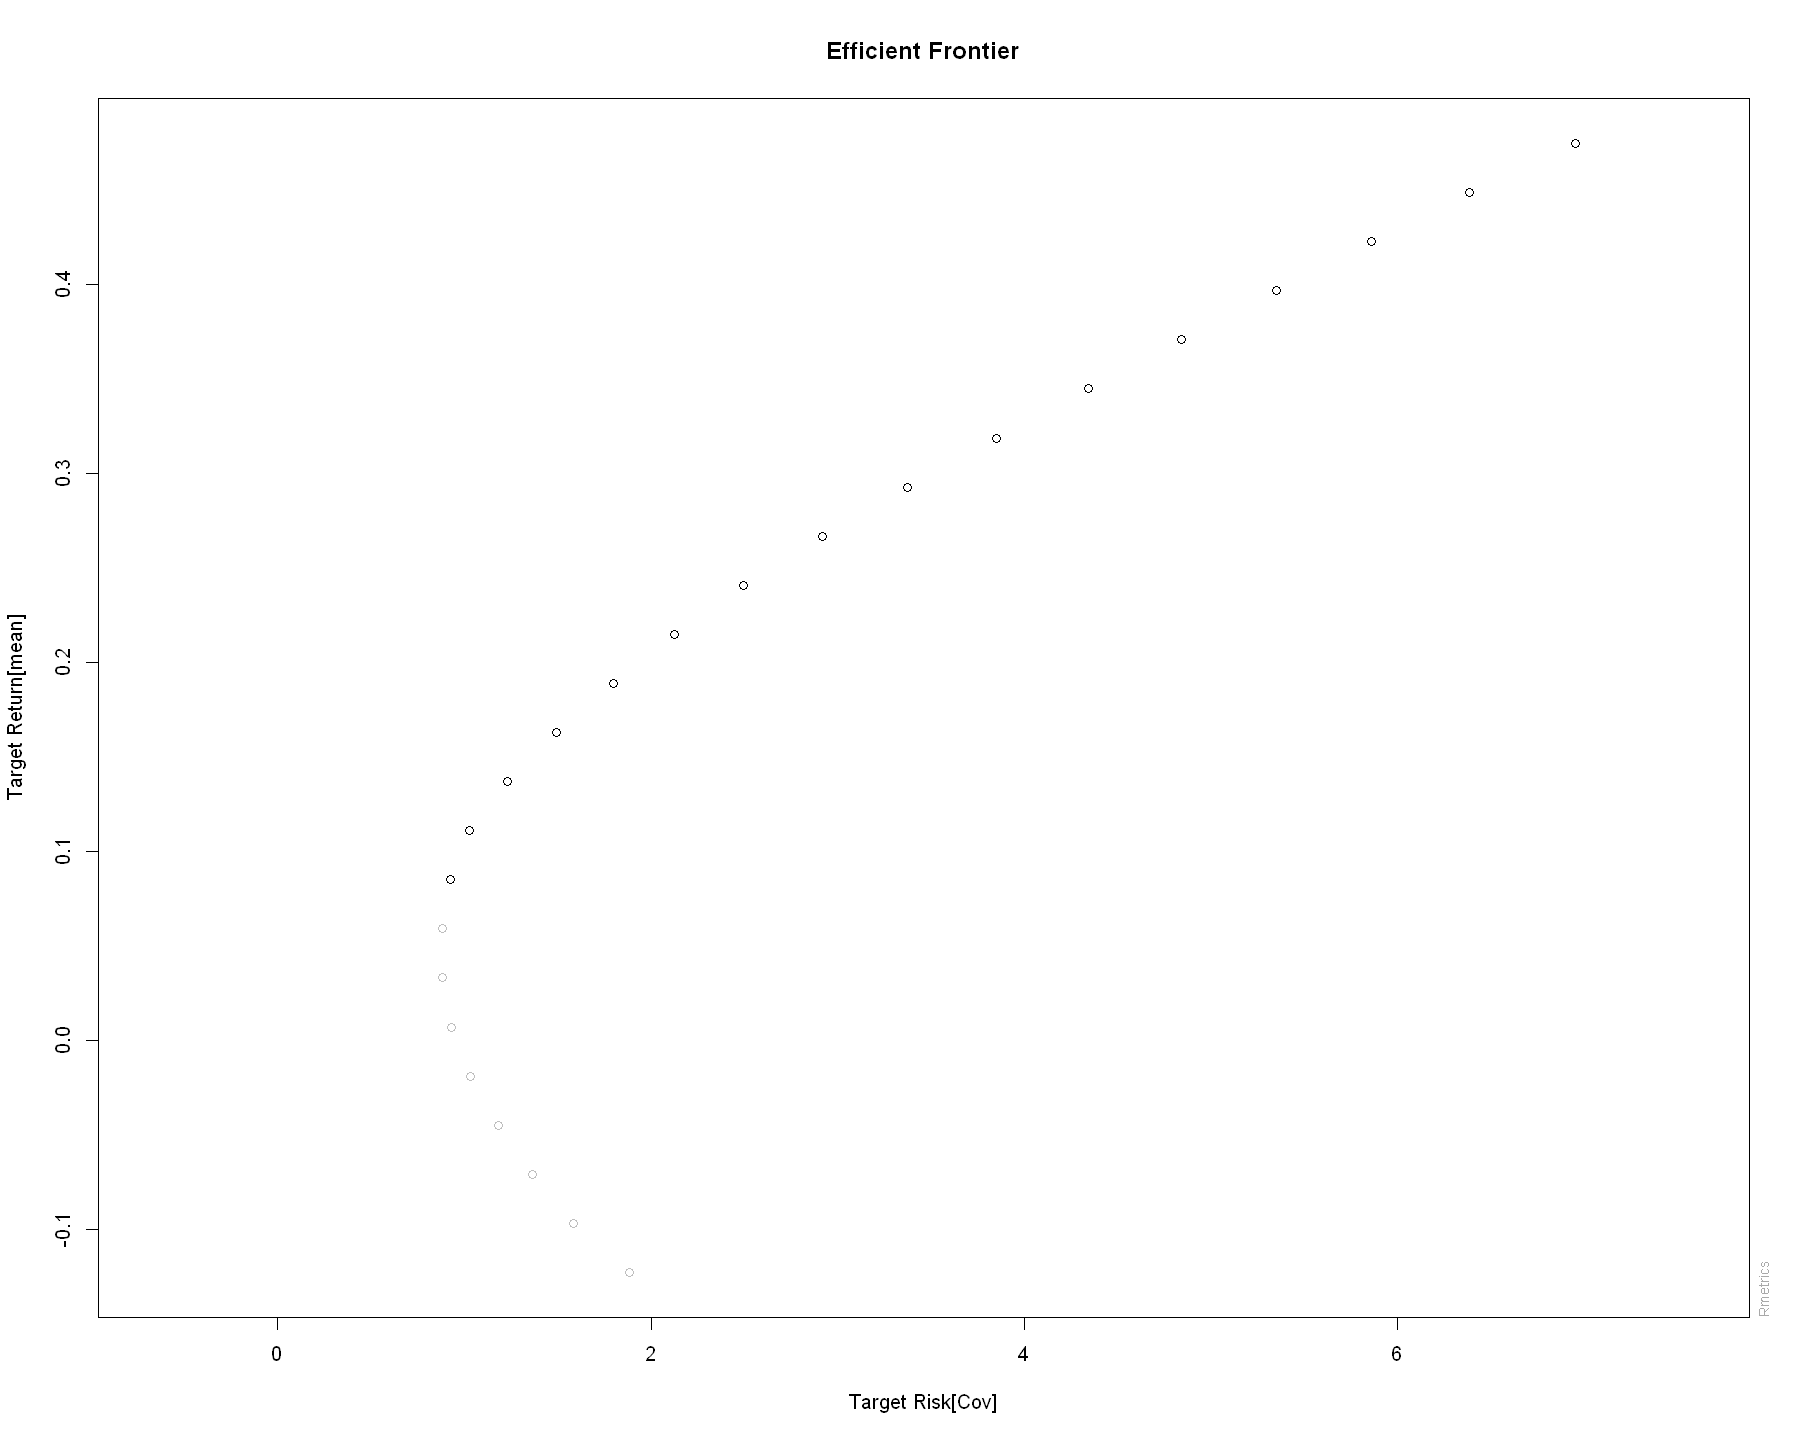

In [94]:
frontierPlot(longFrontier, auto = TRUE)

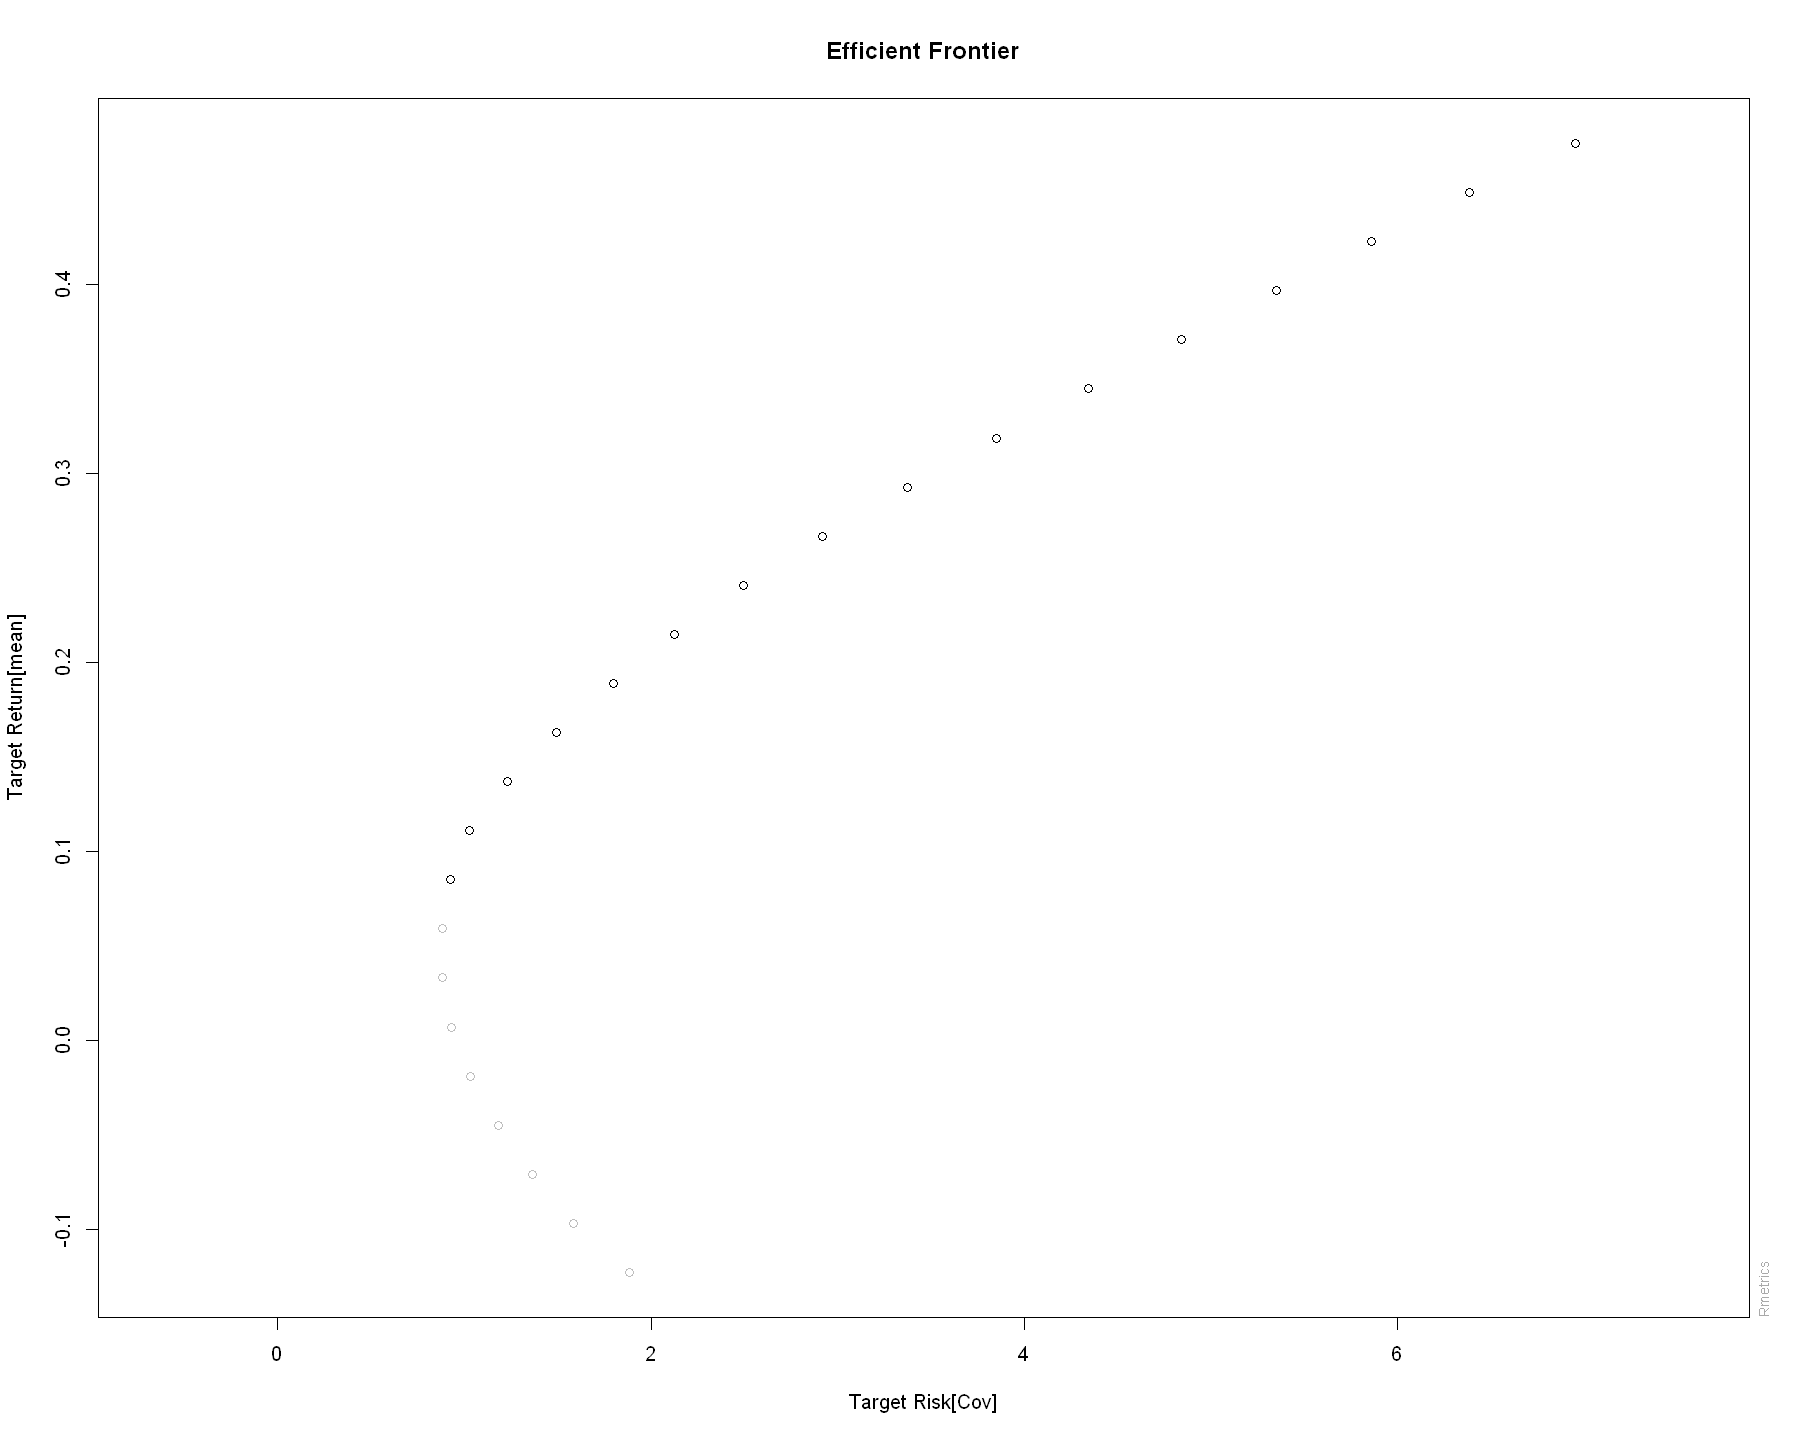

In [95]:
frontierPlot(longFrontier, return = "mean", 
             risk = "Cov", auto = FALSE)

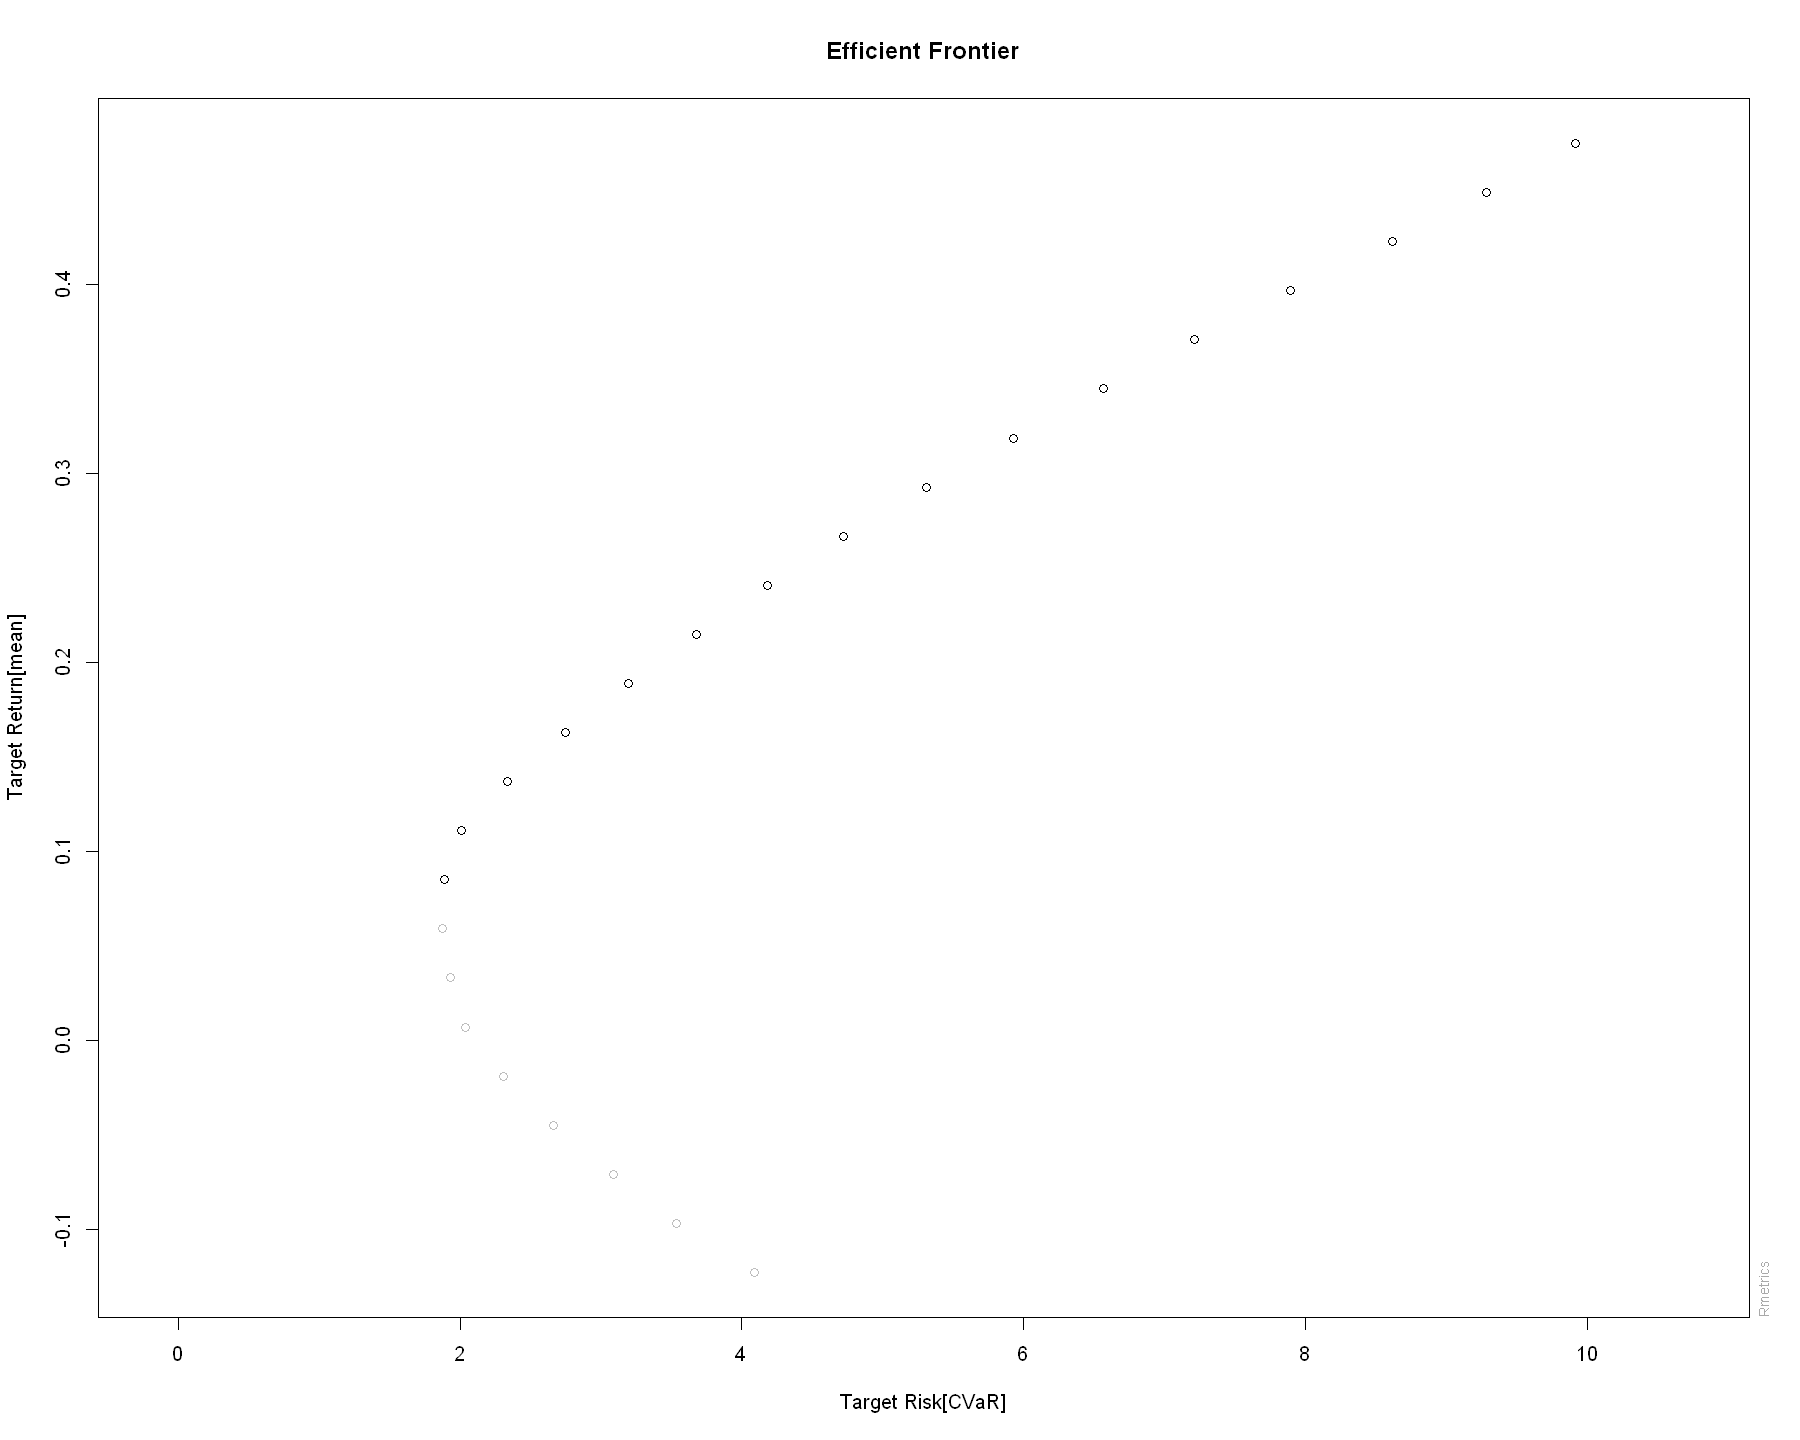

In [96]:
frontierPlot(longFrontier, return = "mean", risk = "CVaR",auto = FALSE)

Warning message in plot.window(...):
""uto" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""uto" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""uto" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""uto" is not a graphical parameter"
Warning message in box(...):
""uto" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""uto" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""uto" is not a graphical parameter"


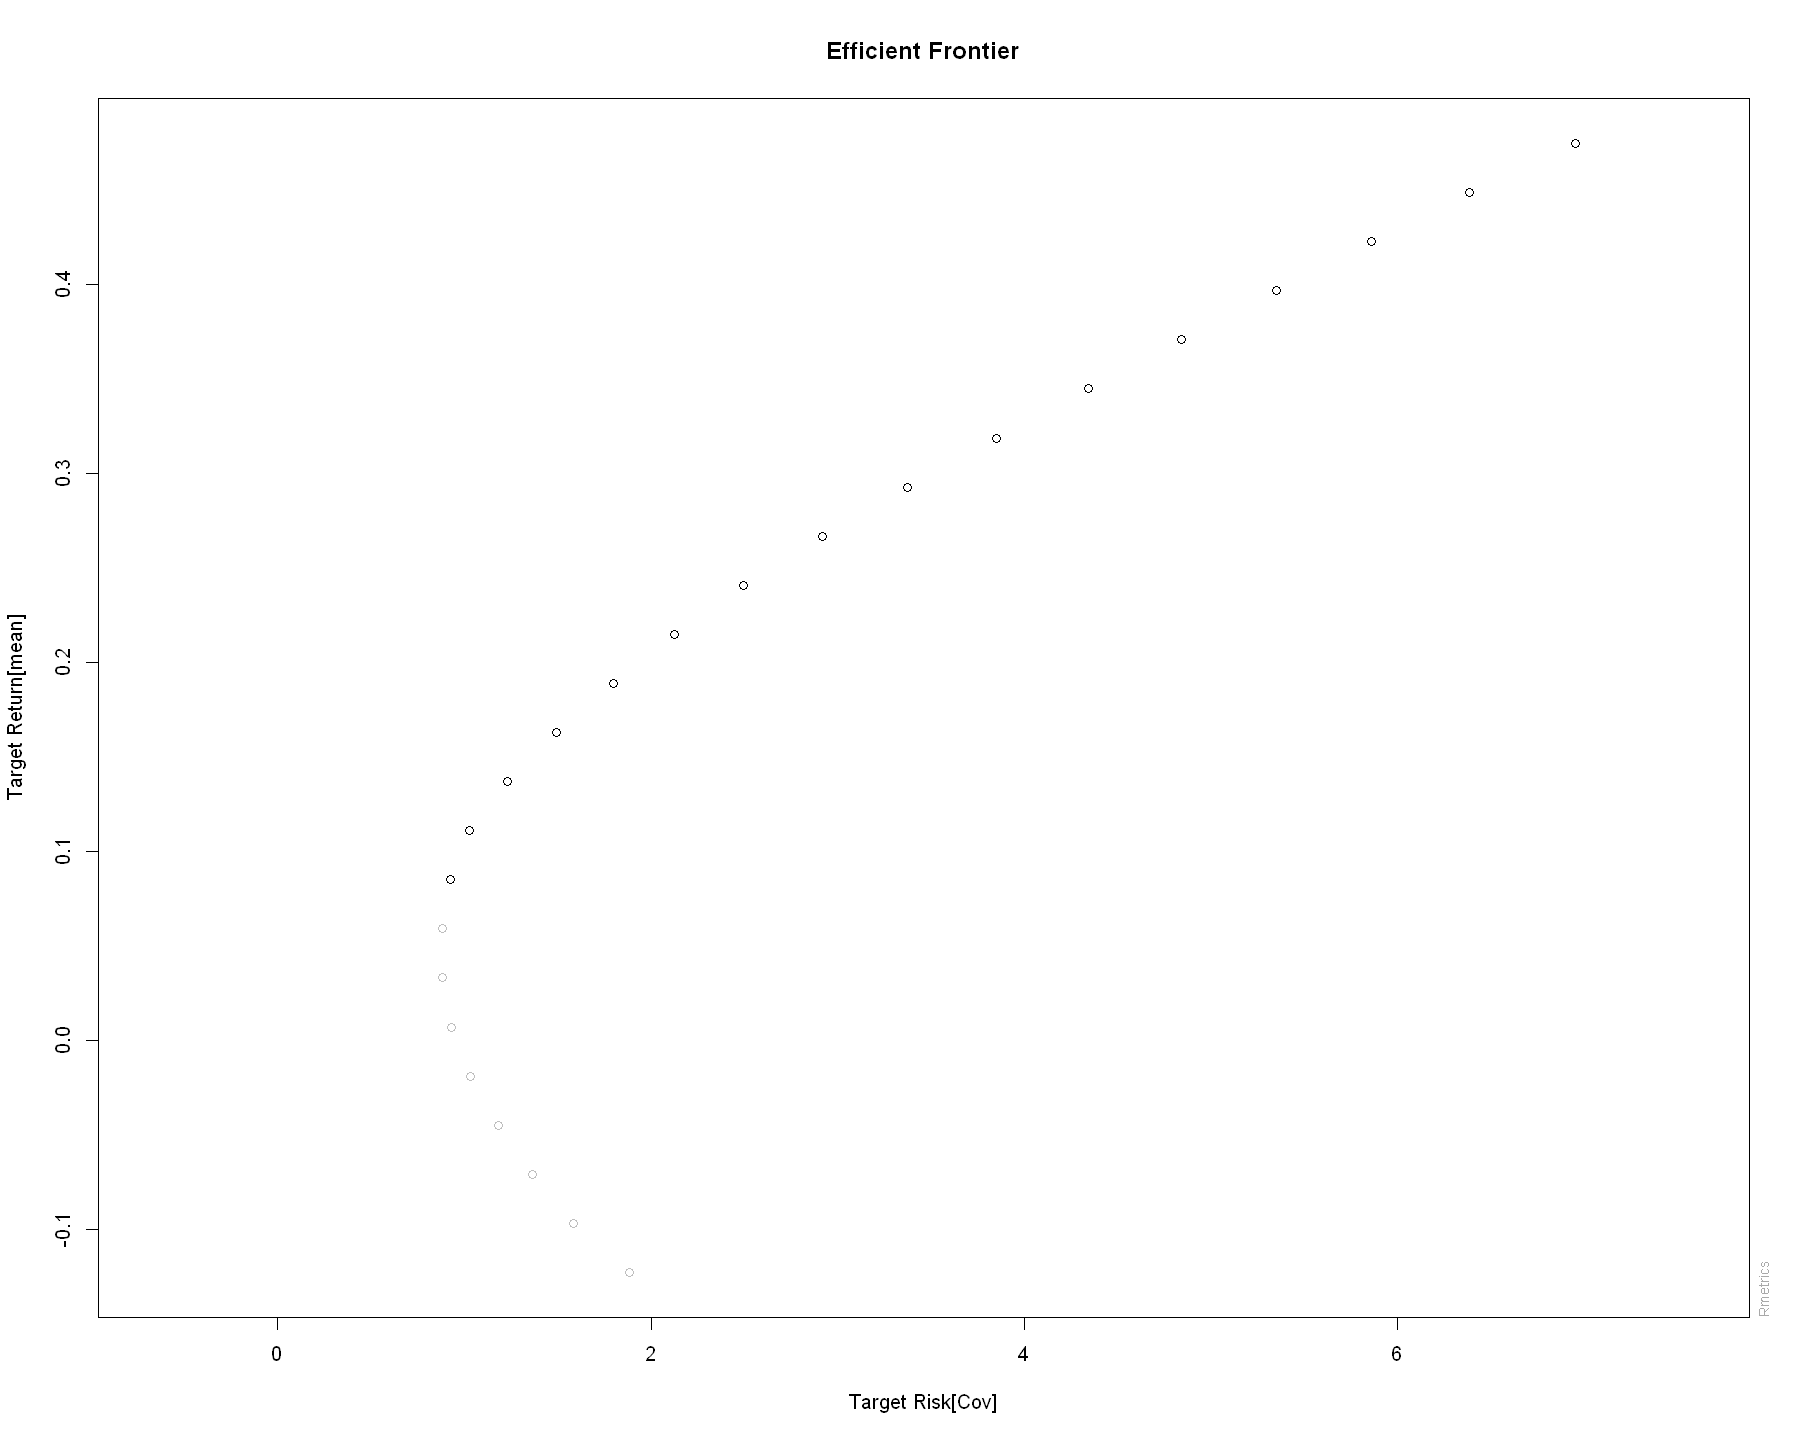

In [97]:
frontierPlot(longFrontier, return = "mean", risk = "VaR",uto = FALSE)

## 6. ROBUST PORTFOLIOS AND COVARIANCE ESTIMATION

## 6.1  ROBUST MEAN AND COVARIANCE ESTIMATORS

In [98]:
getEstimator(portfolioSpec())

[1] "covEstimator"

## 6.2 THE MCD ROBUSTIFIED MEAN-VARIANCE PORTFOLIO

In [99]:
covMcdEstimate <- covMcdEstimator(ts_returns)
fastCovMcdEstimator <- function(x, spec = NULL, ...) covMcdEstimate

In [100]:
covMcdSpec <- portfolioSpec()
setEstimator(covMcdSpec) <- "fastCovMcdEstimator"
setNFrontierPoints(covMcdSpec) <- 5

In [101]:
covMcdFrontier <- portfolioFrontier(data = ts_returns, spec = covMcdSpec)
print(covMcdFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         fastCovMcdEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.2441  0.0000  0.2496  0.0000  0.0663  0.1089  0.0354
2  0.1548  0.0545  0.1492  0.0000  0.0000  0.0000  0.0419  0.0564  0.0415
3  0.5062  0.1262  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0742  0.1496  0.0720
2  0.0000  0.1063  0.3954
3  0.0000  0.0000  0.3677
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.4845  0.0000  0.2911  0.0000  0.0298  0.0476  0.0169
2  0.5289  0.0704  0.0894  0.0000  0.0000  0.0000  0.0115  0.0110  0.0136
3  0.8848  0.0653  0.0000  0.0000  0

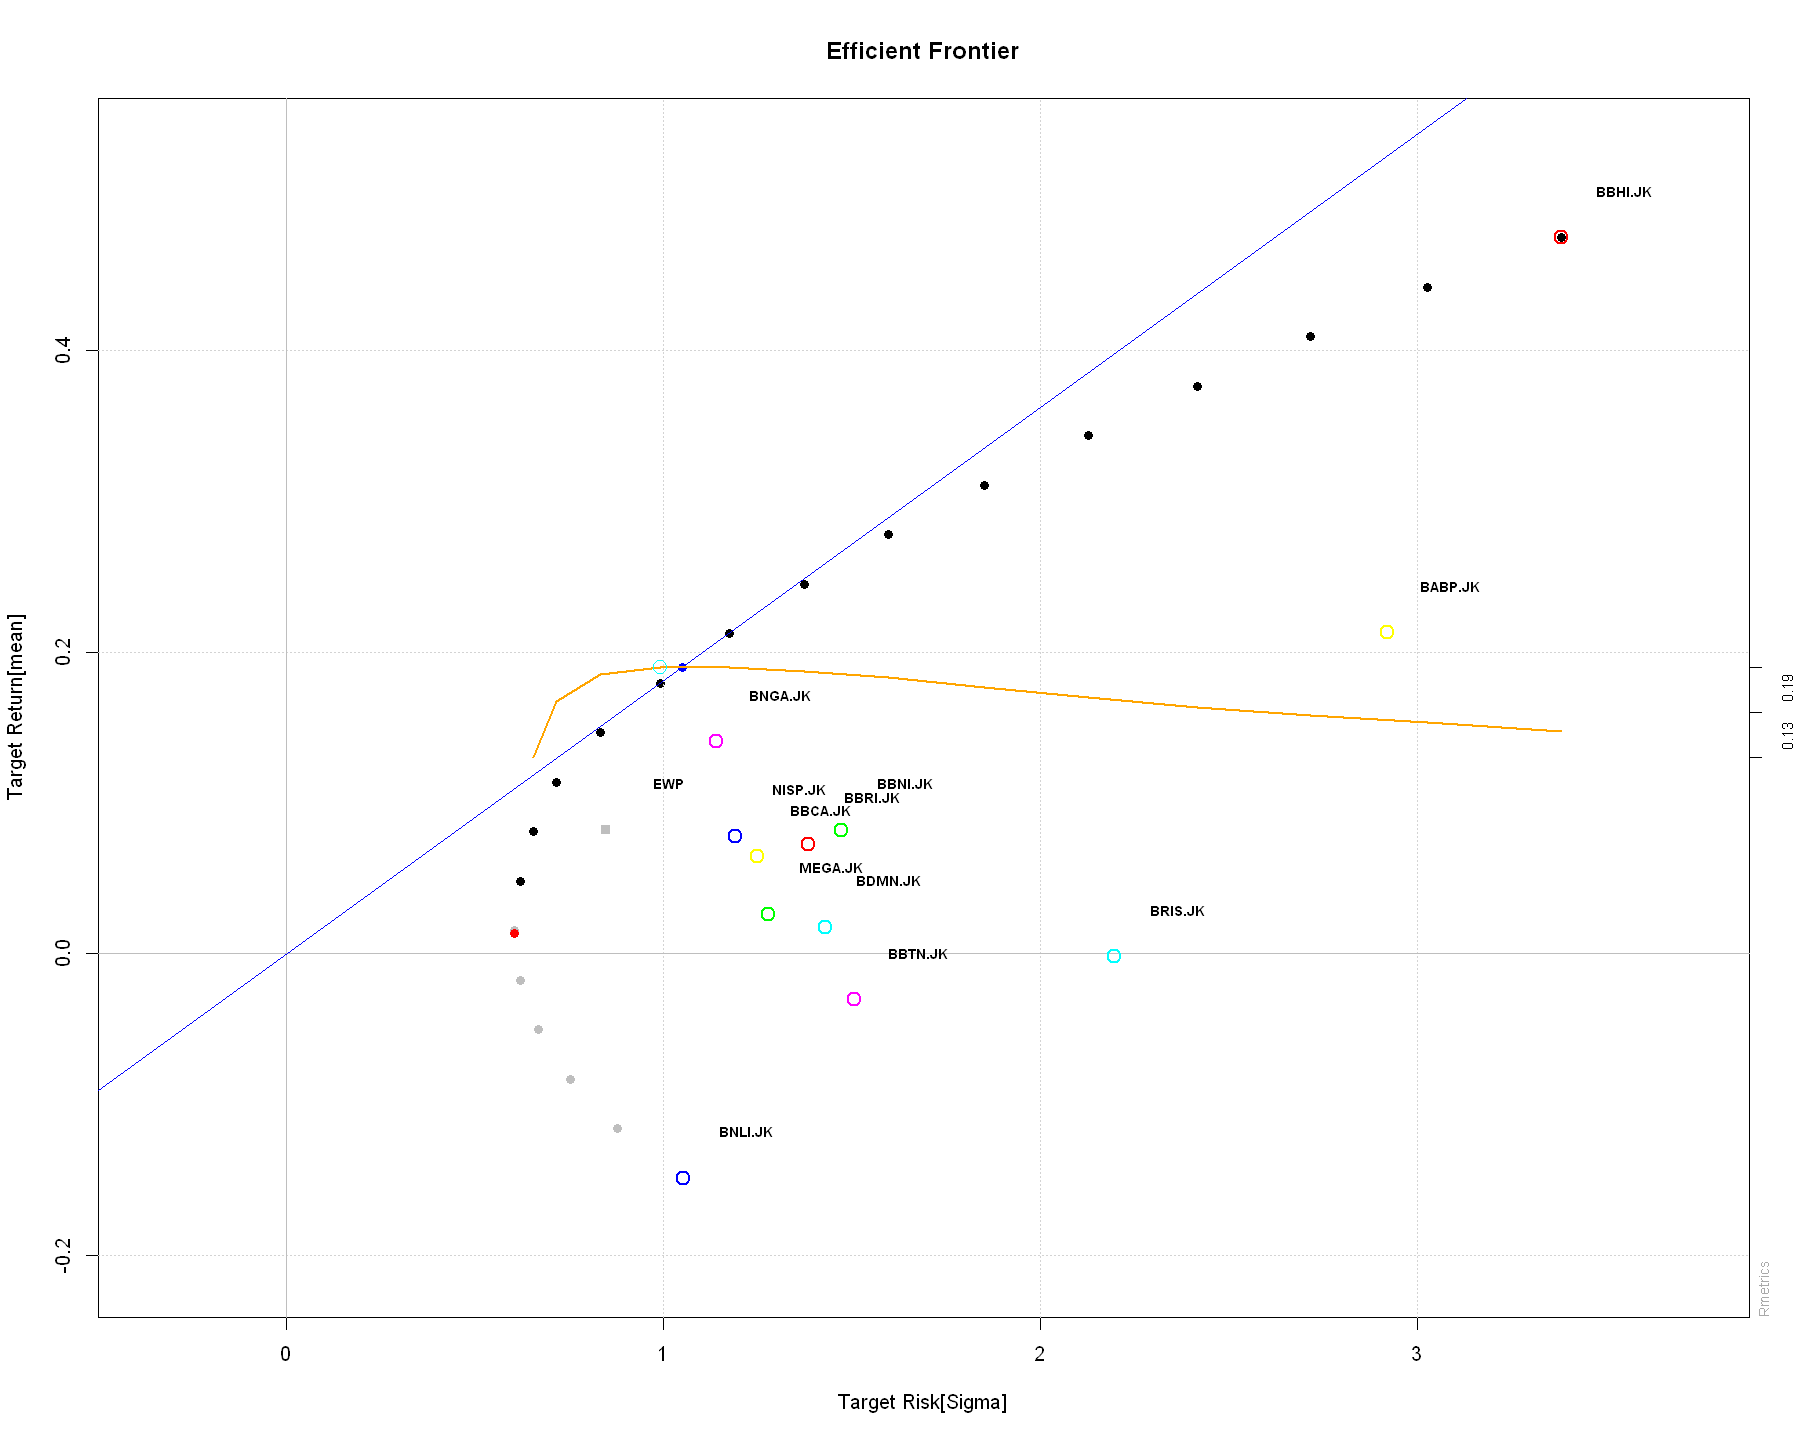

In [102]:
setNFrontierPoints(covMcdSpec) <- 20
covMcdFrontier <- portfolioFrontier(data = ts_returns, spec = covMcdSpec)
tailoredFrontierPlot(covMcdFrontier,mText = "MCD Robustified MV Portfolio",risk = "Sigma")

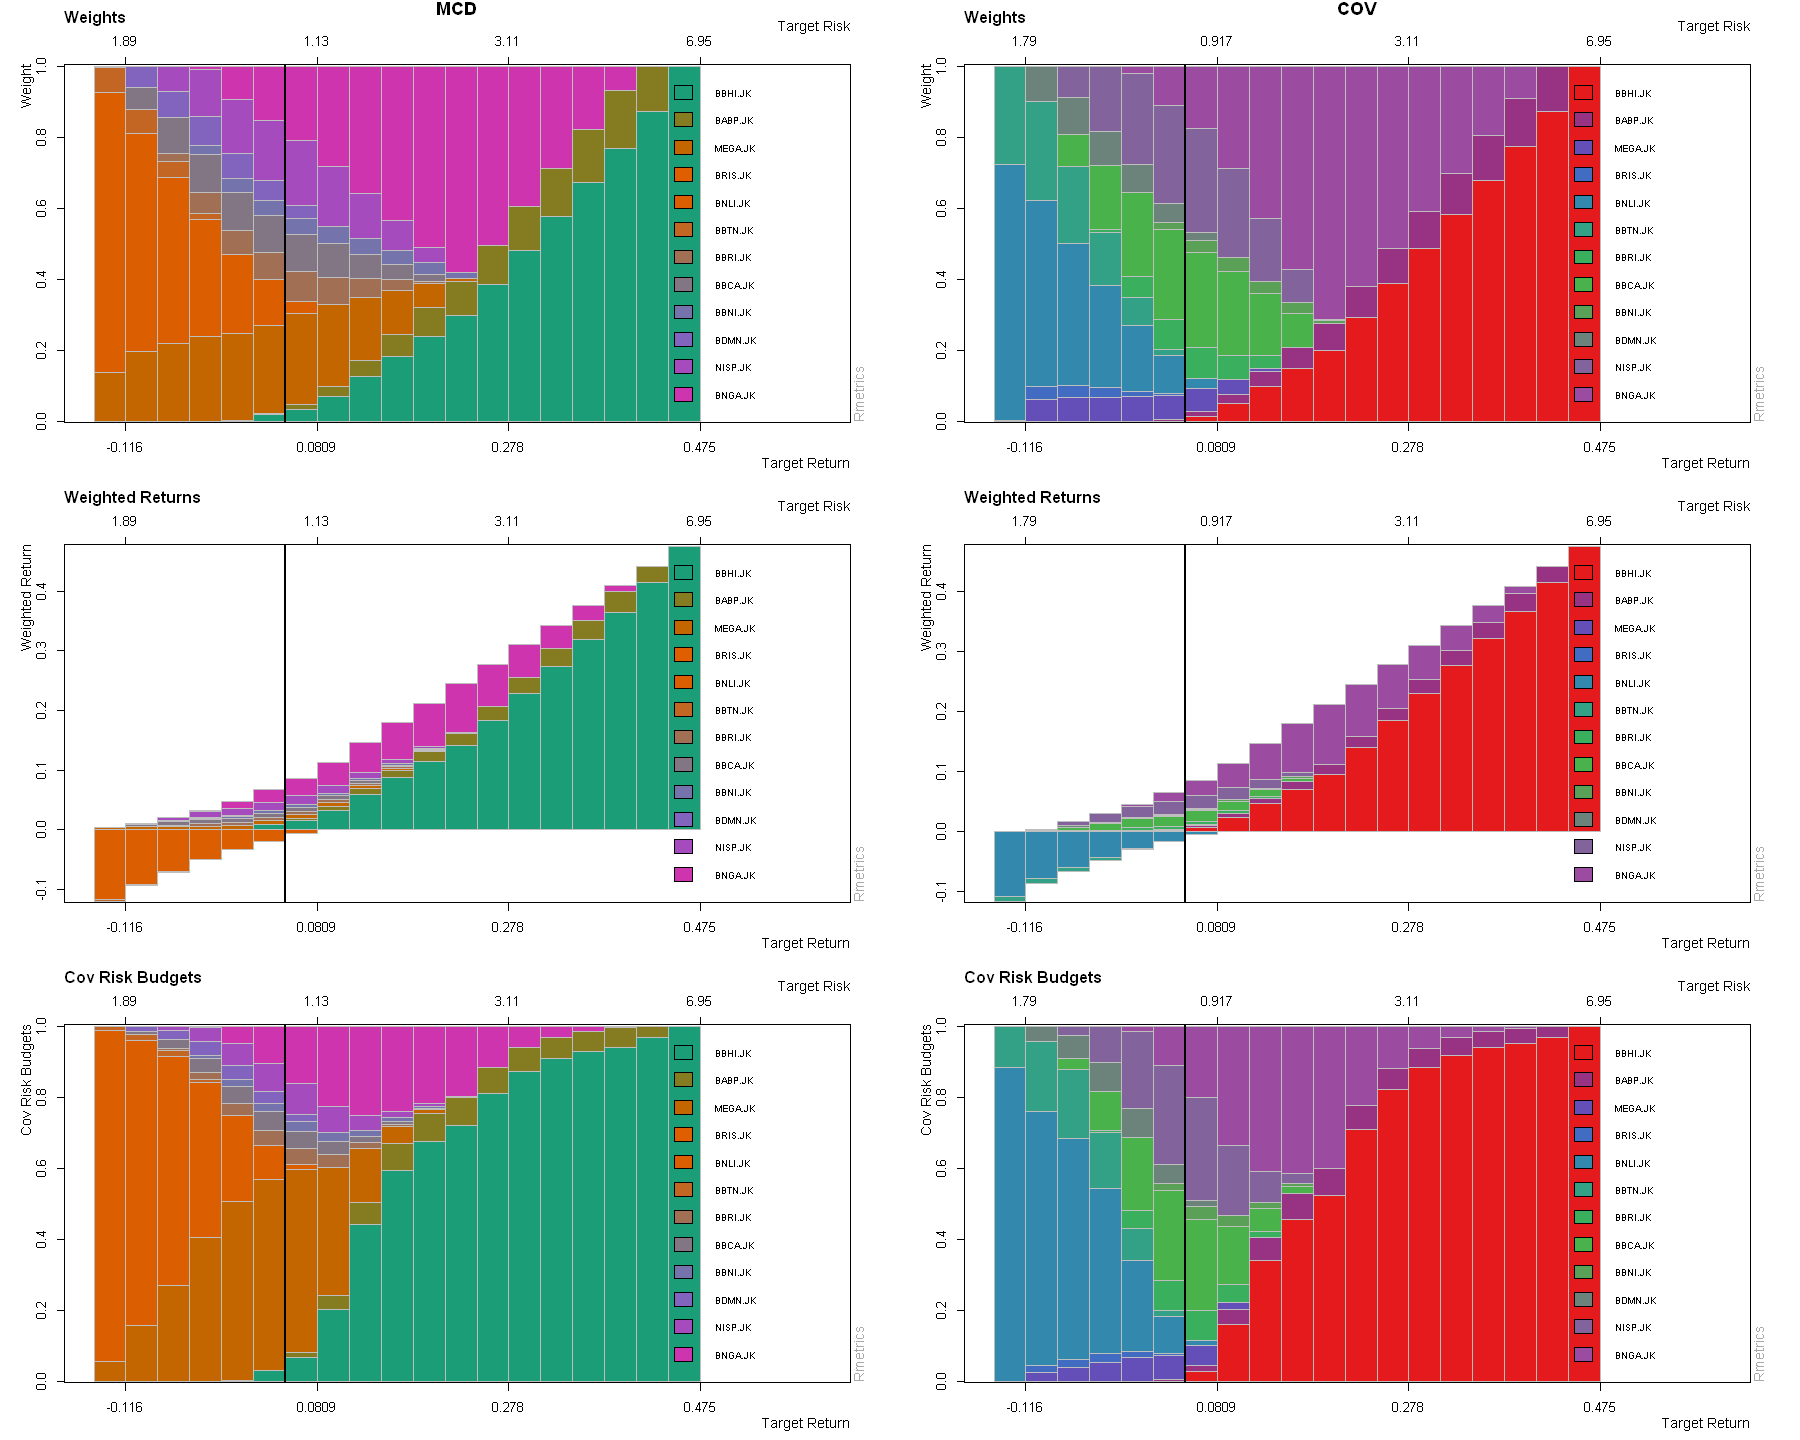

In [103]:
 ## MCD robustified portfolio
par(mfcol = c(3, 2), mar = c(3.5, 4, 4, 3) + 0.1)
col = qualiPalette(30, "Dark2")
weightsPlot(covMcdFrontier, col = col)
text <- "MCD"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(covMcdFrontier, col = col)
covRiskBudgetsPlot(covMcdFrontier, col = col)
## Sample covariance MV portfolio
longSpec <- portfolioSpec()
setNFrontierPoints(longSpec) <- 20
longFrontier <- portfolioFrontier(data = ts_returns, spec = longSpec)
col = qualiPalette(30, "Set1")
weightsPlot(longFrontier, col = col)
text <- "COV"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(longFrontier, col = col)
covRiskBudgetsPlot(longFrontier, col = col)

## 6.3 THE MVE ROBUSTIFIED MEAN-VARIANCE PORTFOLIO

In [104]:
mveEstimate <- mveEstimator(ts_returns)
fastMveEstimator <- function(x, spec = NULL, ...) mveEstimate

In [105]:
mveSpec <- portfolioSpec()
setEstimator(mveSpec) <- "fastMveEstimator"
setNFrontierPoints(mveSpec) <- 5

In [106]:
mveFrontier <- portfolioFrontier(data = ts_returns,spec = mveSpec,constraints = "LongOnly")
print(mveFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         fastMveEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.2550  0.0000  0.2252  0.0289  0.0520  0.1147  0.0131
2  0.1318  0.0644  0.1010  0.0000  0.0000  0.0000  0.0000  0.0941  0.0136
3  0.5002  0.1536  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0849  0.1715  0.0546
2  0.0000  0.1088  0.4862
3  0.0000  0.0000  0.3461
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.5258  0.0000  0.2397  0.0161  0.0222  0.0496  0.0059
2  0.4338  0.0948  0.0454  0.0000  0.0000  0.0000  0.0000  0.0203  0.0044
3  0.8672  0.0870  0.0000  0.0000  0.00

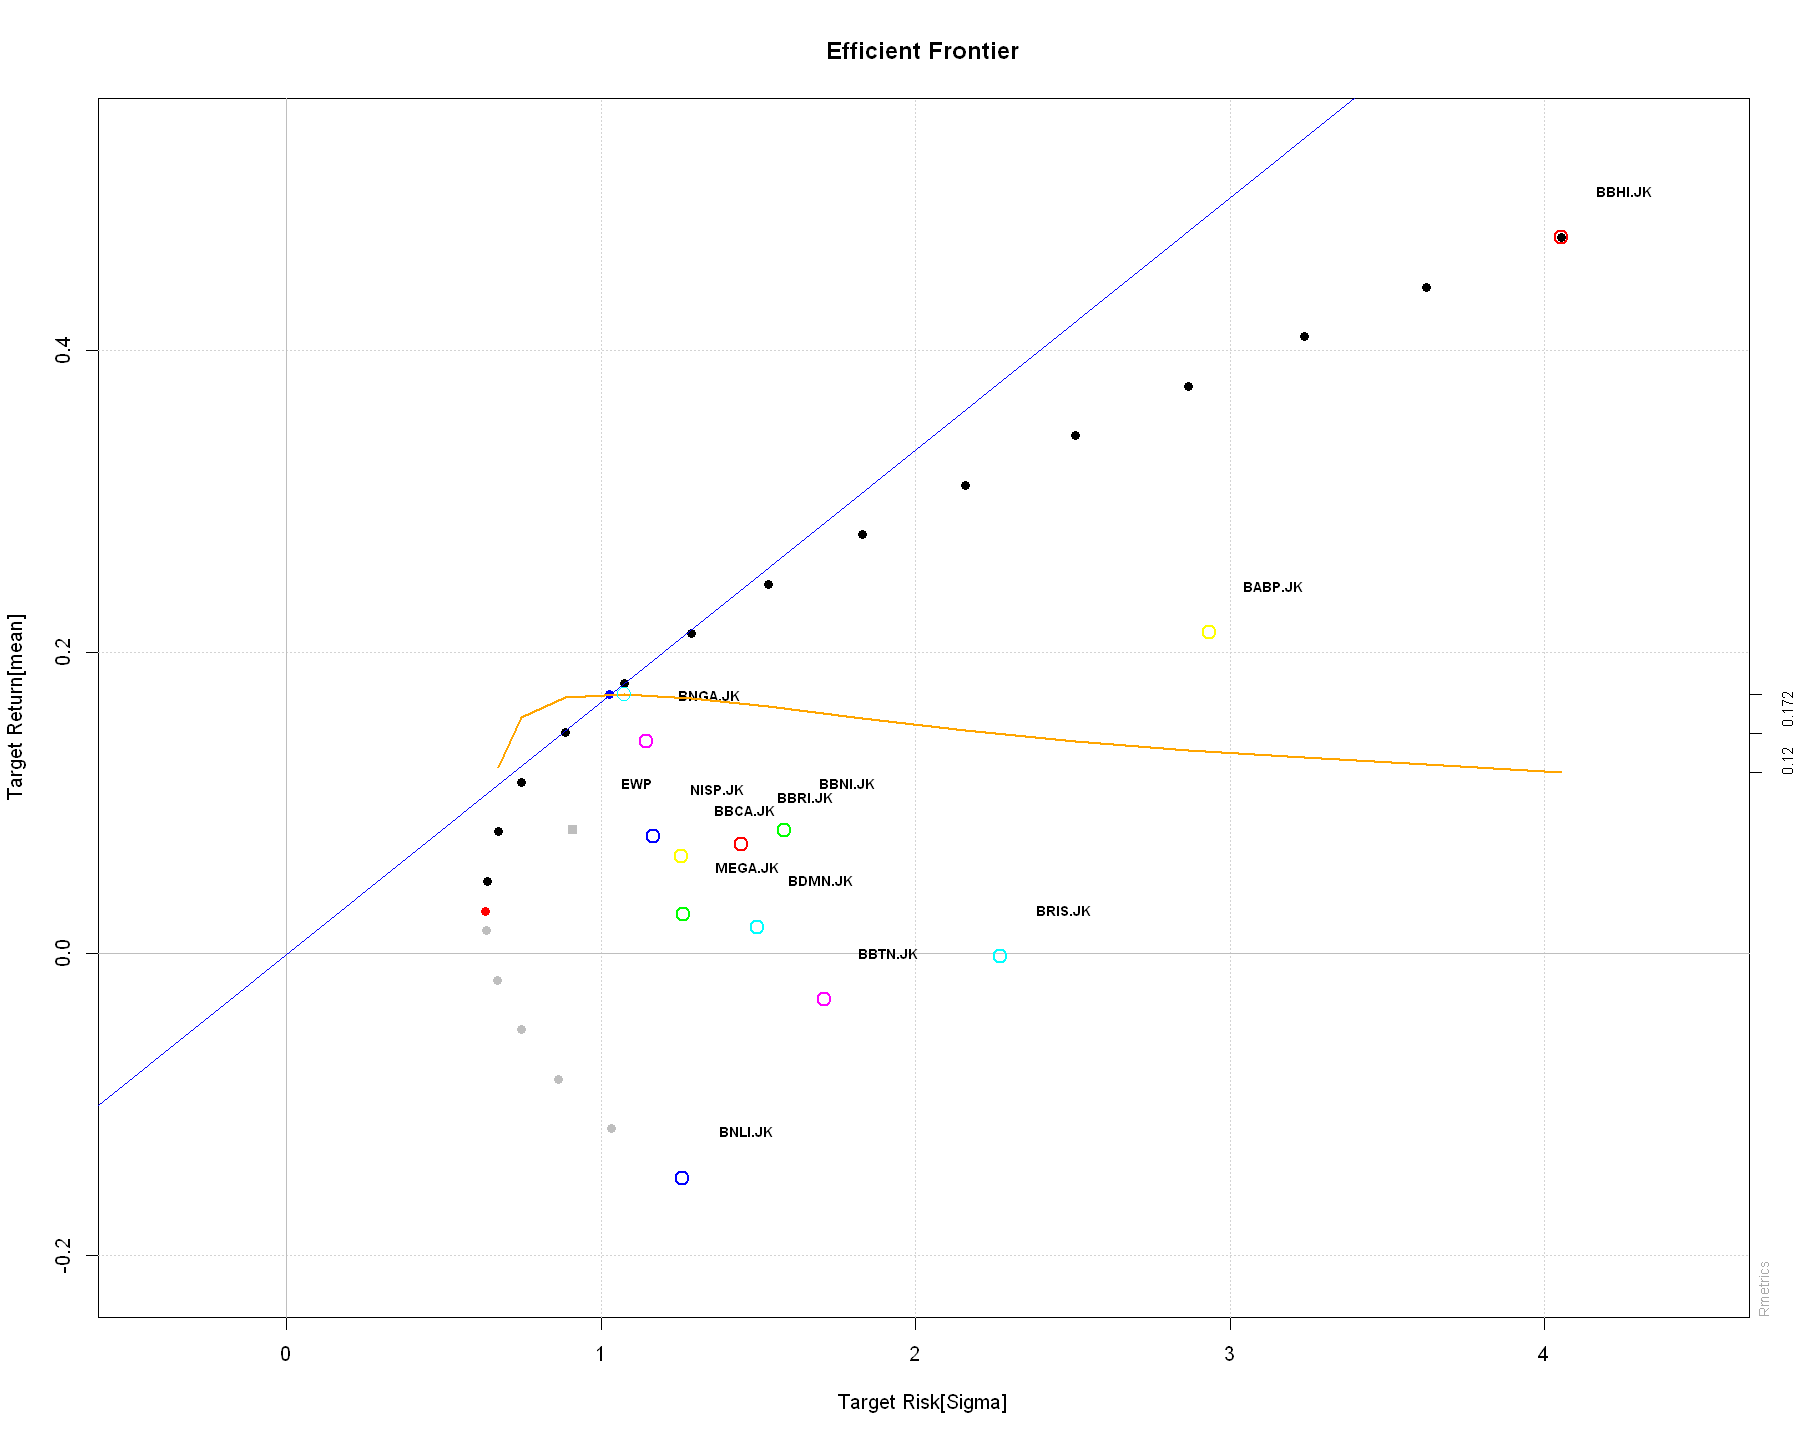

In [107]:
setNFrontierPoints(mveSpec) <- 20
mveFrontier <- portfolioFrontier(data = ts_returns, spec = mveSpec)
tailoredFrontierPlot(mveFrontier,mText = "MVE Robustified MV Portfolio",risk = "Sigma")

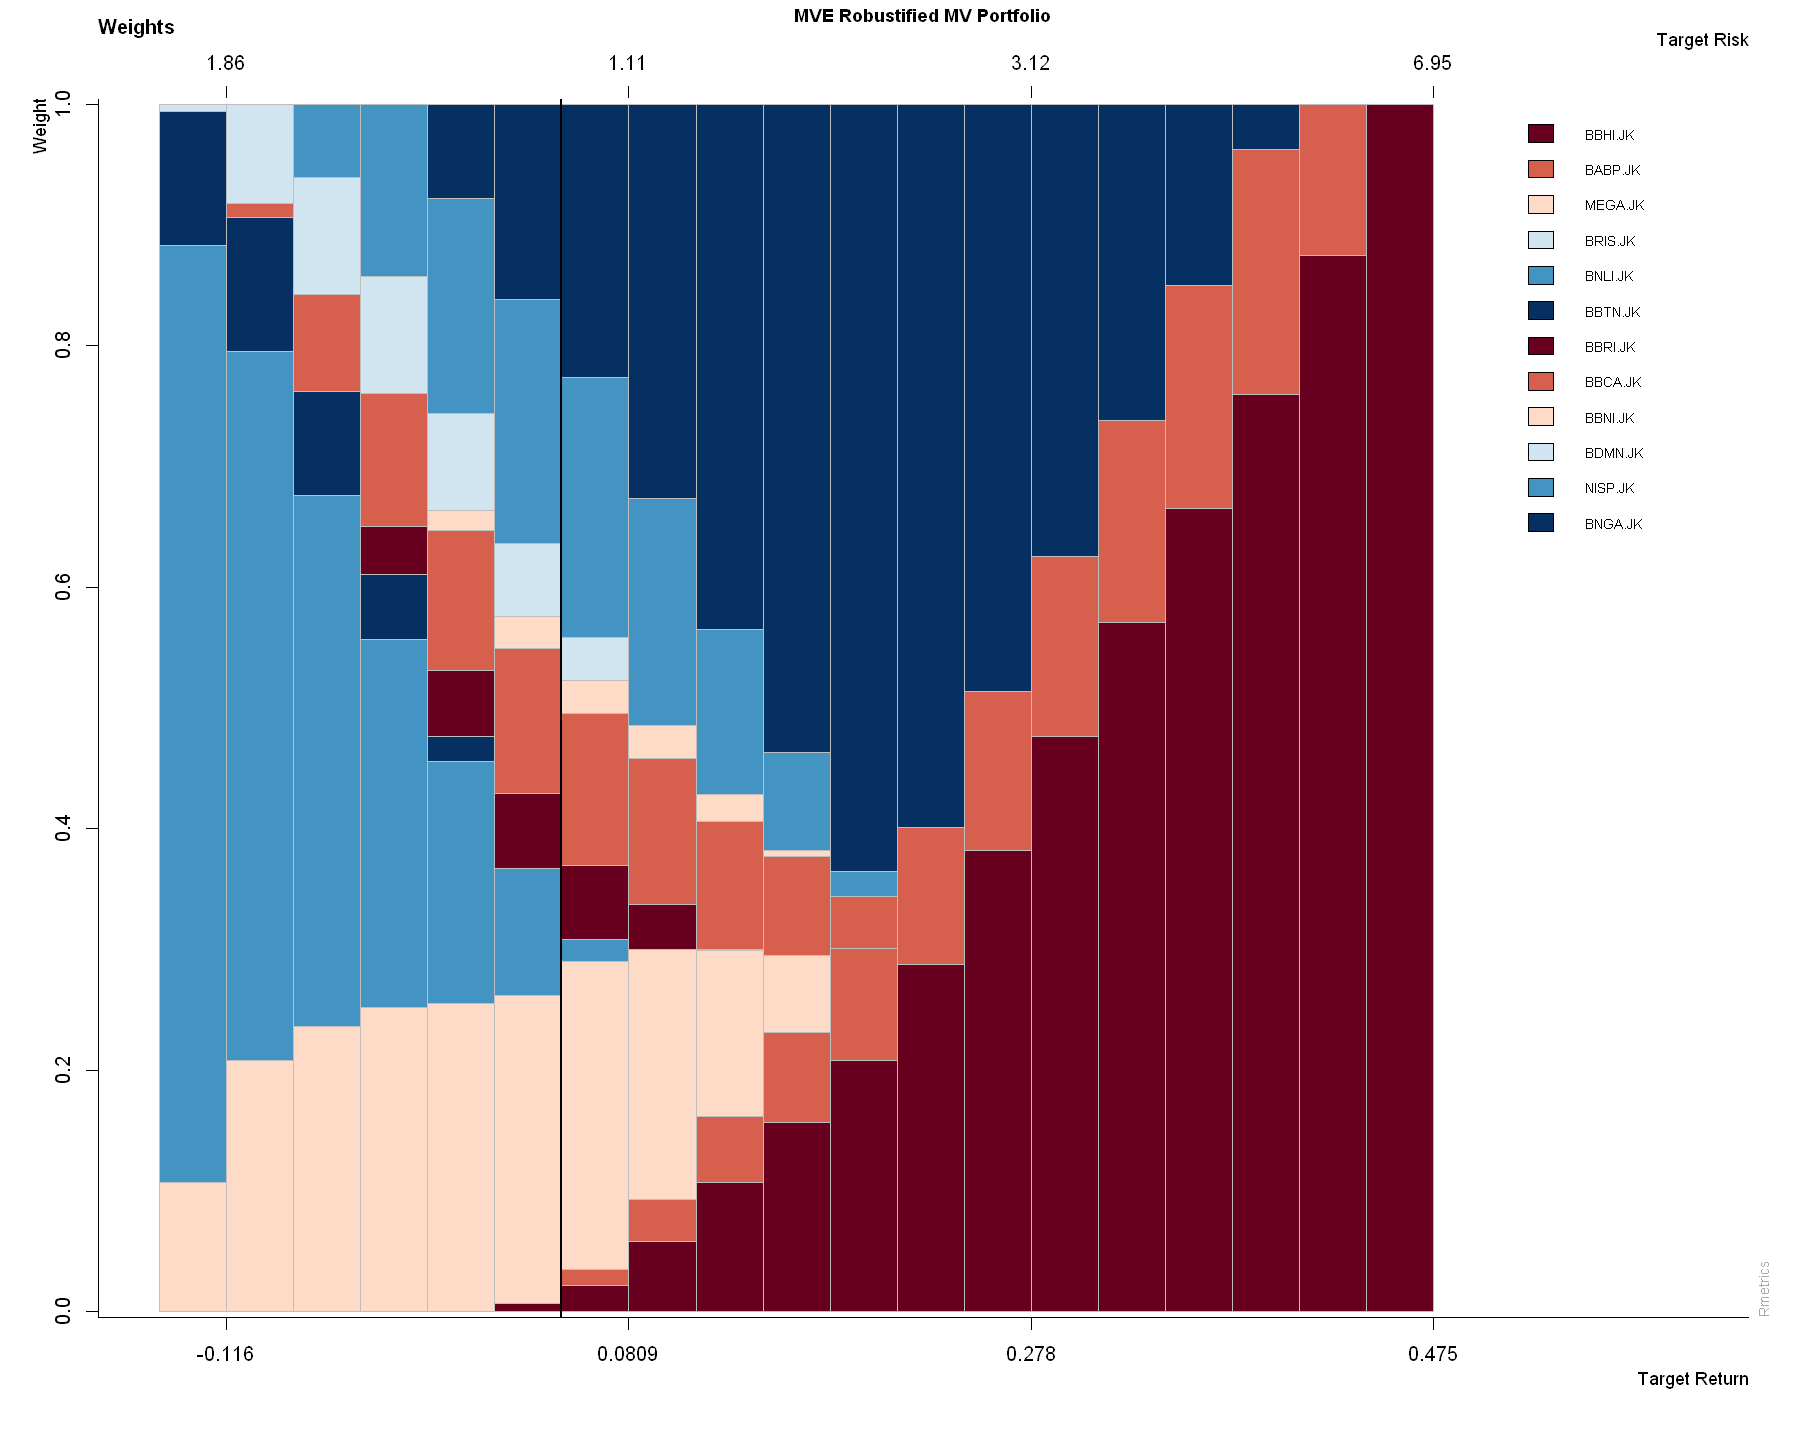

In [108]:
col = divPalette(6, "RdBu")
weightsPlot(mveFrontier, col = col)
boxL()
text <- "MVE Robustified MV Portfolio"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)

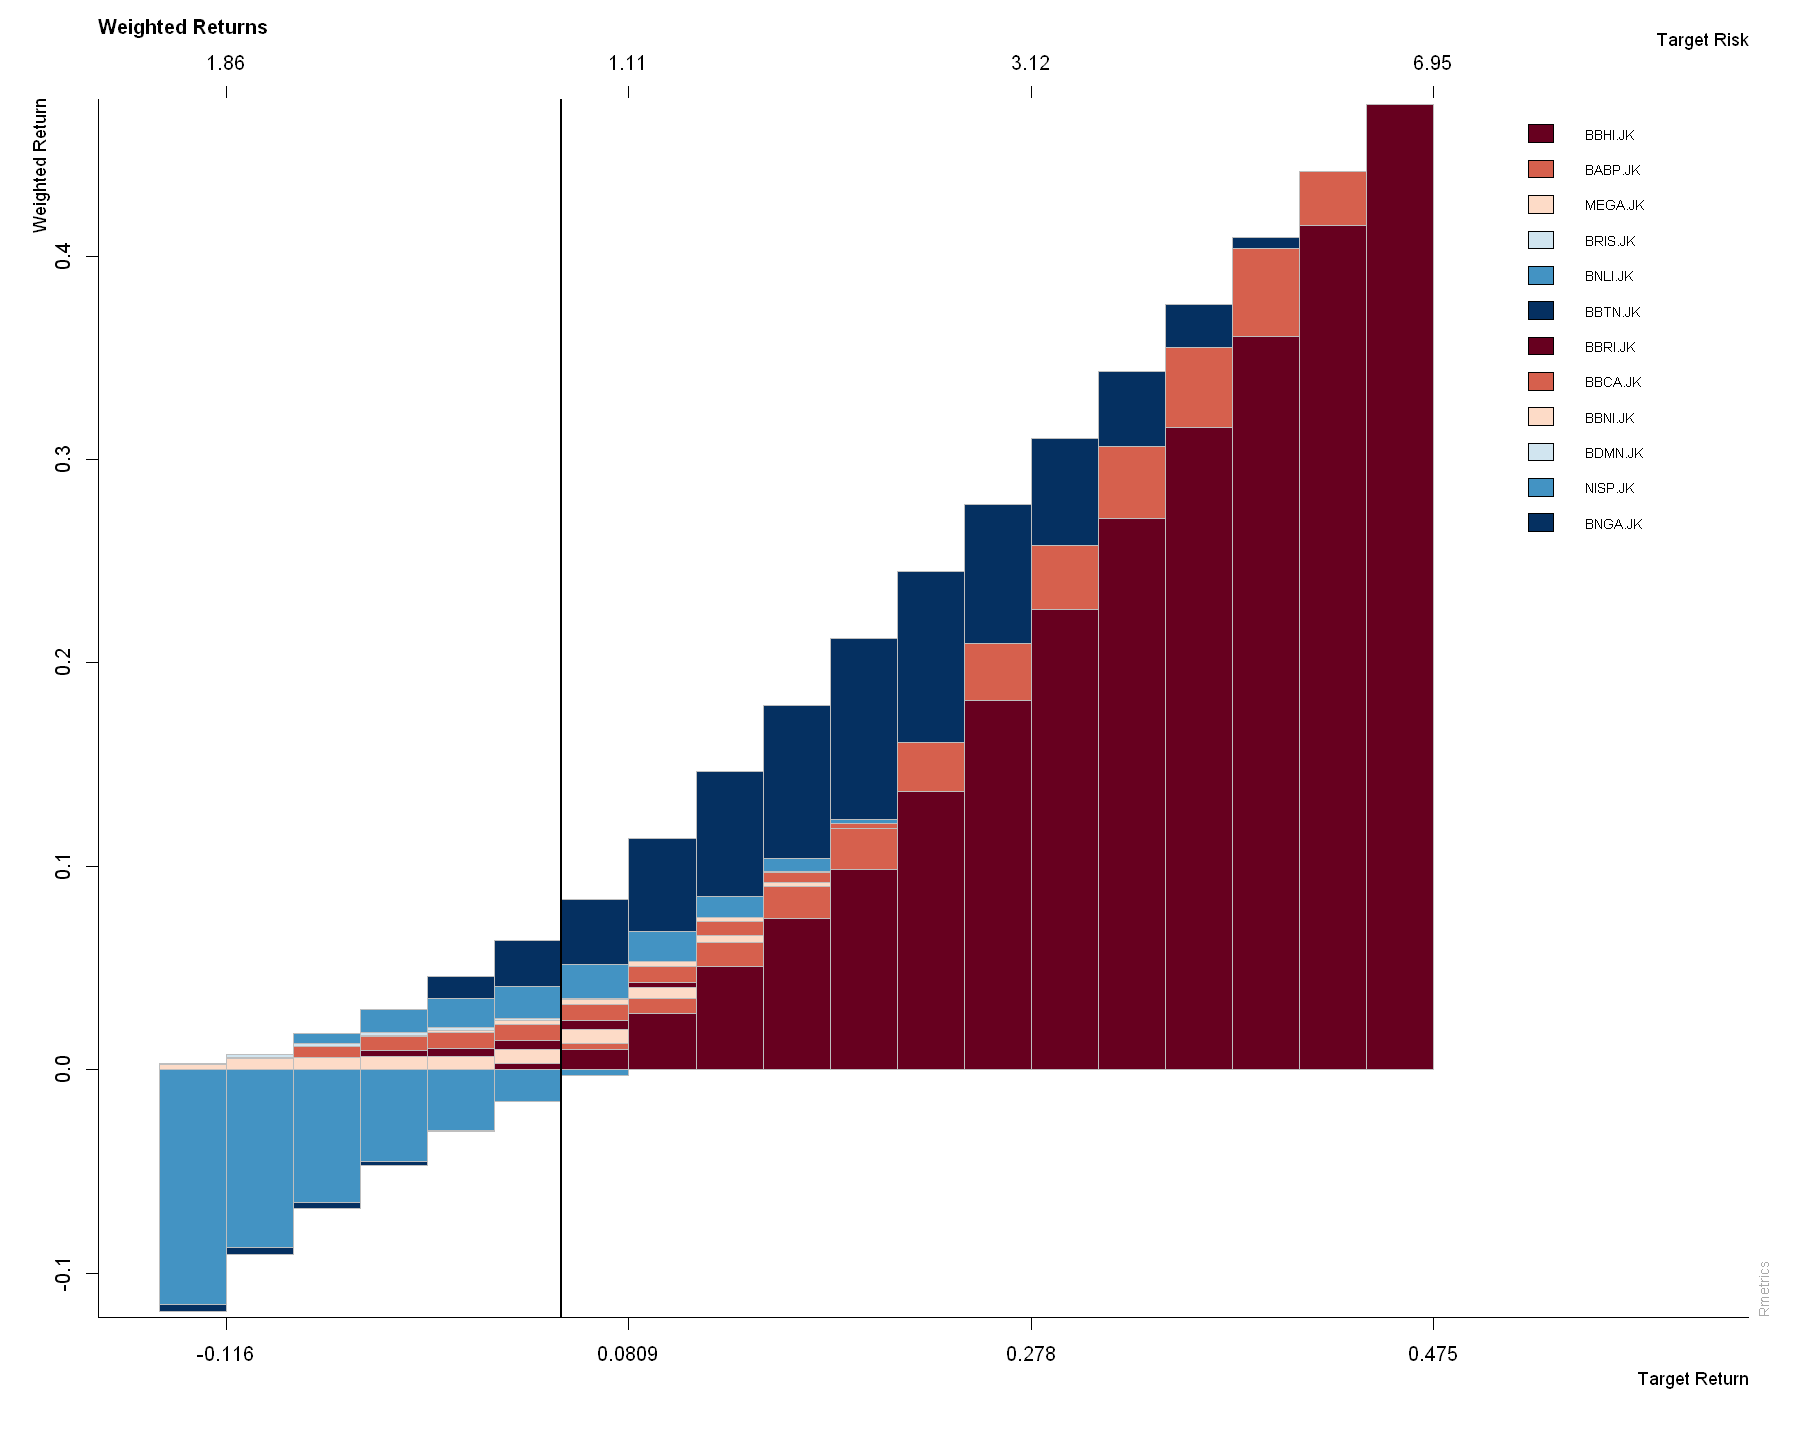

In [109]:
weightedReturnsPlot(mveFrontier, col = col)
boxL()

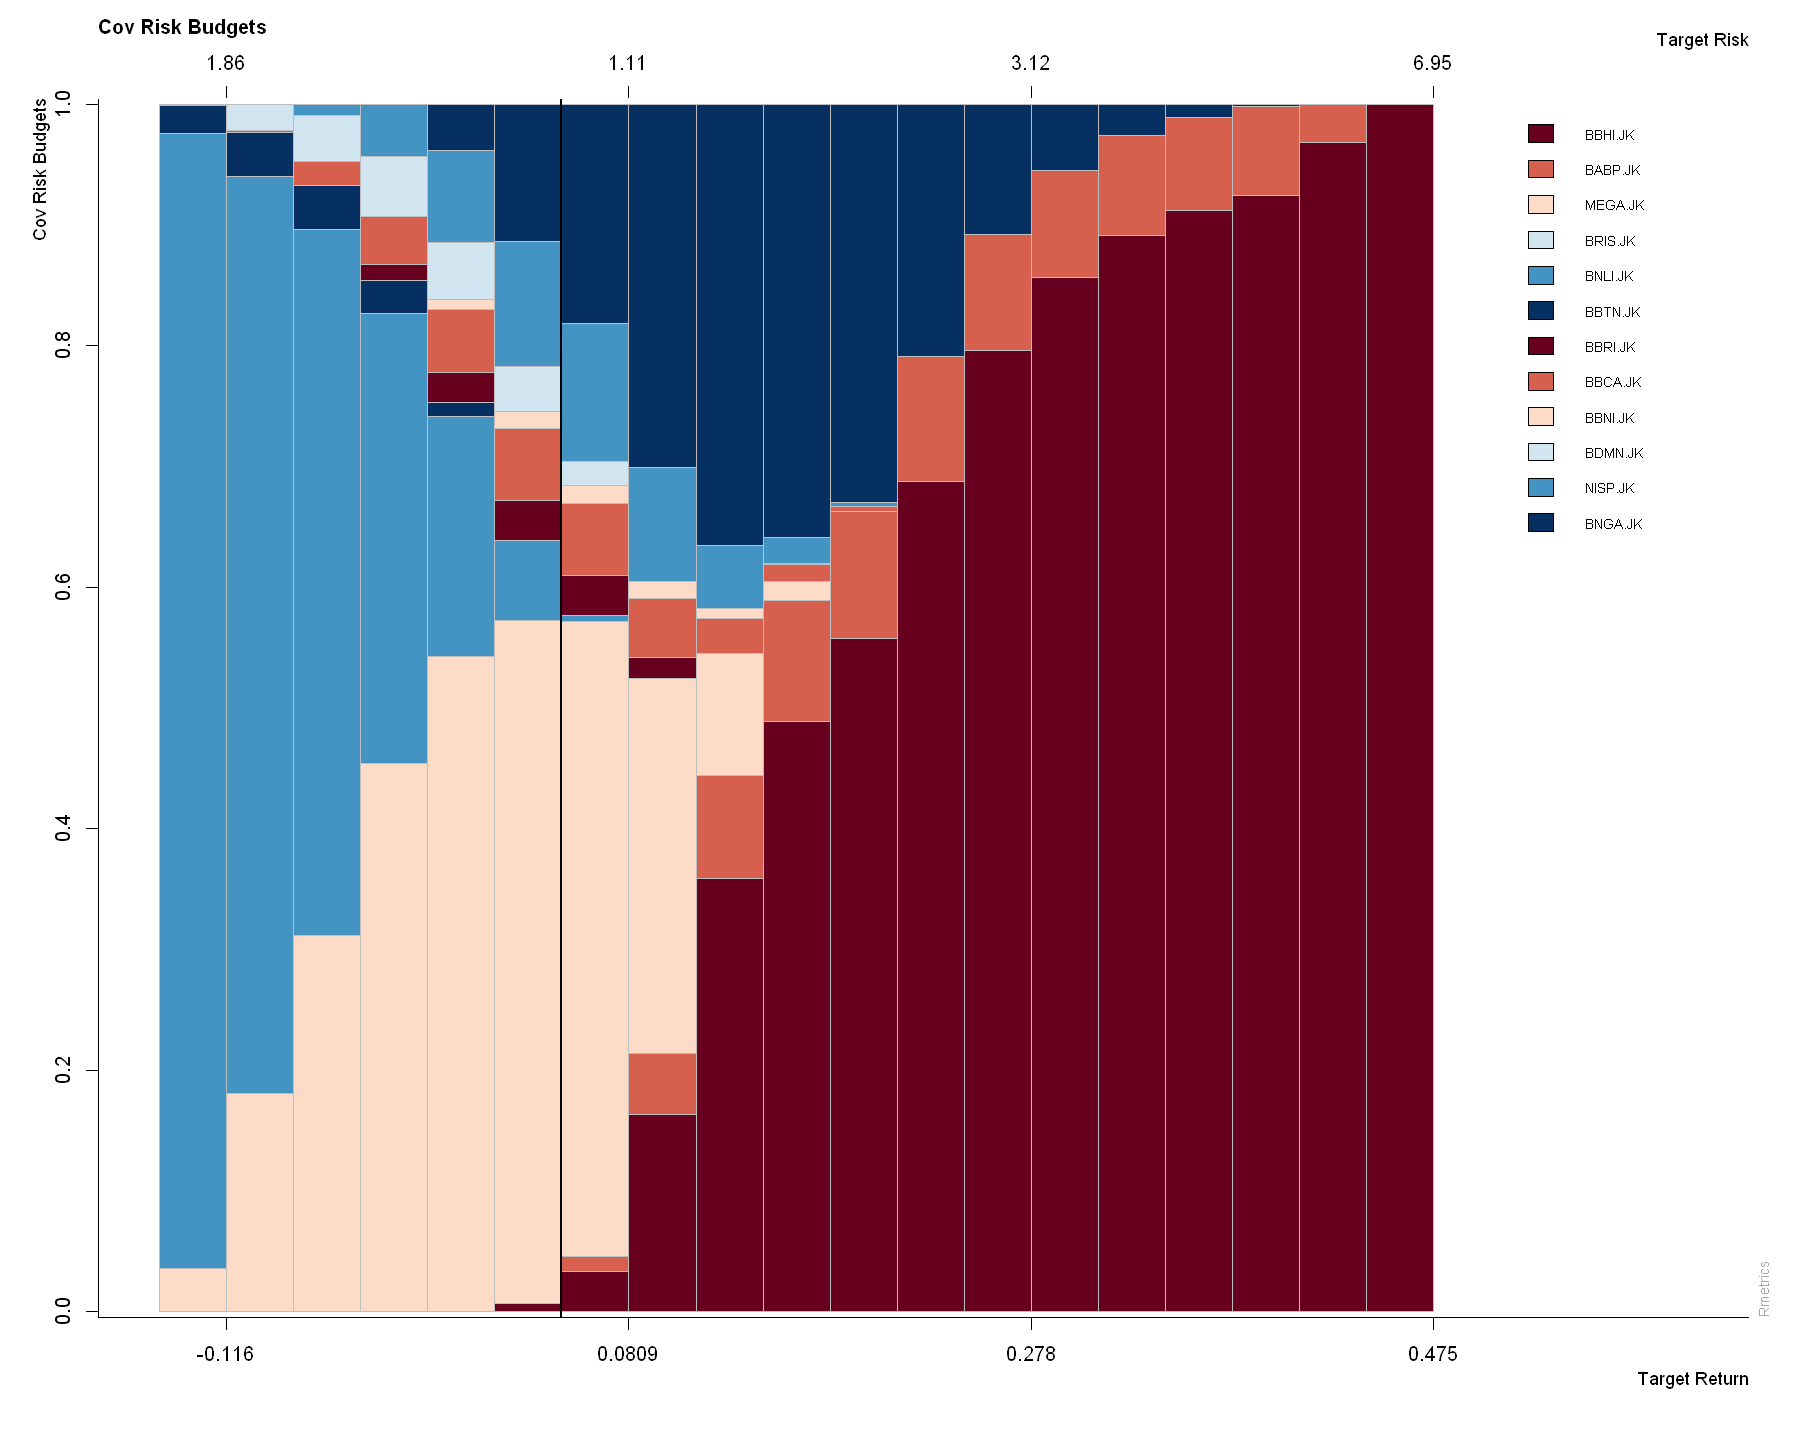

In [110]:
covRiskBudgetsPlot(mveFrontier, col = col)
boxL()

## 6.4  THE OGK ROBUSTIFIED MEAN-VARIANCE PORTFOLIO

In [111]:
covOGKEstimate <- covOGKEstimator(ts_returns)
fastCovOGKEstimator <- function(x, spec = NULL, ...) covOGKEstimate

In [112]:
covOGKSpec <- portfolioSpec()
setEstimator(covOGKSpec) <- "fastCovOGKEstimator"
setNFrontierPoints(covOGKSpec) <- 5

In [113]:
covOGKFrontier <- portfolioFrontier(data = ts_returns, spec = covOGKSpec)
print(covOGKFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         fastCovOGKEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.2711  0.0000  0.2243  0.0325  0.0459  0.1577  0.0000
2  0.1535  0.0355  0.1166  0.0000  0.0000  0.0000  0.0605  0.0620  0.0352
3  0.5172  0.0750  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0601  0.1520  0.0564
2  0.0000  0.1157  0.4211
3  0.0000  0.0000  0.4078
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.5667  0.0000  0.2250  0.0170  0.0181  0.0708  0.0000
2  0.5387  0.0399  0.0575  0.0000  0.0000  0.0000  0.0187  0.0131  0.0124
3  0.9109  0.0317  0.0000  0.0000  0

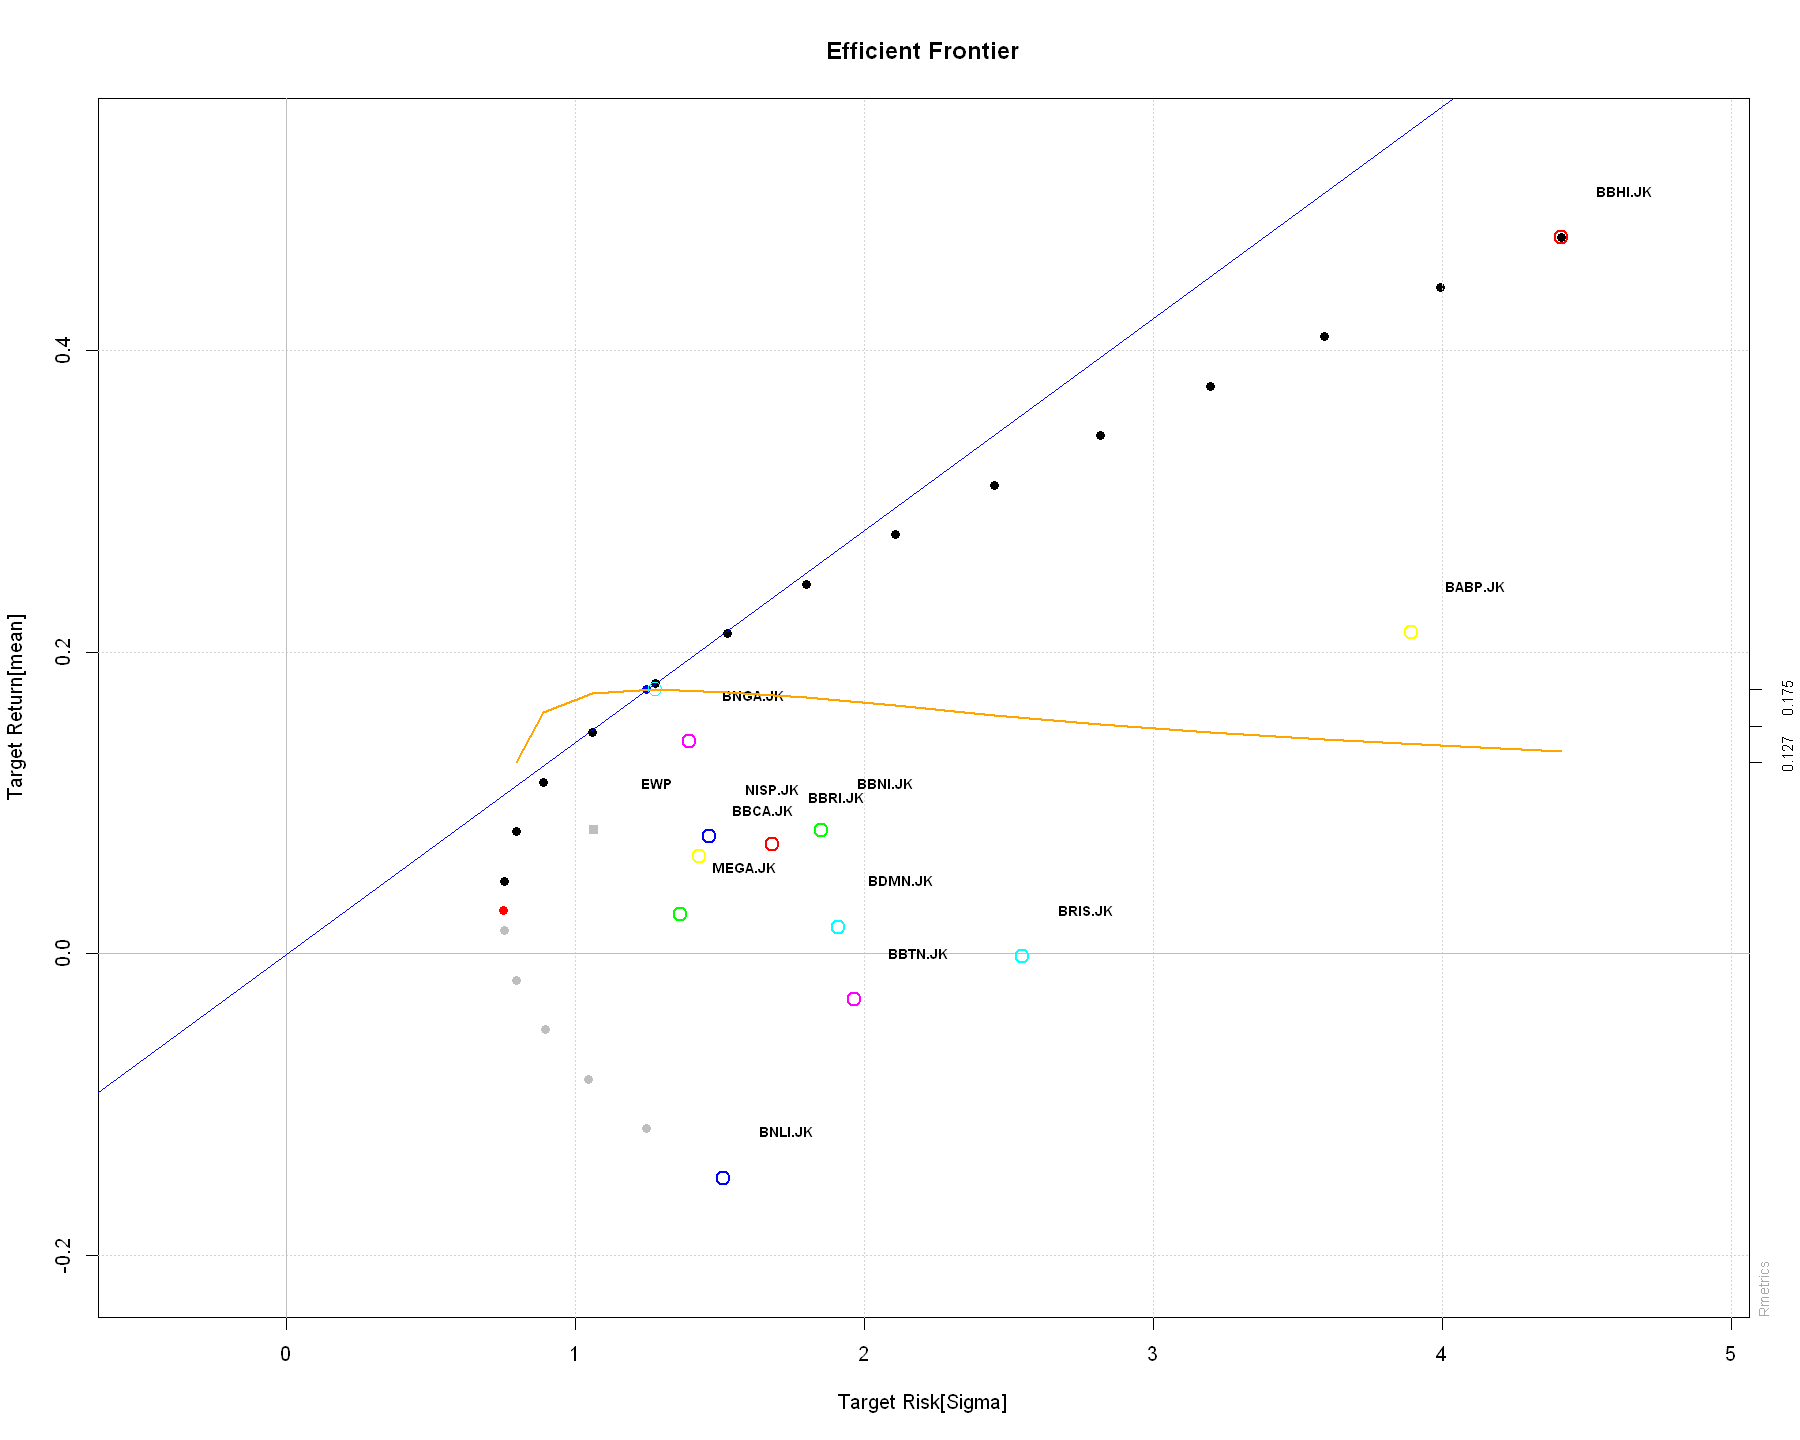

In [114]:
setNFrontierPoints(covOGKSpec) <- 20
covOGKFrontier <- portfolioFrontier(data = ts_returns, spec = covOGKSpec)
tailoredFrontierPlot(covOGKFrontier,mText = "OGK Robustified MV Portfolio",risk = "Sigma")

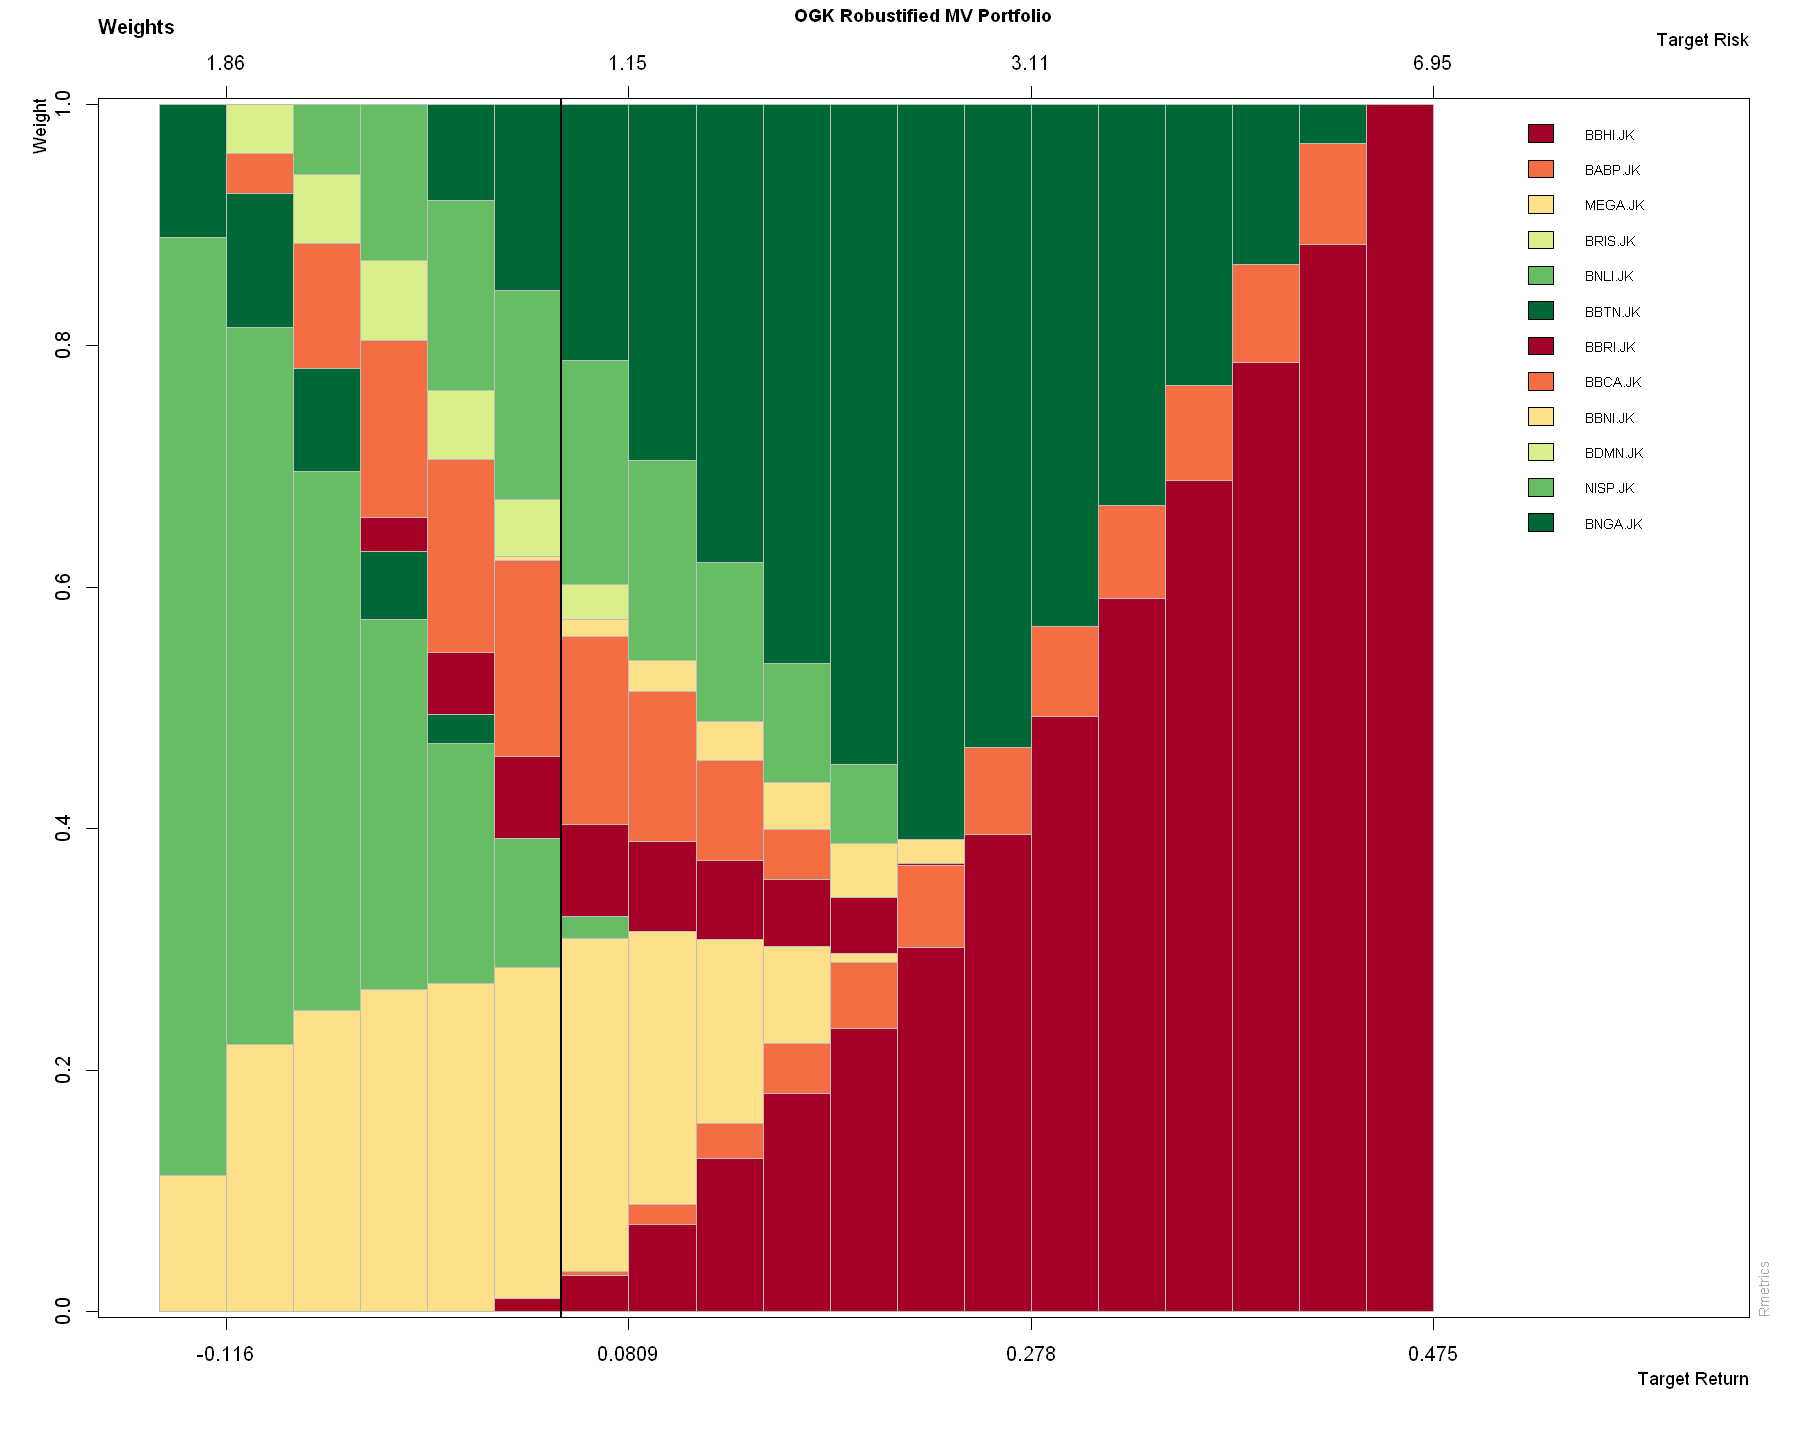

In [115]:
col = divPalette(6, "RdYlGn")
weightsPlot(covOGKFrontier, col = col)
text <- "OGK Robustified MV Portfolio"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)

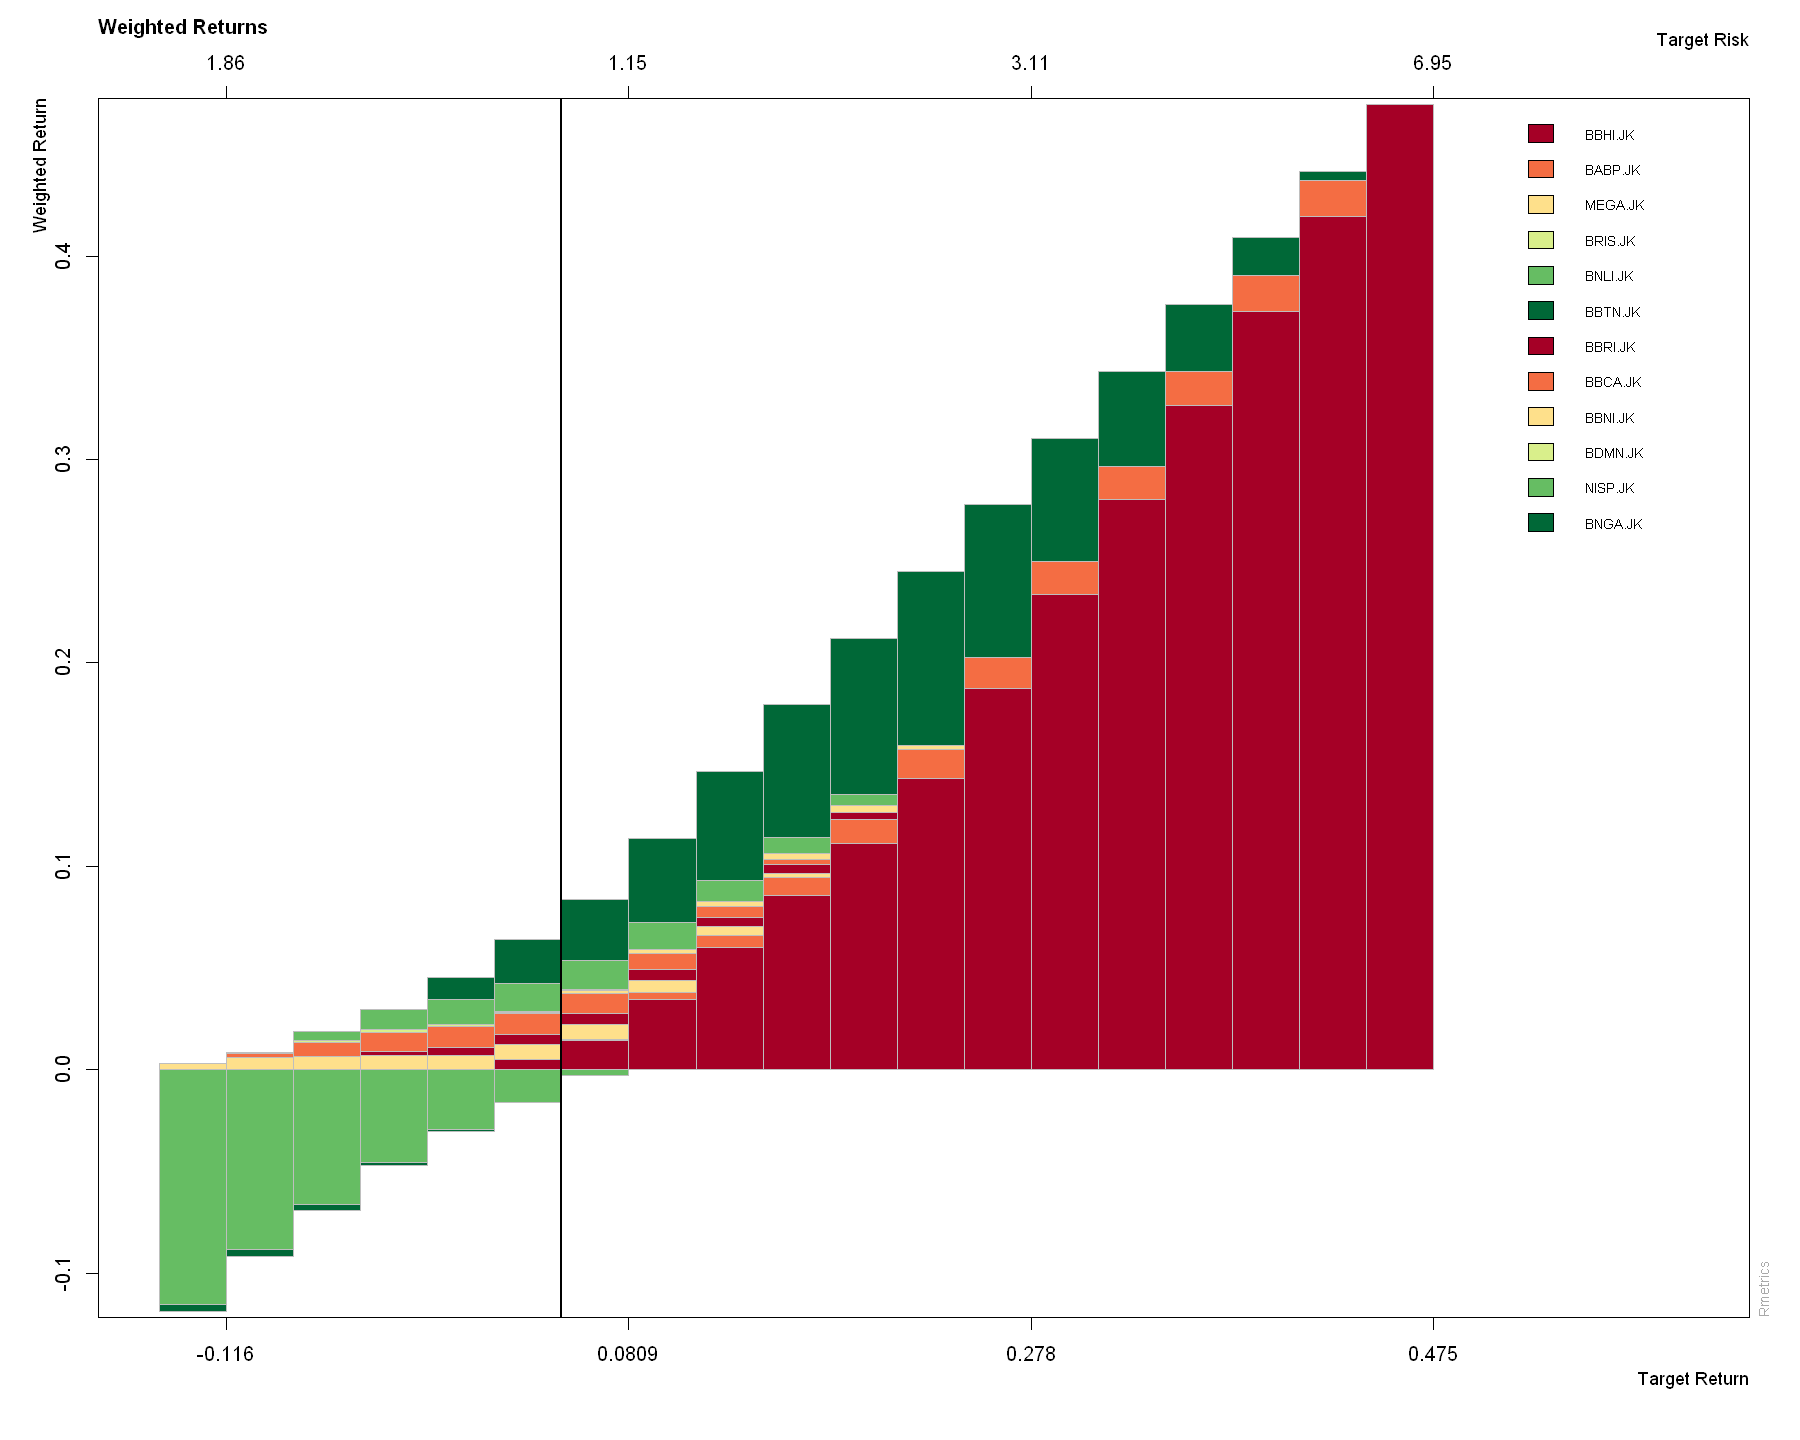

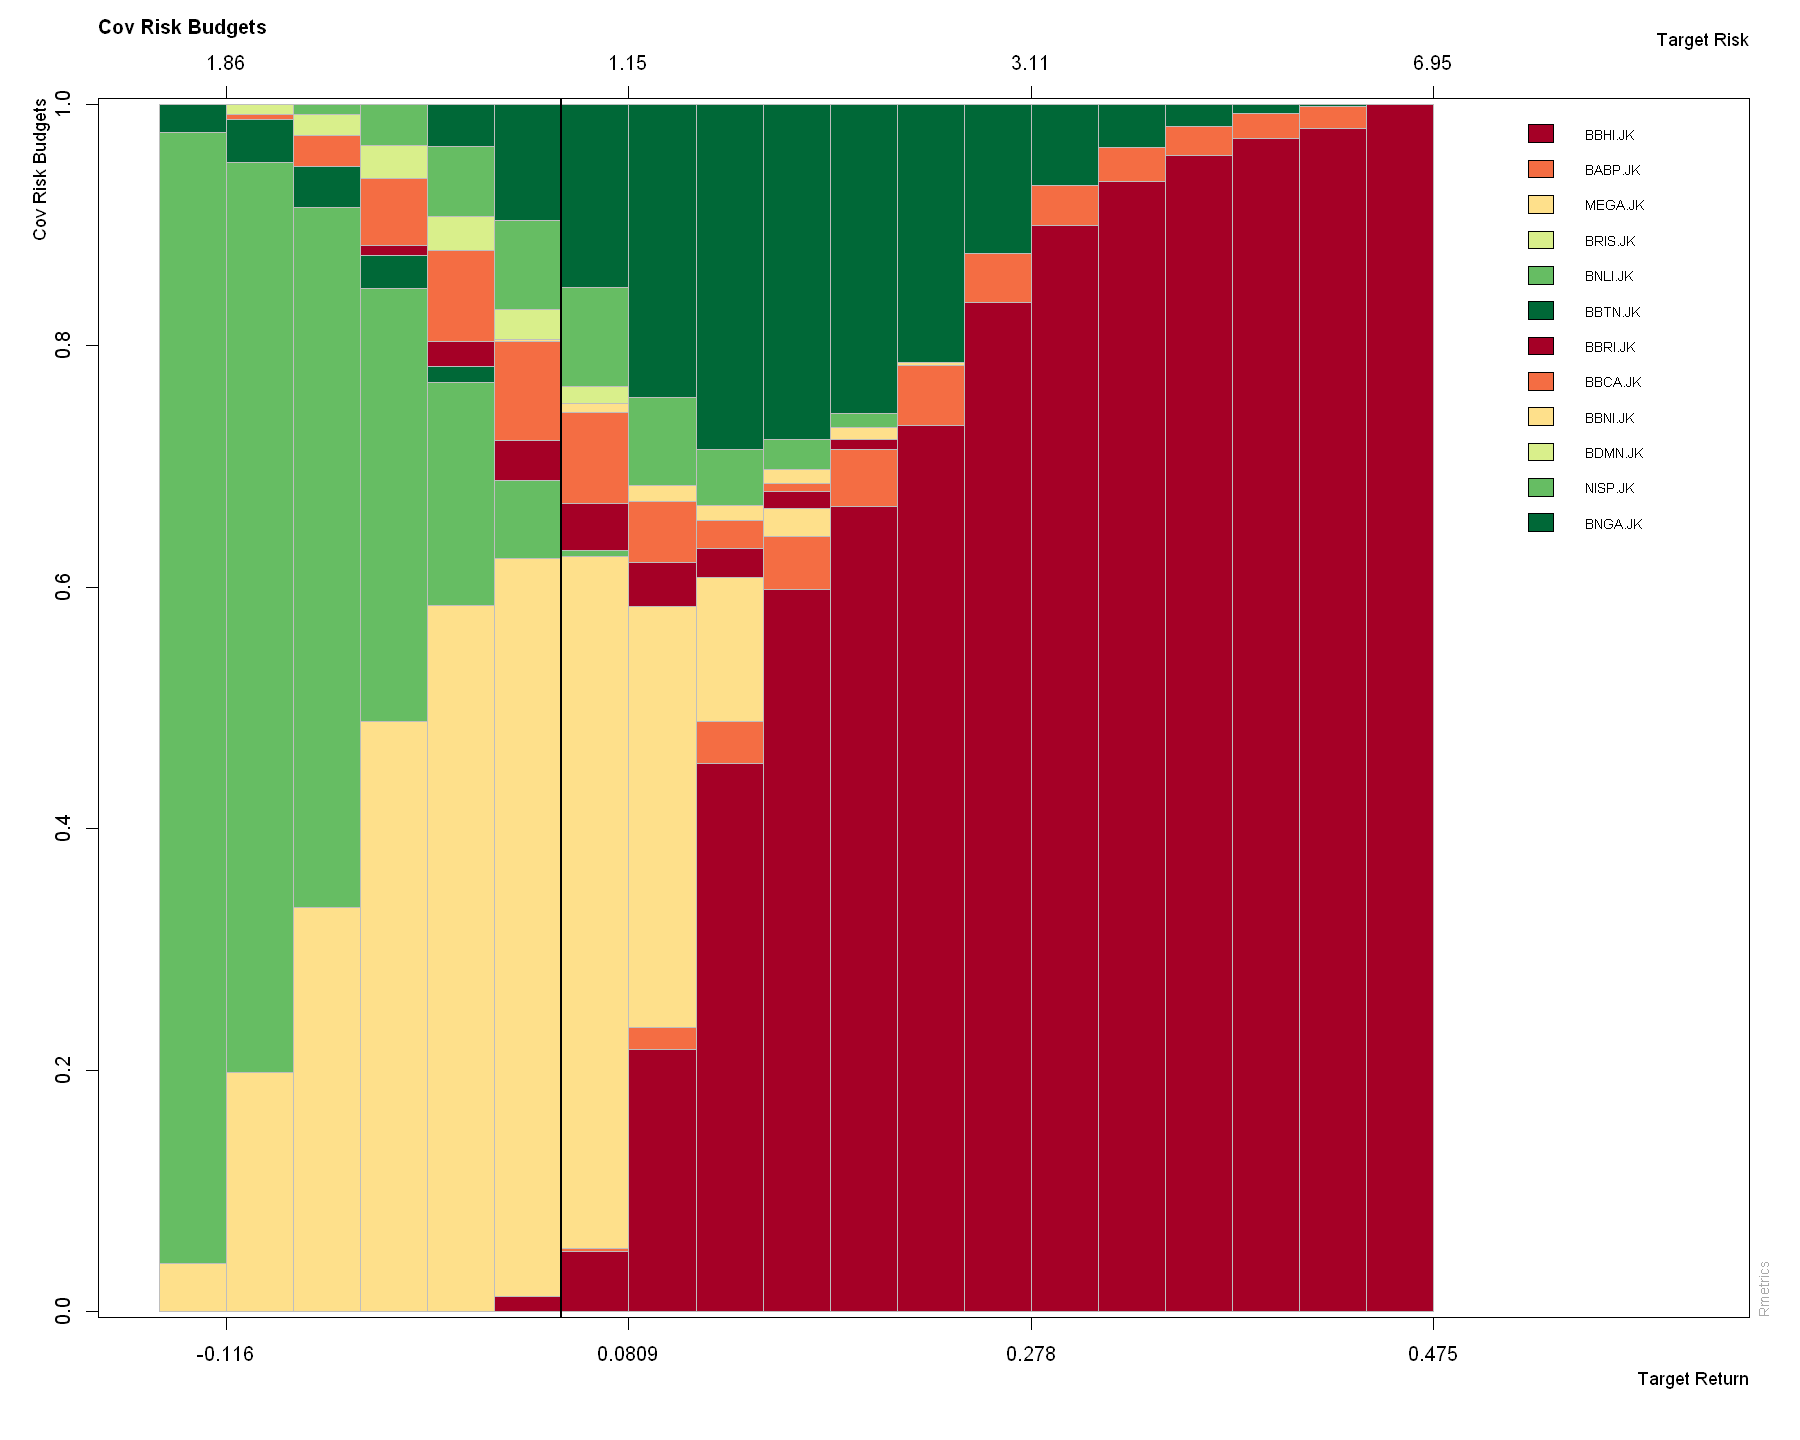

In [116]:
weightedReturnsPlot(covOGKFrontier, col = col)
covRiskBudgetsPlot(covOGKFrontier, col = col)

## 6.5  THE SHRINKED MEAN-VARIANCE PORTFOLIO

In [117]:
shrinkSpec <- portfolioSpec()
setEstimator(shrinkSpec) <- "shrinkEstimator"
setNFrontierPoints(shrinkSpec) <- 5
shrinkFrontier <- portfolioFrontier(data = ts_returns, spec = shrinkSpec)
print(shrinkFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         shrinkEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0674  0.0207  0.2048  0.0976  0.0564  0.2222  0.0000
2  0.1228  0.0527  0.0000  0.0000  0.0000  0.0000  0.0239  0.1272  0.0411
3  0.5085  0.1156  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0894  0.2413  0.0001
2  0.0000  0.1396  0.4927
3  0.0000  0.0000  0.3760
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0628  0.0219  0.2966  0.1105  0.0466  0.1847  0.0000
2  0.4067  0.0733  0.0000  0.0000  0.0000  0.0000  0.0080  0.0340  0.0168
3  0.8910  0.0576  0.0000  0.0000  0.000

## 6.6 HOW TO WRITE YOUR OWN COVARIANCE ESTIMATOR

In [118]:
covtEstimator <- function (x, spec = NULL, ...) {x.mat = as.matrix(x)
                                                 list(mu = colMeans(x.mat), 
                                                      Sigma = MASS::cov.trob(x.mat)$cov) }
covtSpec <- portfolioSpec()
setEstimator(covtSpec) <- "covtEstimator"
setNFrontierPoints(covtSpec) <- 5
covtFrontier <- portfolioFrontier(data = ts_returns, spec = covtSpec)
print(covtFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covtEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.1560  0.0000  0.2393  0.0470  0.0655  0.1486  0.0055
2  0.1308  0.0558  0.0460  0.0000  0.0000  0.0000  0.0211  0.1006  0.0409
3  0.5089  0.1137  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0746  0.2094  0.0542
2  0.0000  0.1377  0.4672
3  0.0000  0.0000  0.3774
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.2604  0.0000  0.3487  0.0370  0.0409  0.0902  0.0035
2  0.4467  0.0795  0.0107  0.0000  0.0000  0.0000  0.0066  0.0245  0.0158
3  0.8920  0.0563  0.0000  0.0000  0.0000 

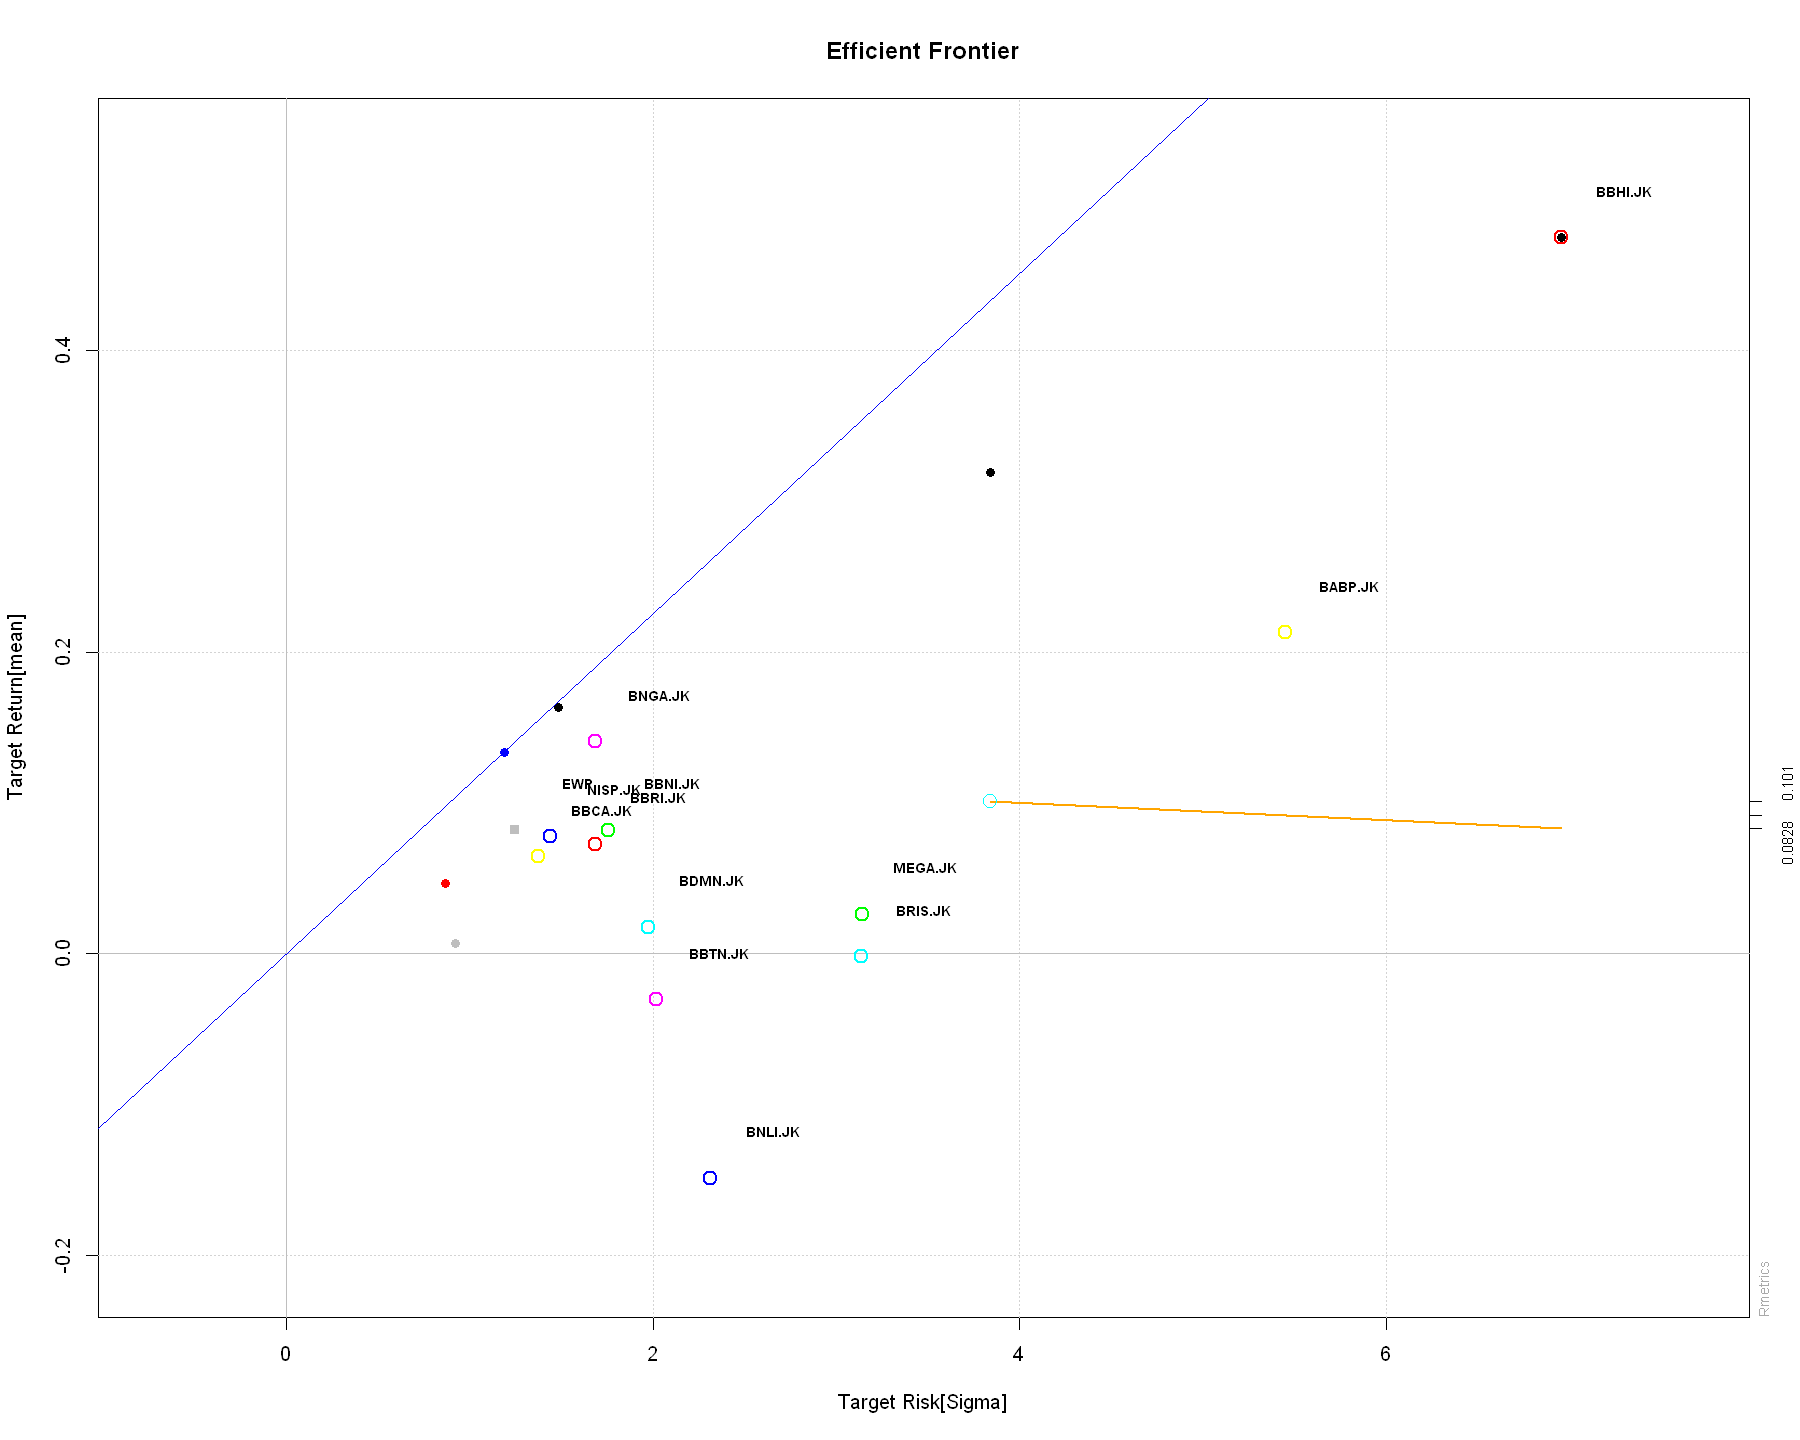

In [119]:
setNFrontierPoints(covtSpec) <- 20
covtFrontier <- portfolioFrontier(data = ts_returns, spec = covtSpec)
tailoredFrontierPlot(shrinkFrontier,mText = "Student's t MV Portfolio",risk = "Sigma")

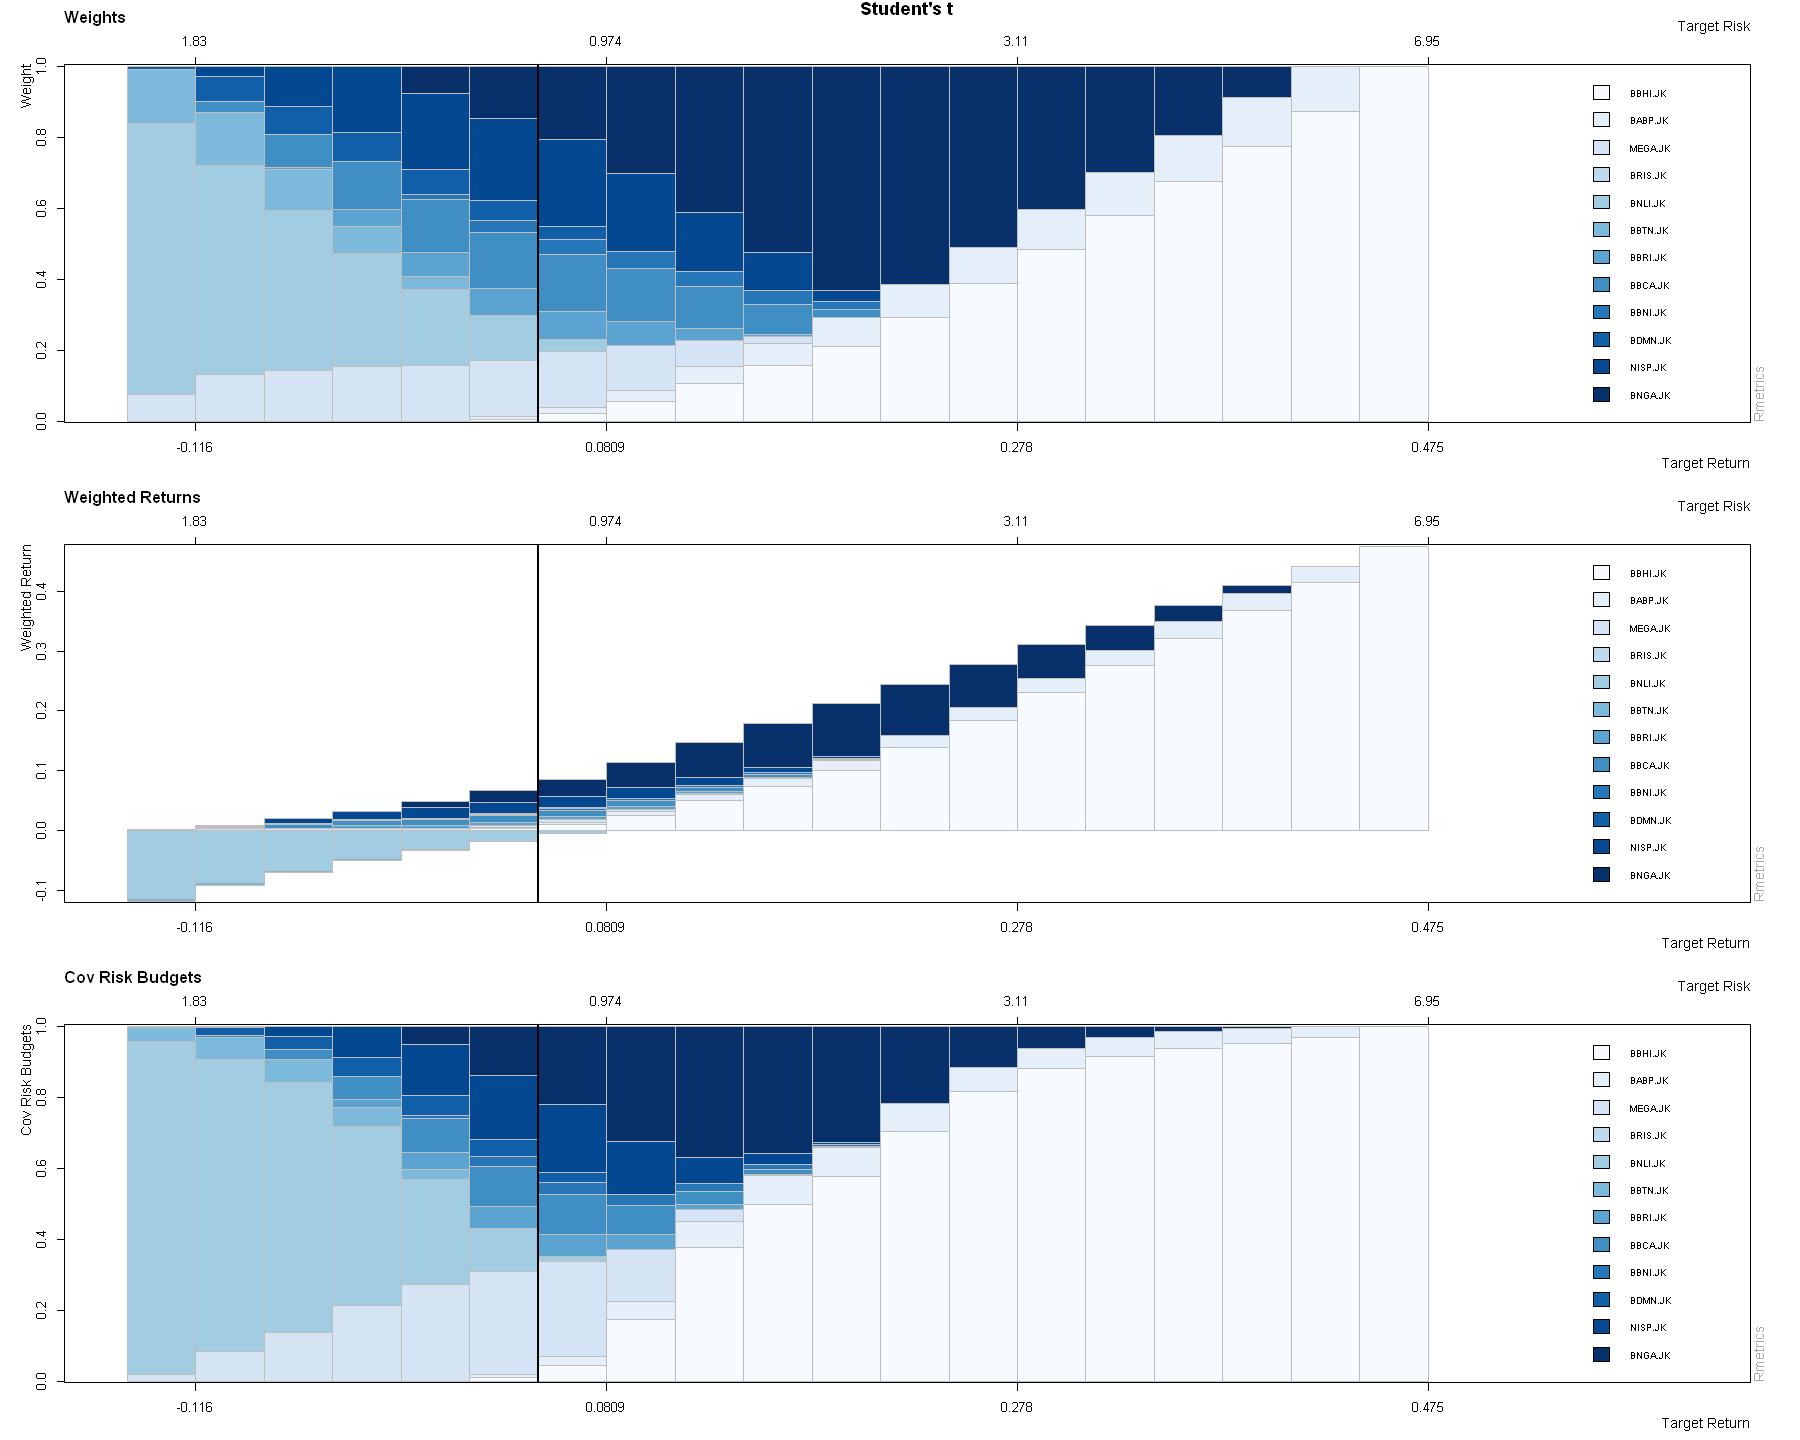

In [120]:
par(mfrow = c(3, 1), mar = c(3.5, 4, 4, 3) + 0.1)
weightsPlot(covtFrontier)
text <- "Student's t"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(covtFrontier)
 covRiskBudgetsPlot(covtFrontier)

# 7. MEAN-CVAR PORTFOLIO SETTINGS

### 7.0 PORTFOLIO SPECIFICATION

In [121]:
cvarSpec <- portfolioSpec()
setType(cvarSpec) = "CVaR"
setAlpha(cvarSpec) = 0.05
setSolver(cvarSpec) = "solveRglpk"

Solver set to solveRquadprog

setSolver: solveRglpk



In [122]:
print(cvarSpec)


Model List:	
 Type:                      CVaR
 Optimize:                  minRisk
 Estimator:                 covEstimator
 Params:                    alpha = 0.05

Portfolio List:	
 Target Weights:            NULL
 Target Return:             NULL
 Target Risk:               NULL
 Risk-Free Rate:            0
 Number of Frontier Points: 50

Optim List:	
 Solver:                    solveRglpk
 Objective:                 portfolioObjective portfolioReturn portfolioRisk
 Trace:                     FALSE


### 7.1 COMPUTE A FEASIBLE MEAN-CVAR PORTFOLIO


In [123]:
cvarSpec <- portfolioSpec()
setType(cvarSpec) <- "CVAR"
nAssets <- ncol(ts_returns)
setWeights(cvarSpec) <- rep(1/nAssets, times = nAssets)
setSolver(cvarSpec) <- "solveRglpk.CVAR"
ewPortfolio <- feasiblePortfolio(
    data = ts_returns,
    spec = cvarSpec,
    constraints = "LongOnly")
print(ewPortfolio)

Solver set to solveRquadprog




Title:
 CVAR Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0543  0.0908  0.0478  0.0620  0.0501  0.0337  0.0566  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 1.2630 2.5273 1.7434 

Description:
 Sun Sep  3 11:48:30 2023 by user: Kevin 


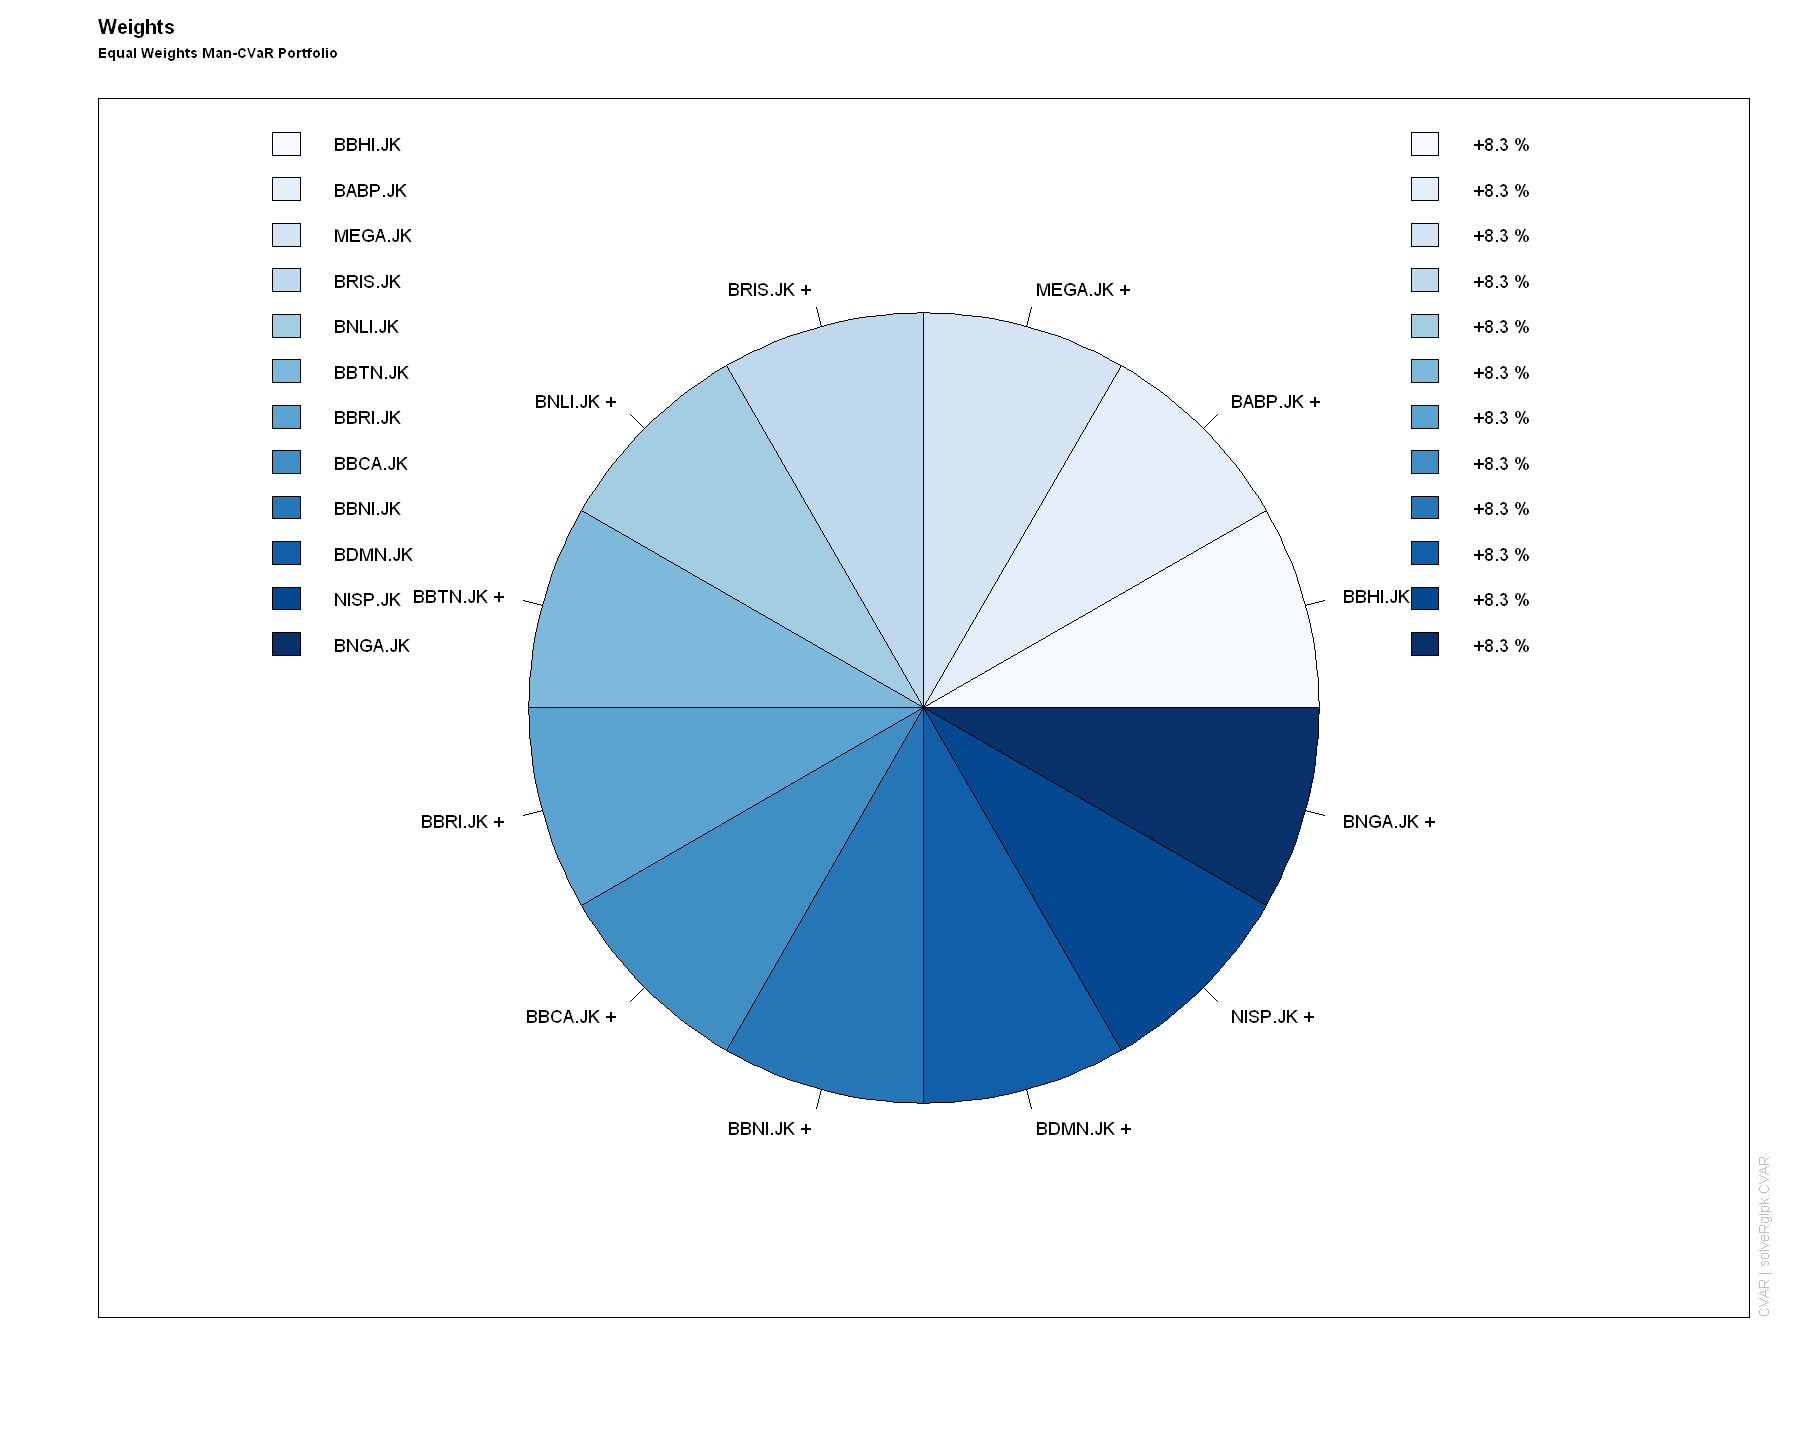

In [124]:
weightsPie(ewPortfolio, radius = 0.7)
text <- "Equal Weights Man-CVaR Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)

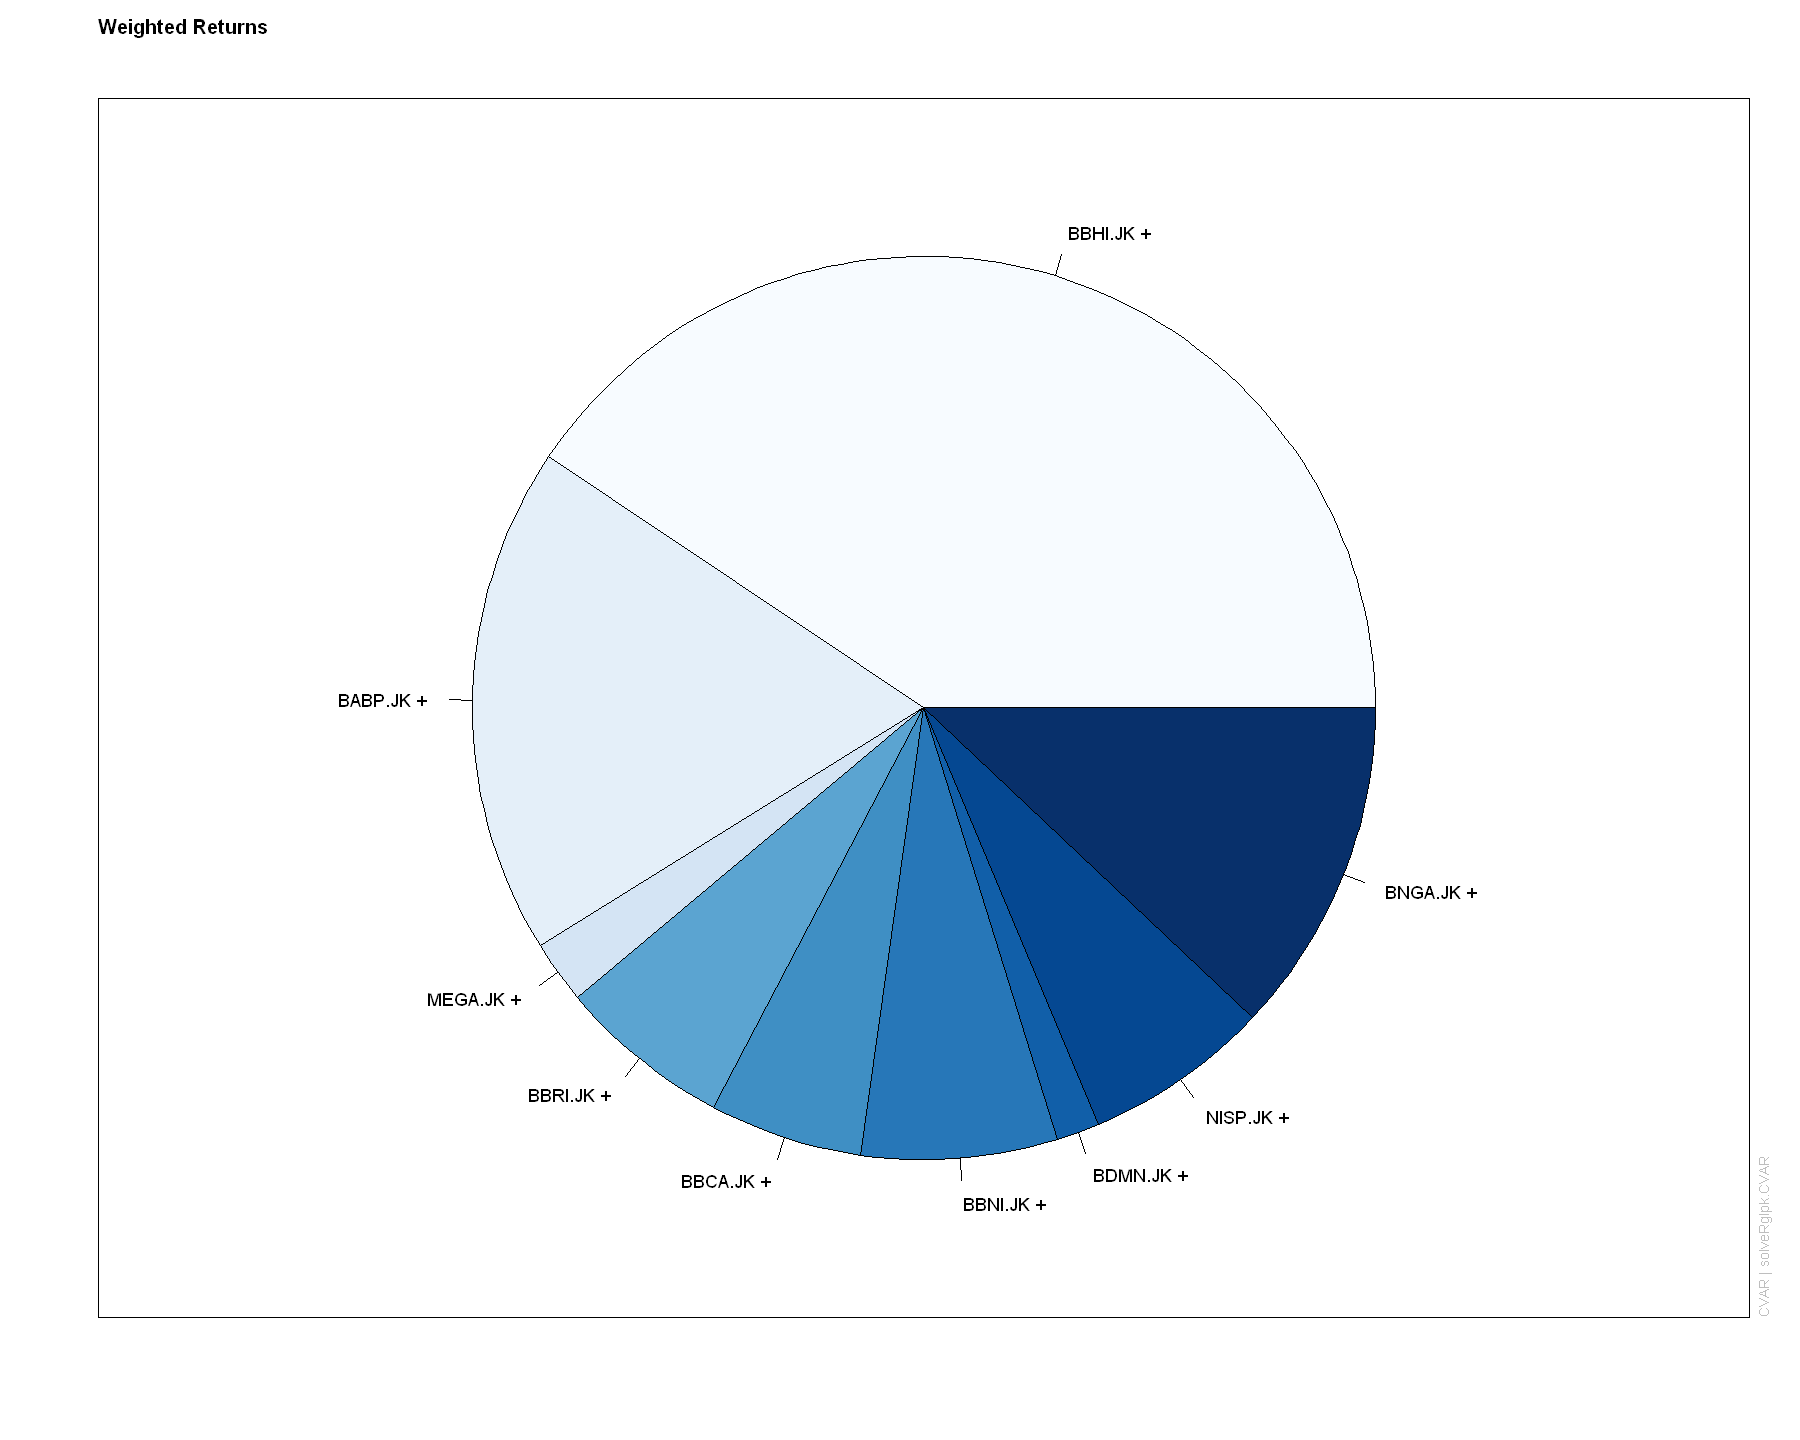

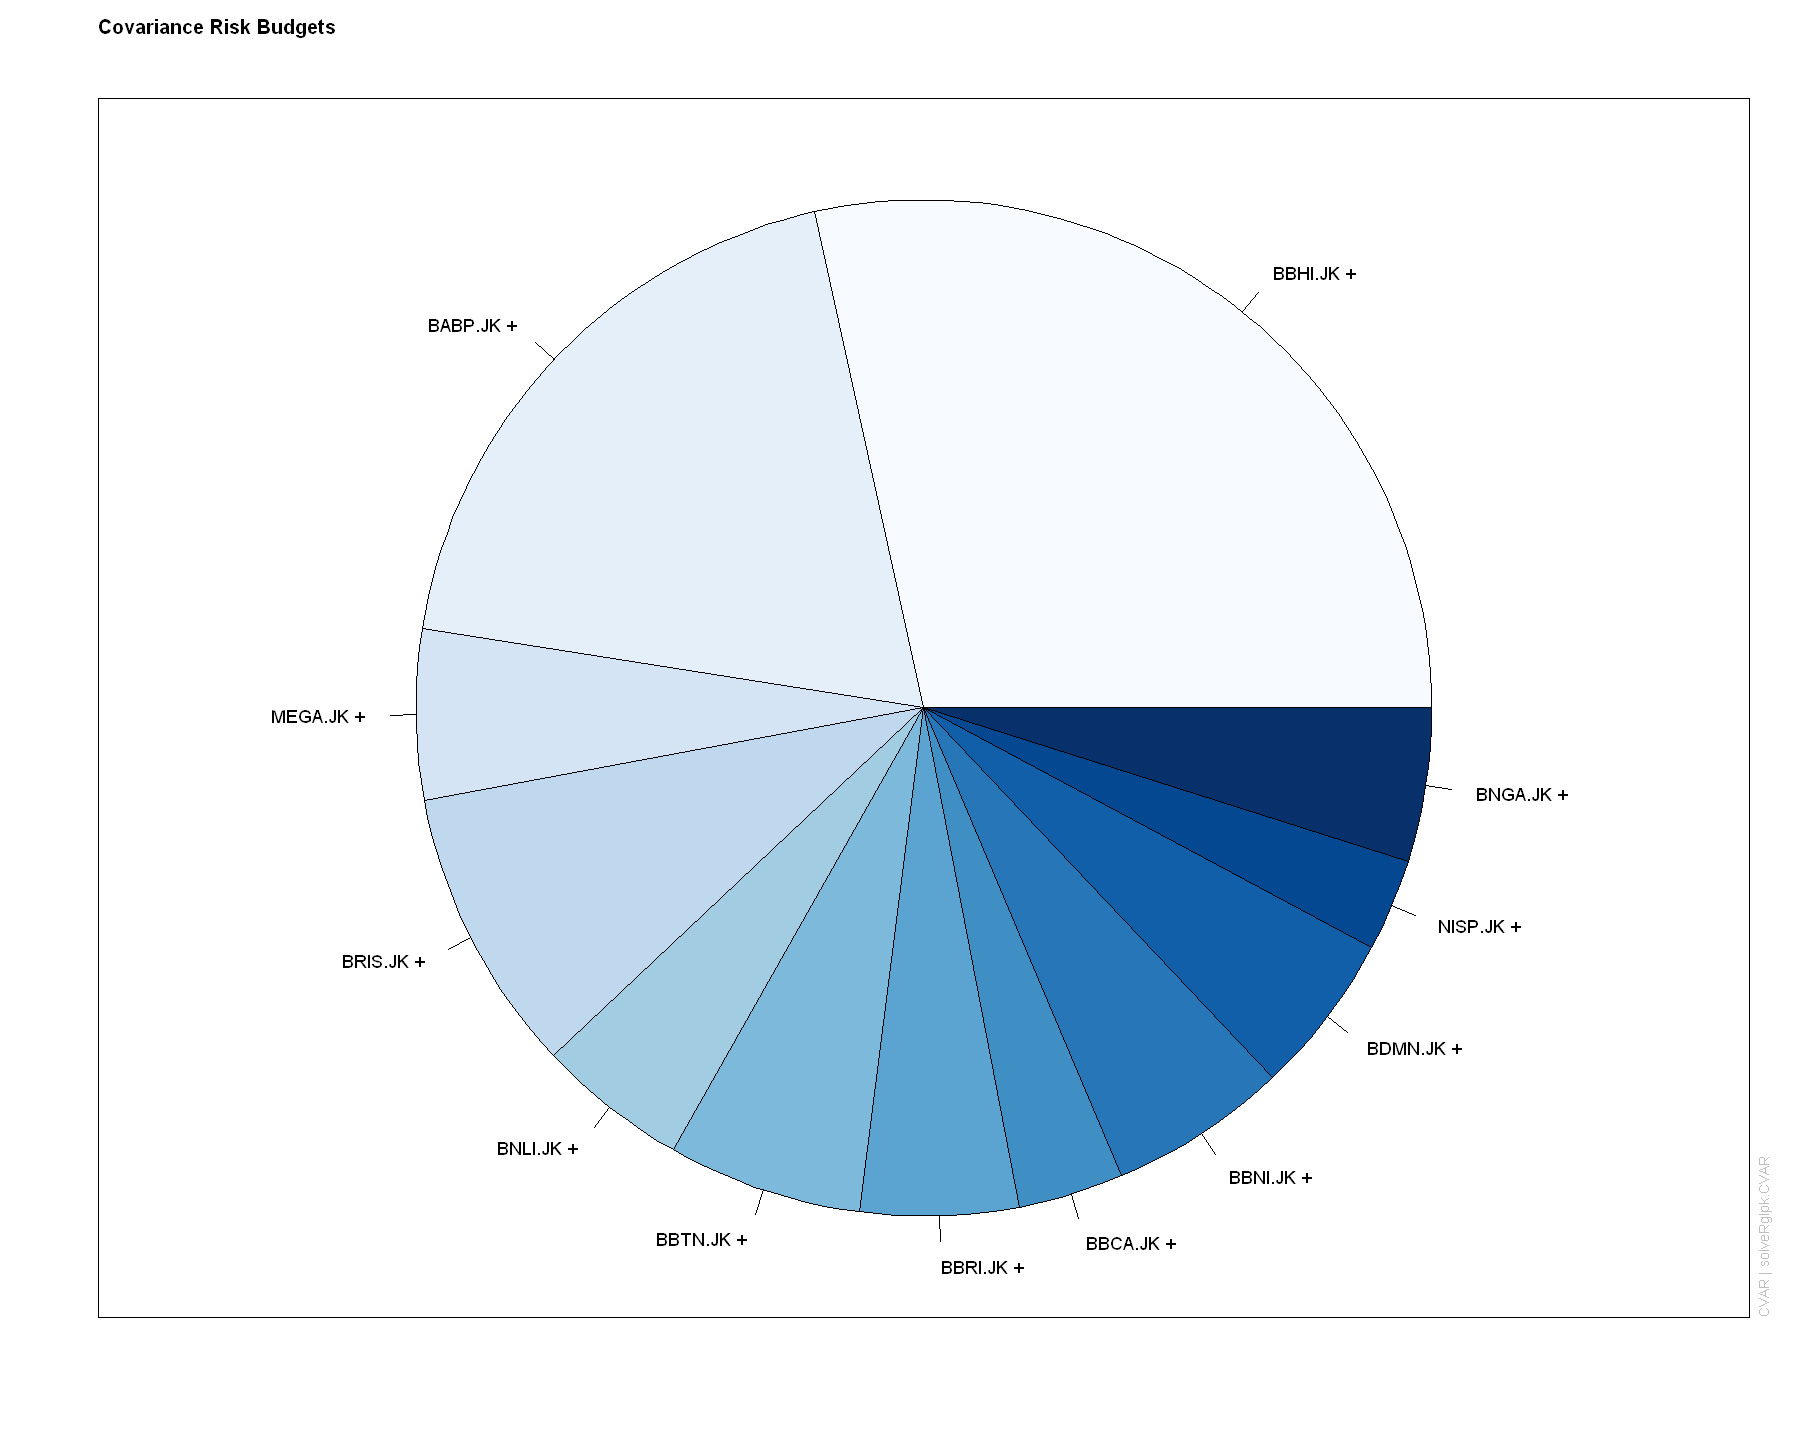

In [125]:
weightedReturnsPie(ewPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(ewPortfolio, radius = 0.9, legend = FALSE)

In [126]:
setAlpha(cvarSpec) = 0.10
ew10Portfolio <- feasiblePortfolio(
data = ts_returns,
spec = cvarSpec,
constraints = "LongOnly")
print(ew10Portfolio)


Title:
 CVAR Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0543  0.0908  0.0478  0.0620  0.0501  0.0337  0.0566  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 1.2630 2.0466 1.3414 

Description:
 Sun Sep  3 11:48:33 2023 by user: Kevin 


### 7. 2 COMPUTE THE MEAN-CVAR PORTFOLIO WITH THE LOWEST RISK FOR A GIVEN RETURN

In [127]:
minriskSpec <- portfolioSpec()
setType(minriskSpec) <- "CVaR"
setAlpha(minriskSpec) <- 0.05
setSolver(minriskSpec) <- "solveRglpk.CVAR"
setTargetReturn(minriskSpec) <- getTargetReturn(ewPortfolio@portfolio)["mean"]
minriskPortfolio <- efficientPortfolio(data = ts_returns, spec = minriskSpec,constraints = "LongOnly")
print(minriskPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0155  0.0229  0.0429  0.0000  0.0302  0.0000  0.0705  0.2503  0.0223  0.0773 
NISP.JK BNGA.JK 
 0.2679  0.2003 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0320  0.0374  0.0255  0.0000  0.0143  0.0000  0.0648  0.2239  0.0213  0.0809 
NISP.JK BNGA.JK 
 0.2559  0.2440 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 0.9319 1.8391 1.3285 

Description:
 Sun Sep  3 11:48:33 2023 by user: Kevin 


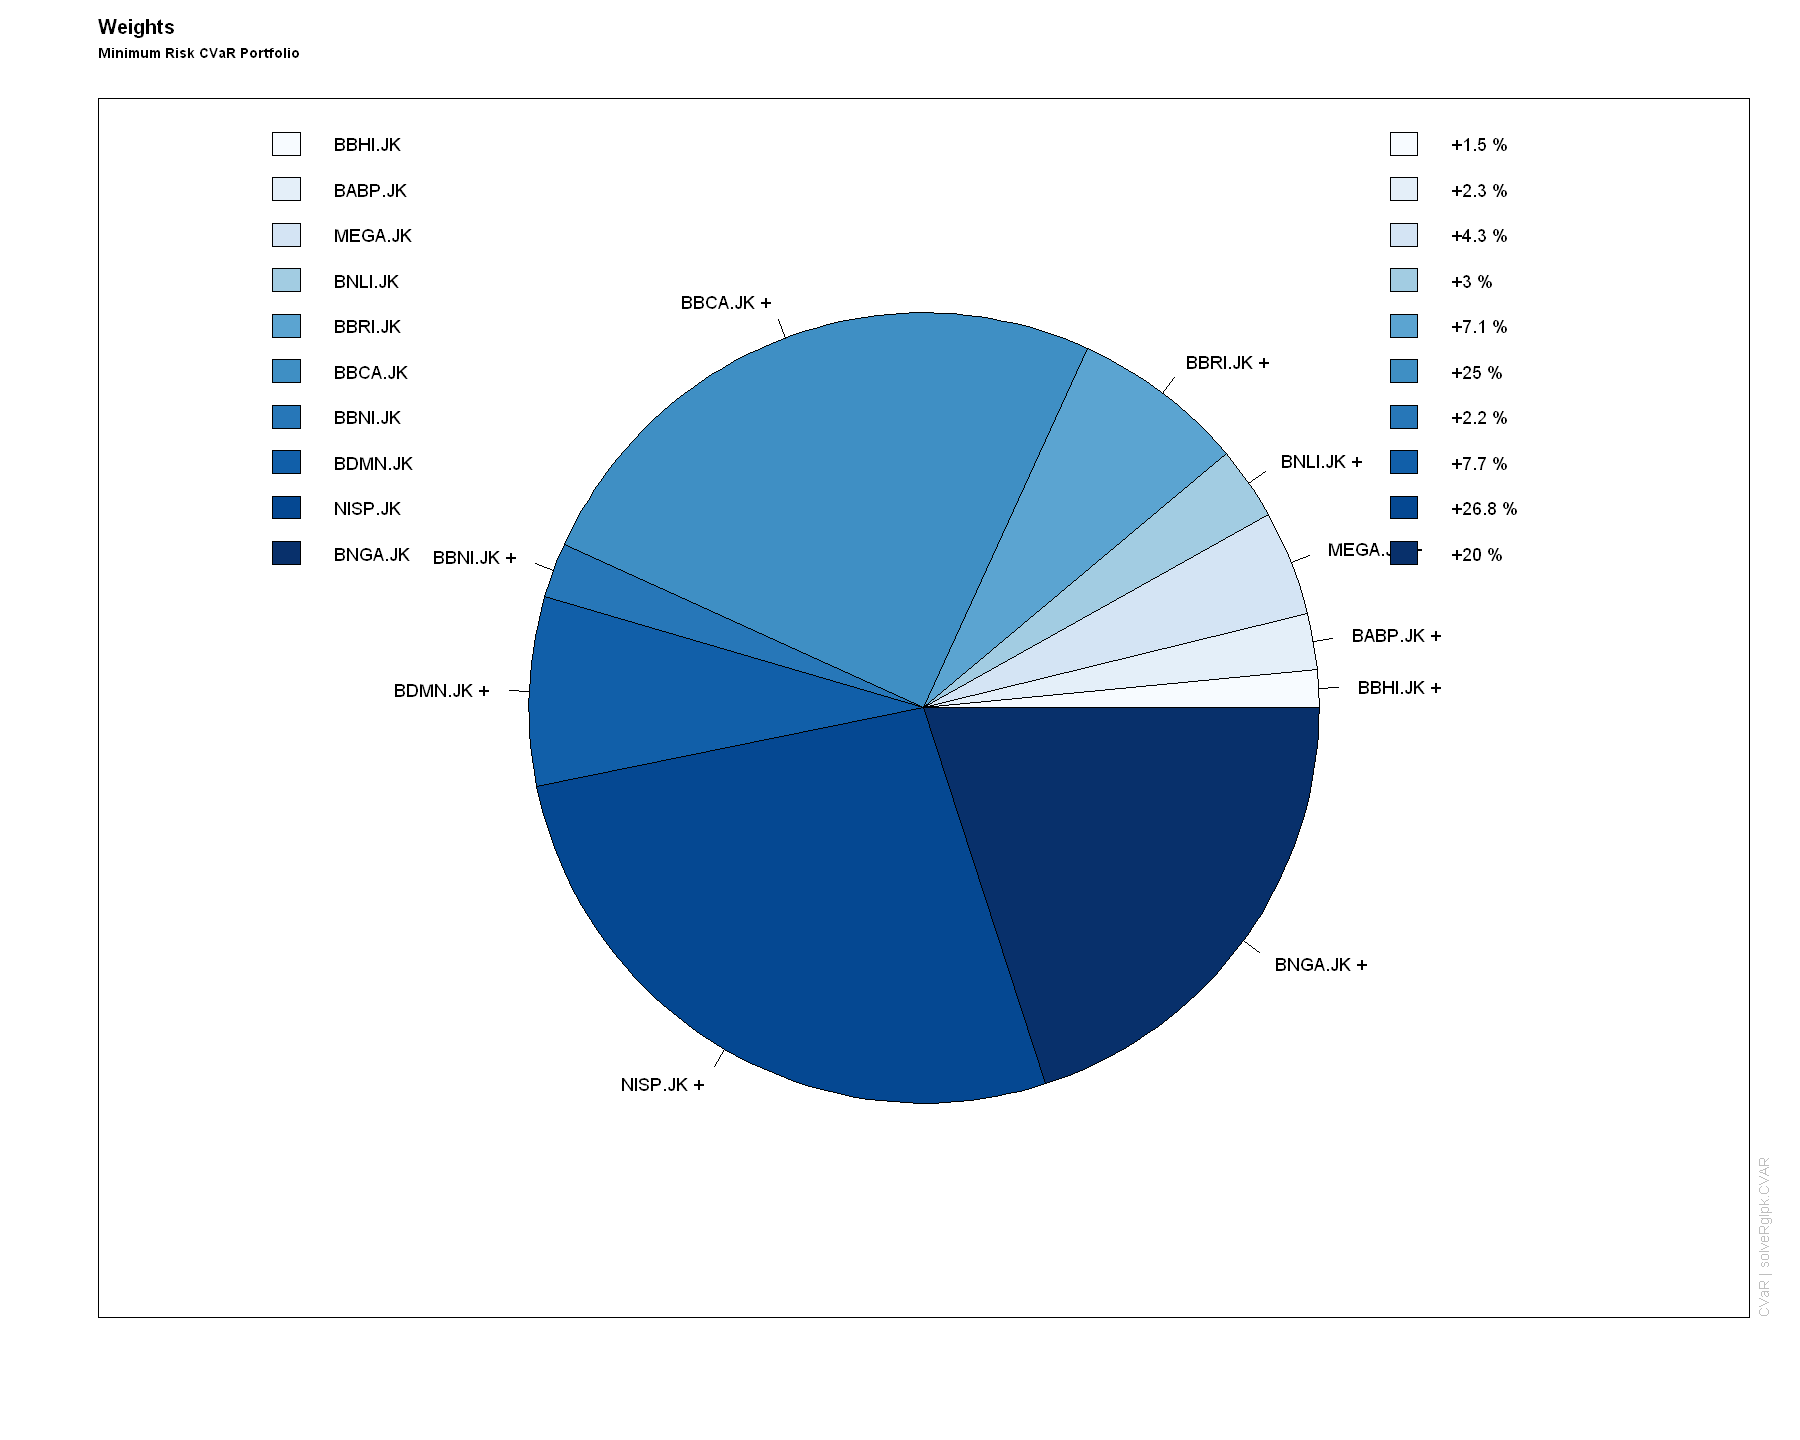

In [128]:
weightsPie(minriskPortfolio, radius = 0.7)
text <- "Minimum Risk CVaR Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)

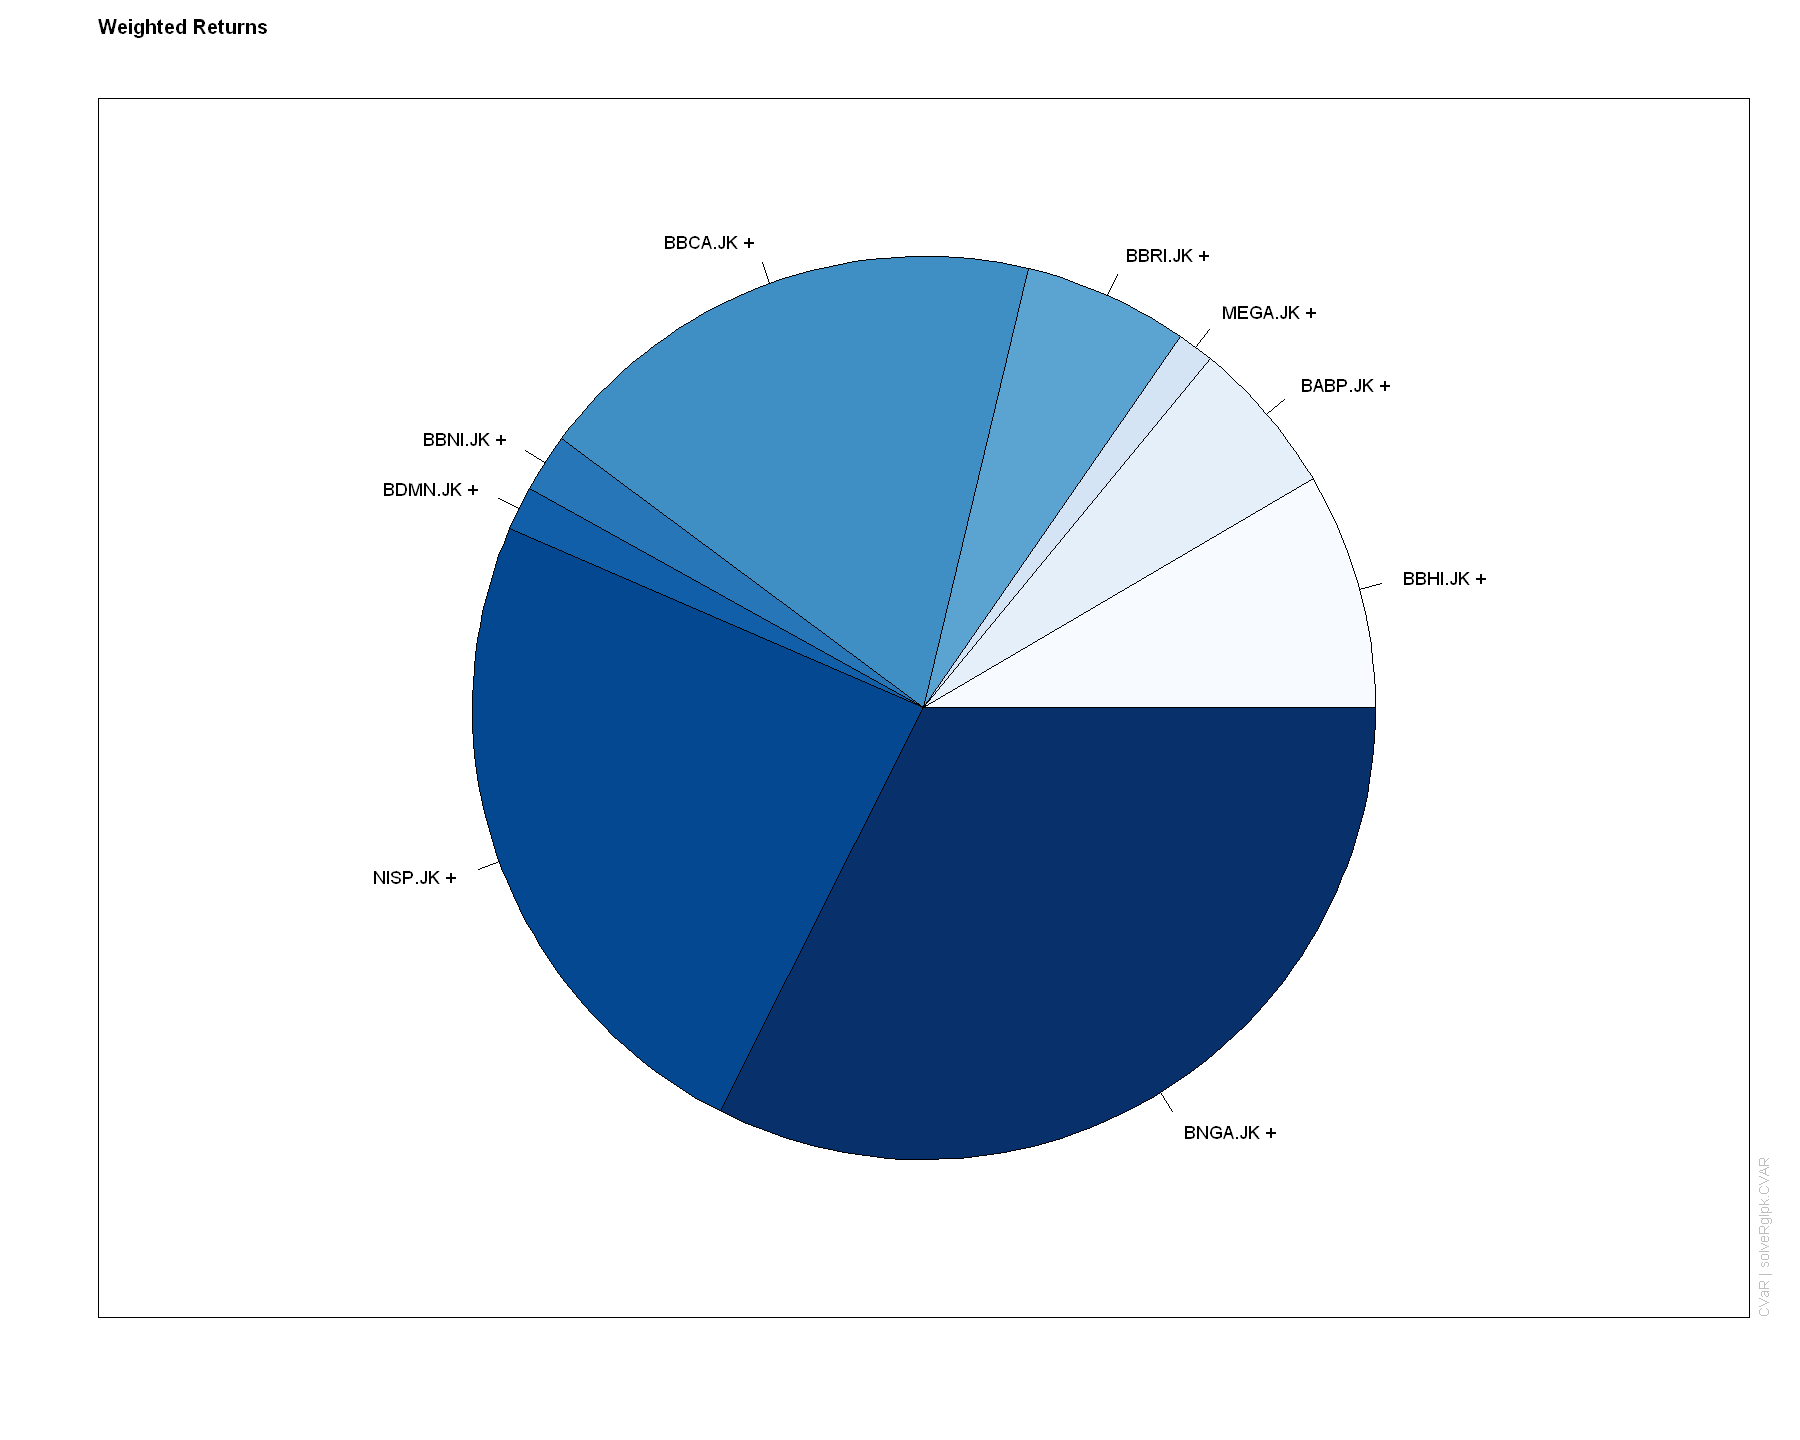

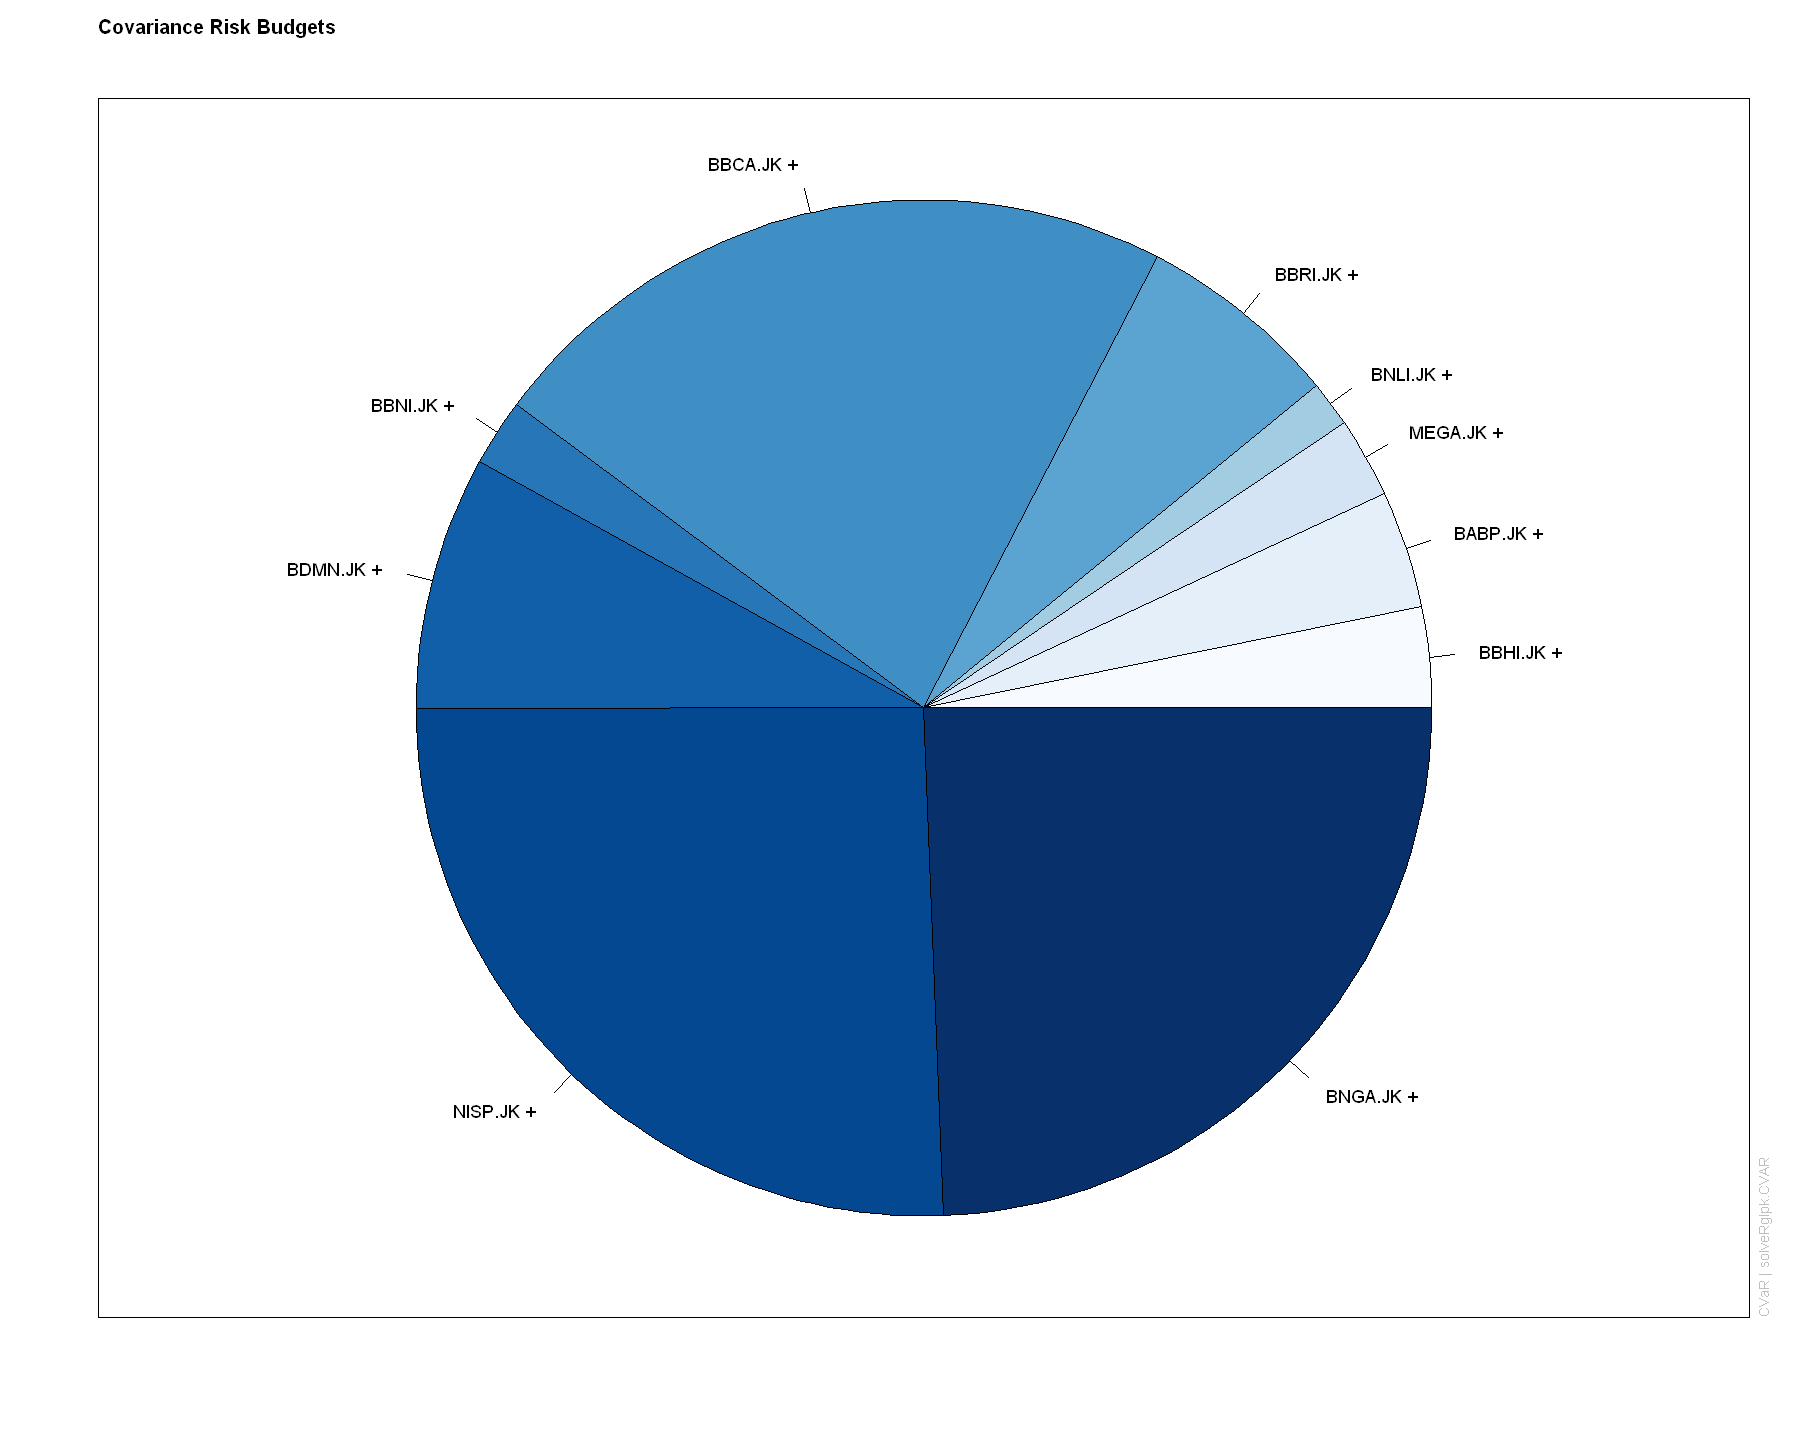

In [129]:
weightedReturnsPie(minriskPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(minriskPortfolio, radius = 0.9, legend = FALSE)

### 7.3 COMPUTE THE GLOBAL MINIMUM MEAN-CVAR PORTFOLIO

In [130]:
globminSpec <- portfolioSpec()
setType(globminSpec) <- "CVaR"
setAlpha(globminSpec) <- 0.05
setSolver(globminSpec) <- "solveRglpk.CVAR"
setTargetReturn(globminSpec) <- getTargetReturn(ewPortfolio@portfolio)["mean"]
globminPortfolio <- minriskPortfolio(data = ts_returns, spec = globminSpec,constraints = "LongOnly")
print(globminPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Minimum Risk Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0160  0.0182  0.0452  0.0000  0.0480  0.0000  0.0675  0.2661  0.0255  0.1336 
NISP.JK BNGA.JK 
 0.2354  0.1444 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0326  0.0273  0.0296  0.0000  0.0284  0.0000  0.0642  0.2554  0.0260  0.1678 
NISP.JK BNGA.JK 
 0.2086  0.1601 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0706 0.9222 1.8311 1.3743 

Description:
 Sun Sep  3 11:48:37 2023 by user: Kevin 


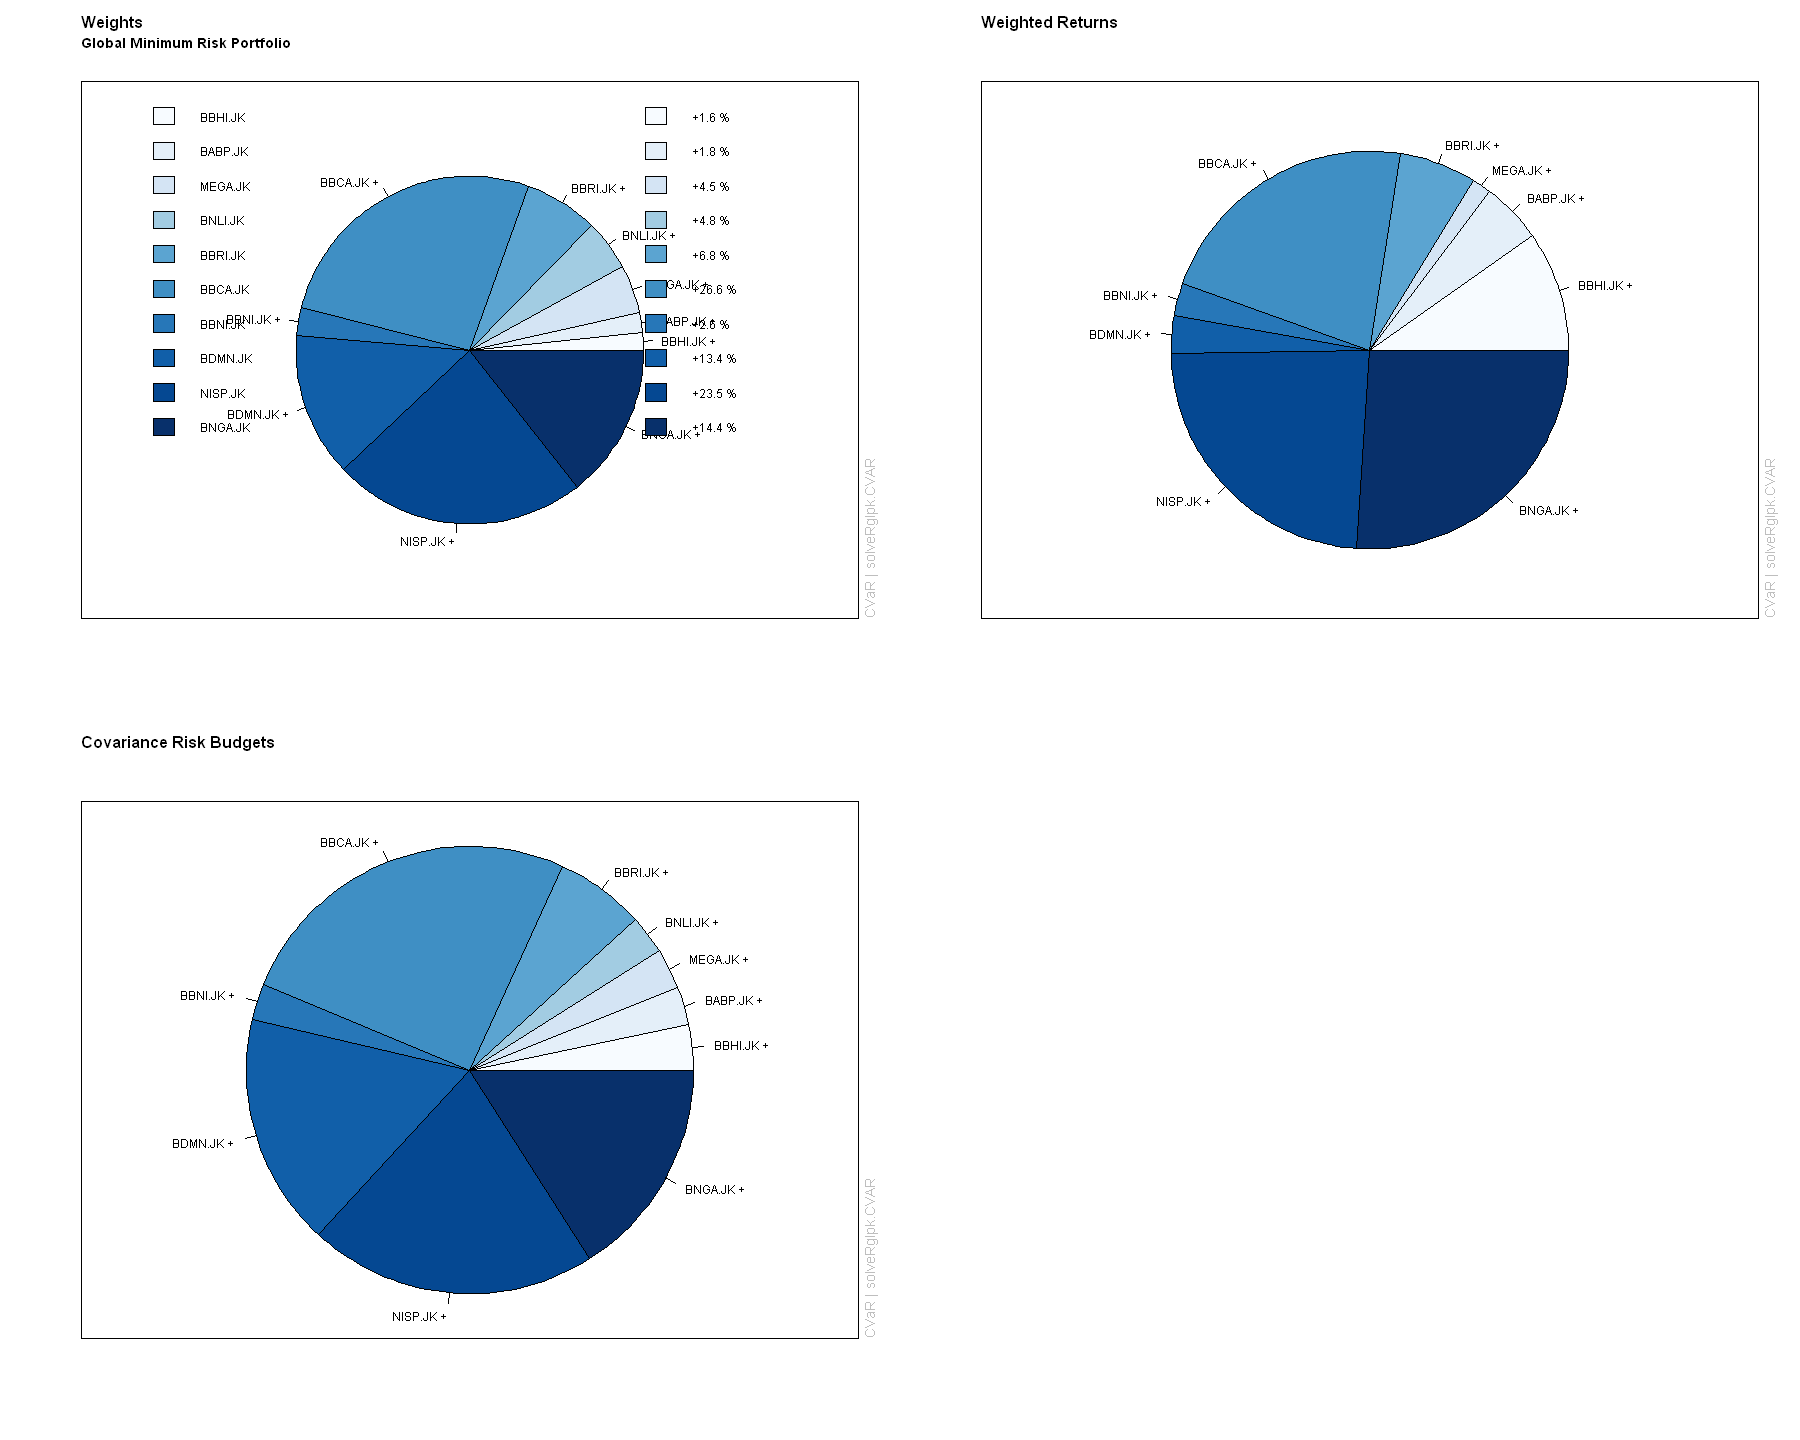

In [131]:
par(mfrow=c(2,2))
weightsPie(globminPortfolio, radius = 0.7)
text <- "Global Minimum Risk Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(globminPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(globminPortfolio, radius = 0.9, legend = FALSE)

In [132]:
ratioSpec <- portfolioSpec()
setType(ratioSpec) <- "CVaR"
setAlpha(ratioSpec) <- 0.05
setSolver(ratioSpec) <- "solveRglpk.CVAR"
setRiskFreeRate(ratioSpec) <- 0
ratioPortfolio <- maxratioPortfolio(data = ts_returns, 
                                    spec = ratioSpec,
                                    constraints = "LongOnly")
print(ratioPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Max Return/Risk Ratio Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.1238  0.1178  0.0123  0.0000  0.0000  0.0000  0.0068  0.0749  0.0000  0.0000 
NISP.JK BNGA.JK 
 0.1753  0.4891 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.3621  0.2212  0.0009  0.0000  0.0000  0.0000  0.0016  0.0126  0.0000  0.0000 
NISP.JK BNGA.JK 
 0.0610  0.3407 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.1719 1.6380 2.8530 2.0854 

Description:
 Sun Sep  3 11:48:55 2023 by user: Kevin 


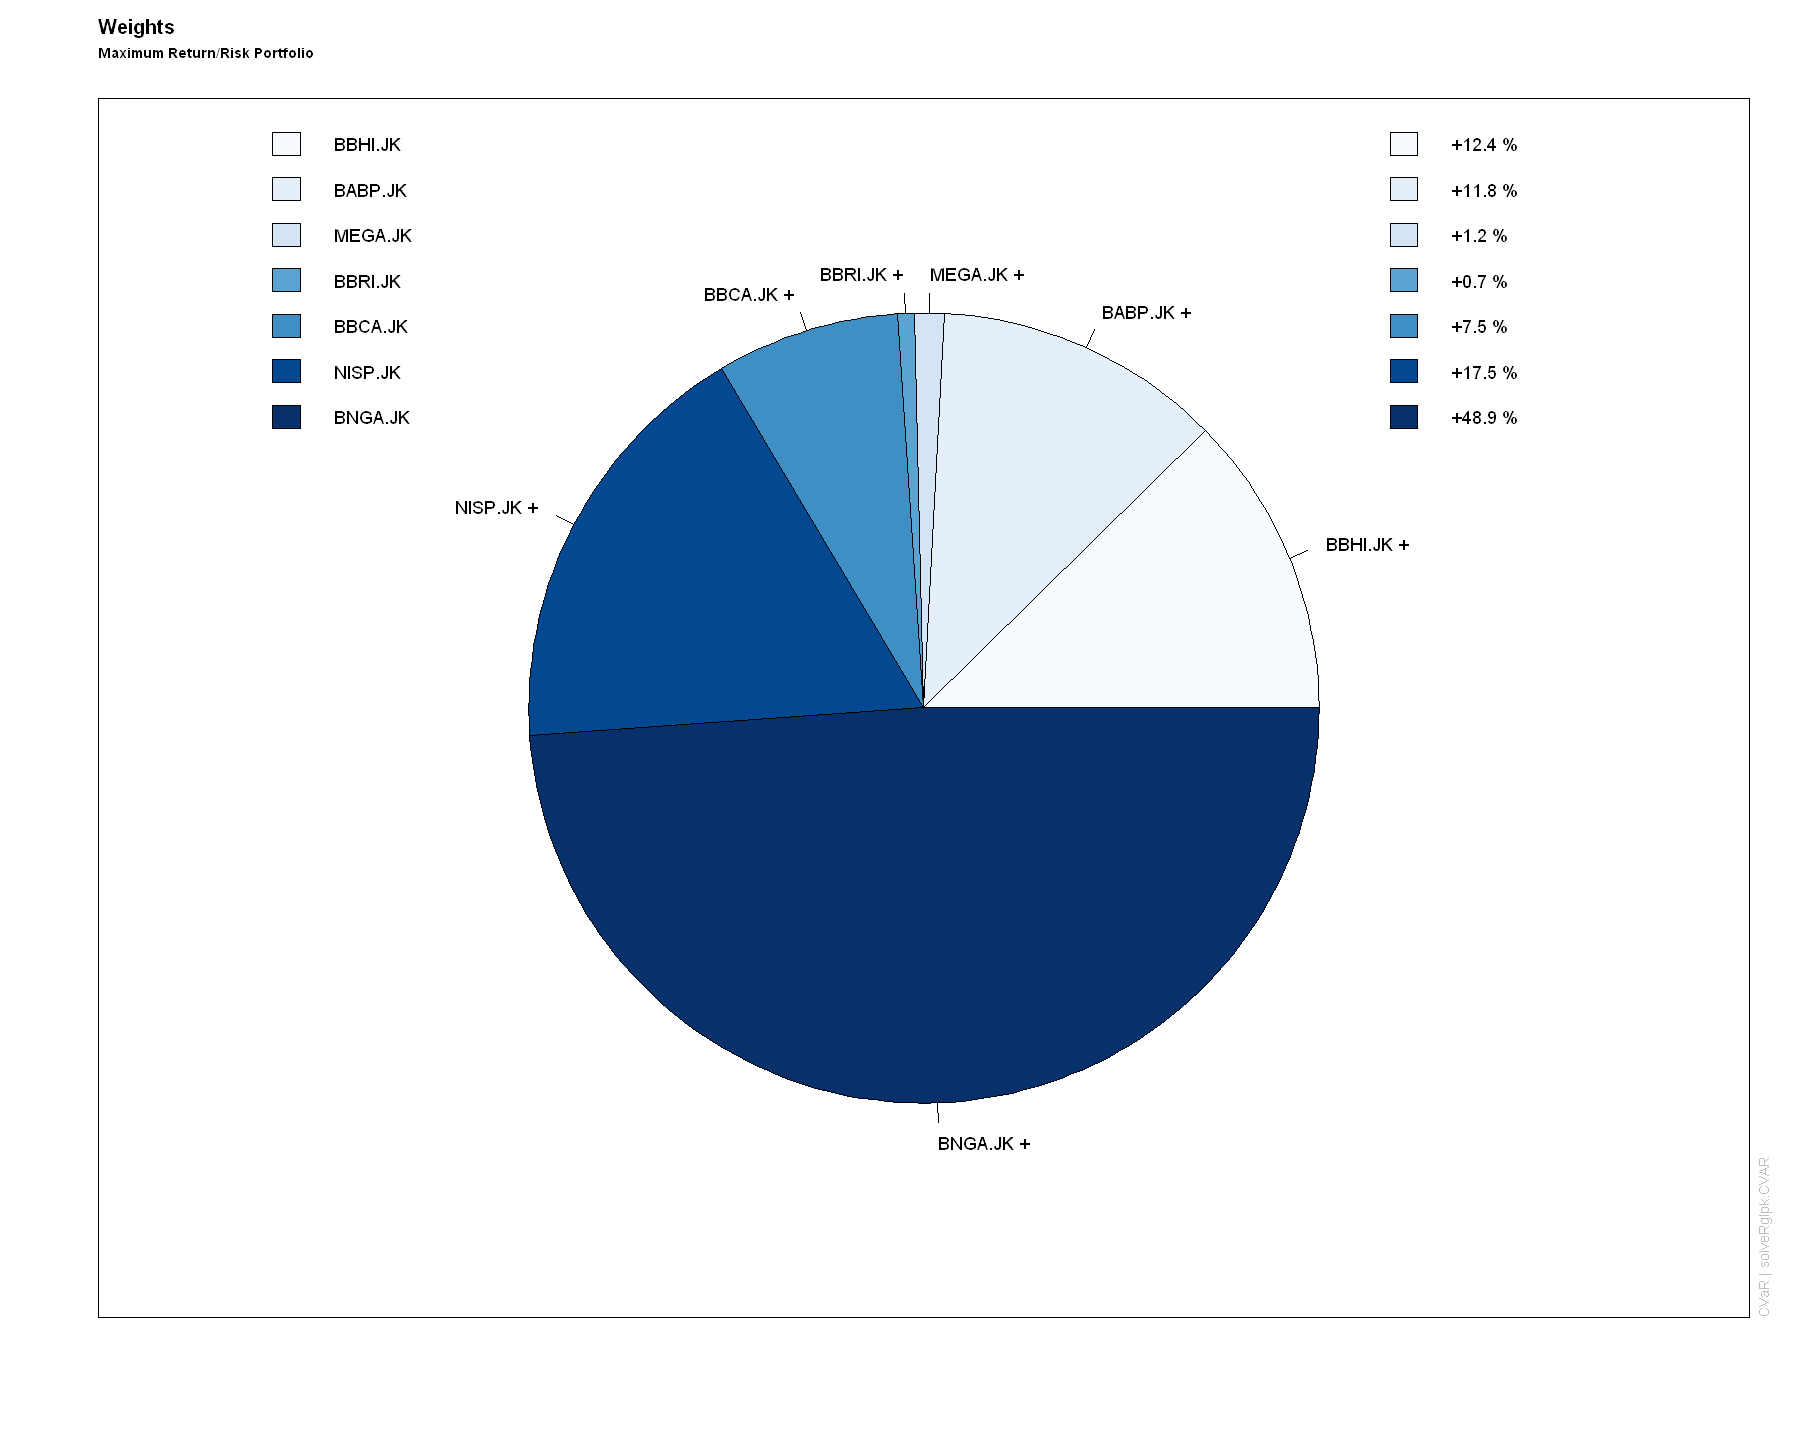

In [143]:

weightsPie(ratioPortfolio, radius = 0.7)
text <- "Maximum Return/Risk Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)

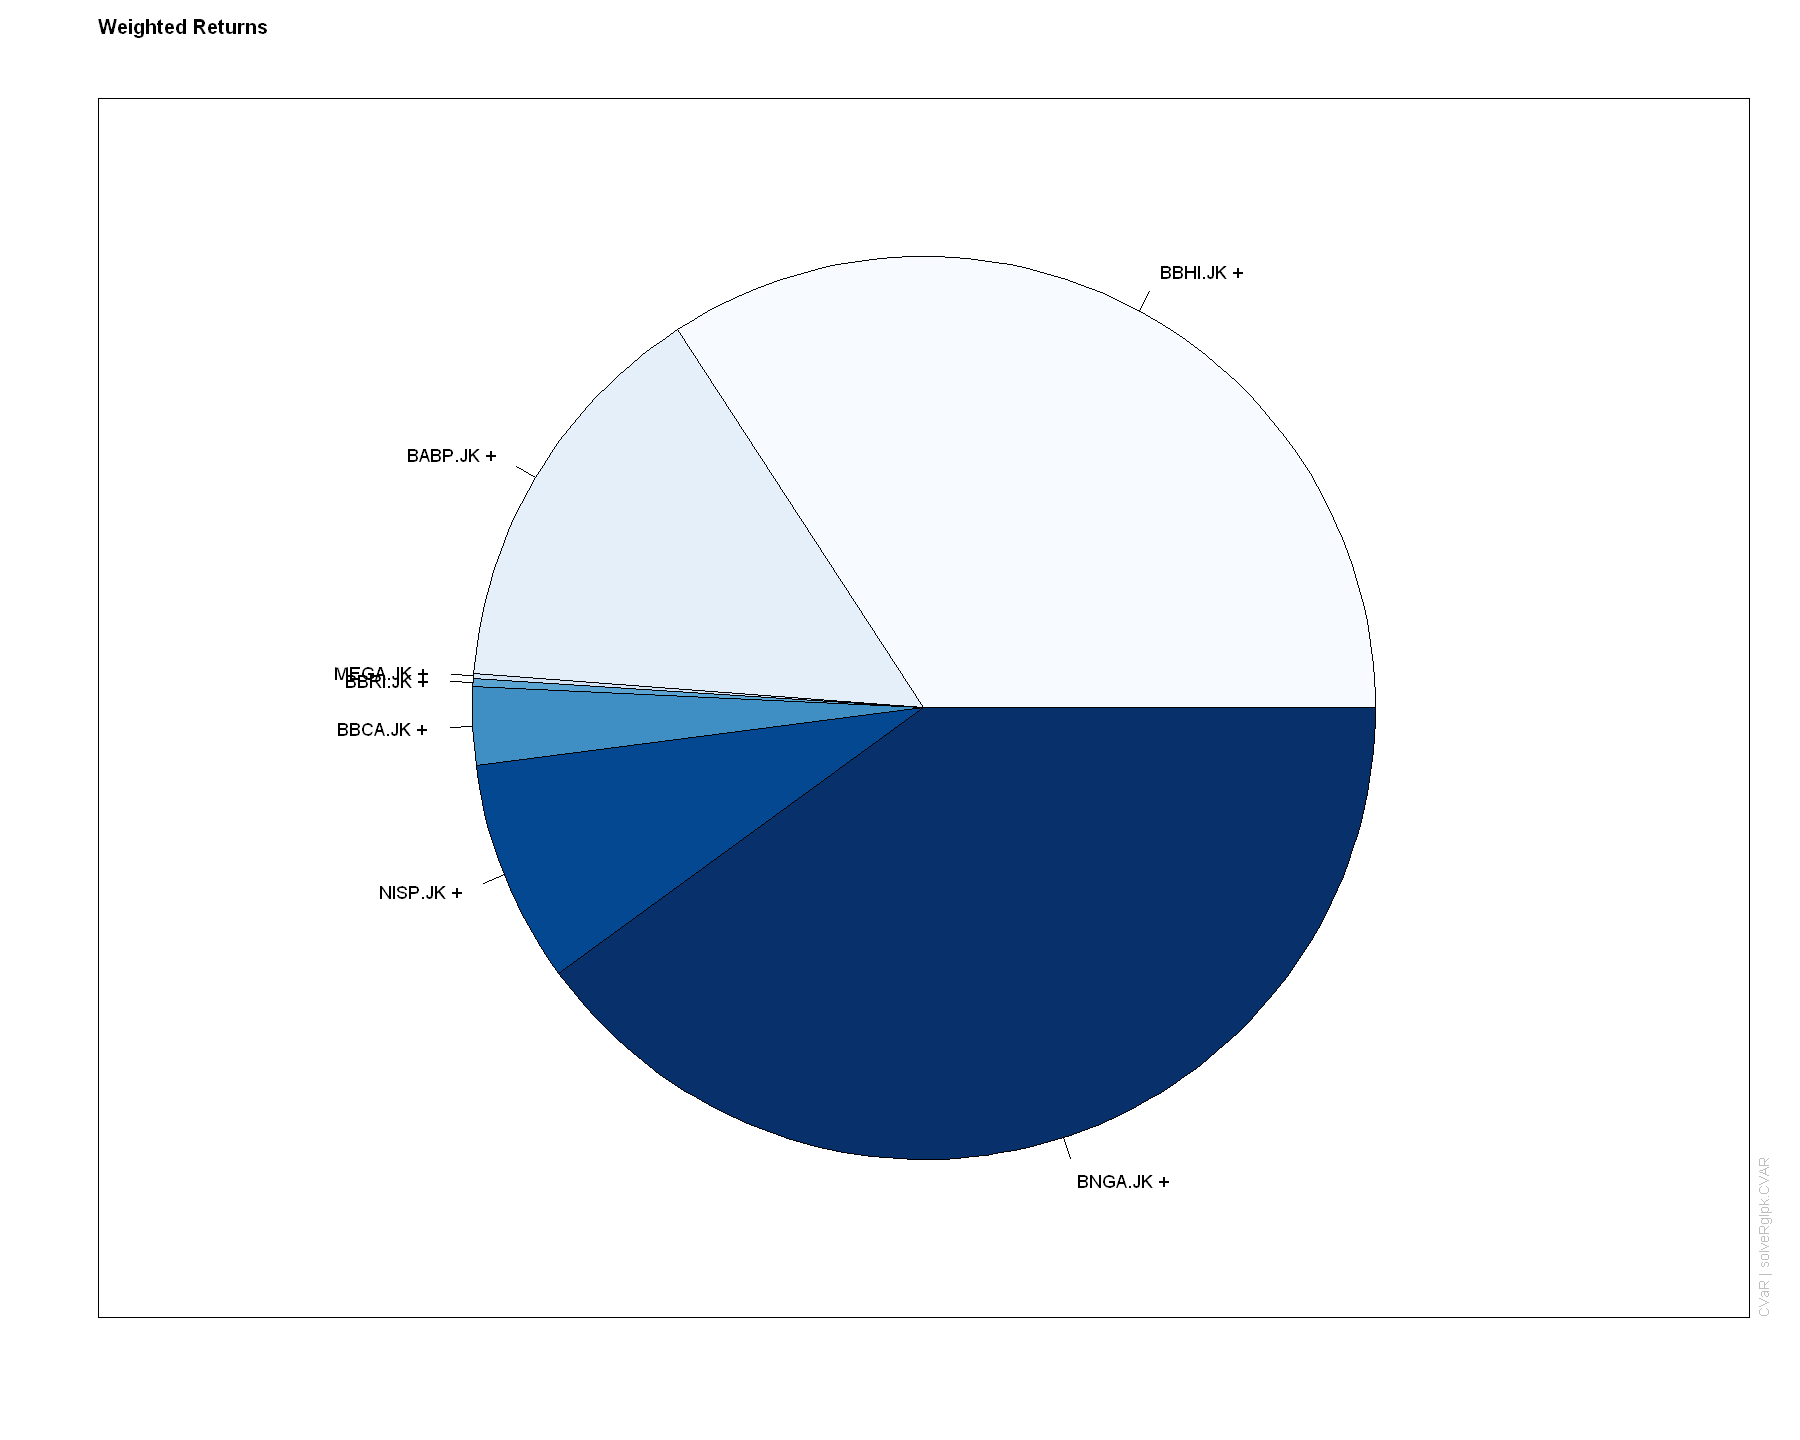

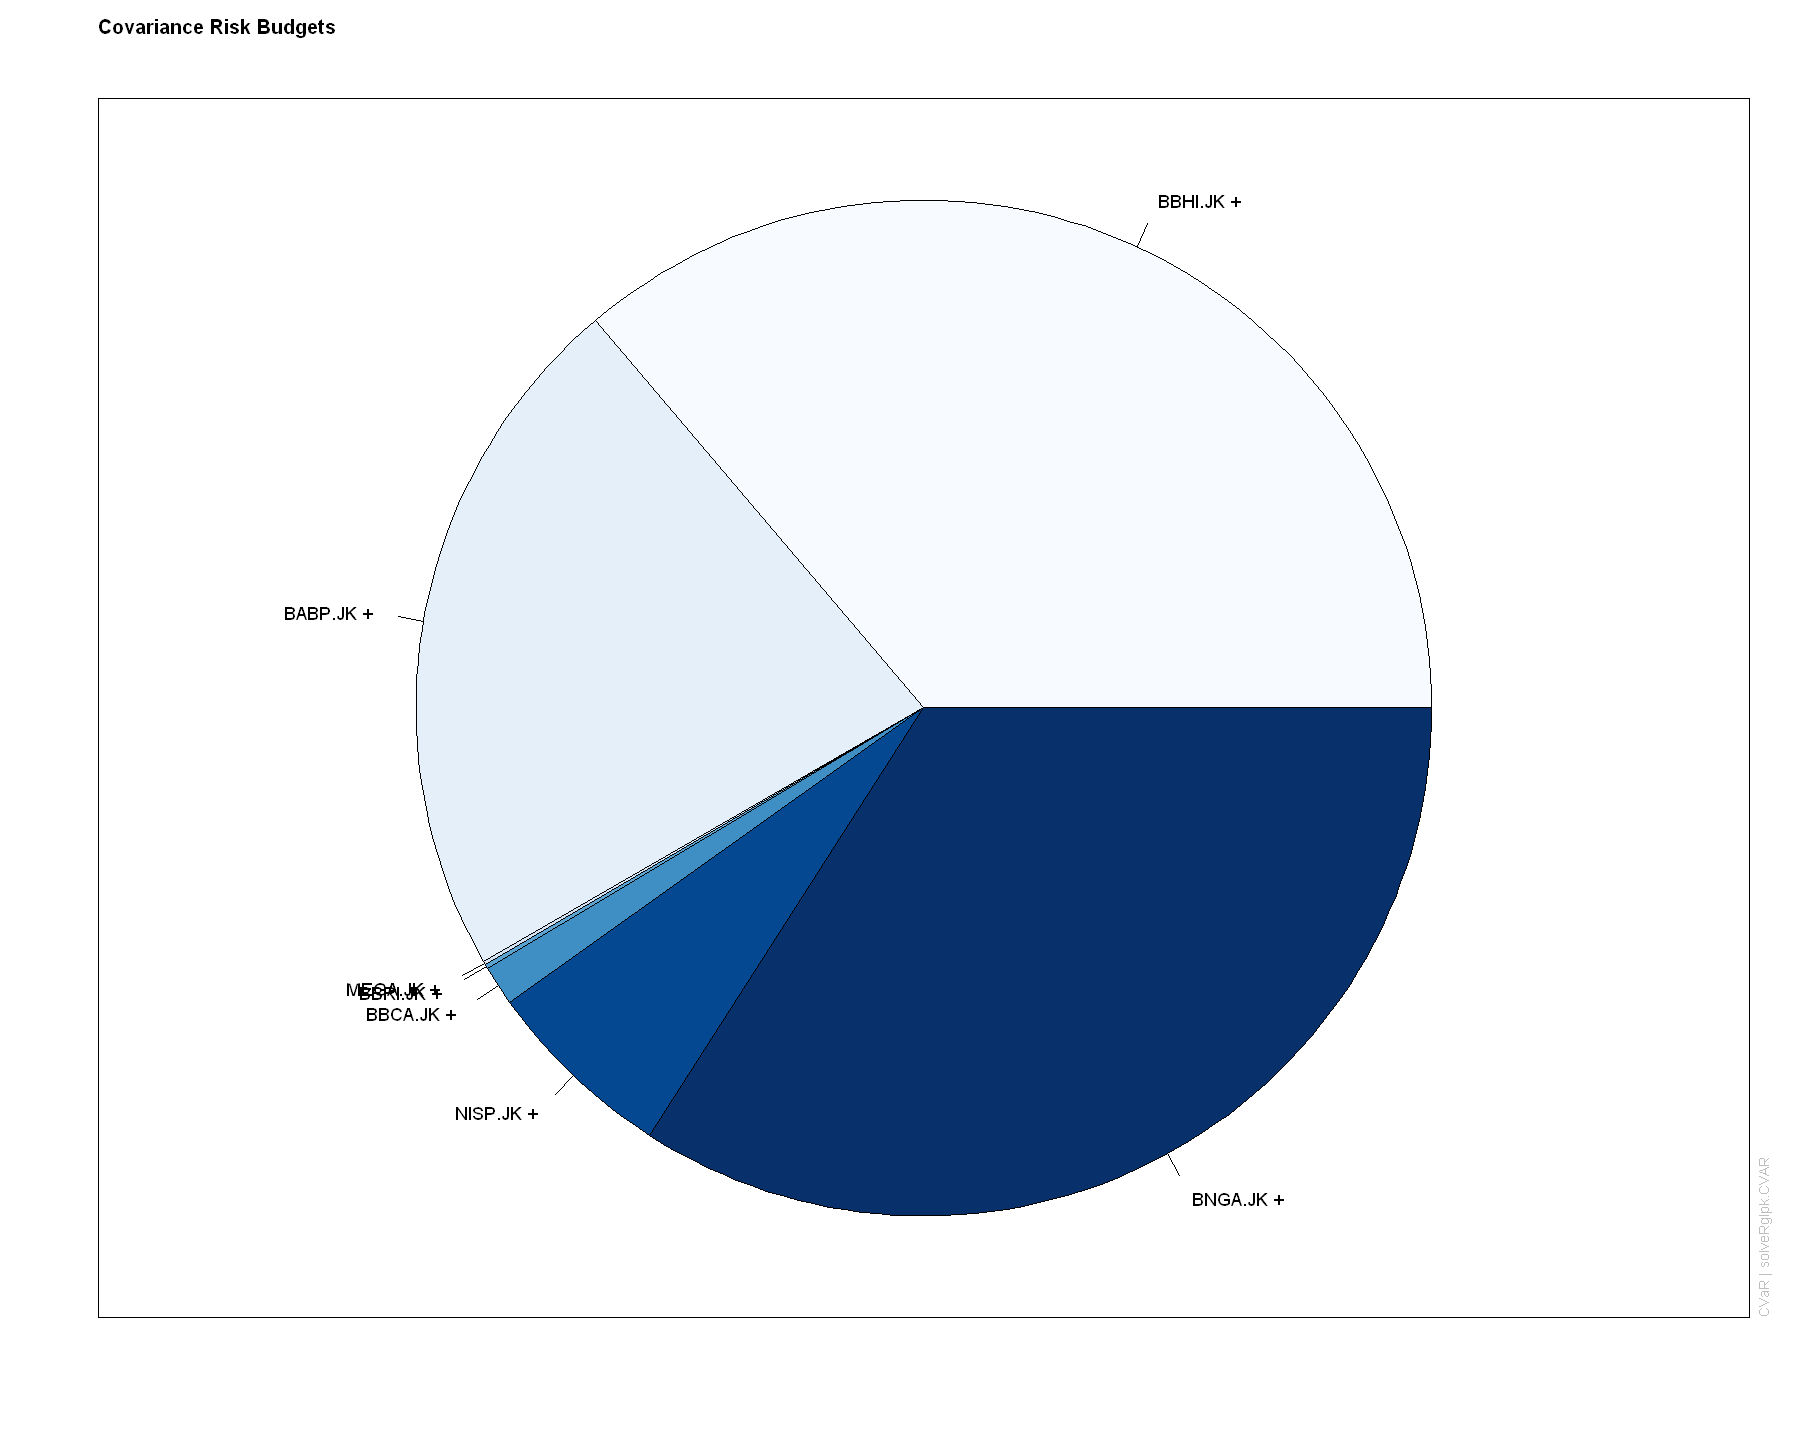

In [134]:
weightedReturnsPie(ratioPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(ratioPortfolio, radius = 0.9, legend = FALSE)

# 7. MEAN-CVAR PORTFOLIO FRONTIERS

# 8. PORTFOLIO BACKTESTING

In [135]:
ts_back <- cbind(ts_returns, rowMeans(ts_returns))
names(ts_back)[13] <- 'Avg'
head(ts_back)

GMT
              BBHI.JK   BABP.JK   MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK
2021-01-05  7.0707071  0.000000  0.000000 -0.4237222 -0.9999970 -0.5494509
2021-01-06  0.9433962  0.000000  0.000000  6.8085098 -2.3569148 -0.2762433
2021-01-07  0.9345794  0.000000  5.714281  7.9681217  2.4138062  0.2770085
2021-01-08 -2.3148148  2.000000 19.932438  5.5350516 -1.0101064  2.4861893
2021-01-11 -2.8436019 -1.960784 20.000000  6.2937127  1.3605430  2.9649543
2021-01-12 24.3902439  2.000000 19.953048 23.6842086  0.3355723 -0.2617736
              BBRI.JK    BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK
2021-01-05 -0.9280673  3.7307845  1.9607806  0.0000000 -0.6097573 -1.4705869
2021-01-06 -1.6393512 -2.0451248 -1.5384539 -0.6250046 -0.6134981 -0.9950295
2021-01-07  1.9047608  0.2879785  0.3906128  0.0000000  4.3209876  3.0150811
2021-01-08  2.5701000  1.2203810  0.7782185  3.1446527 -3.5502947 -1.4634214
2021-01-11  5.9225380  4.1843953  0.7722009  4.8780531  0.0000000 -0.4950436
2021-01-1

In [136]:
spiSpec <- portfolioSpec()
spiConstraints <- "LongOnly"
spiBacktest <- portfolioBacktest()
spiFormula <- Avg ~ BBHI.JK+BABP.JK+MEGA.JK+BRIS.JK+BNLI.JK+BBTN.JK+BBRI.JK+BBCA.JK+BBNI.JK+BDMN.JK+NISP.JK+BNGA.JK 

In [137]:
spiPortfolios <- portfolioBacktesting(formula = spiFormula,
                                      data = ts_back, spec = spiSpec, 
                                      constraints = spiConstraints,
                                      backtest = spiBacktest, trace = FALSE)

In [138]:
Weights <- round(100 * spiPortfolios$weights, 2)[1:12, ]
Weights

BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK
2021-12-31 23.96   18.41   19.58   0       0       0       0       38.04  
2022-01-31 17.97   12.91   13.72   0       0       0       0       27.58  
2022-02-28 14.08   13.66    0.00   0       0       0       0       41.07  
2022-03-31 12.59    9.24    0.00   0       0       0       0       44.37  
2022-04-30 14.39    7.34    0.00   0       0       0       0       32.93  
2022-05-31 16.16    0.00    0.00   0       0       0       0        2.20  
2022-06-30 15.78    0.00    0.00   0       0       0       0        0.00  
2022-07-31  7.29    0.00    0.00   0       0       0       0        4.28  
2022-08-31  8.04    0.00    0.00   0       0       0       0       12.52  
2022-09-30  0.00    0.00    0.00   0       0       0       0        2.32  
2022-10-31  0.00    0.00    0.00   0       0       0       0       12.04  
2022-11-30  0.00    0.00    0.00   0       0       0       0       16.61  
           BBNI.JK BDMN.JK NISP.JK BNGA.JK
2021-12-31  0.00    0.00   0.00     0.00  
2022-01-31 27.82    0.00   0.00     0.00  
2022-02-28 31.19    0.00   0.00     0.00  
2022-03-31 20.30    0.00   0.00    13.50  
2022-04-30 40.38    0.00   0.00     4.95  
2022-05-31 71.58    0.49   0.00     9.58  
2022-06-30 54.54    2.89   0.00    26.79  
2022-07-31 60.30    8.58   0.00    19.55  
2022-08-31 44.27    4.37   0.00    30.80  
2022-09-30 63.59    0.00   8.94    25.15  
2022-10-31 29.67   16.69   5.17    36.43  
2022-11-30 28.23    5.65   4.07    45.44

In [139]:
setSmootherLambda(spiPortfolios$backtest) <- "3m"
spiSmoothPortfolios <- portfolioSmoothing(object = spiPortfolios,trace = FALSE)

In [140]:
smoothWeights <- round(100 * spiSmoothPortfolios$smoothWeights,2)[1:12, ]
smoothWeights

BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK
2021-12-31 23.96   18.41   19.58   0       0       0       0       38.04  
2022-01-31 22.47   17.04   18.12   0       0       0       0       35.43  
2022-02-28 20.00   15.85   13.22   0       0       0       0       36.18  
2022-03-31 17.53   13.90    8.69   0       0       0       0       38.42  
2022-04-30 16.13   11.77    5.39   0       0       0       0       37.61  
2022-05-31 15.79    8.30    3.21   0       0       0       0       28.55  
2022-06-30 15.70    5.35    1.87   0       0       0       0       19.15  
2022-07-31 13.58    3.28    1.06   0       0       0       0       13.08  
2022-08-31 11.66    1.94    0.60   0       0       0       0       11.42  
2022-09-30  8.27    1.12    0.33   0       0       0       0        8.73  
2022-10-31  5.35    0.64    0.18   0       0       0       0        8.89  
2022-11-30  3.29    0.36    0.10   0       0       0       0       10.86  
           BBNI.JK BDMN.JK NISP.JK BNGA.JK
2021-12-31  0.00   0.00    0.00     0.00  
2022-01-31  6.95   0.00    0.00     0.00  
2022-02-28 14.75   0.00    0.00     0.00  
2022-03-31 18.09   0.00    0.00     3.38  
2022-04-30 24.49   0.00    0.00     4.61  
2022-05-31 37.87   0.12    0.00     6.16  
2022-06-30 45.38   0.85    0.00    11.71  
2022-07-31 50.99   2.96    0.00    15.05  
2022-08-31 50.71   3.84    0.00    19.83  
2022-09-30 53.86   3.10    2.23    22.35  
2022-10-31 48.60   6.31    3.53    26.50  
2022-11-30 42.19   6.95    3.99    32.27

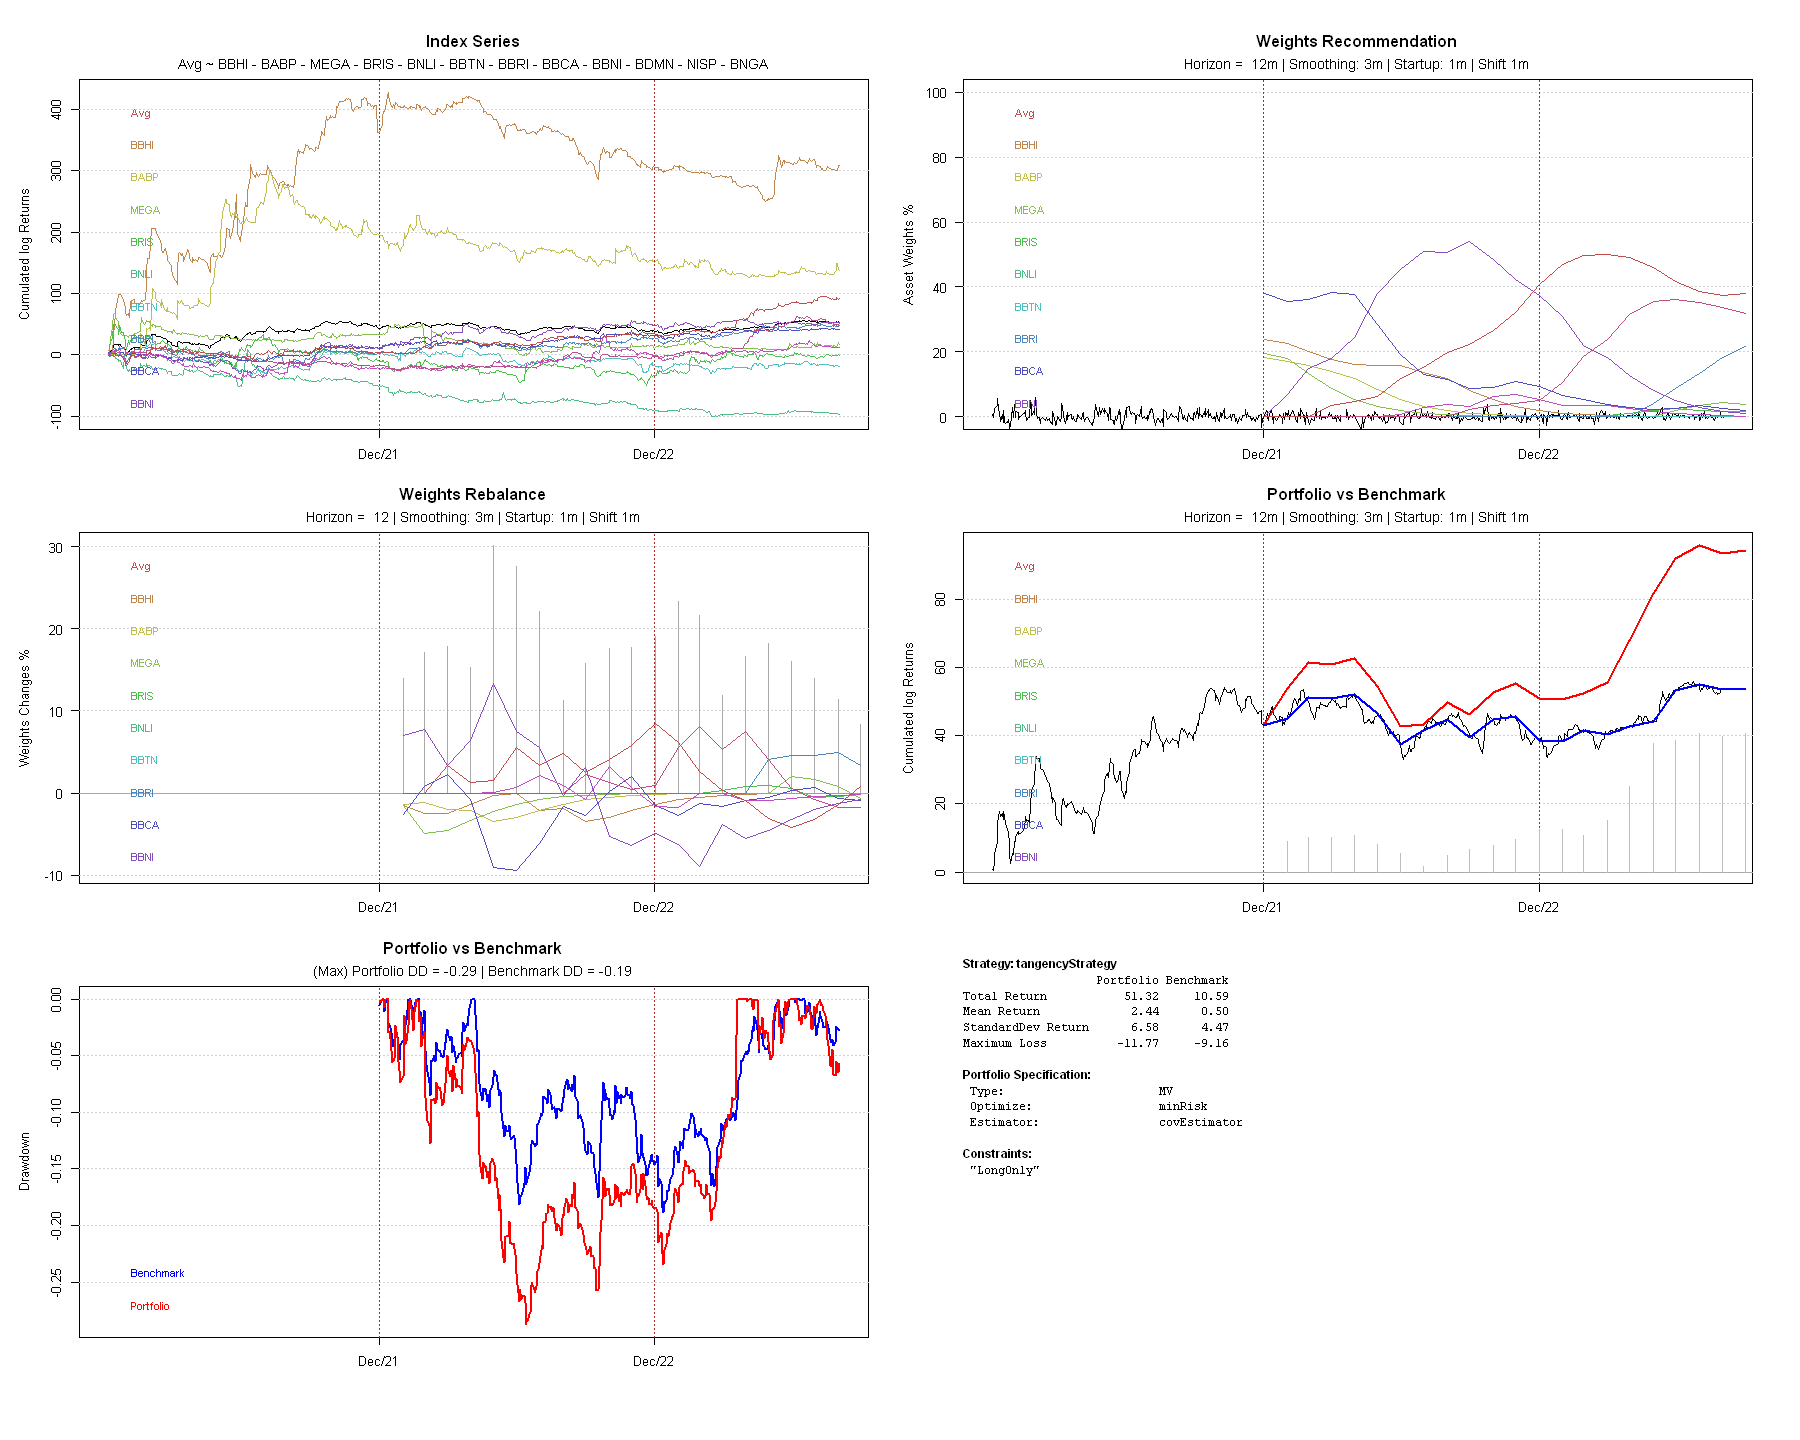

In [141]:
backtestPlot(spiSmoothPortfolios, cex = 0.6, font = 1, family = "mono")